In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from numpy.random import choice
from collections import Counter
from copy import deepcopy

from tqdm import tqdm
import time

In [13]:
# Import data in the format 
# [[(permutation order of roots in W definition), [list of invariant coefficient vectors], ...all permutations]

# Parse string into list of lists of float
def parseString(string):
    tmp = list(string[1:-2].split(", [["))
    return [tmp[0], [ [float(i) for i in list(elem.split(", "))]  for elem in list(tmp[1][:-1].split("], ["))] ]

start = time.time()

# Modified files are used: all 1/2, 3/2, 5/2 are replaced by 0.5, 1.5, 2,5
with open('ADE_Data\E8inv_Data_mod.txt','r') as file:
    dataE8 = [ parseString(line.rstrip())[1] for line in file]

end = time.time()
print(end - start)

37.0812041759491


In [14]:
subInvs_N = 9
blades_N = 9
cpts_size = 256
data_size = len(dataE8)

# Array to store number of a class to which each of the invariants with the same subInv_no, blade_no component in E8 belongs
classesE8 = np.zeros([data_size, subInvs_N, blades_N], dtype = int)

In [15]:
# Defina a function to extract parts of subinvariant
def blade(in_cpts, blade_n):
    '''return the components of blade_n part of subinvariant. blade_n=0 - scalar, blade_n=1 - vector, ...'''
    match blade_n:
        case 0:
            return in_cpts[0:1] # 1 scalar
        case 1:
            return in_cpts[1:9] # 8 vector
        case 2:
            return in_cpts[9: 37] # 28 bivector
        case 3:
            return in_cpts[37: 93] # 56 trivector
        case 4:
            return in_cpts[93: 163] # 70 quadrivector
        case 5:
            return in_cpts[163: 219] # 56 quintuvector
        case 6:
            return in_cpts[219: 247] # 28 sextuvector
        case 7:
            return in_cpts[247: 255] # 8 pseudovector
        case 8:
            return in_cpts[255: 256] # 1 pseudoscalar
    raise ValueError('Incorrect blade number given: ', blade_n)

In [16]:
# Count occurances of subinvariants and blades for E8: for each invariant un dataE8, 
#                                                      classesE8 contains a number of a class to which it belongs
for blade_n in tqdm(range(blades_N)):
    for subInv_n in range(subInvs_N):
        for idx1 in range(data_size):
            if classesE8[idx1, subInv_n, blade_n] != 0: # check if we already assigned a class to this element
                continue
            classesE8[idx1, subInv_n, blade_n] = idx1+1 # record that elem itself is in its own class (shift by 1 during run for technical reasons)
            for idx2 in range(idx1+1,data_size):
                if blade(dataE8[idx1][subInv_n],blade_n)==blade(dataE8[idx2][subInv_n],blade_n):    
                    classesE8[idx2, subInv_n, blade_n] = idx1+1 # record that elem idx2 is in the same class as element idx1 ( again shift by 1 during run)
                    
classesE8 = classesE8 - 1 # shift all classes' numbers back by 1

100%|██████████| 9/9 [01:14<00:00,  8.24s/it]


In [17]:
# How to extract classes numbers of subibvariant number 2, blade number 2 for the first 100 invariants
print(classesE8[:, 2, 2][:100])

[ 0  0  0  3  3  3  3  3  3  3  3  3  3  3  3 15 15 15 15 15 20 21 21 21
 24 24 24 24 24 29 29 29 32 32 32 32 32 32 32 32 32 32 32 32 44 44 44 47
  0  0 24 24 24  0 15  3 24  3 15 59  0 24 24 24  3  0  3  3 68  3 44 44
 20 59 44 75 75 75 75 75  0 75 75 44 59 85 85 59 24 75 20 21 21 68 94 94
  0  0  0 68]


In [18]:
# Create a dictionary (for each subinvariant, each blade) containing the size of each distinct class

classes_counterE8 = []
for subInv_n in range(subInvs_N):
    subinvCounters = []
    for blade_n in range(blades_N):
         subinvCounters.append(dict(Counter(classesE8[:,subInv_n,blade_n])))
    classes_counterE8.append( subinvCounters )
    
print(np.shape(classes_counterE8))

(9, 9)


In [19]:
# How to extract numbers of classes for subibvariant number 2, blade number 2
print(classes_counterE8[2][2])
print('Number of classes ', len(classes_counterE8[2][2].keys()))
# We find that among 40320 invariants that we can generate there are only 128 unique for subibvariant number 2, blade number 2 (i.e. bivector part)

{0: 105, 3: 337, 15: 13, 20: 15, 21: 35, 24: 135, 29: 3, 32: 207, 44: 25, 47: 5, 59: 215, 68: 105, 75: 185, 85: 55, 94: 175, 103: 567, 104: 379, 122: 153, 125: 65, 128: 413, 130: 873, 134: 165, 139: 367, 143: 107, 262: 671, 267: 465, 417: 263, 452: 177, 569: 57, 575: 63, 596: 217, 660: 103, 720: 239, 723: 81, 726: 735, 731: 153, 732: 311, 733: 1041, 734: 1511, 736: 385, 746: 969, 756: 79, 775: 739, 782: 709, 807: 315, 809: 197, 814: 665, 834: 271, 1549: 545, 1561: 609, 1567: 255, 1569: 975, 1572: 183, 1574: 511, 1575: 473, 1583: 145, 2424: 505, 2426: 375, 3294: 157, 3479: 75, 4169: 27, 4199: 21, 4287: 119, 4737: 65, 5040: 21, 5041: 75, 5046: 375, 5051: 65, 5052: 119, 5053: 505, 5055: 157, 5056: 975, 5066: 609, 5071: 27, 5096: 511, 5106: 545, 5128: 255, 5129: 145, 5133: 473, 5148: 183, 5150: 709, 5164: 969, 5166: 315, 5169: 271, 5170: 1511, 5174: 739, 5175: 665, 5183: 197, 5303: 1041, 5306: 735, 5456: 385, 5491: 239, 5610: 79, 5615: 81, 5635: 311, 5698: 153, 10800: 177, 10803: 63, 10806

In [20]:
# Create an array with the number of classes for each subinvariant, each blade

classes_sizesE8 = []
for subInv_n in range(subInvs_N):
    temp = []
    for blade_n in range(blades_N):
        if len(classes_counterE8[subInv_n][blade_n].keys())==1: # check if there is only one class for subinvariant subInv_n, blade blade_n
            if all( v == 0 for v in blade(dataE8[5][subInv_n],blade_n) ): # check if this class is trivial - all components are 0, 
                temp.append( -1 )                                         # enough to check random data entry, e.g. 5. If yes, label this as -1
            else:
                temp.append( len(classes_counterE8[subInv_n][blade_n].keys()) ) # o/w append number of classes
        else:
            temp.append( len(classes_counterE8[subInv_n][blade_n].keys()) ) # o/w append number of classes
    classes_sizesE8.append( temp )
    
# print found numbers of classes
for row in classes_sizesE8:
    temp = ''
    for elem in row:
        temp = temp + ("%3d " % elem)
    print(temp)
    
# Record found classses sizes in a CSV file
with open('ADE_Data\E8_classes_sizes.csv','w') as file:
    for subInv_n in range(subInvs_N):
        for blade_n in range(blades_N):
            file.write("%3d," % classes_sizesE8[subInv_n][blade_n])
        file.write('\n')

  1  -1  -1  -1  -1  -1  -1  -1  -1 
  1  -1 128  -1  -1  -1  -1  -1  -1 
 -1  -1 128  -1  64  -1  -1  -1  -1 
  1  -1 128  -1  64  -1 128  -1  -1 
  1  -1 128  -1  64  -1 128  -1   2 
  1  -1 128  -1  64  -1 128  -1  -1 
 -1  -1 128  -1  64  -1  -1  -1  -1 
  1  -1 128  -1  -1  -1  -1  -1  -1 
  1  -1  -1  -1  -1  -1  -1  -1  -1 


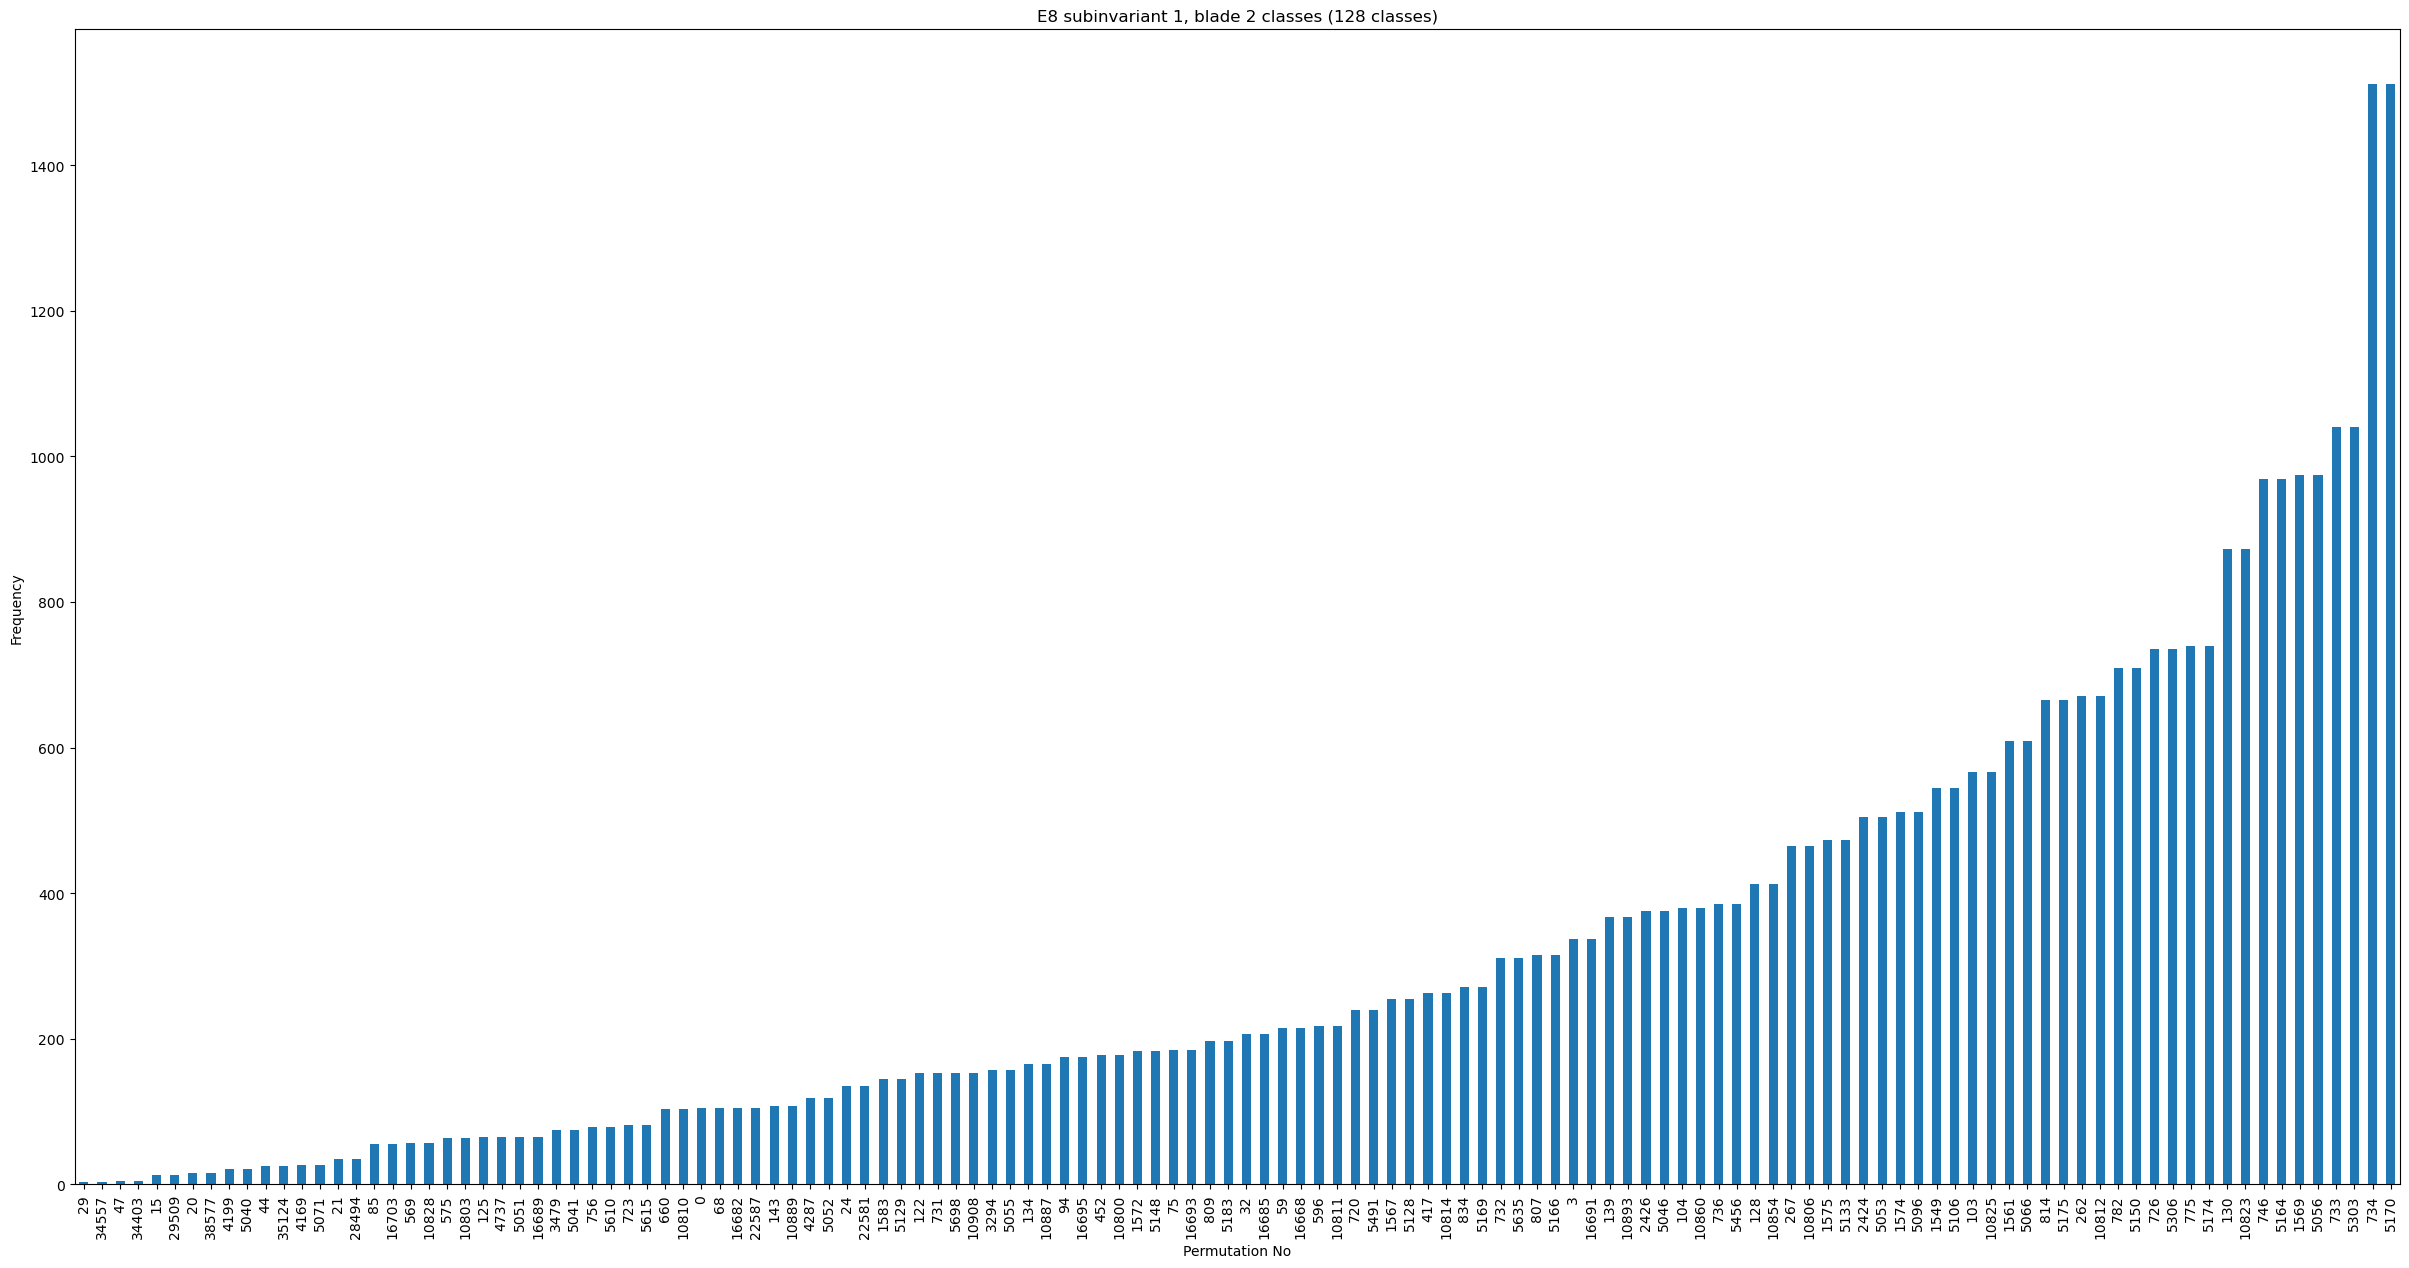

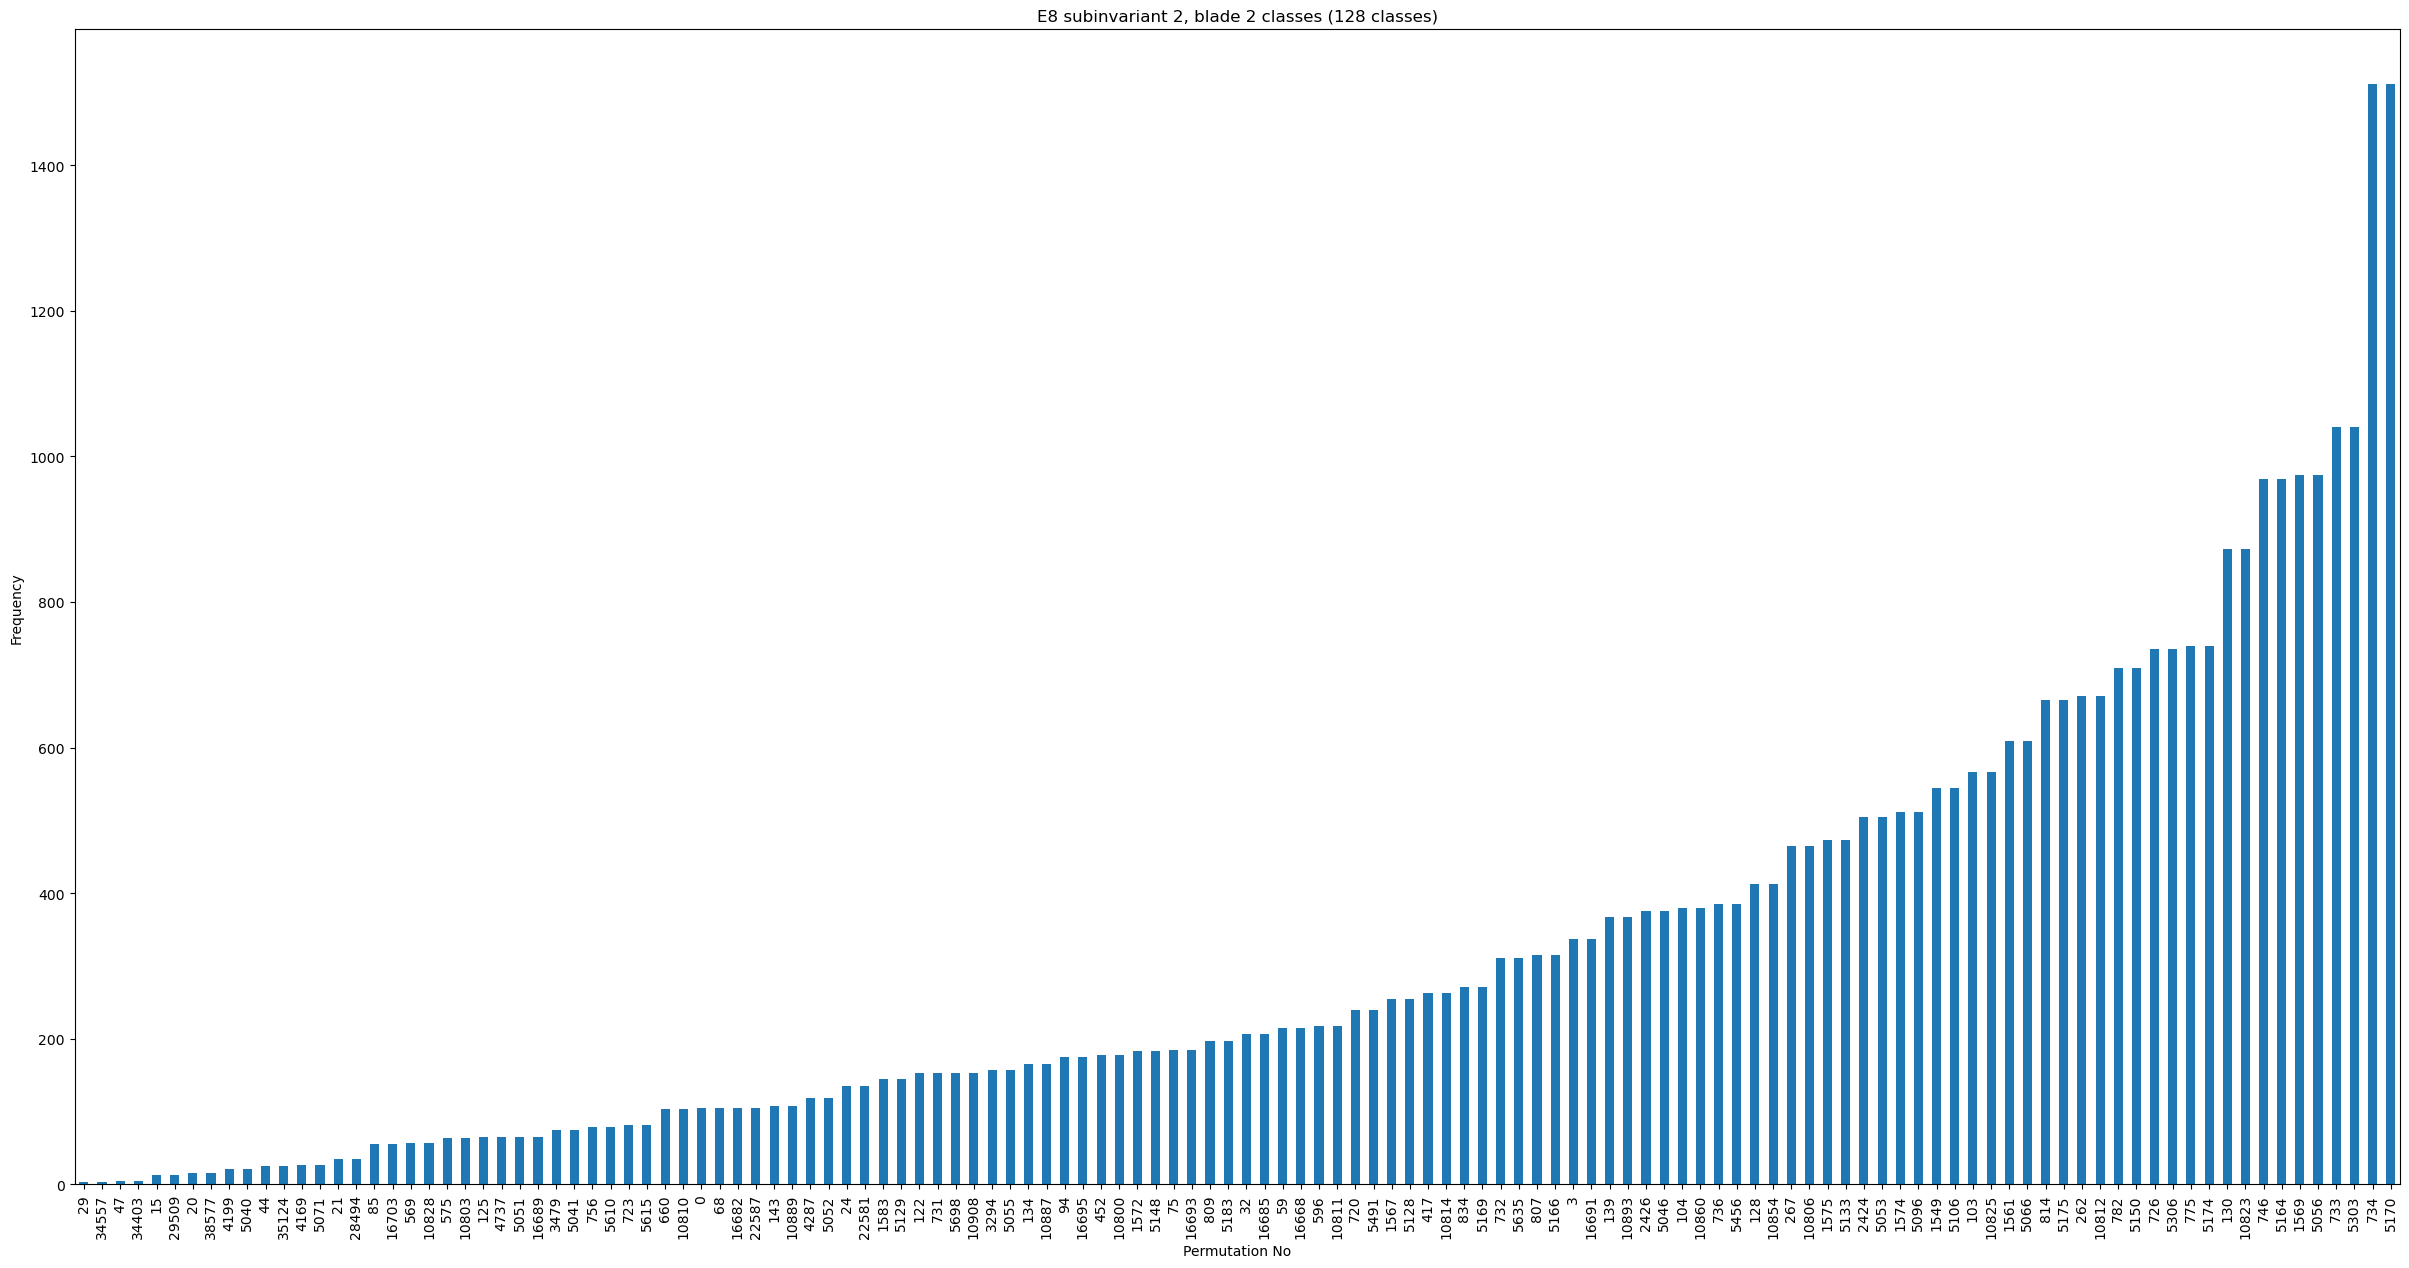

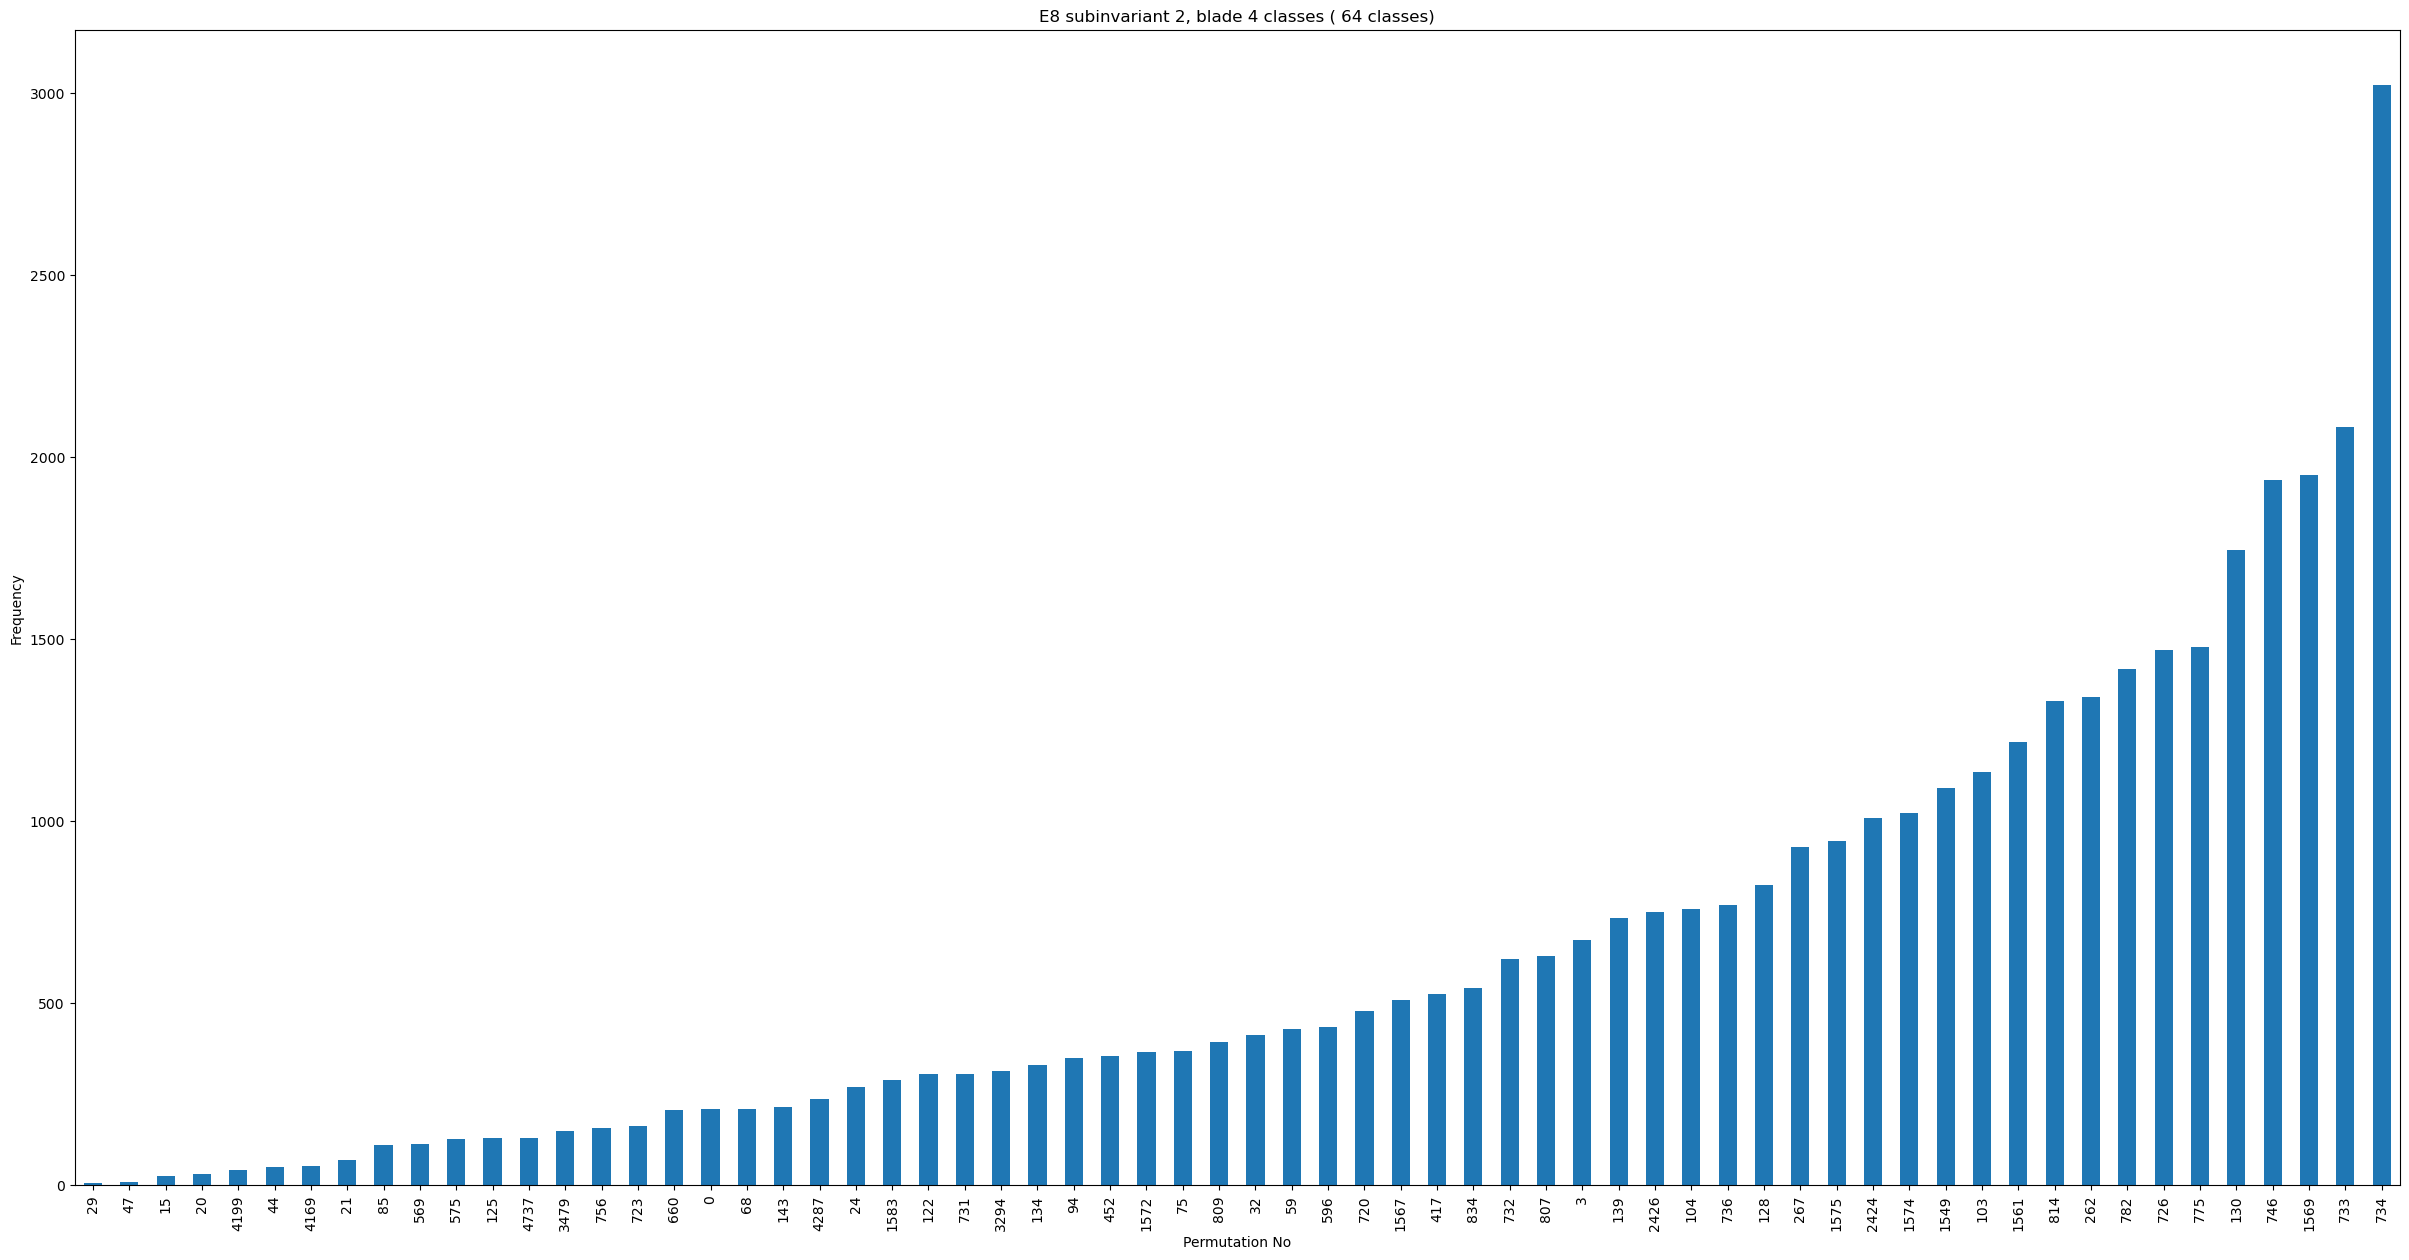

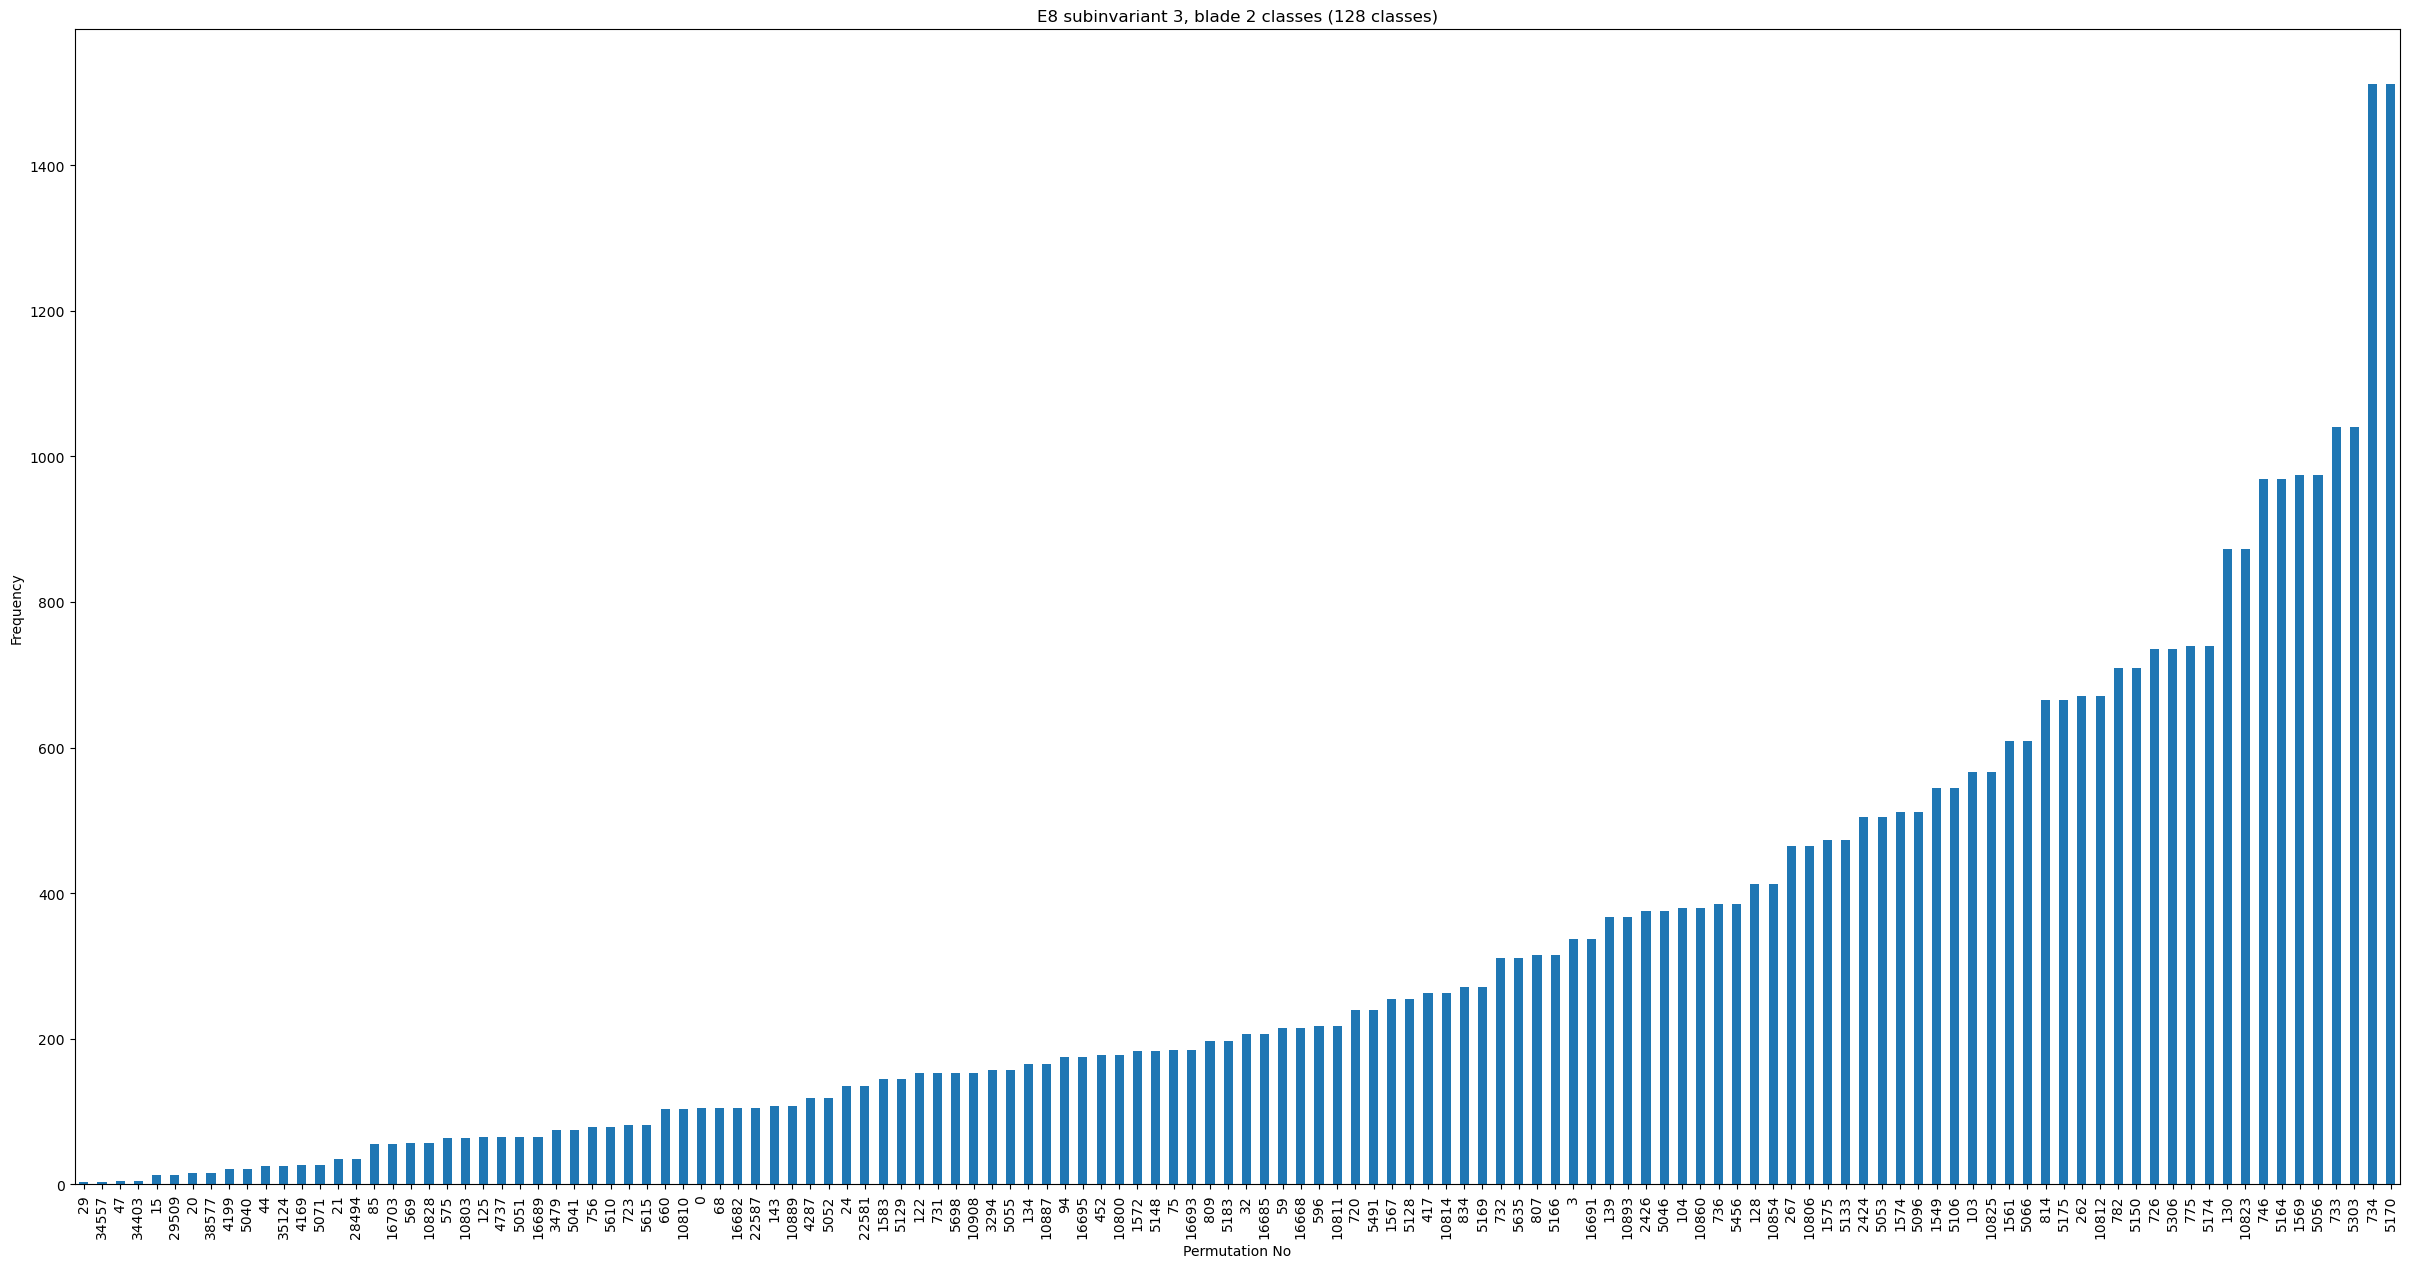

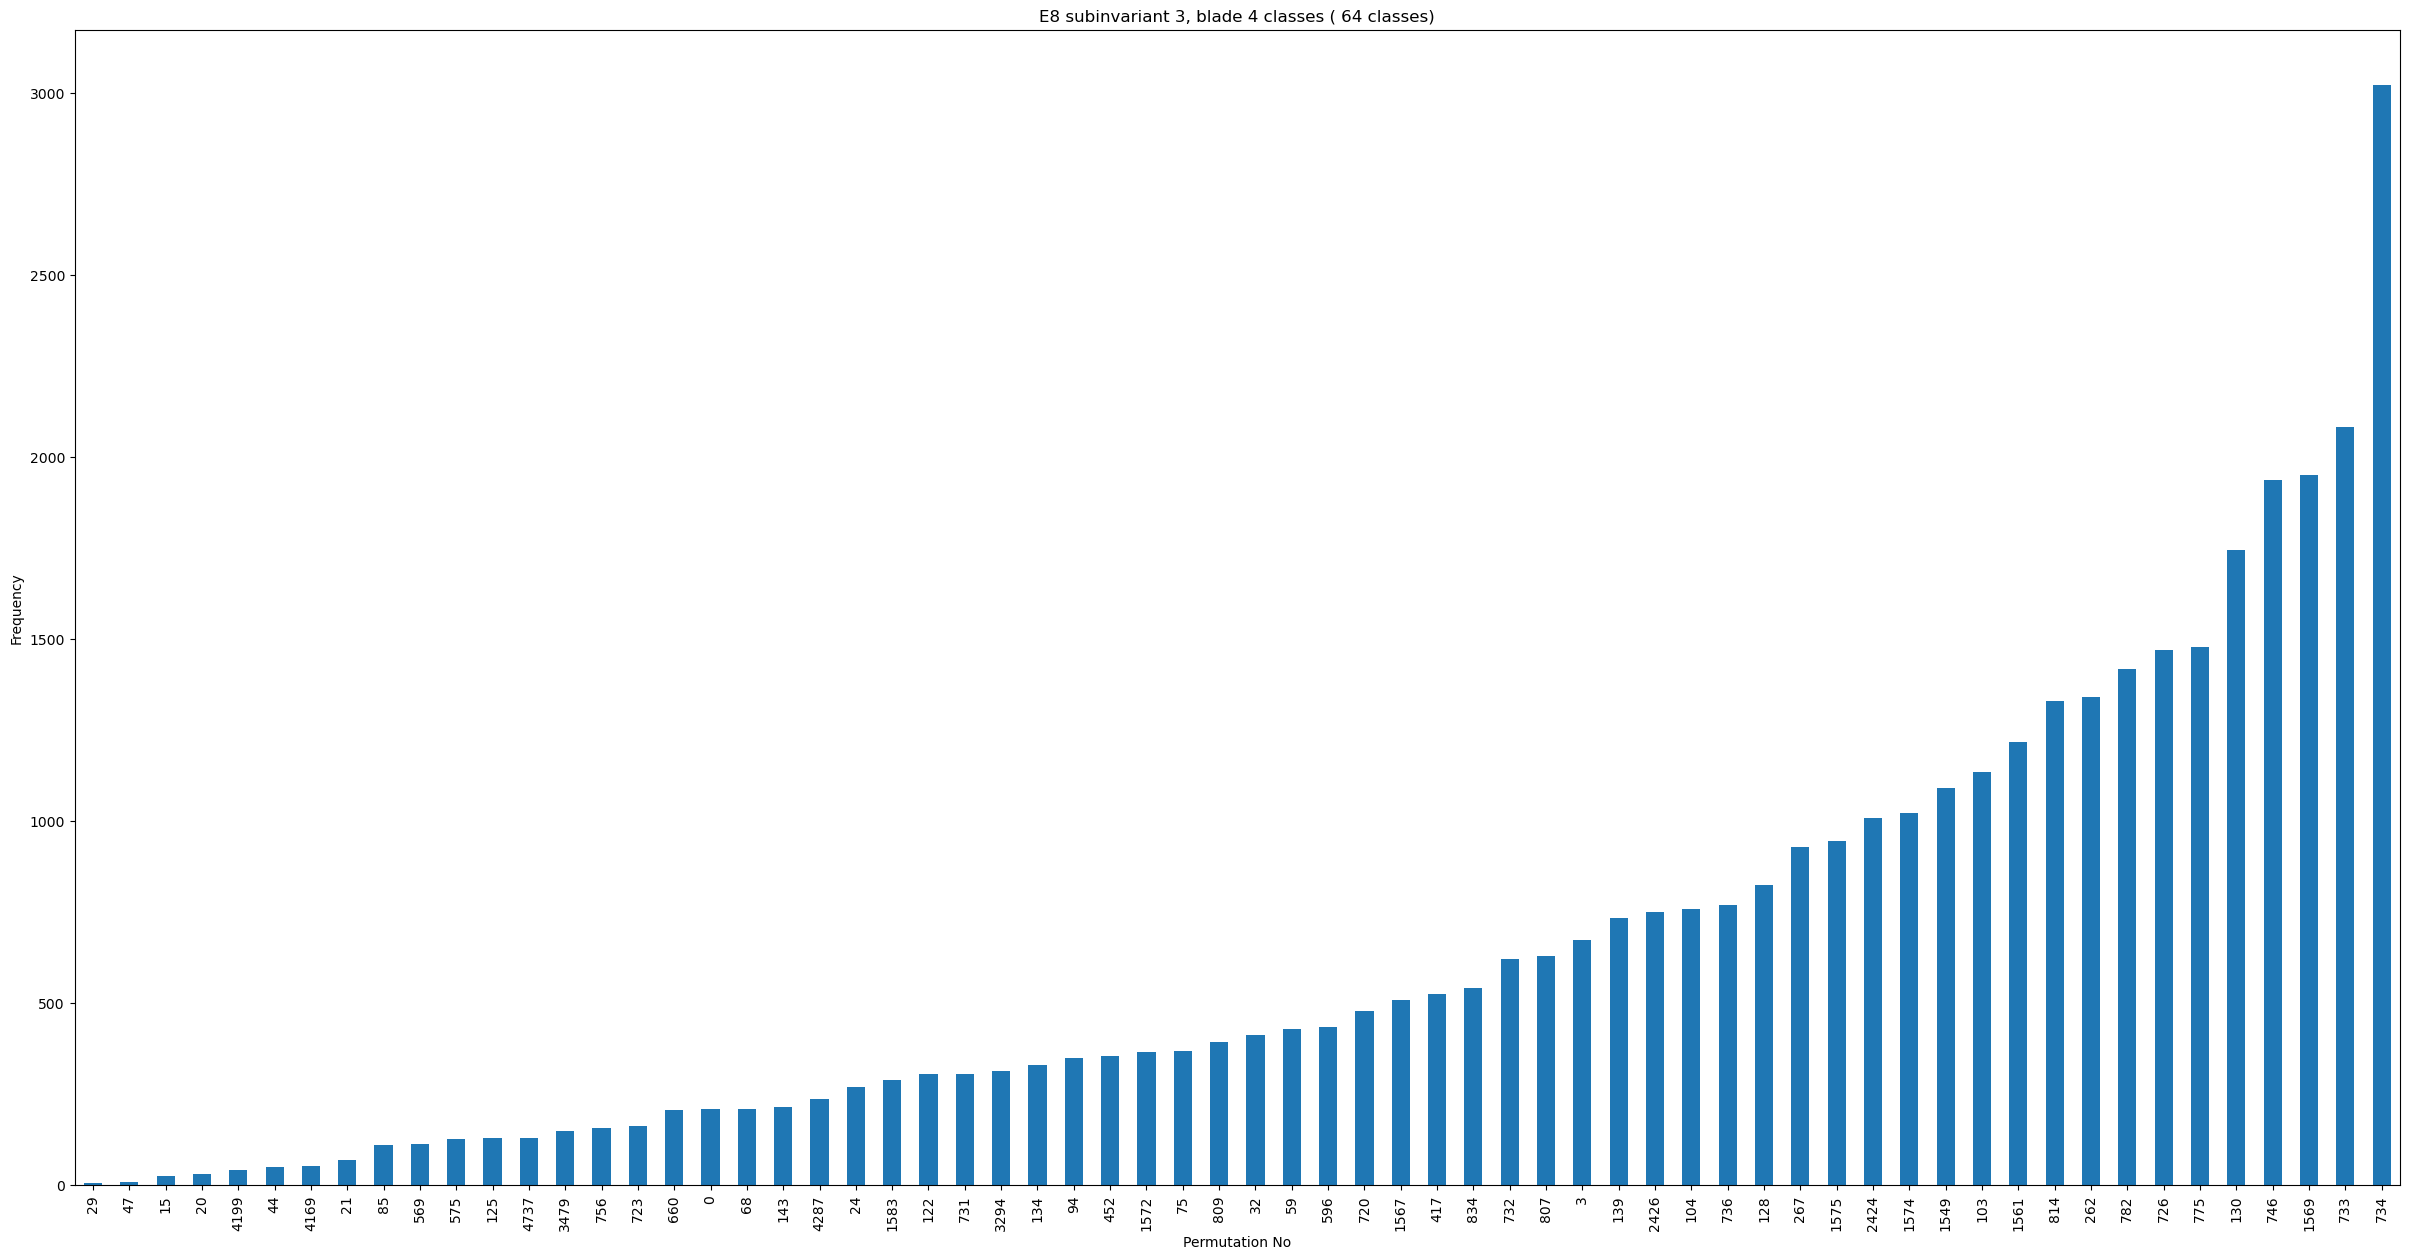

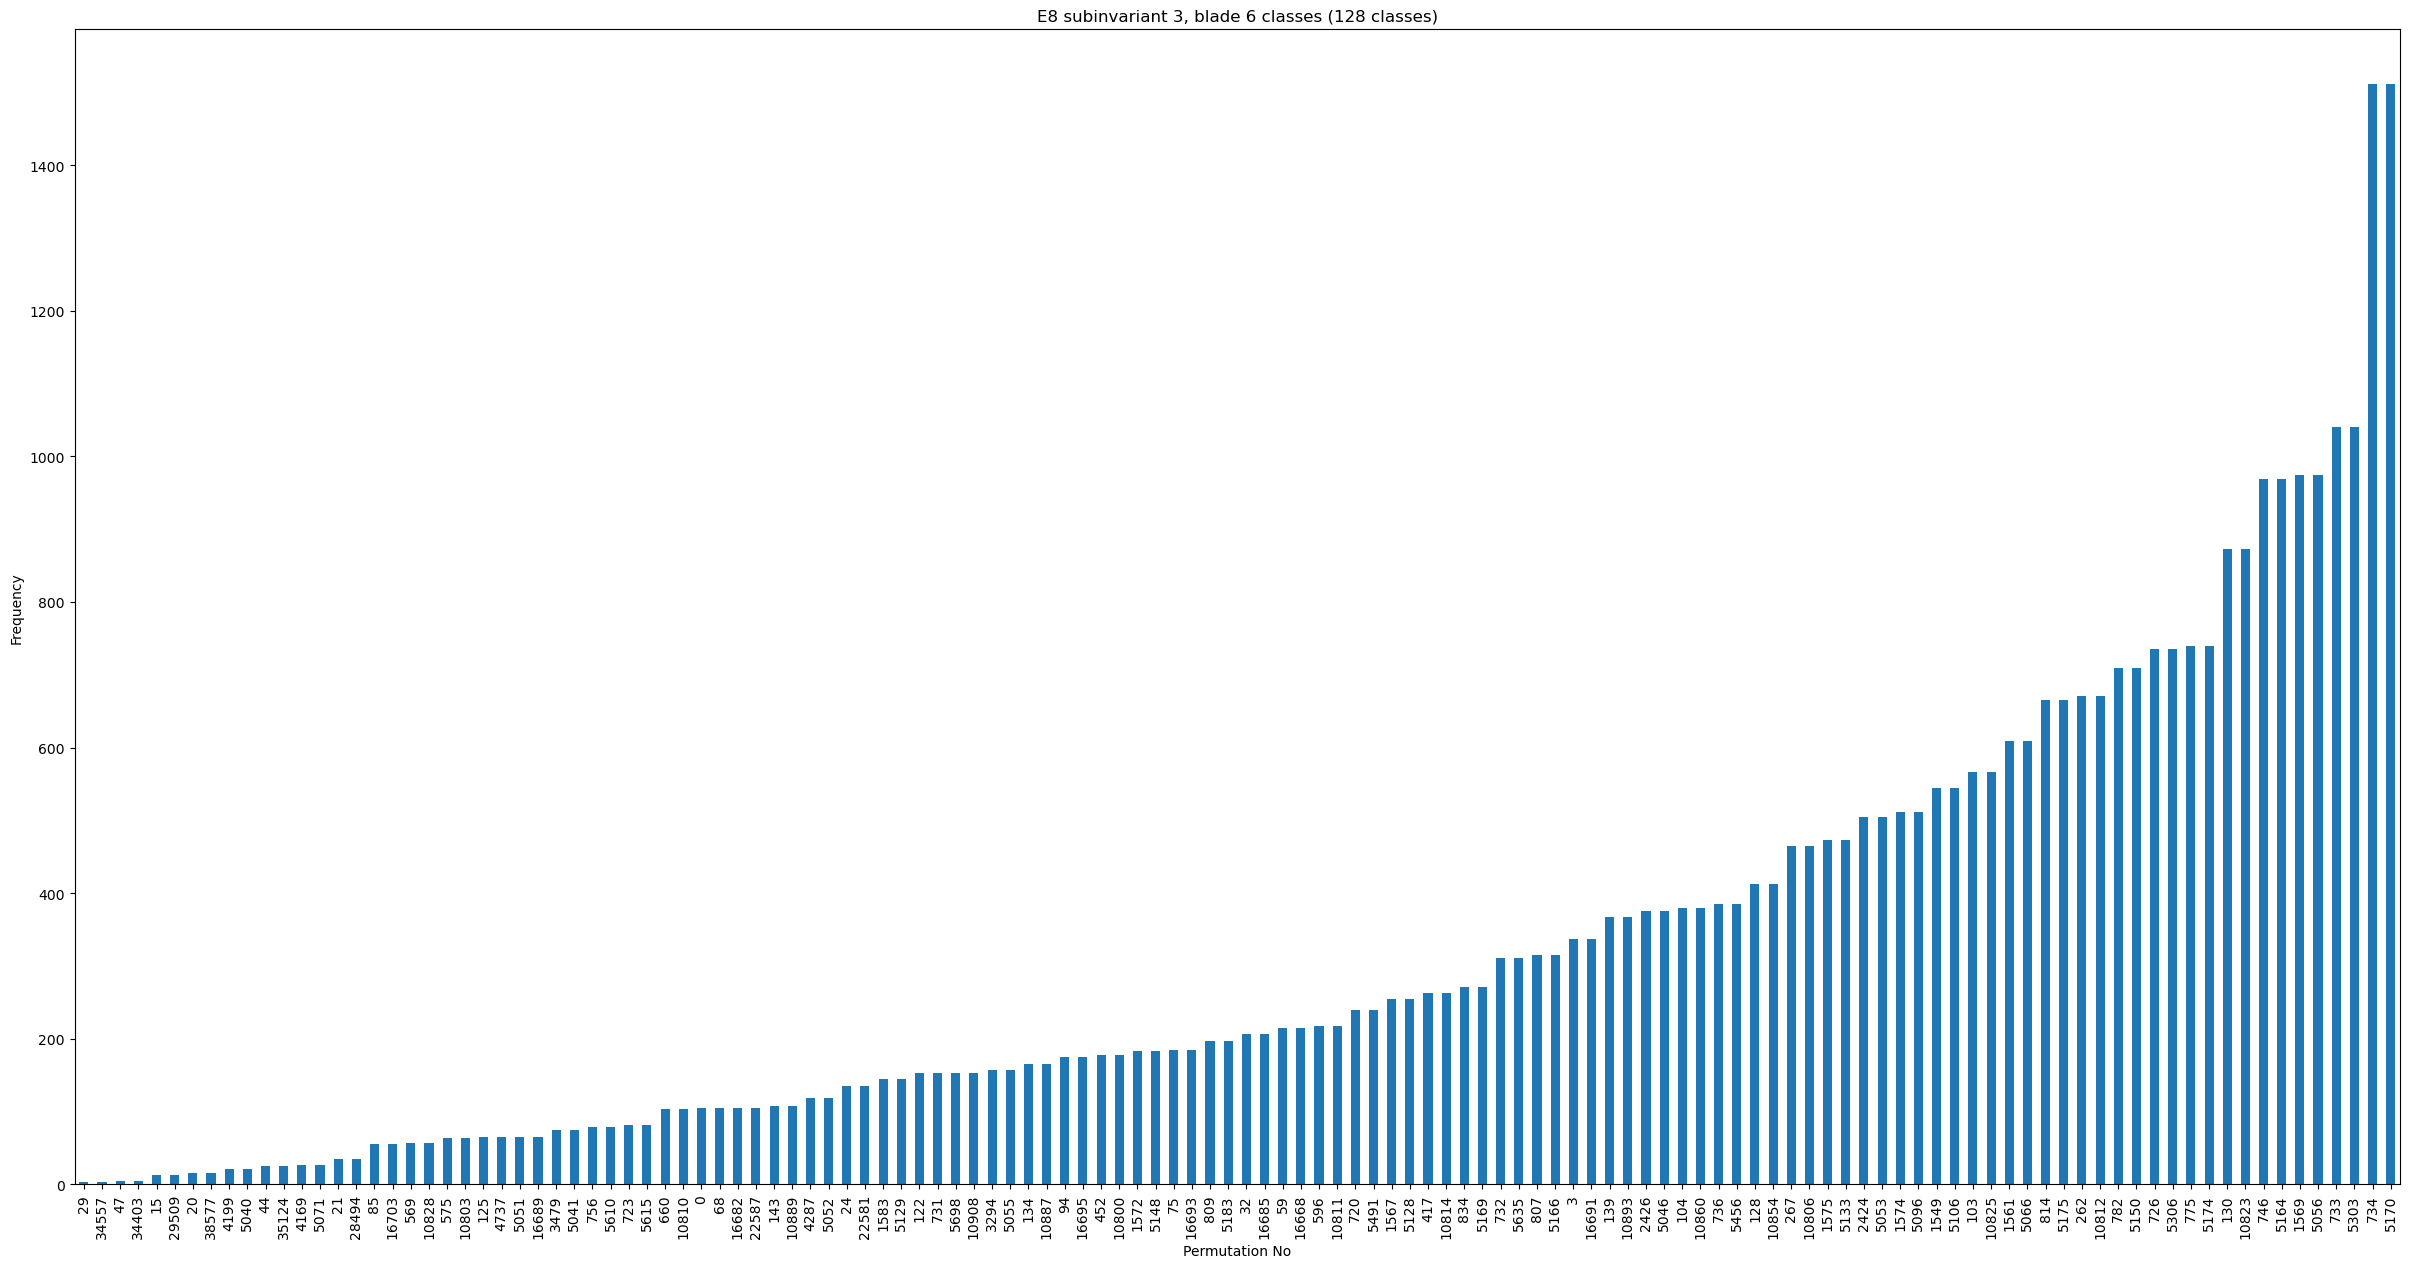

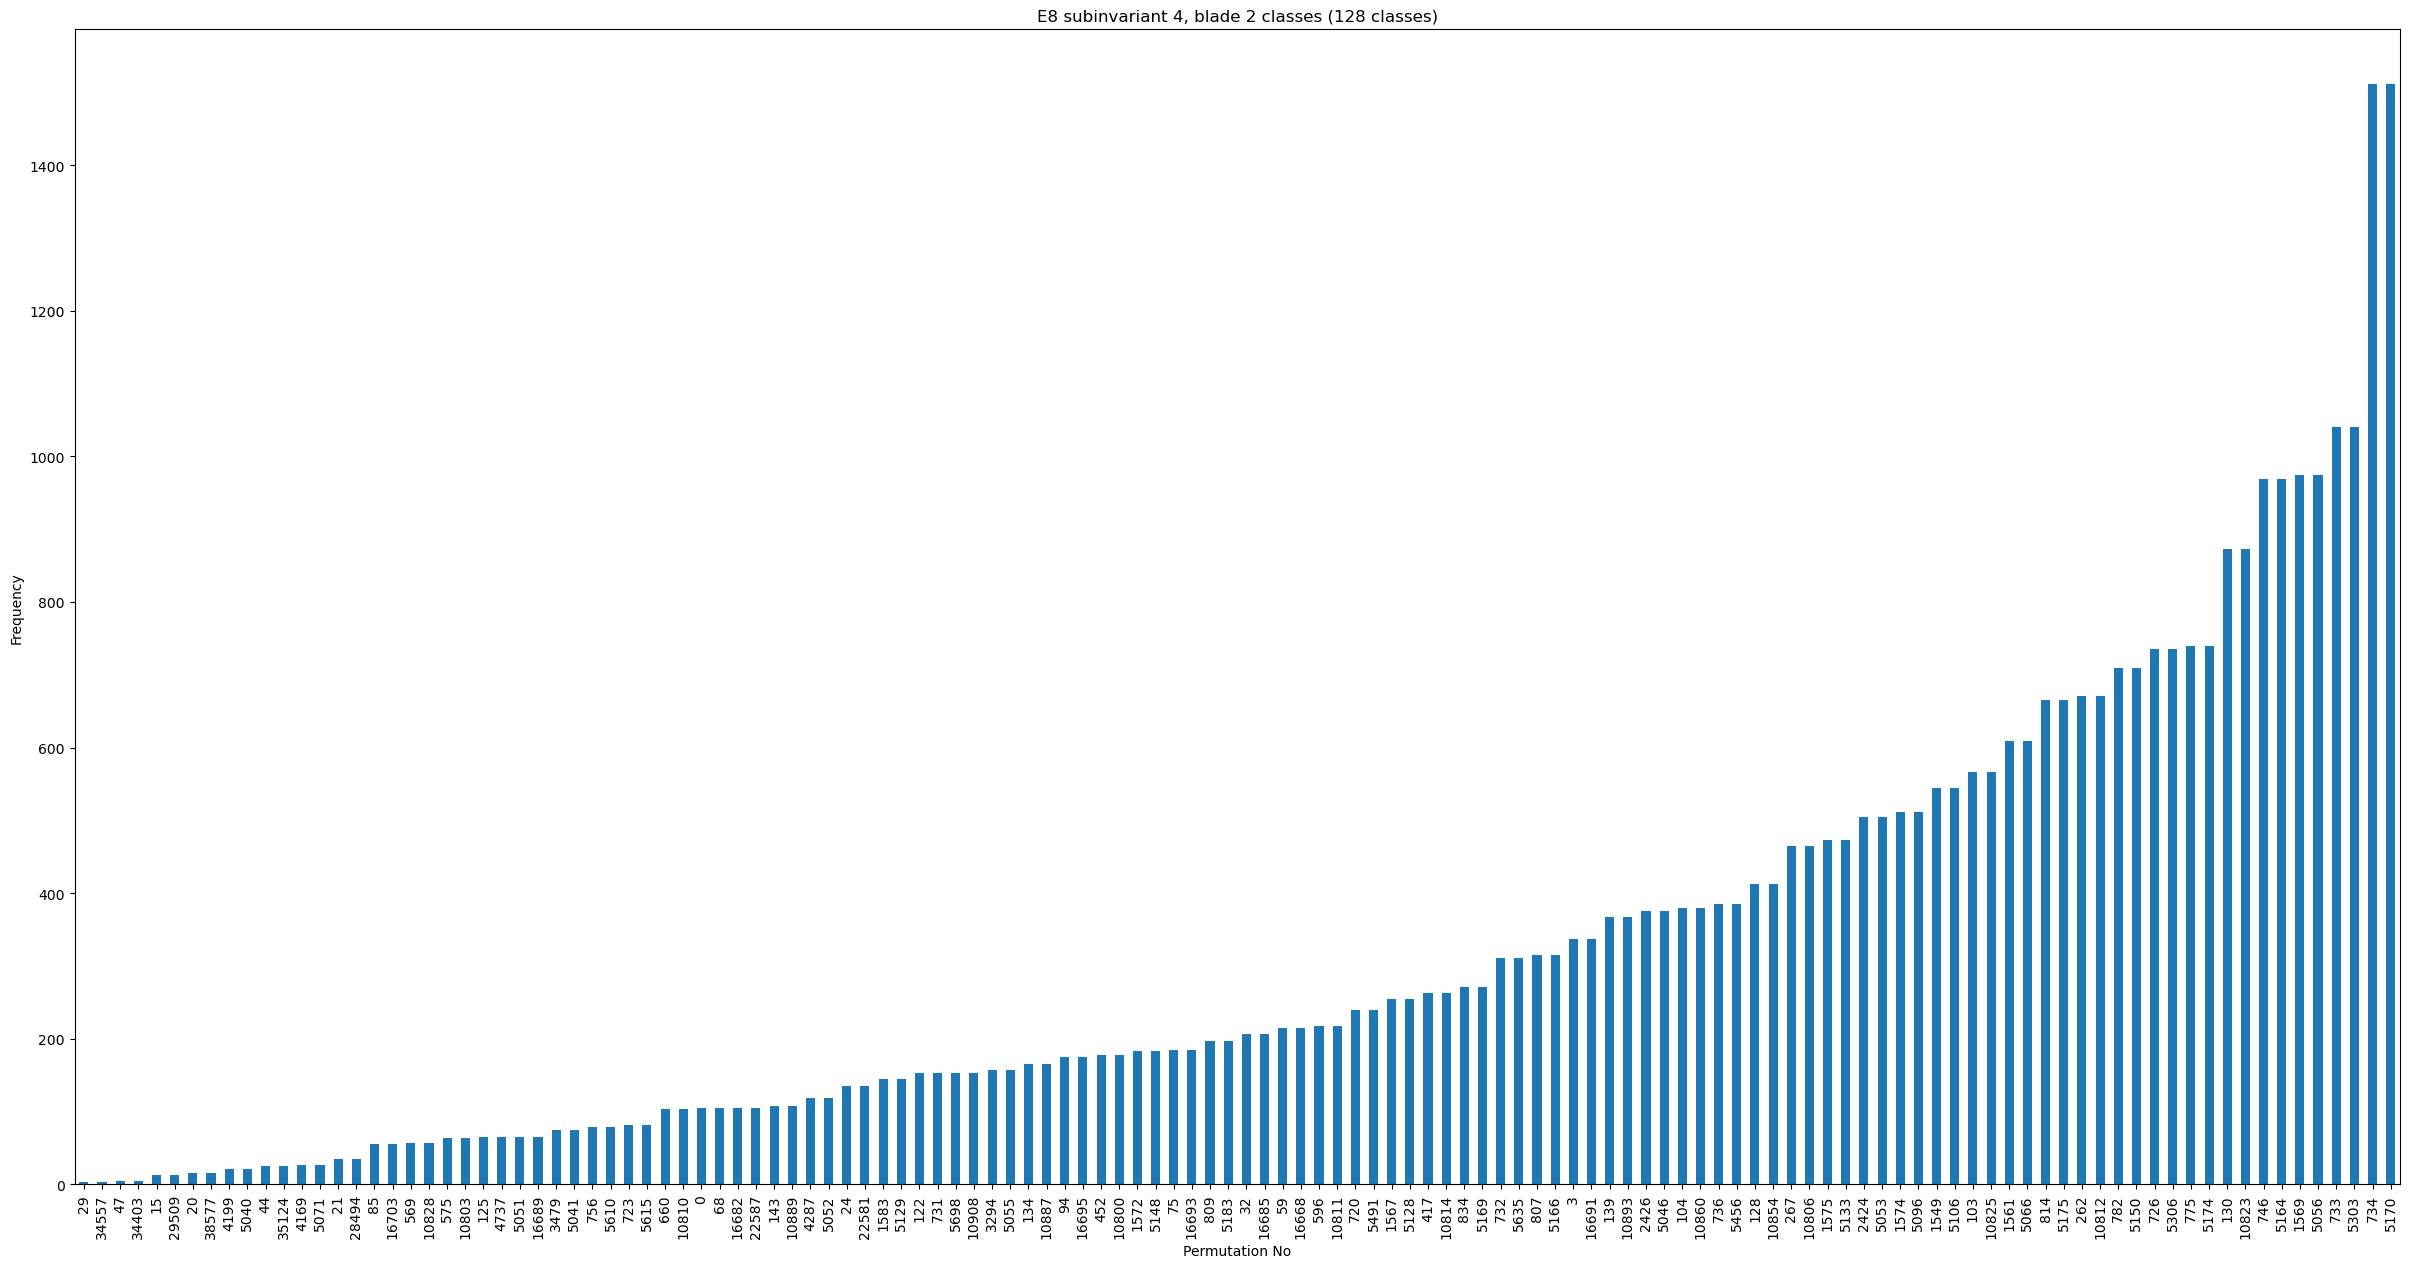

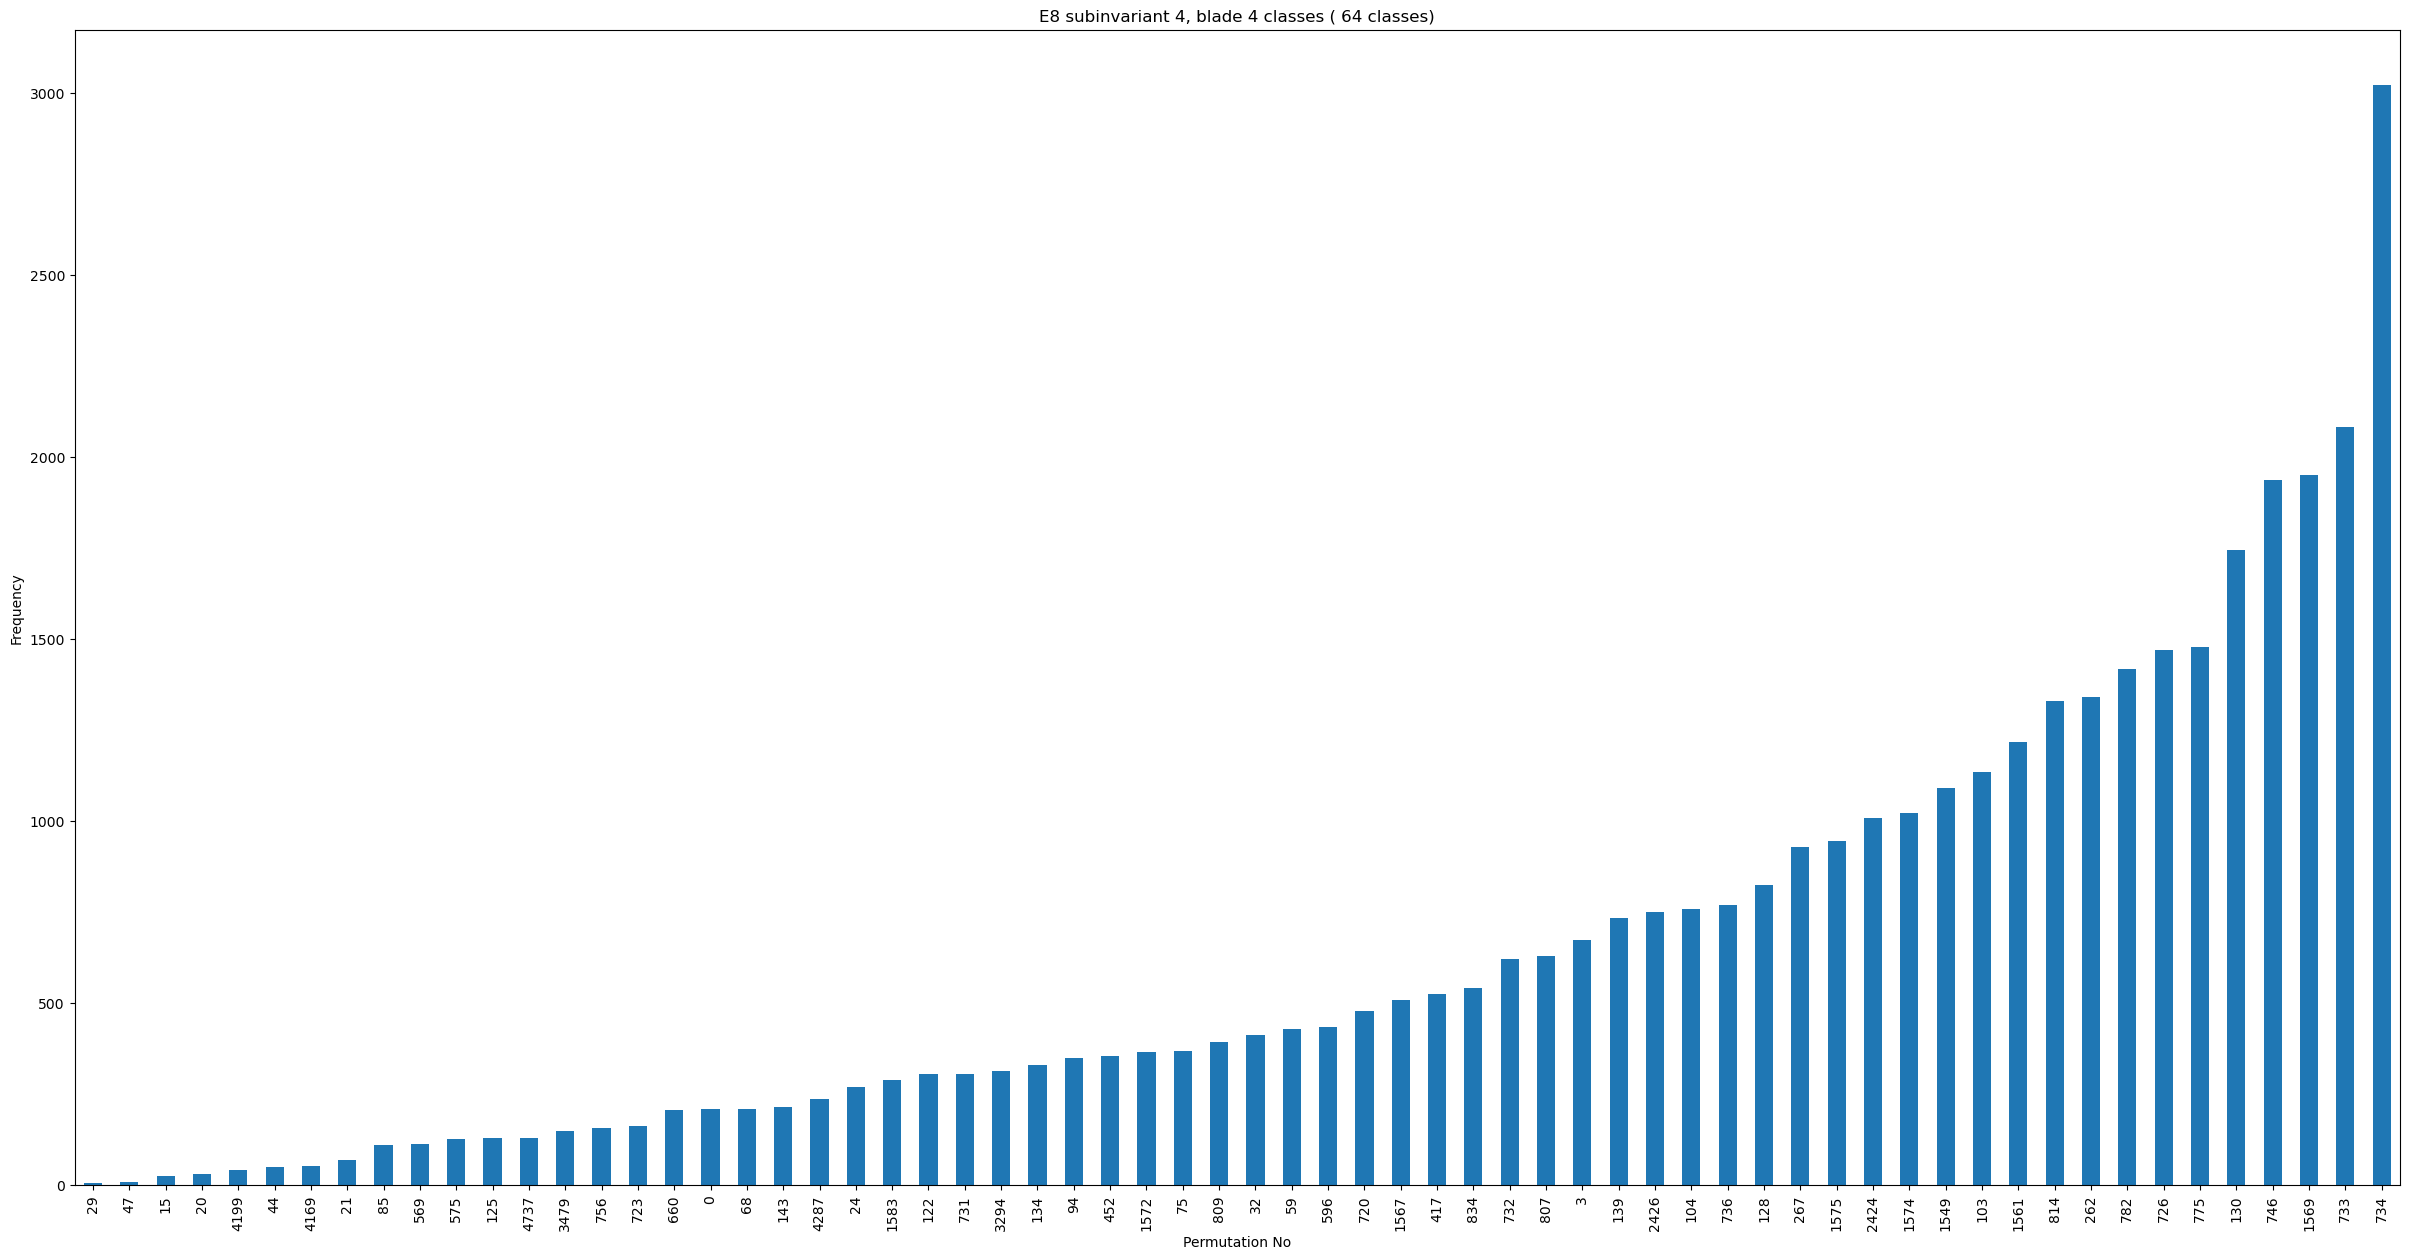

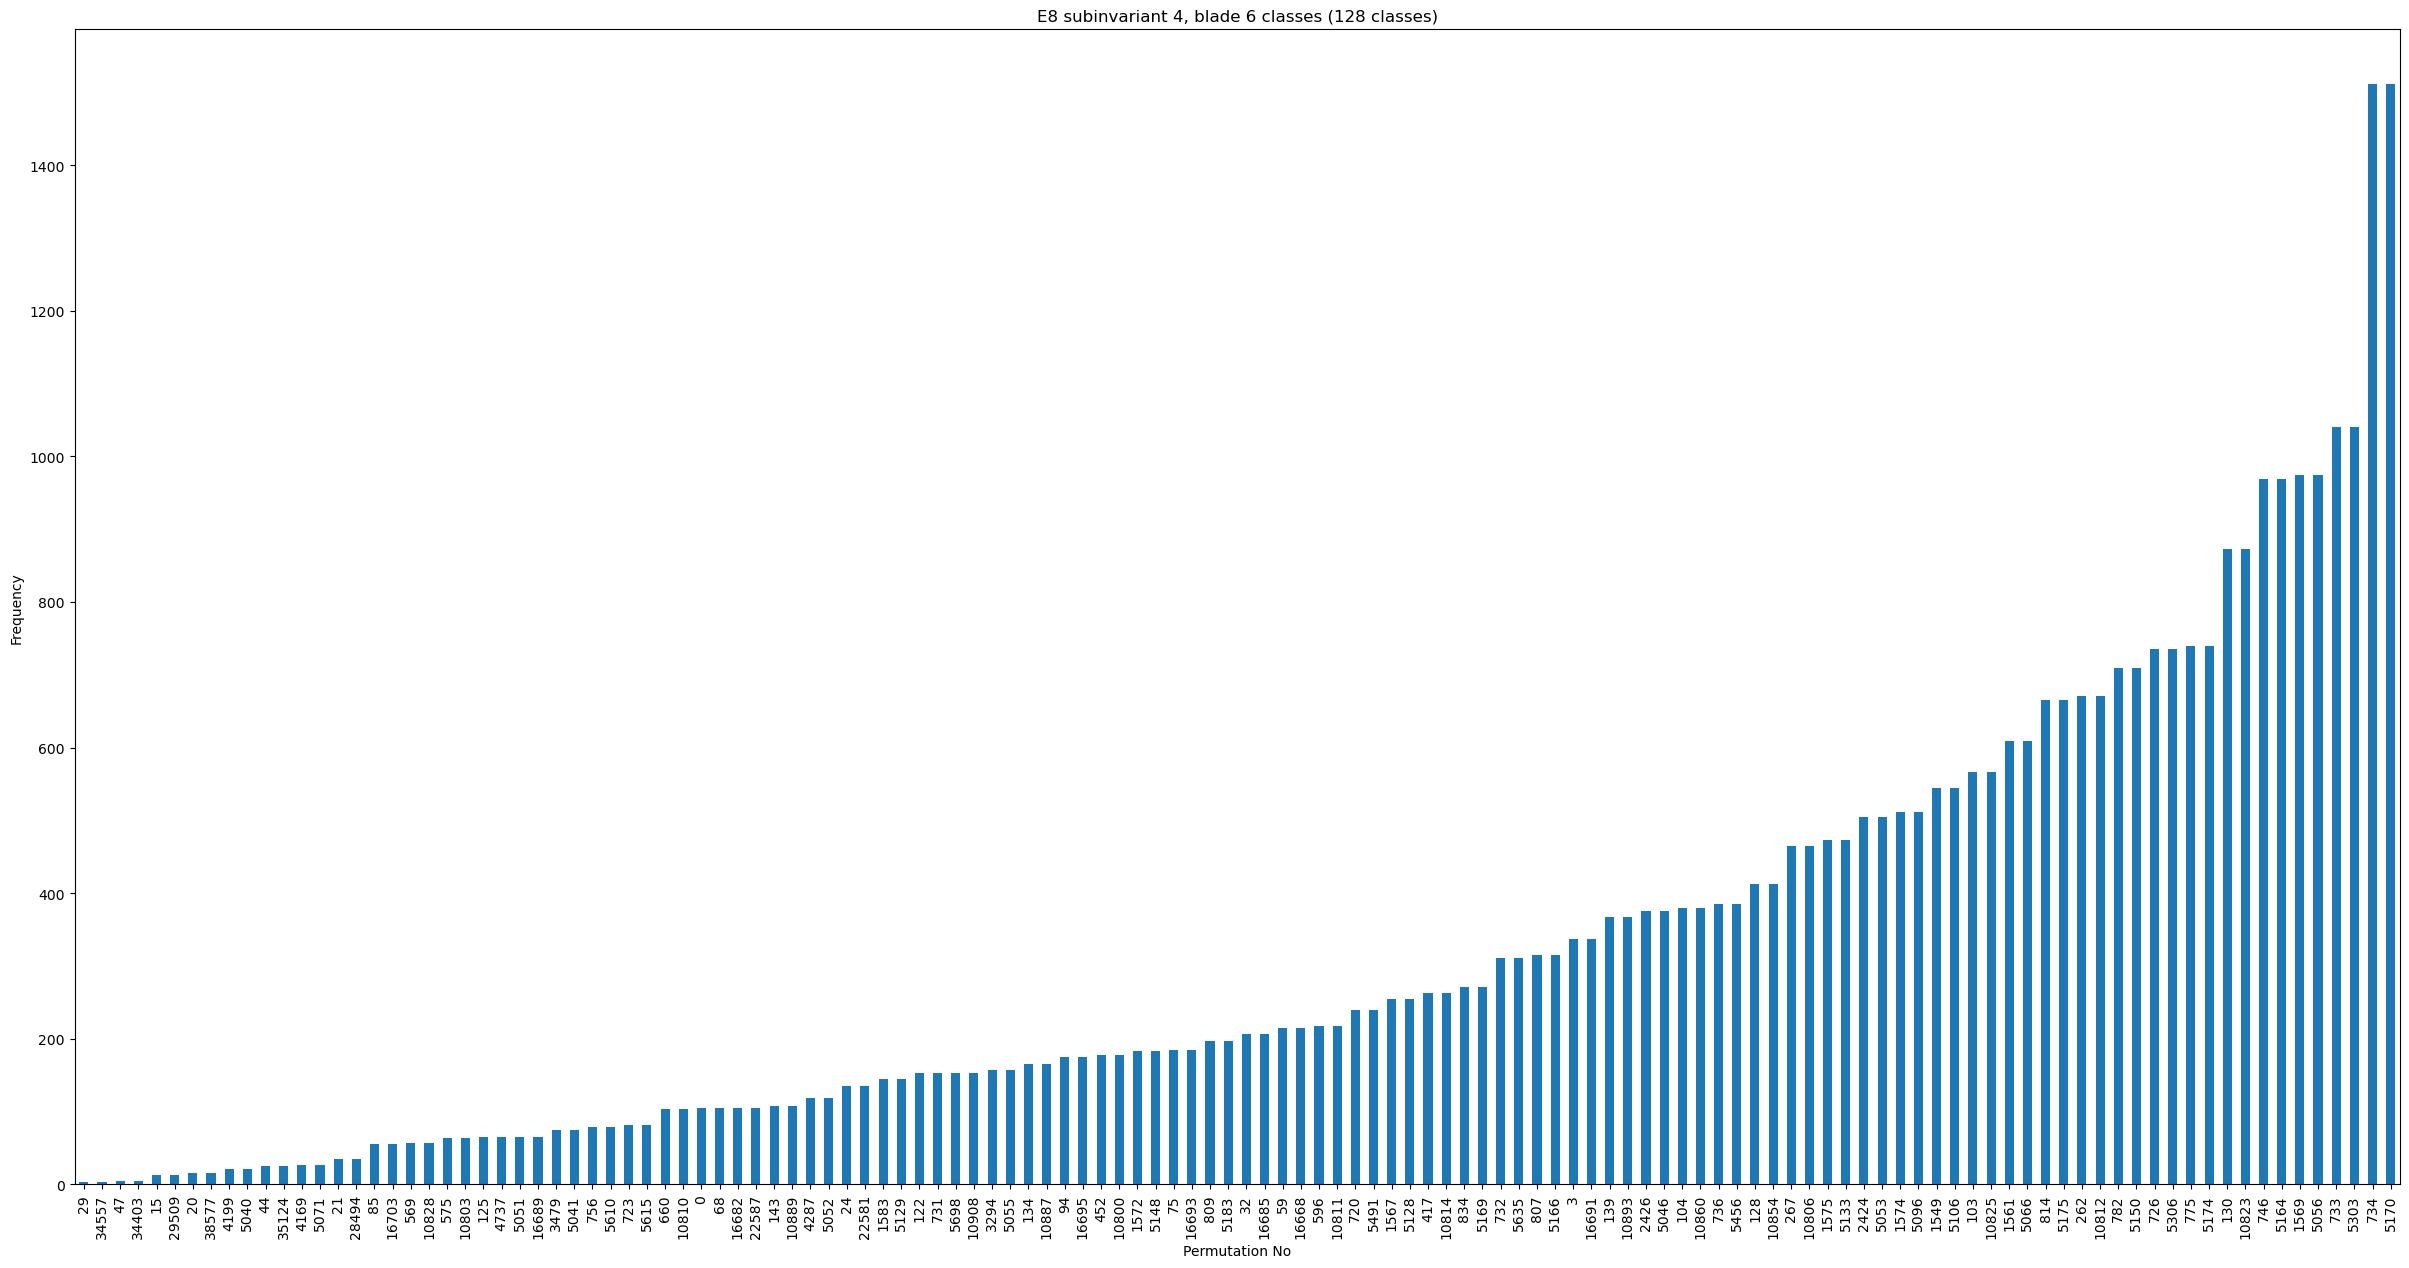

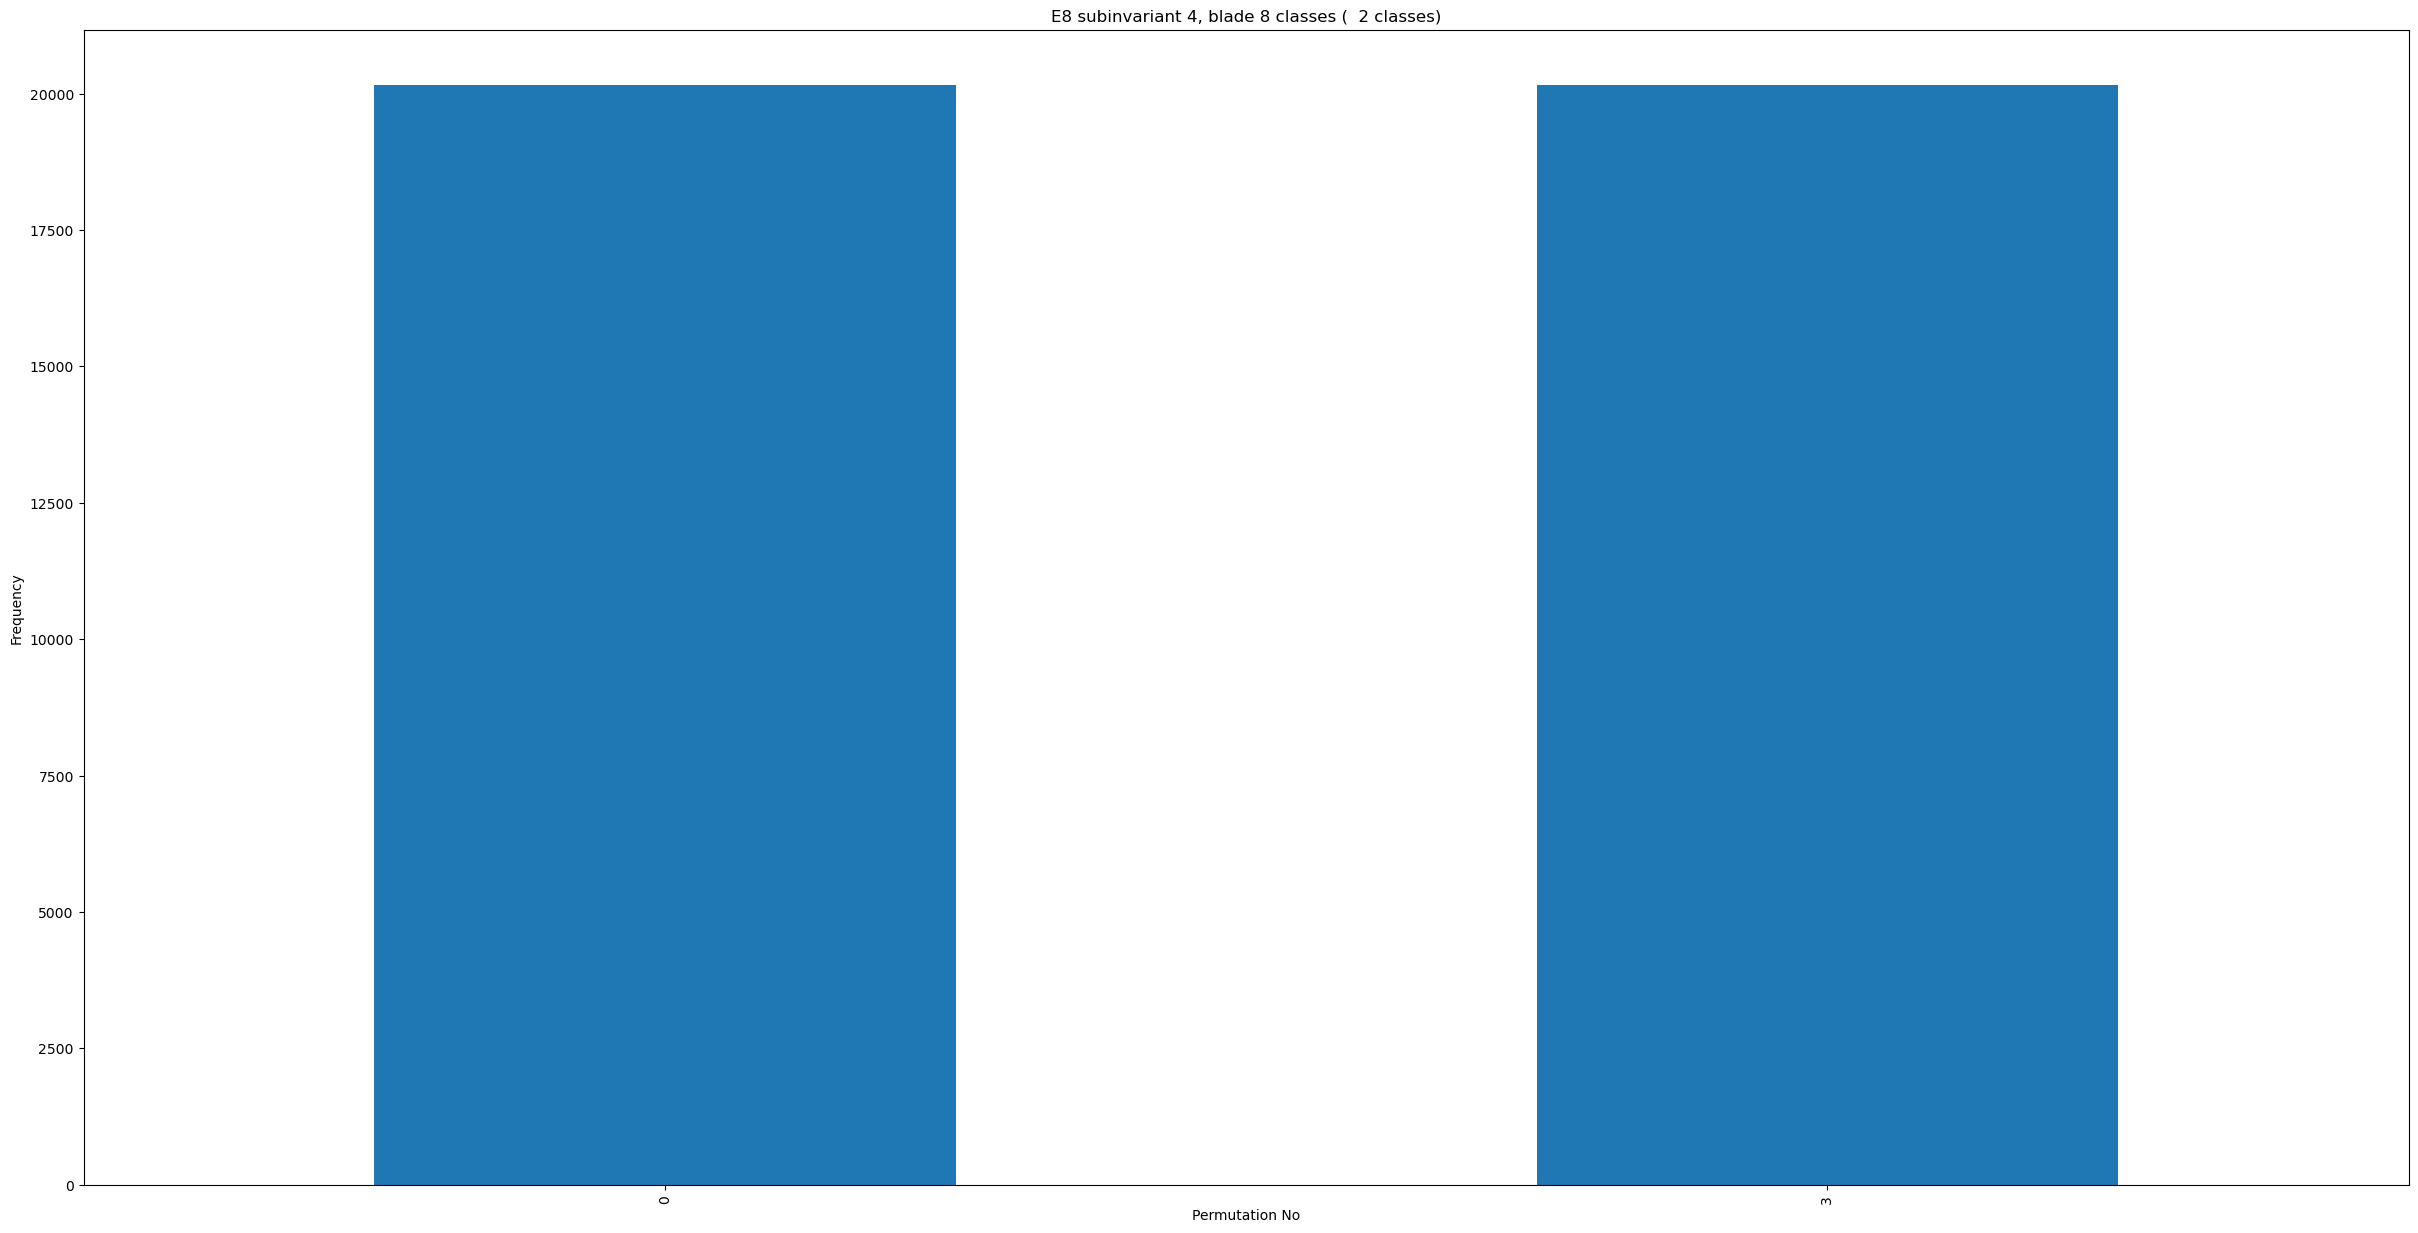

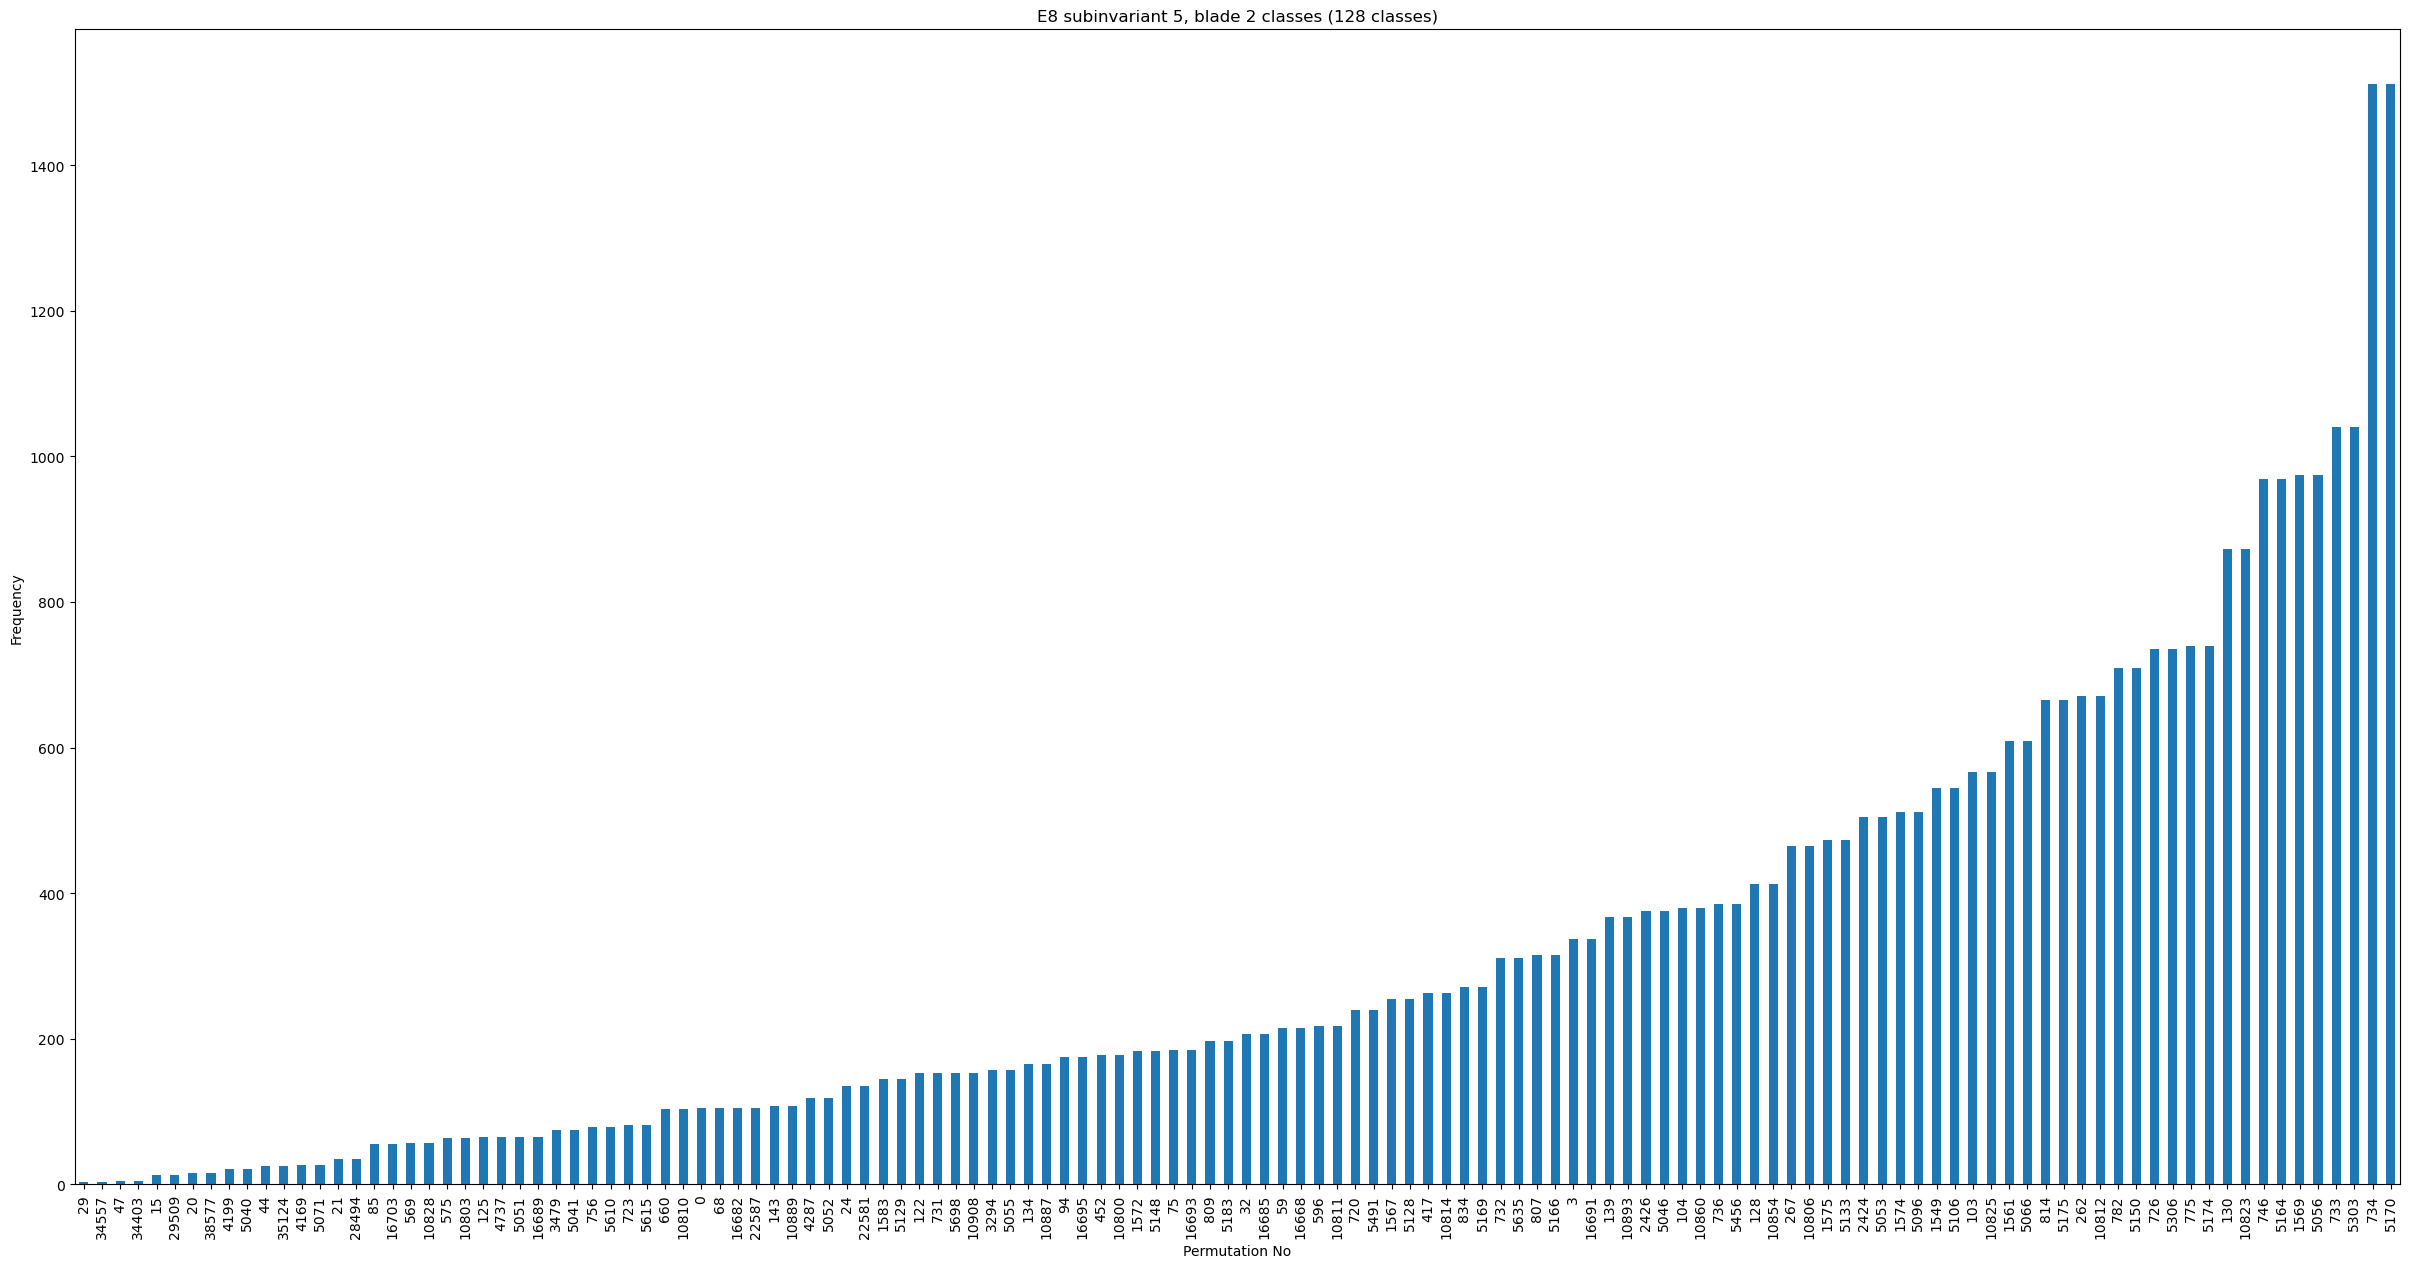

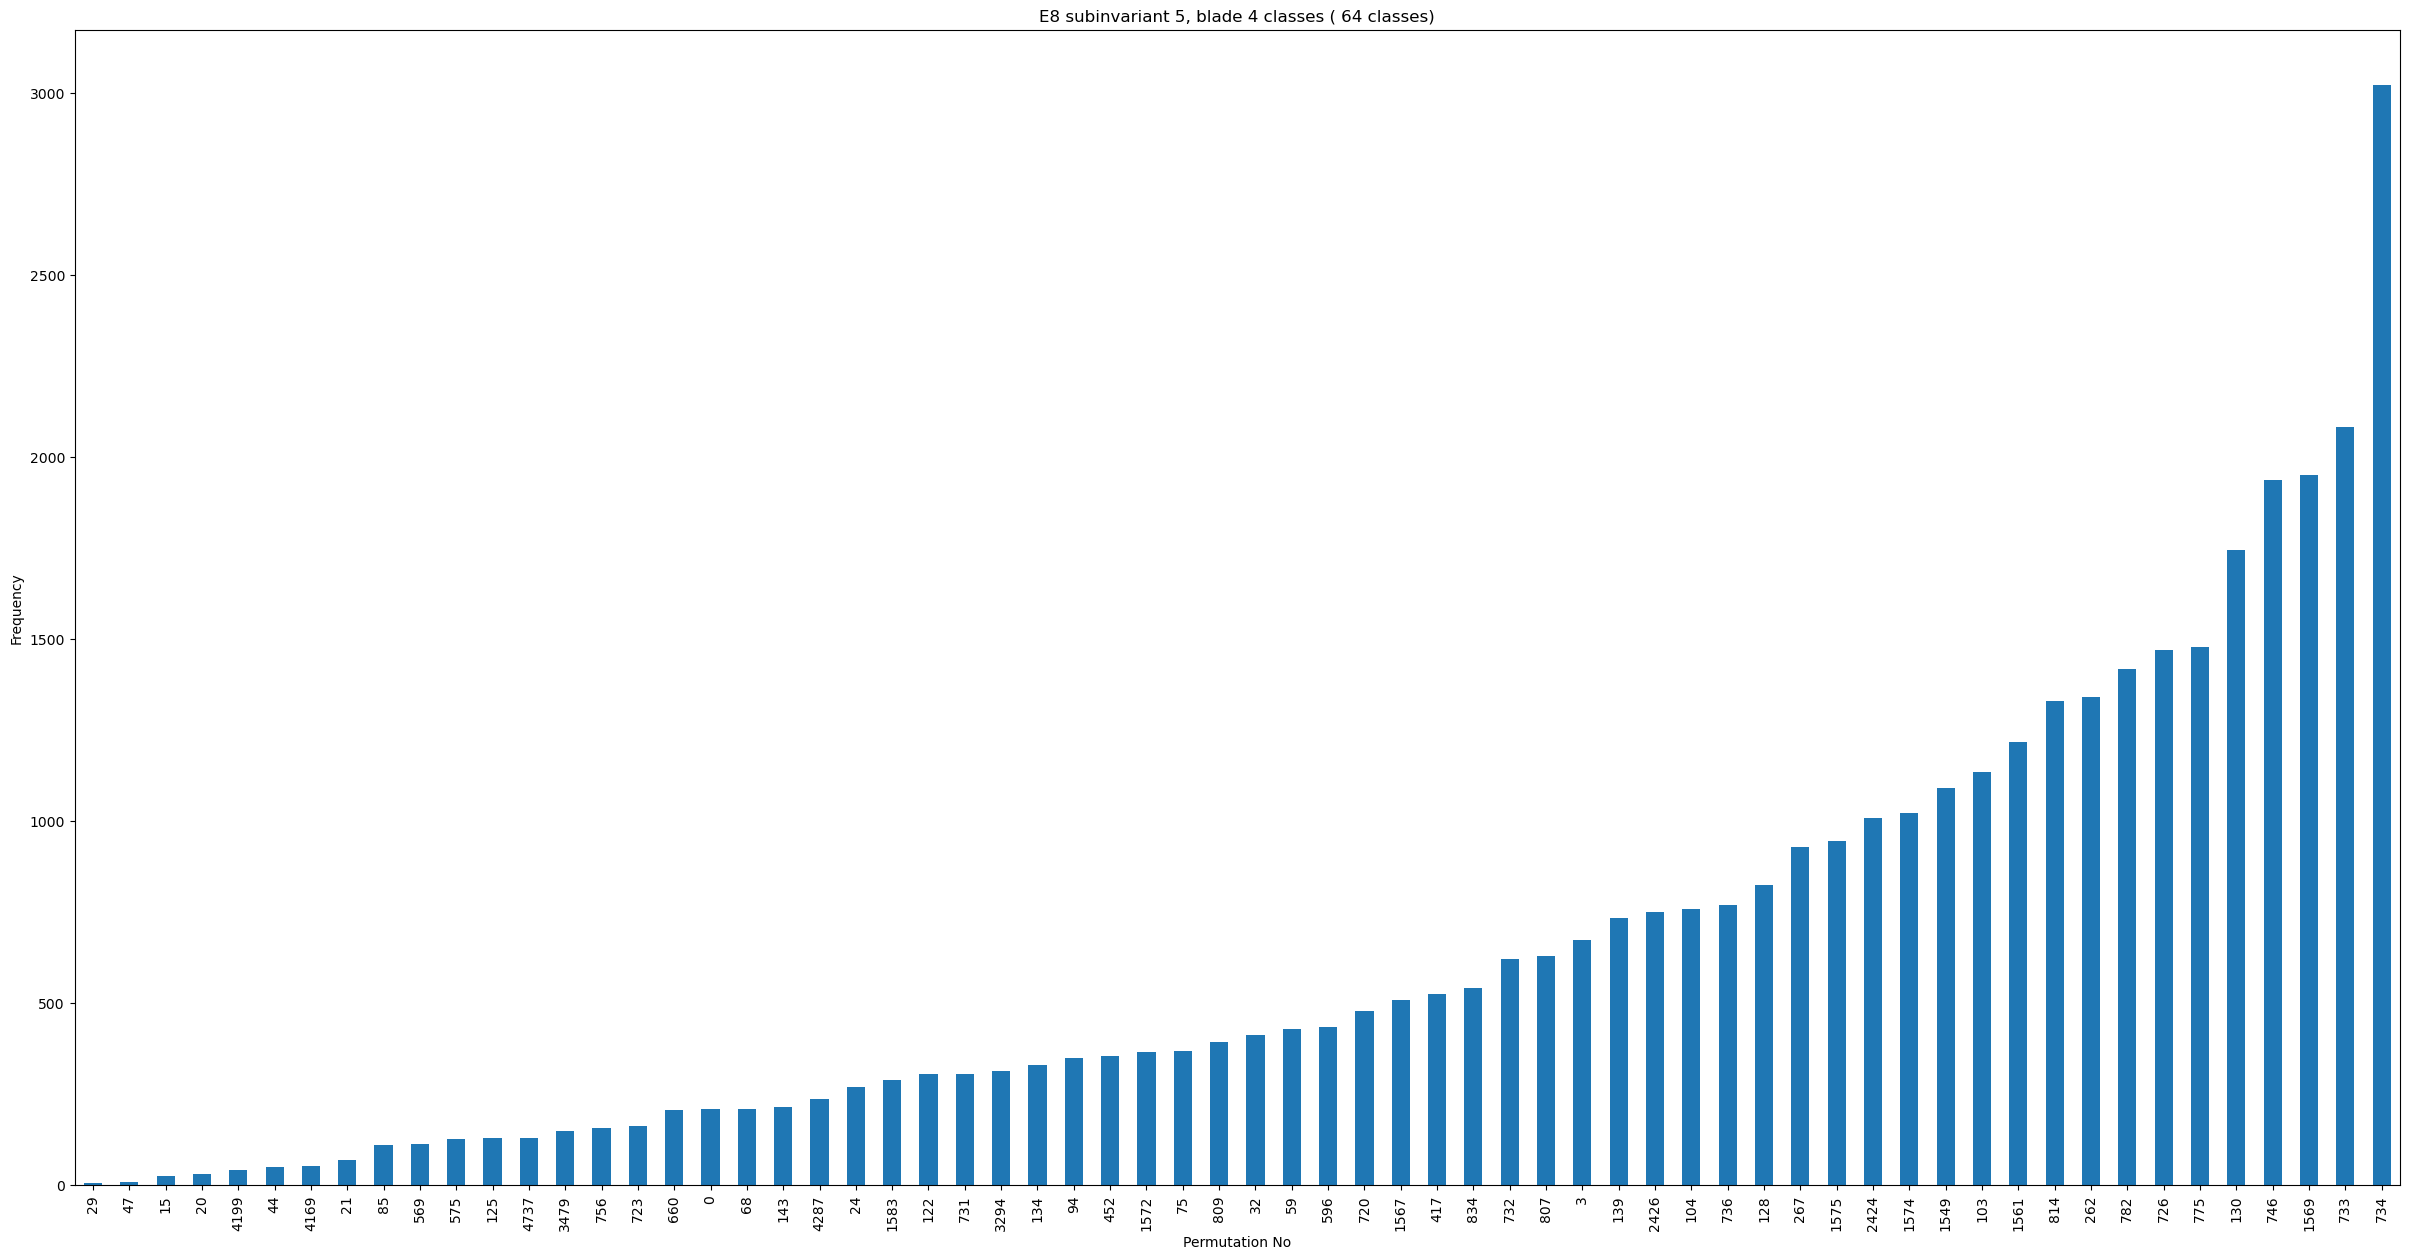

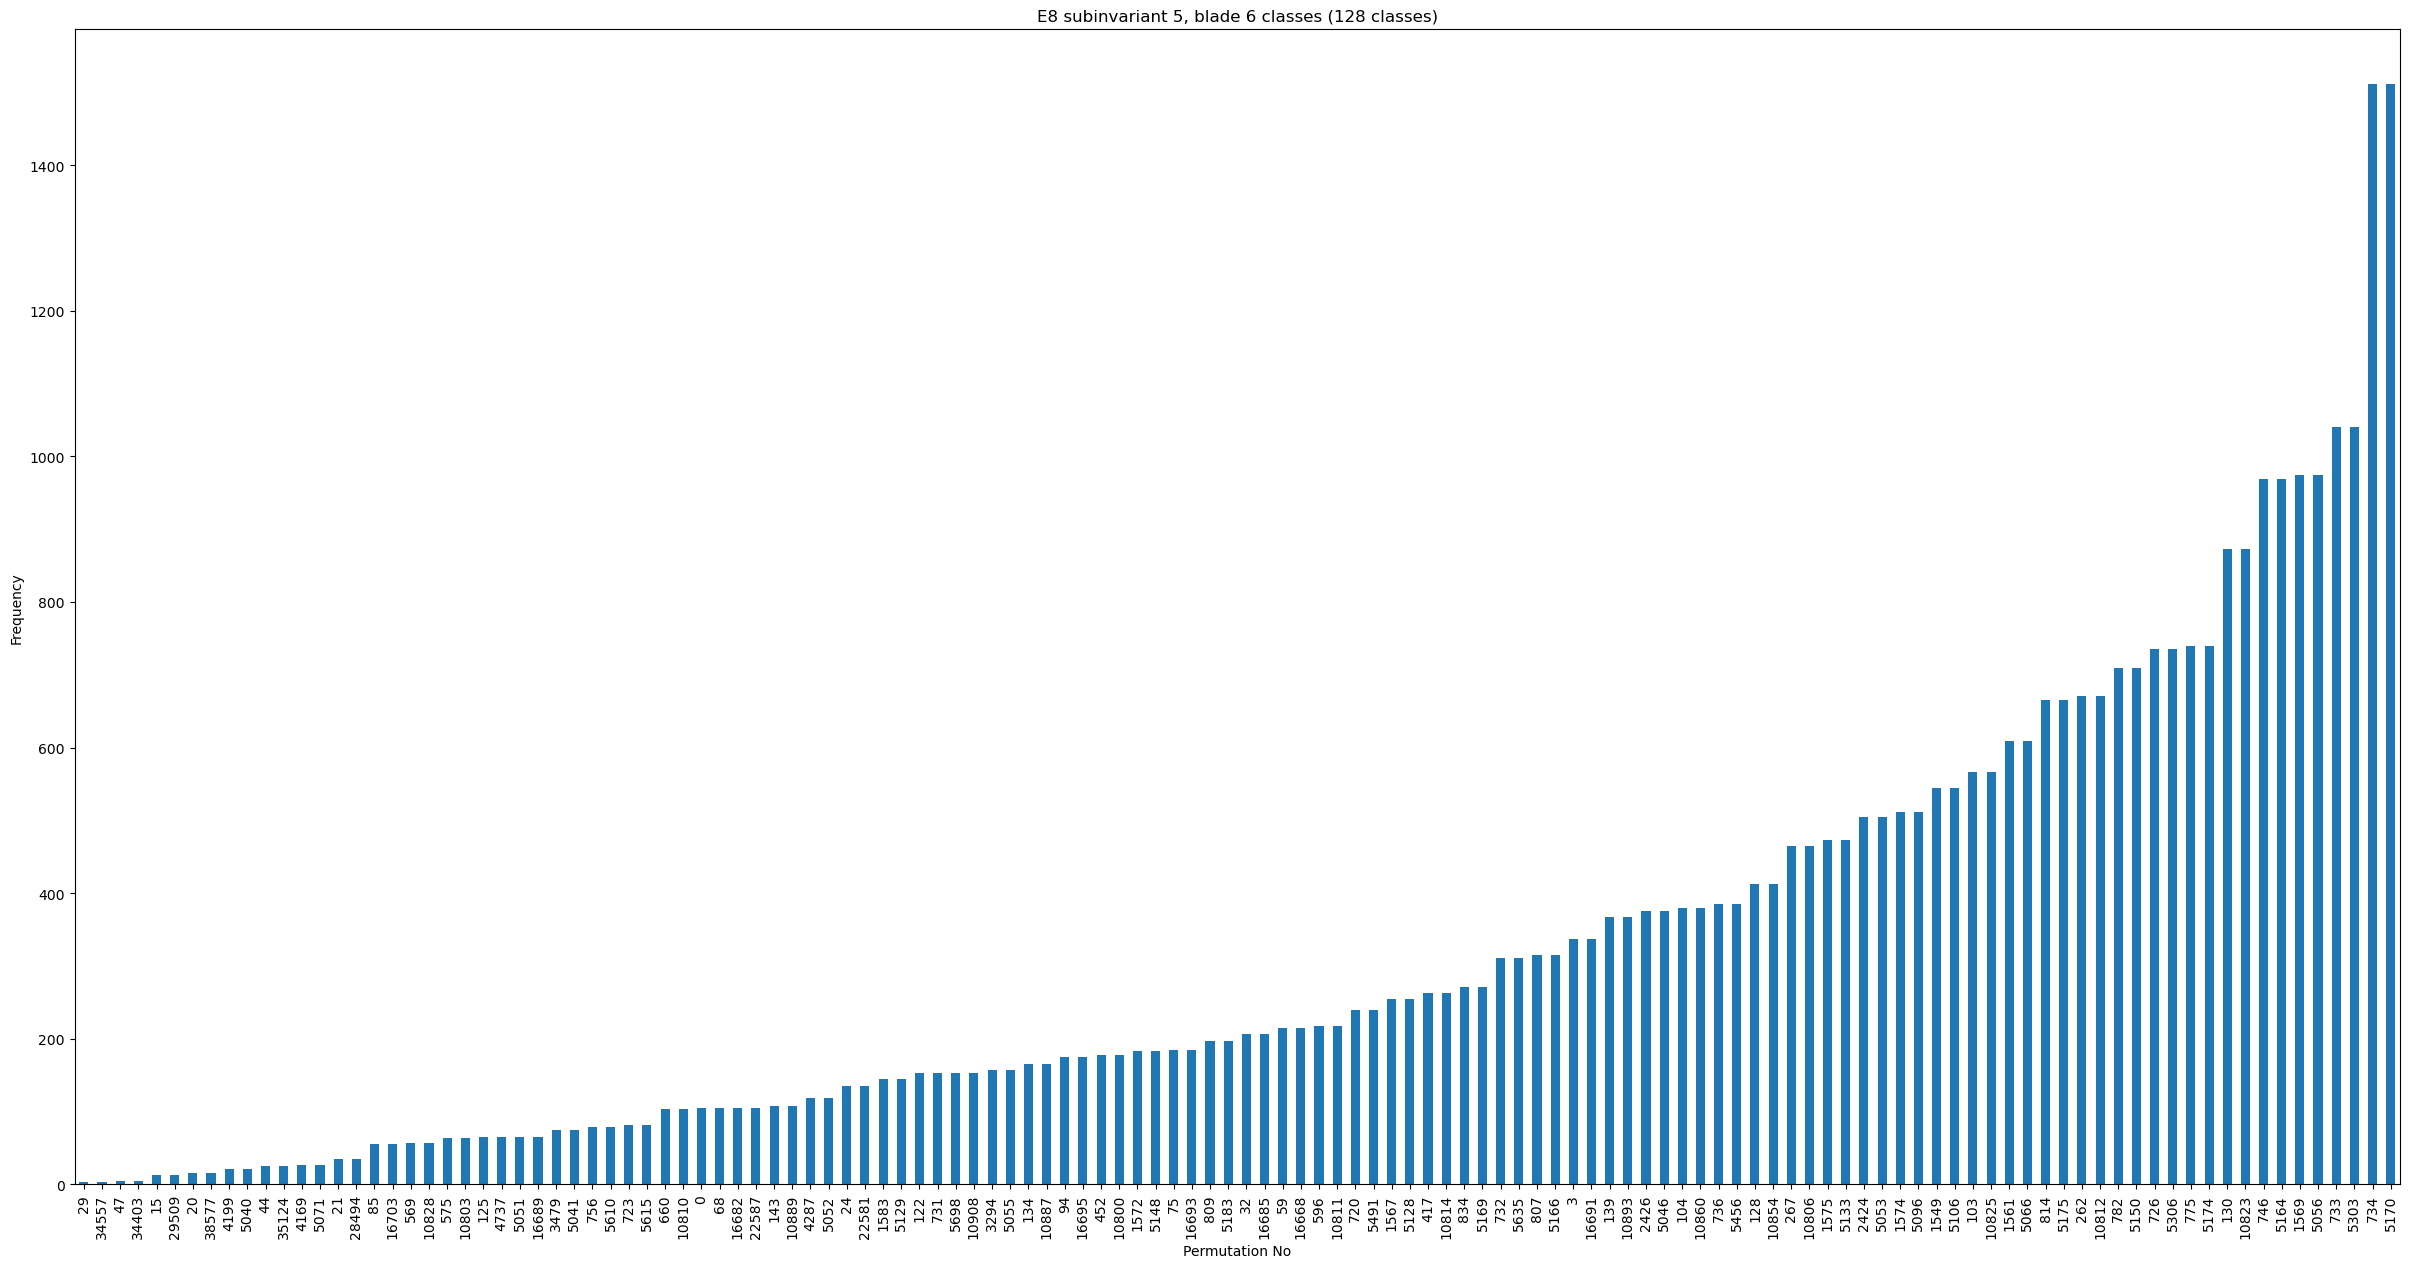

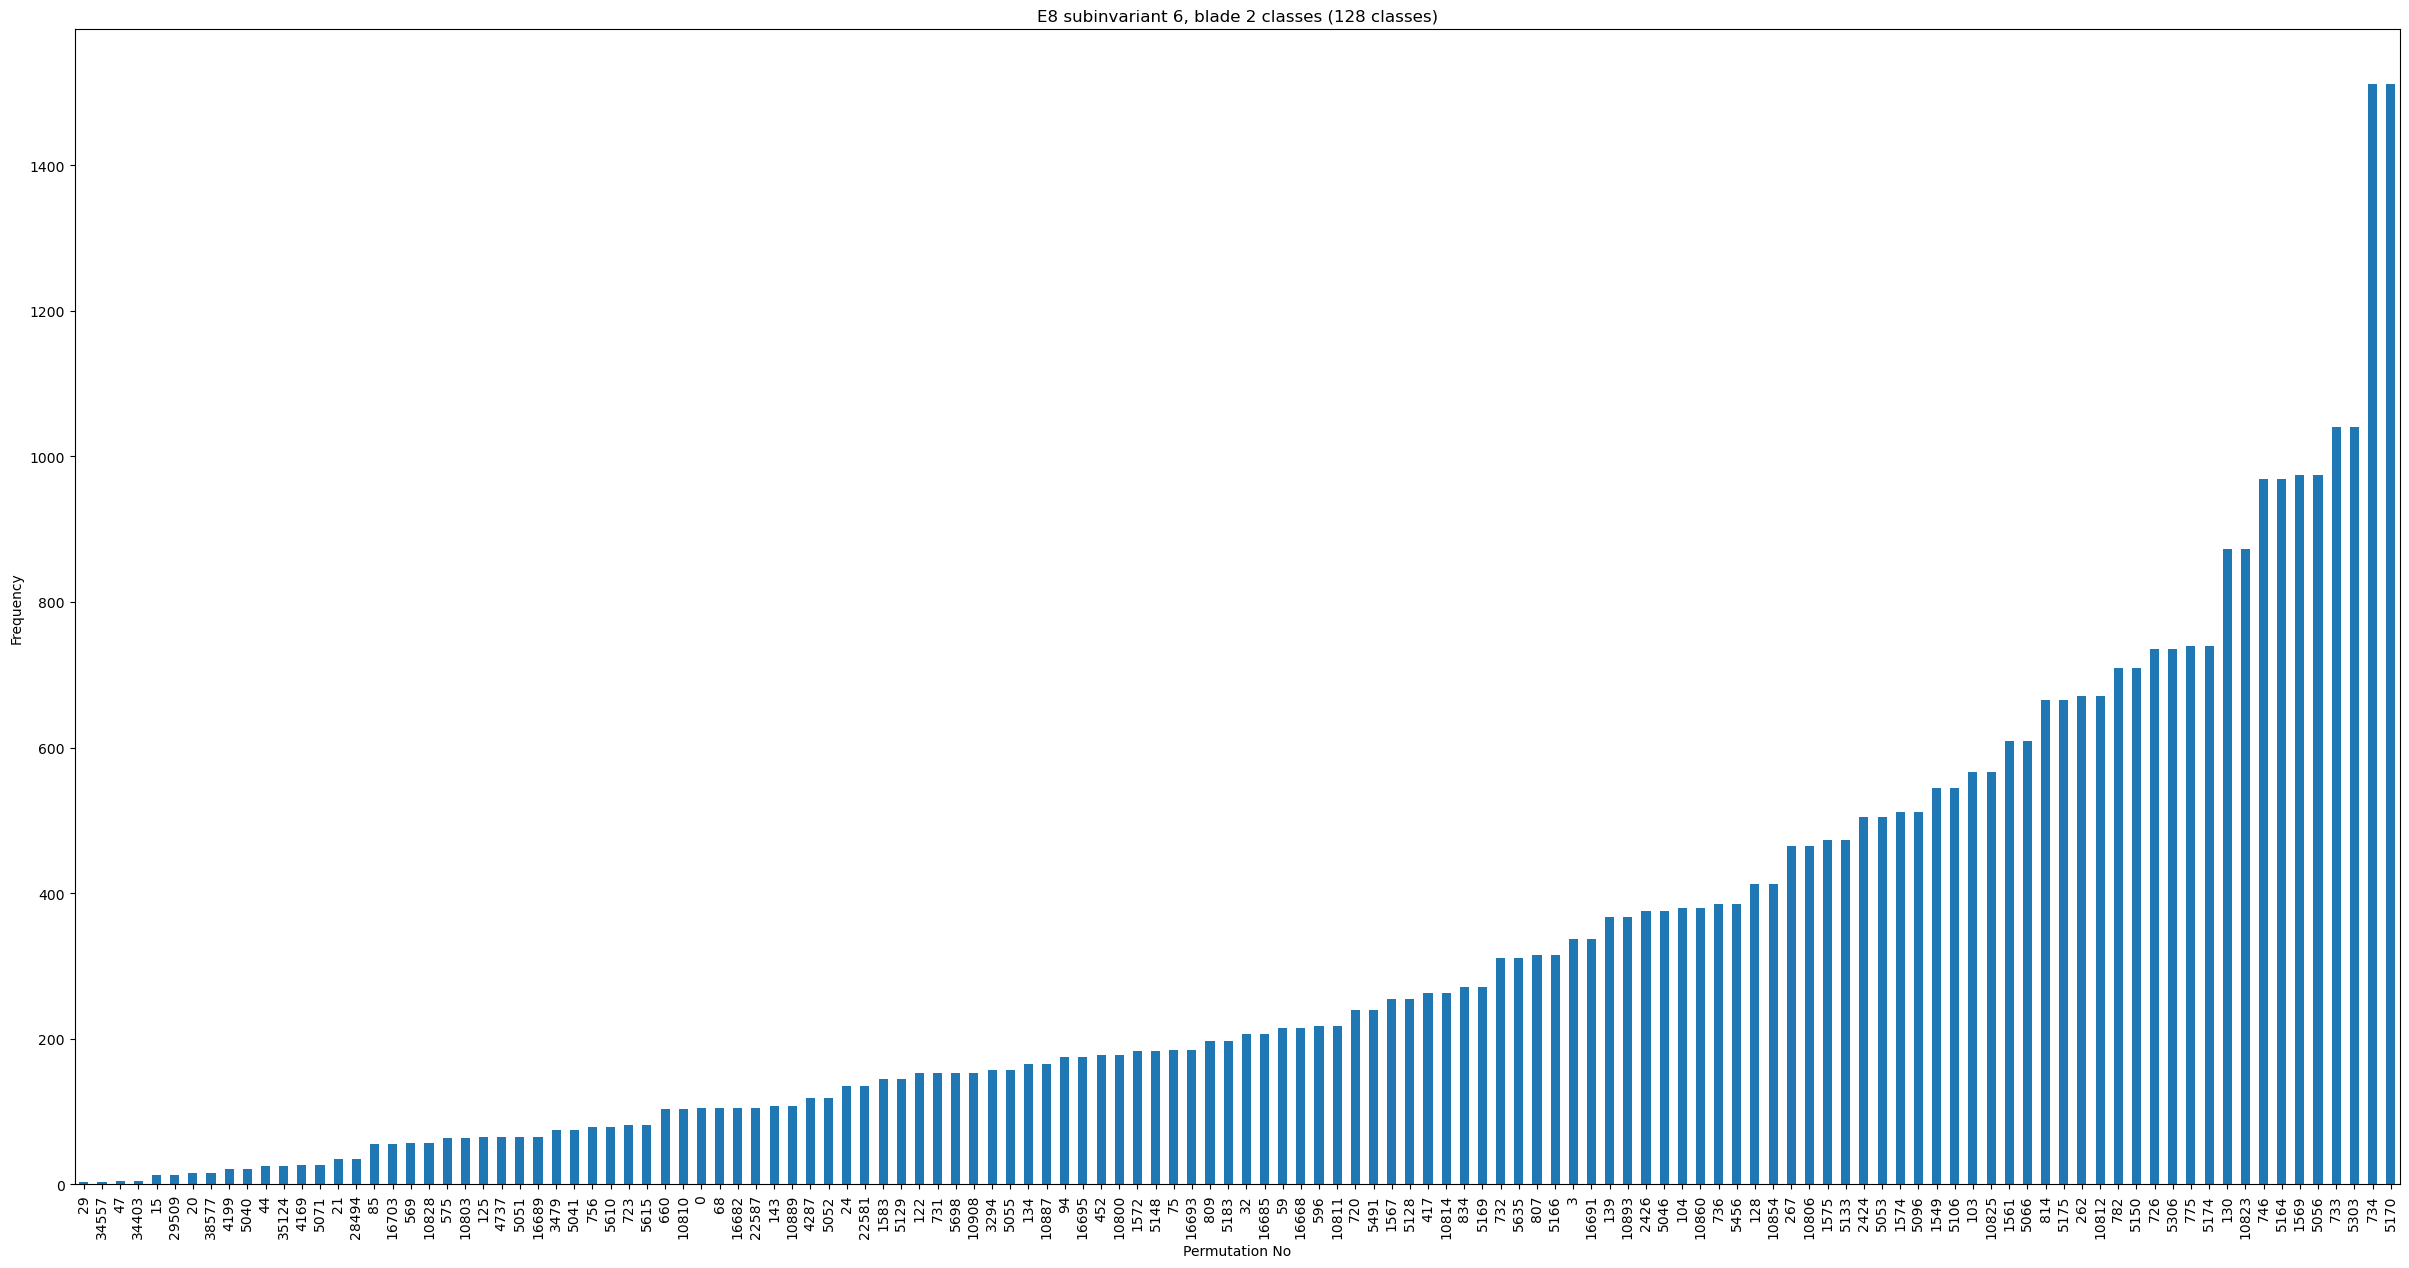

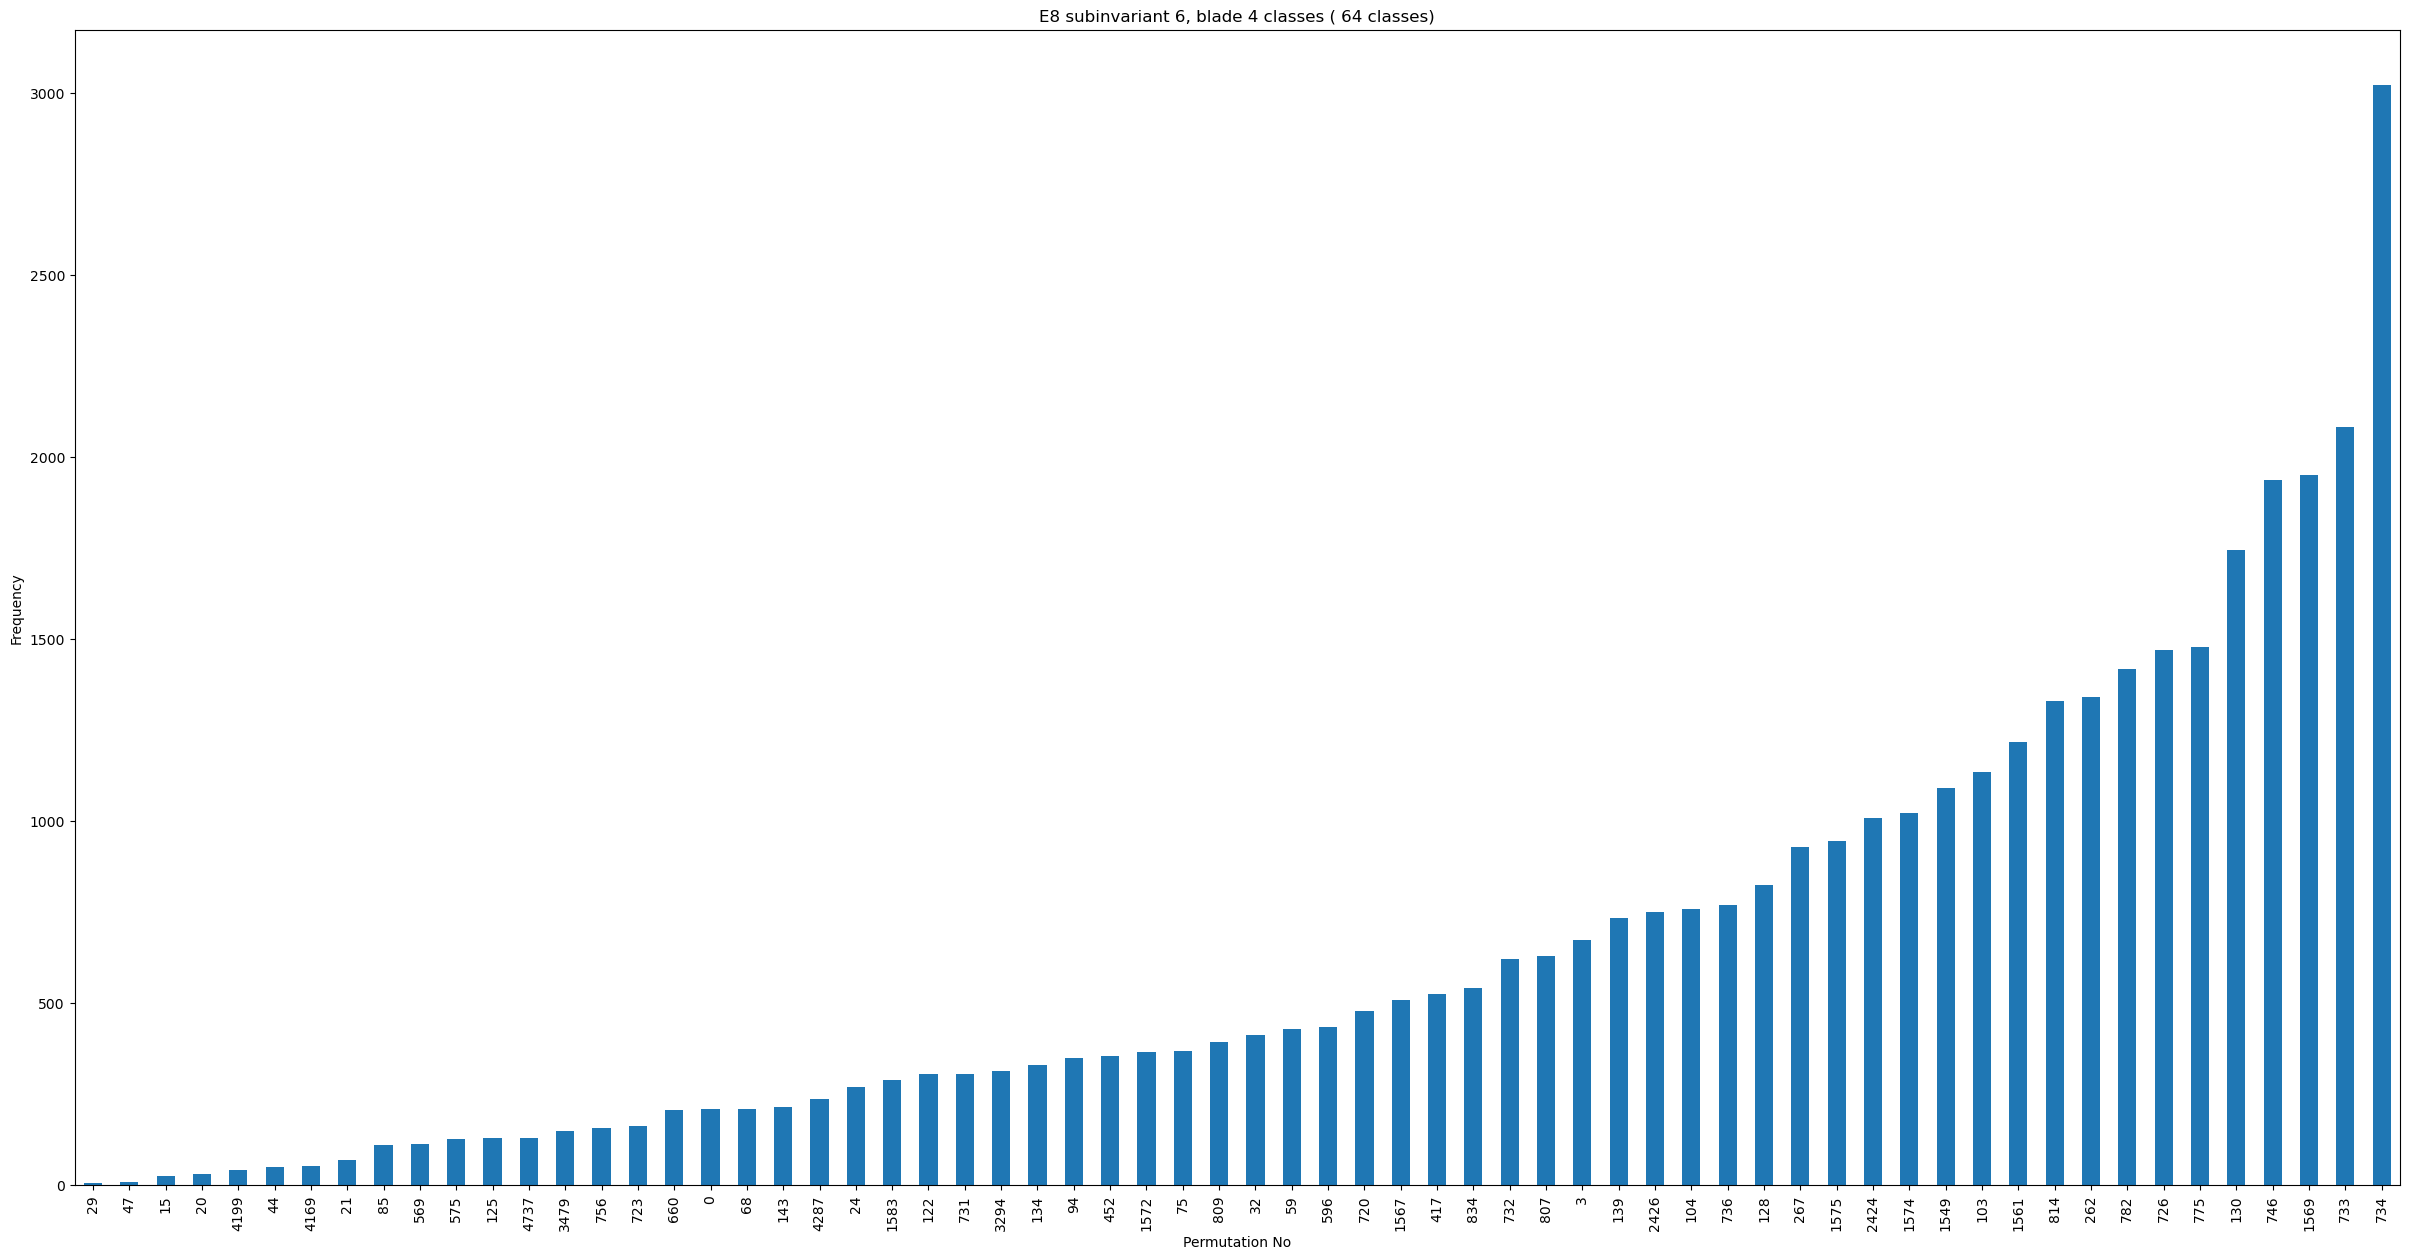

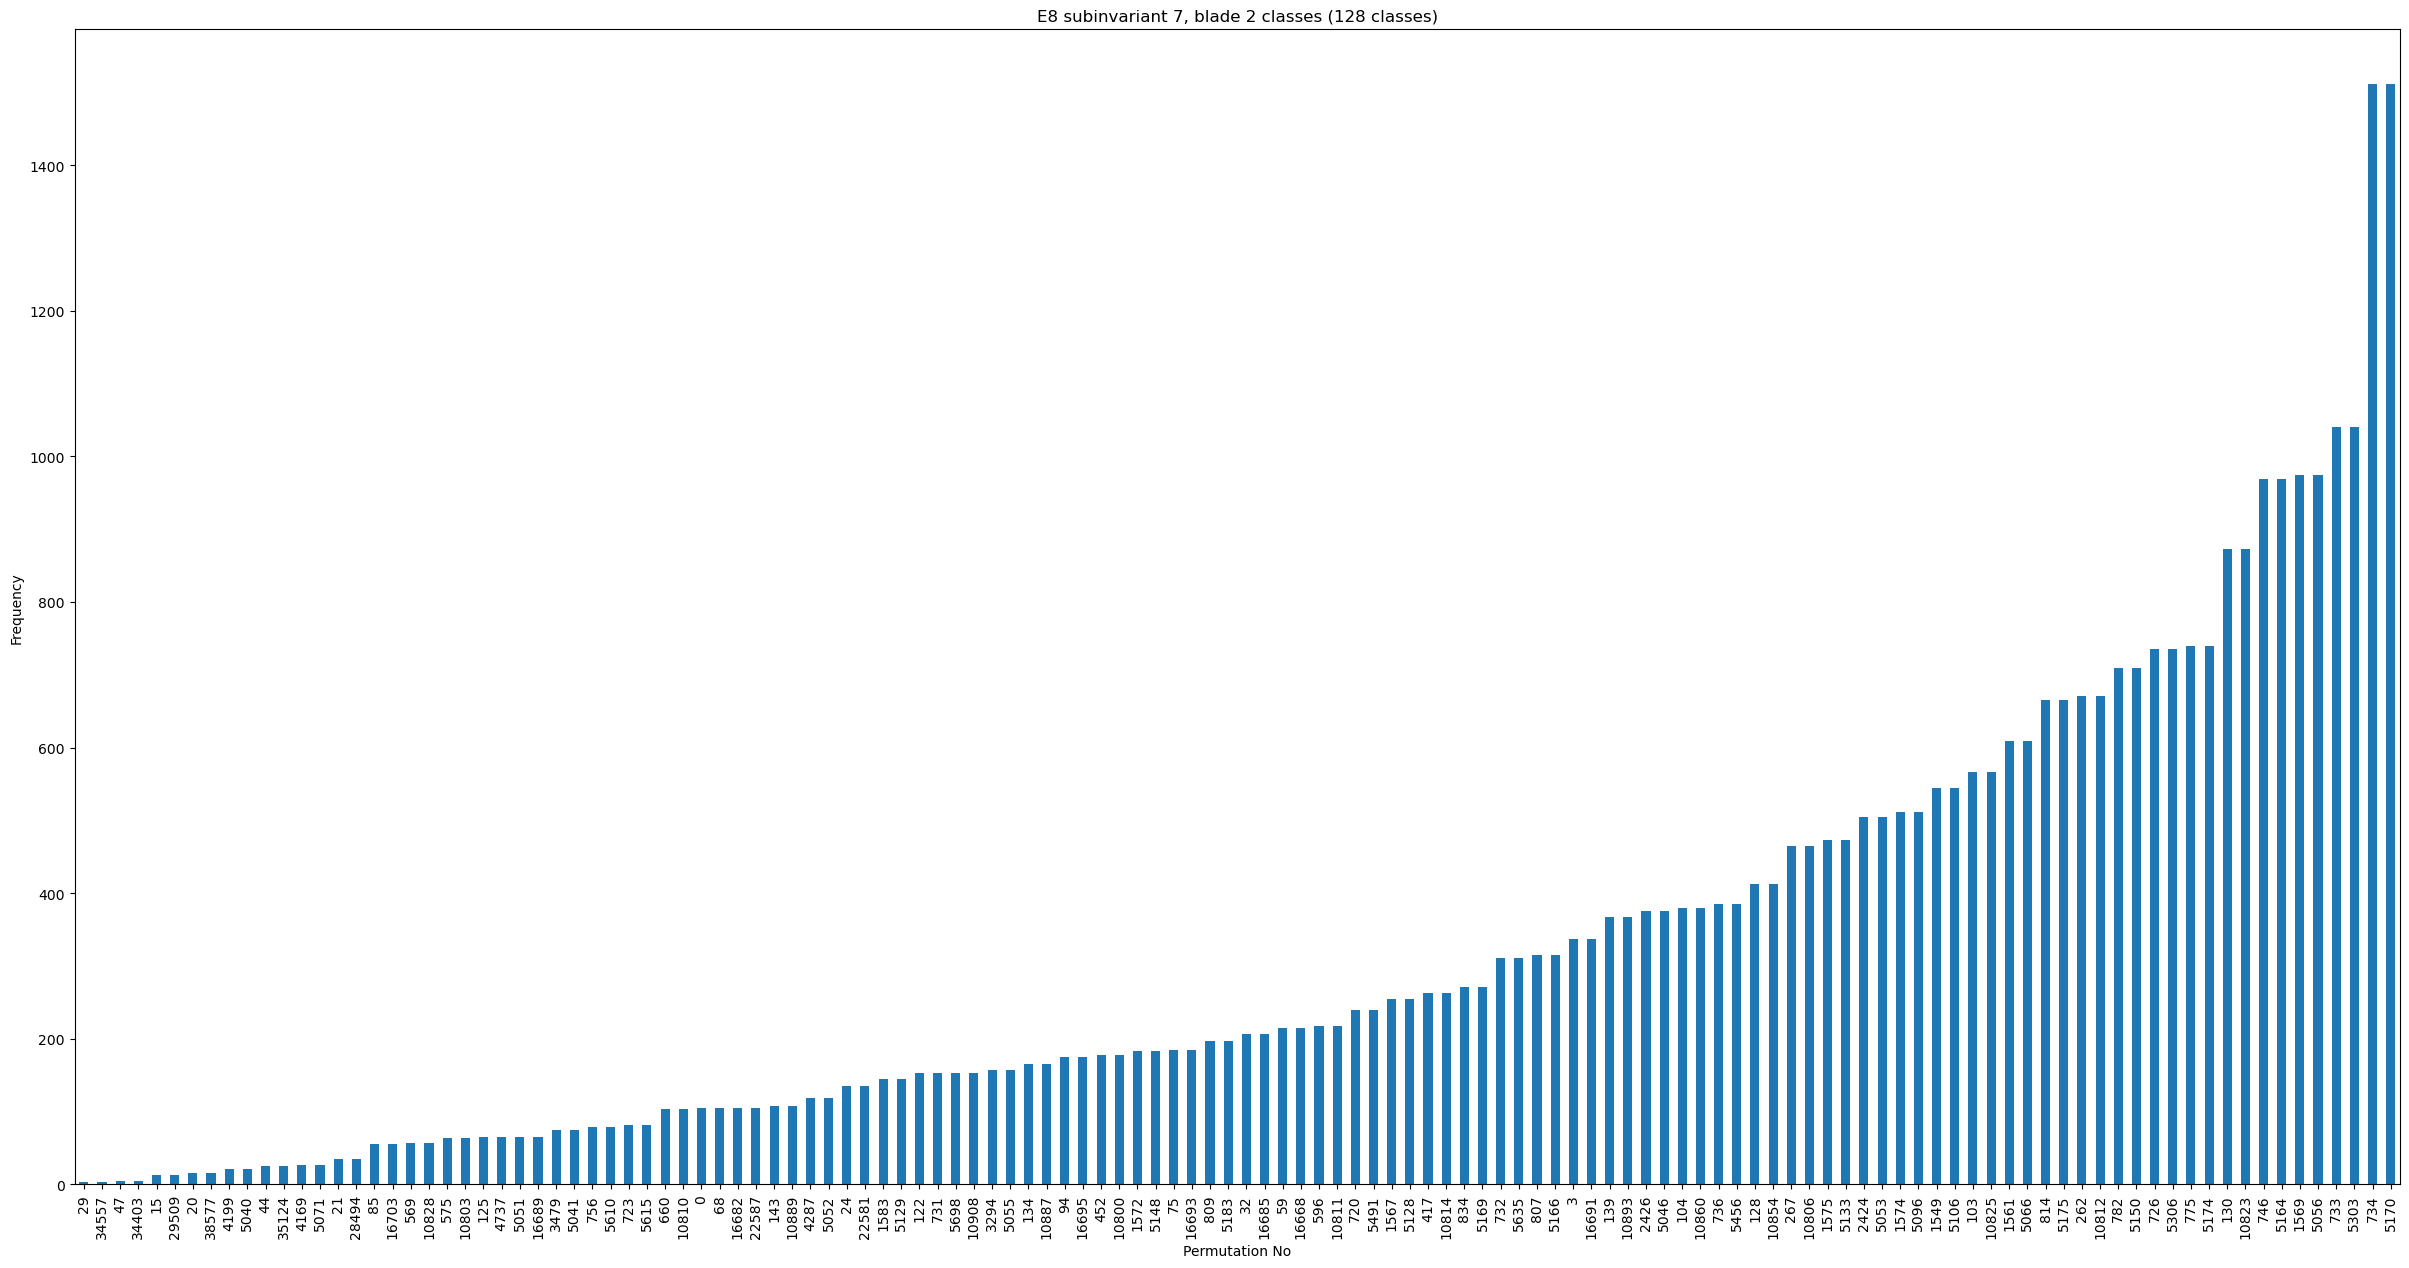

In [21]:
# Save all non-trivial (more than 1 class) distributions of frequencies for all subinvariants and blades as pictures

for subInv_n in range(subInvs_N):
    for blade_n in range(blades_N):
        
        # Sort records by the number of occurances
        tempDict = classes_counterE8[subInv_n][blade_n]
        classes_counterE8[subInv_n][blade_n] = {k: v for k, v in sorted(tempDict.items(), key=lambda item: item[1])}
        
        if len(classes_counterE8[subInv_n][blade_n].keys())<=1:
            continue
        
        plt.figure(figsize=(30, 15));
        freq_series = pd.Series(list(classes_counterE8[subInv_n][blade_n].values()));
        fig = freq_series.plot(kind='bar');
        fig.set_title("E8 subinvariant %1d, blade %1d classes (%3d classes)" % (subInv_n, blade_n, len(list(classes_counterE8[subInv_n][blade_n].values())) ));
        fig.set_xlabel('Permutation No');
        fig.set_ylabel('Frequency');
        fig.set_xticklabels(list(classes_counterE8[subInv_n][blade_n].keys()));
        name = "ADE_classes_figures\E8subinv" + str(subInv_n) + "blade" + str(blade_n) + ".png"
        plt.savefig(name);

In [22]:
# Record found classes in a CSV file
with open('ADE_Data\E8_subcpts_classes.csv','w') as file:
    for subInv_n in range(subInvs_N):
        for blade_n in range(blades_N):
            file.write("subinvariant %1d blade %1d, permutation Number," % (subInv_n,blade_n))
            for key in classes_counterE8[subInv_n][blade_n].keys():
                file.write(str(key) + ',')
            file.write('\n')
            
            file.write(',frequency,')
            for val in classes_counterE8[subInv_n][blade_n].values():
                file.write(str(val) + ',')
            file.write('\n')
            
            file.write(',total number of classes,' + str(len(list(classes_counterE8[subInv_n][blade_n].values()))) + ',\n')

In [23]:
# Similar analysis for D8

In [27]:
with open('ADE_Data\D8inv_Data_mod.txt','r') as file:
    dataD8 = [ parseString(line.rstrip())[1] for line in file]

In [28]:
# Find distinct classes of invariants with the same subInv_no, blade_no component in D8
classesD8 = np.zeros([data_size, subInvs_N, blades_N], dtype = int)

In [29]:
for blade_n in tqdm(range(blades_N)):
    for subInv_n in range(subInvs_N):
        for idx1 in range(data_size):
            if classesD8[idx1, subInv_n, blade_n] != 0:
                continue
            classesD8[idx1, subInv_n, blade_n] = idx1+1 # record that elem itself in its own class, shift by 1 during run
            for idx2 in range(idx1+1,data_size):
                if blade(dataD8[idx1][subInv_n],blade_n)==blade(dataD8[idx2][subInv_n],blade_n):    
                    classesD8[idx2, subInv_n, blade_n] = idx1+1 # record that elem idx2 is in the same class as element idx1, shift by 1 during run
                    
classesD8 = classesD8 -1

100%|██████████| 9/9 [01:04<00:00,  7.21s/it]


In [30]:
classes_counterD8 = []
for subInv_n in range(subInvs_N):
    subinvCounters = []
    for blade_n in range(blades_N):
         subinvCounters.append(dict(Counter(classesD8[:,subInv_n,blade_n])))
    classes_counterD8.append( subinvCounters )
    
print(np.shape(classes_counterD8))

(9, 9)


In [31]:
# Create an array  with the number of classes for each subinvariant, each blade

classes_sizesD8 = []
for subInv_n in range(subInvs_N):
    temp = []
    for blade_n in range(blades_N):
        if len(classes_counterD8[subInv_n][blade_n].keys())==1:
            if all( v == 0 for v in blade(dataD8[5][subInv_n],blade_n) ): # Enough to check random data entry, e.g. 5
                temp.append( -1 )
            else:
                temp.append( len(classes_counterD8[subInv_n][blade_n].keys()) )
        else:
            temp.append( len(classes_counterD8[subInv_n][blade_n].keys()) )
    classes_sizesD8.append( temp )
    
for row in classes_sizesD8:
    temp = ''
    for elem in row:
        temp = temp + ("%3d " % elem)
    print(temp)
    
# Record found classses sizes in a CSV file
with open('ADE_Data\D8_classes_sizes.csv','w') as file:
    for subInv_n in range(subInvs_N):
        for blade_n in range(blades_N):
            file.write("%3d," % classes_sizesD8[subInv_n][blade_n])
        file.write('\n')

  1  -1  -1  -1  -1  -1  -1  -1  -1 
  1  -1 128  -1  -1  -1  -1  -1  -1 
 -1  -1 128  -1  64  -1  -1  -1  -1 
 -1  -1 128  -1  64  -1  32  -1  -1 
 -1  -1 128  -1  64  -1  32  -1  -1 
 -1  -1 128  -1  64  -1  32  -1  -1 
 -1  -1 128  -1  64  -1  -1  -1  -1 
  1  -1 128  -1  -1  -1  -1  -1  -1 
  1  -1  -1  -1  -1  -1  -1  -1  -1 


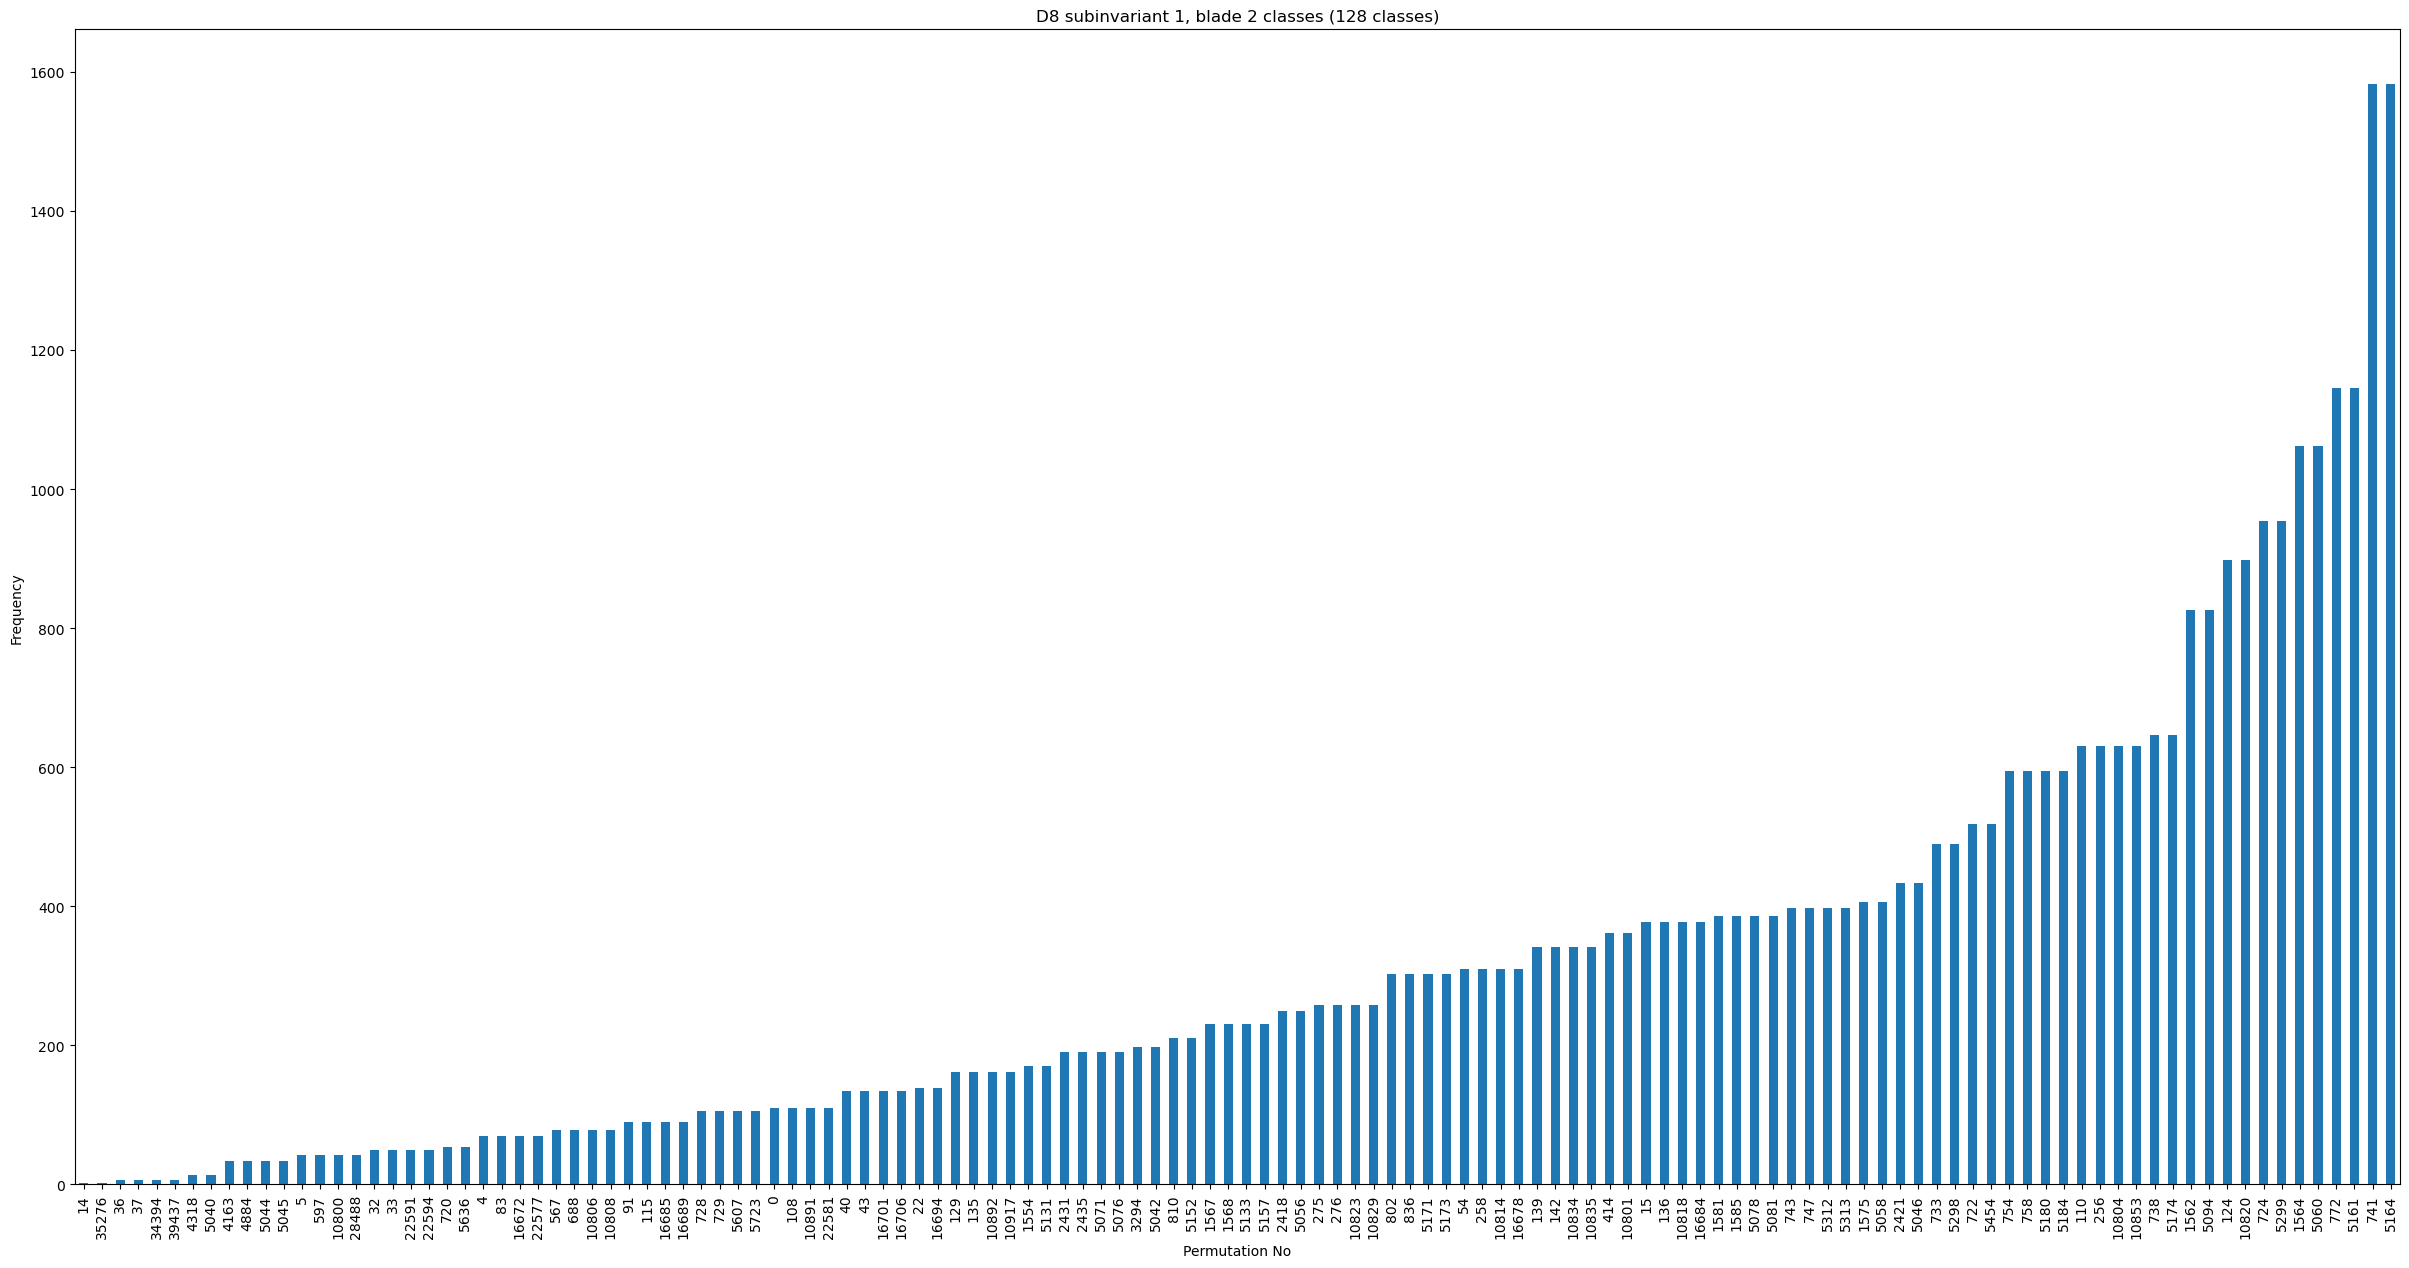

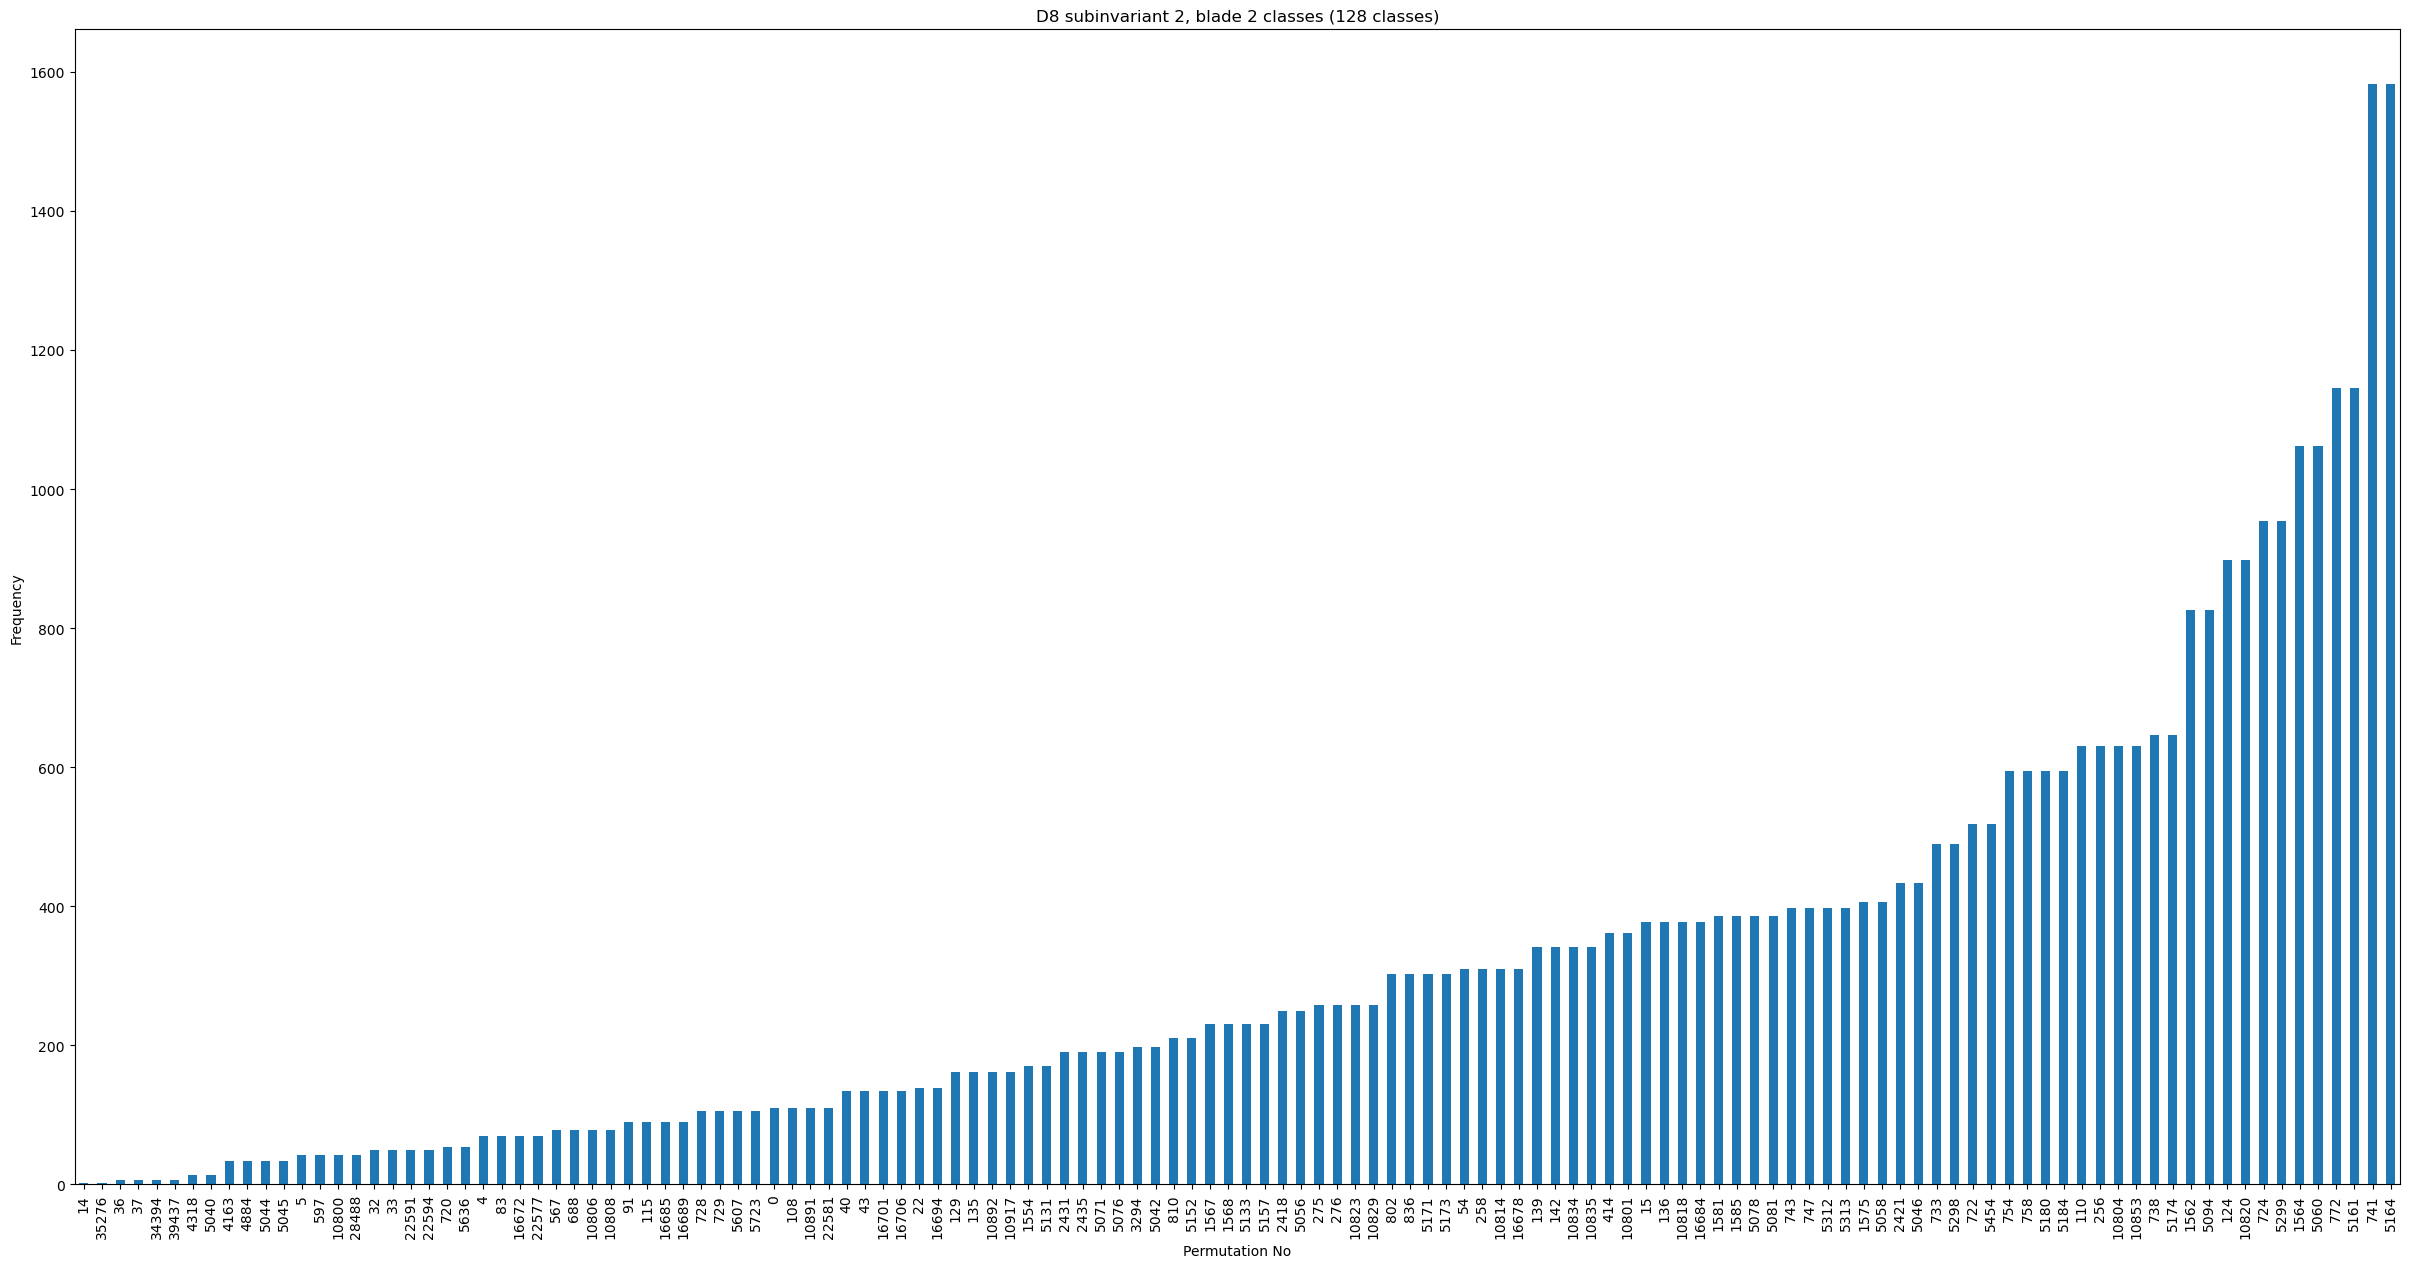

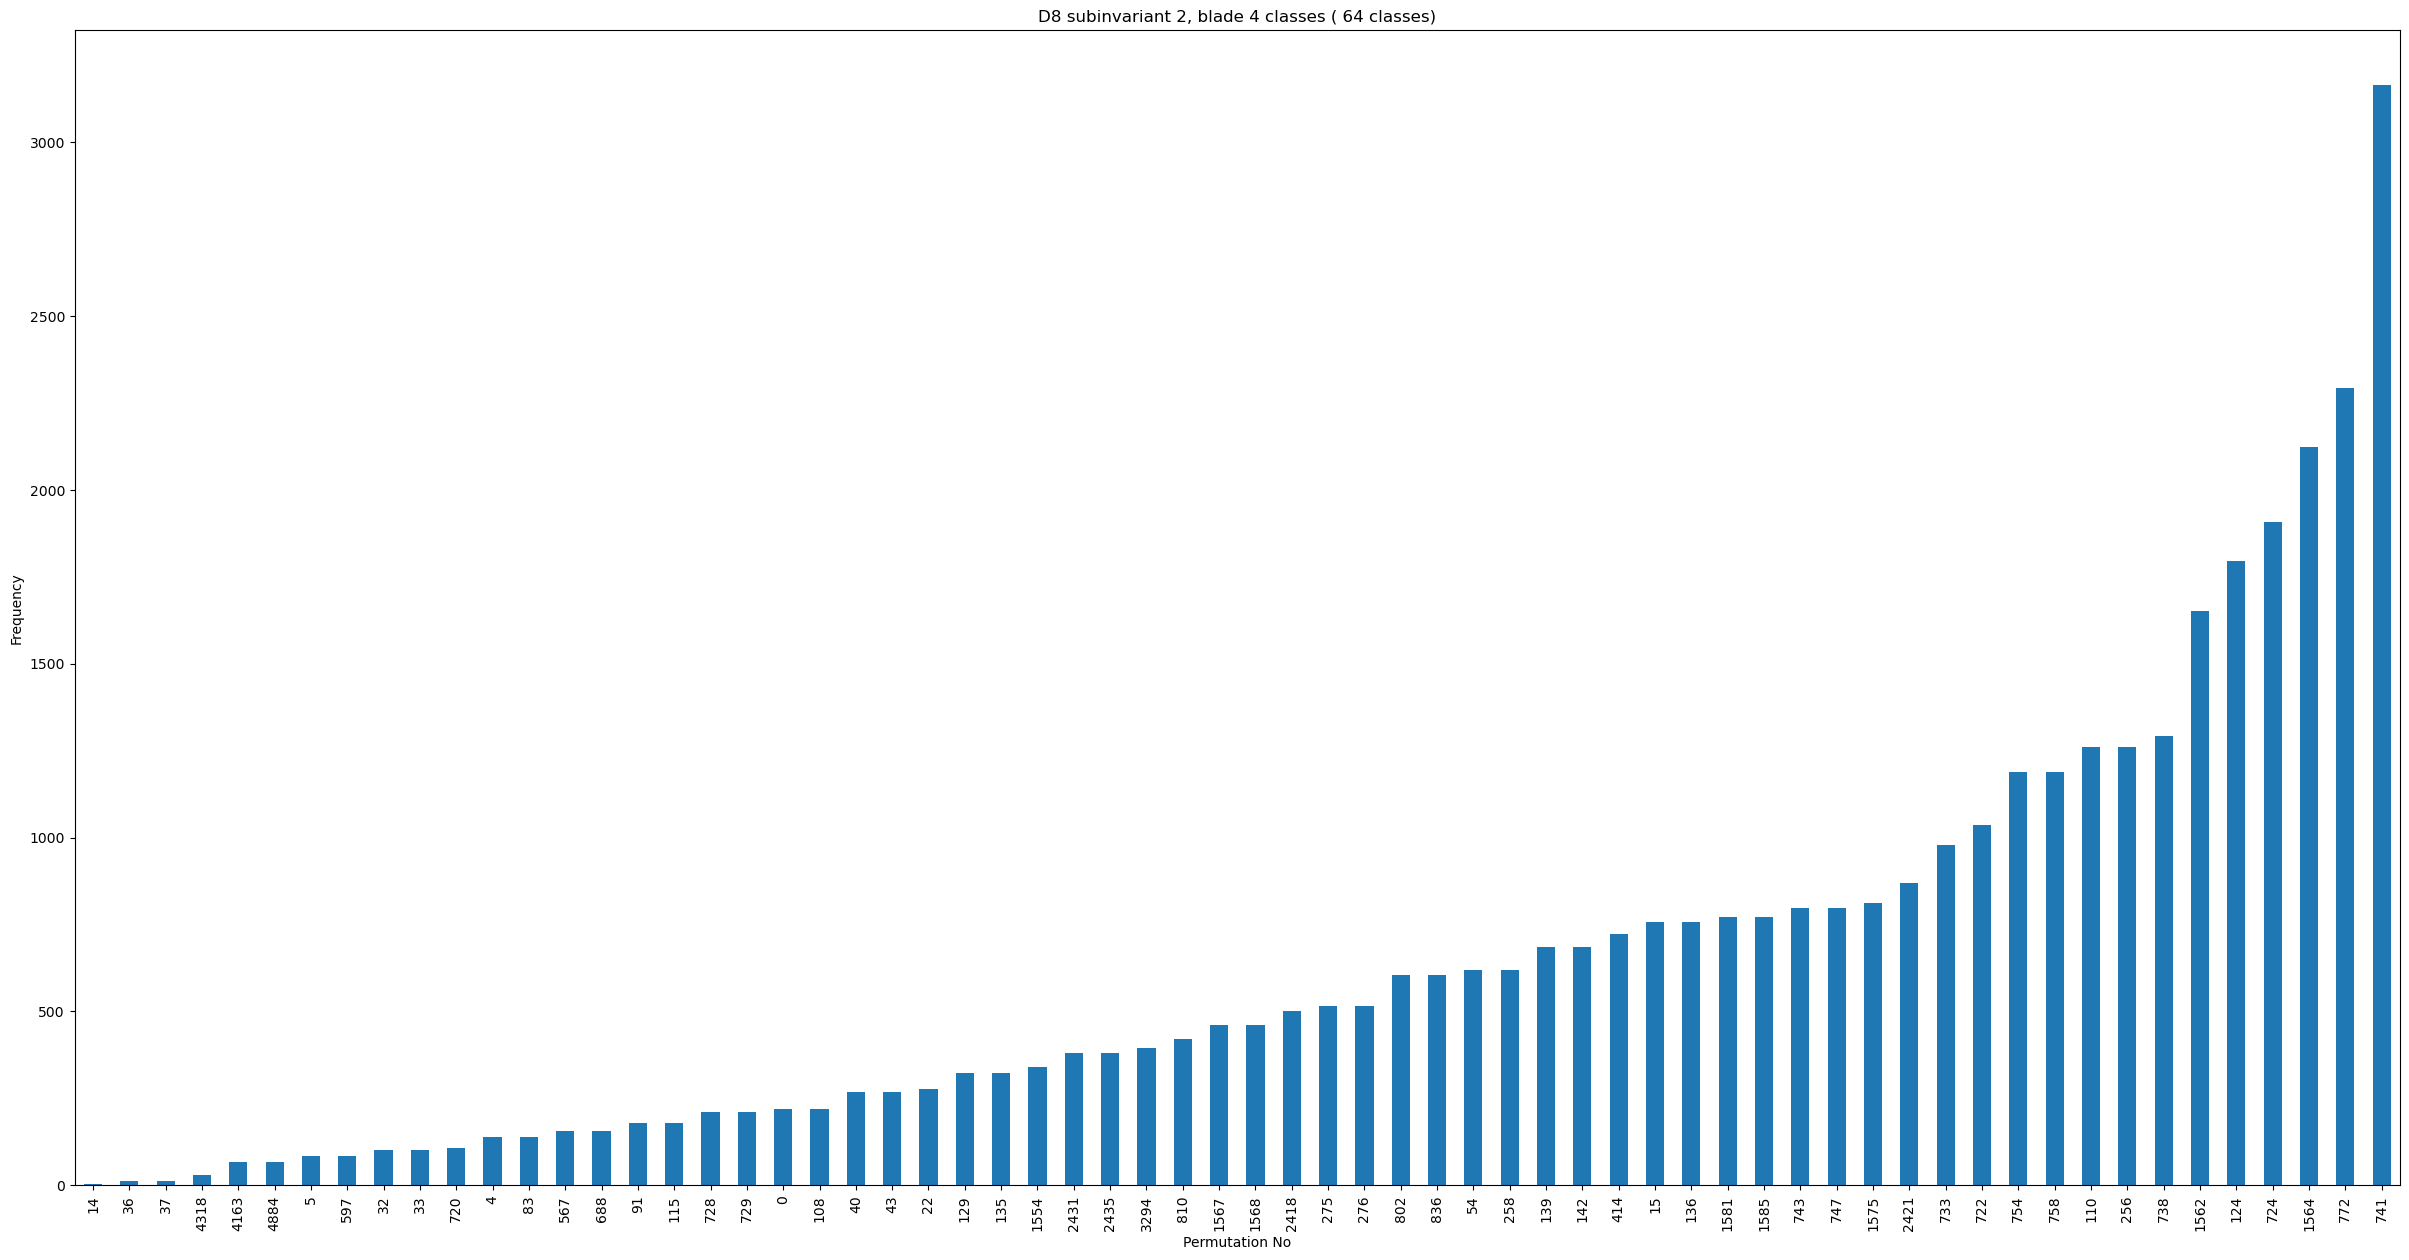

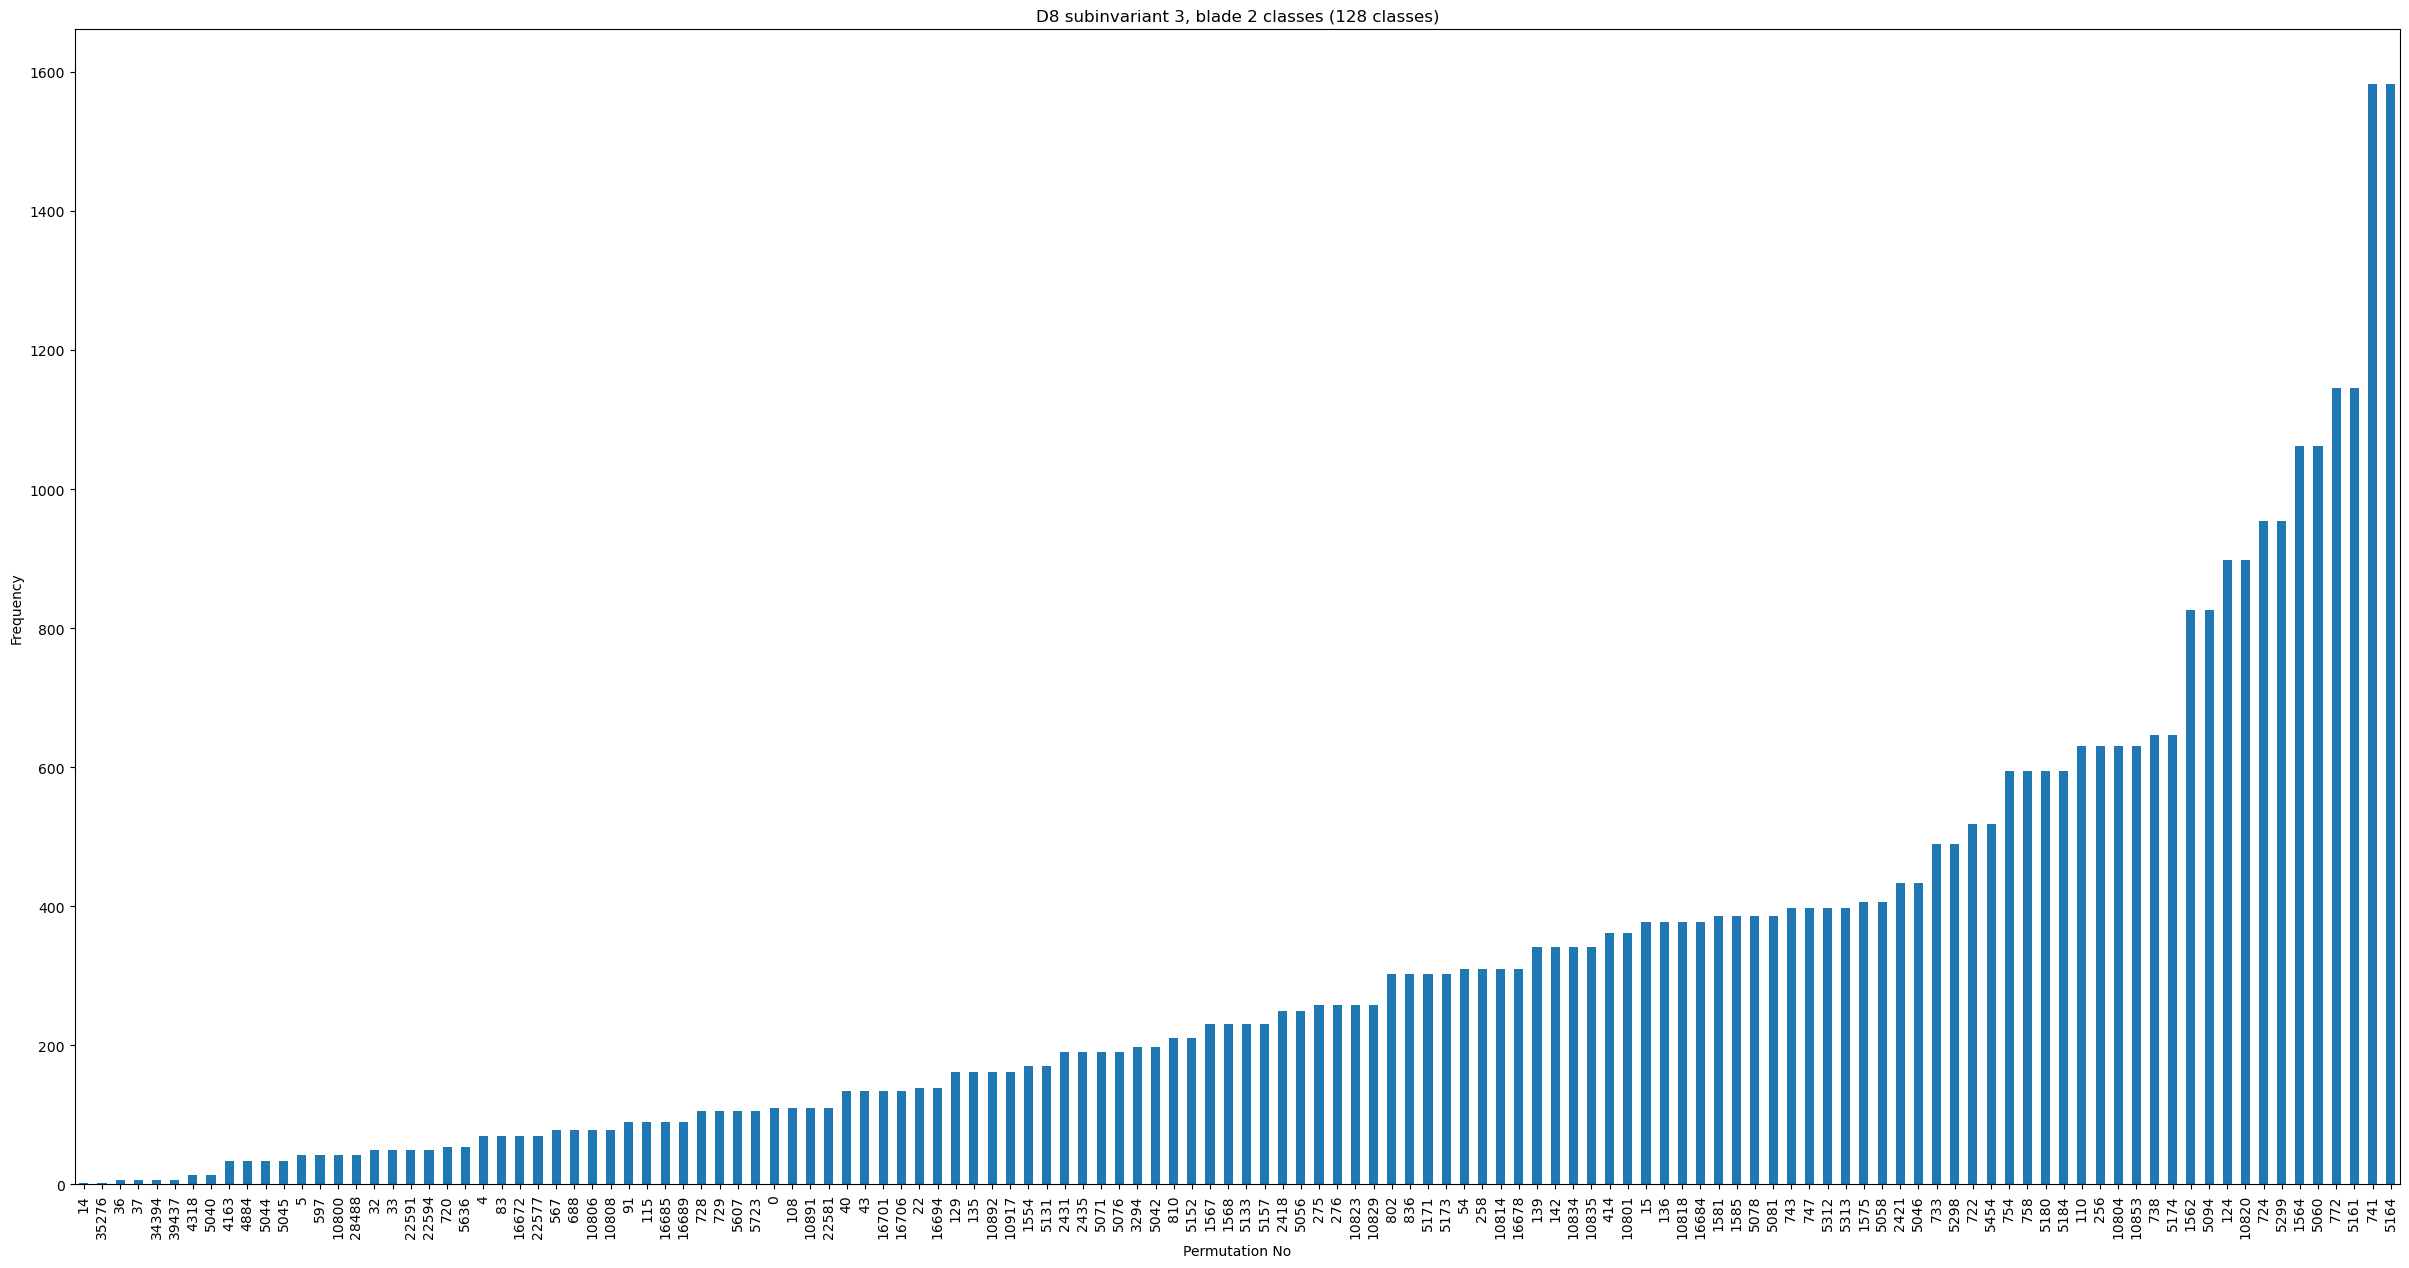

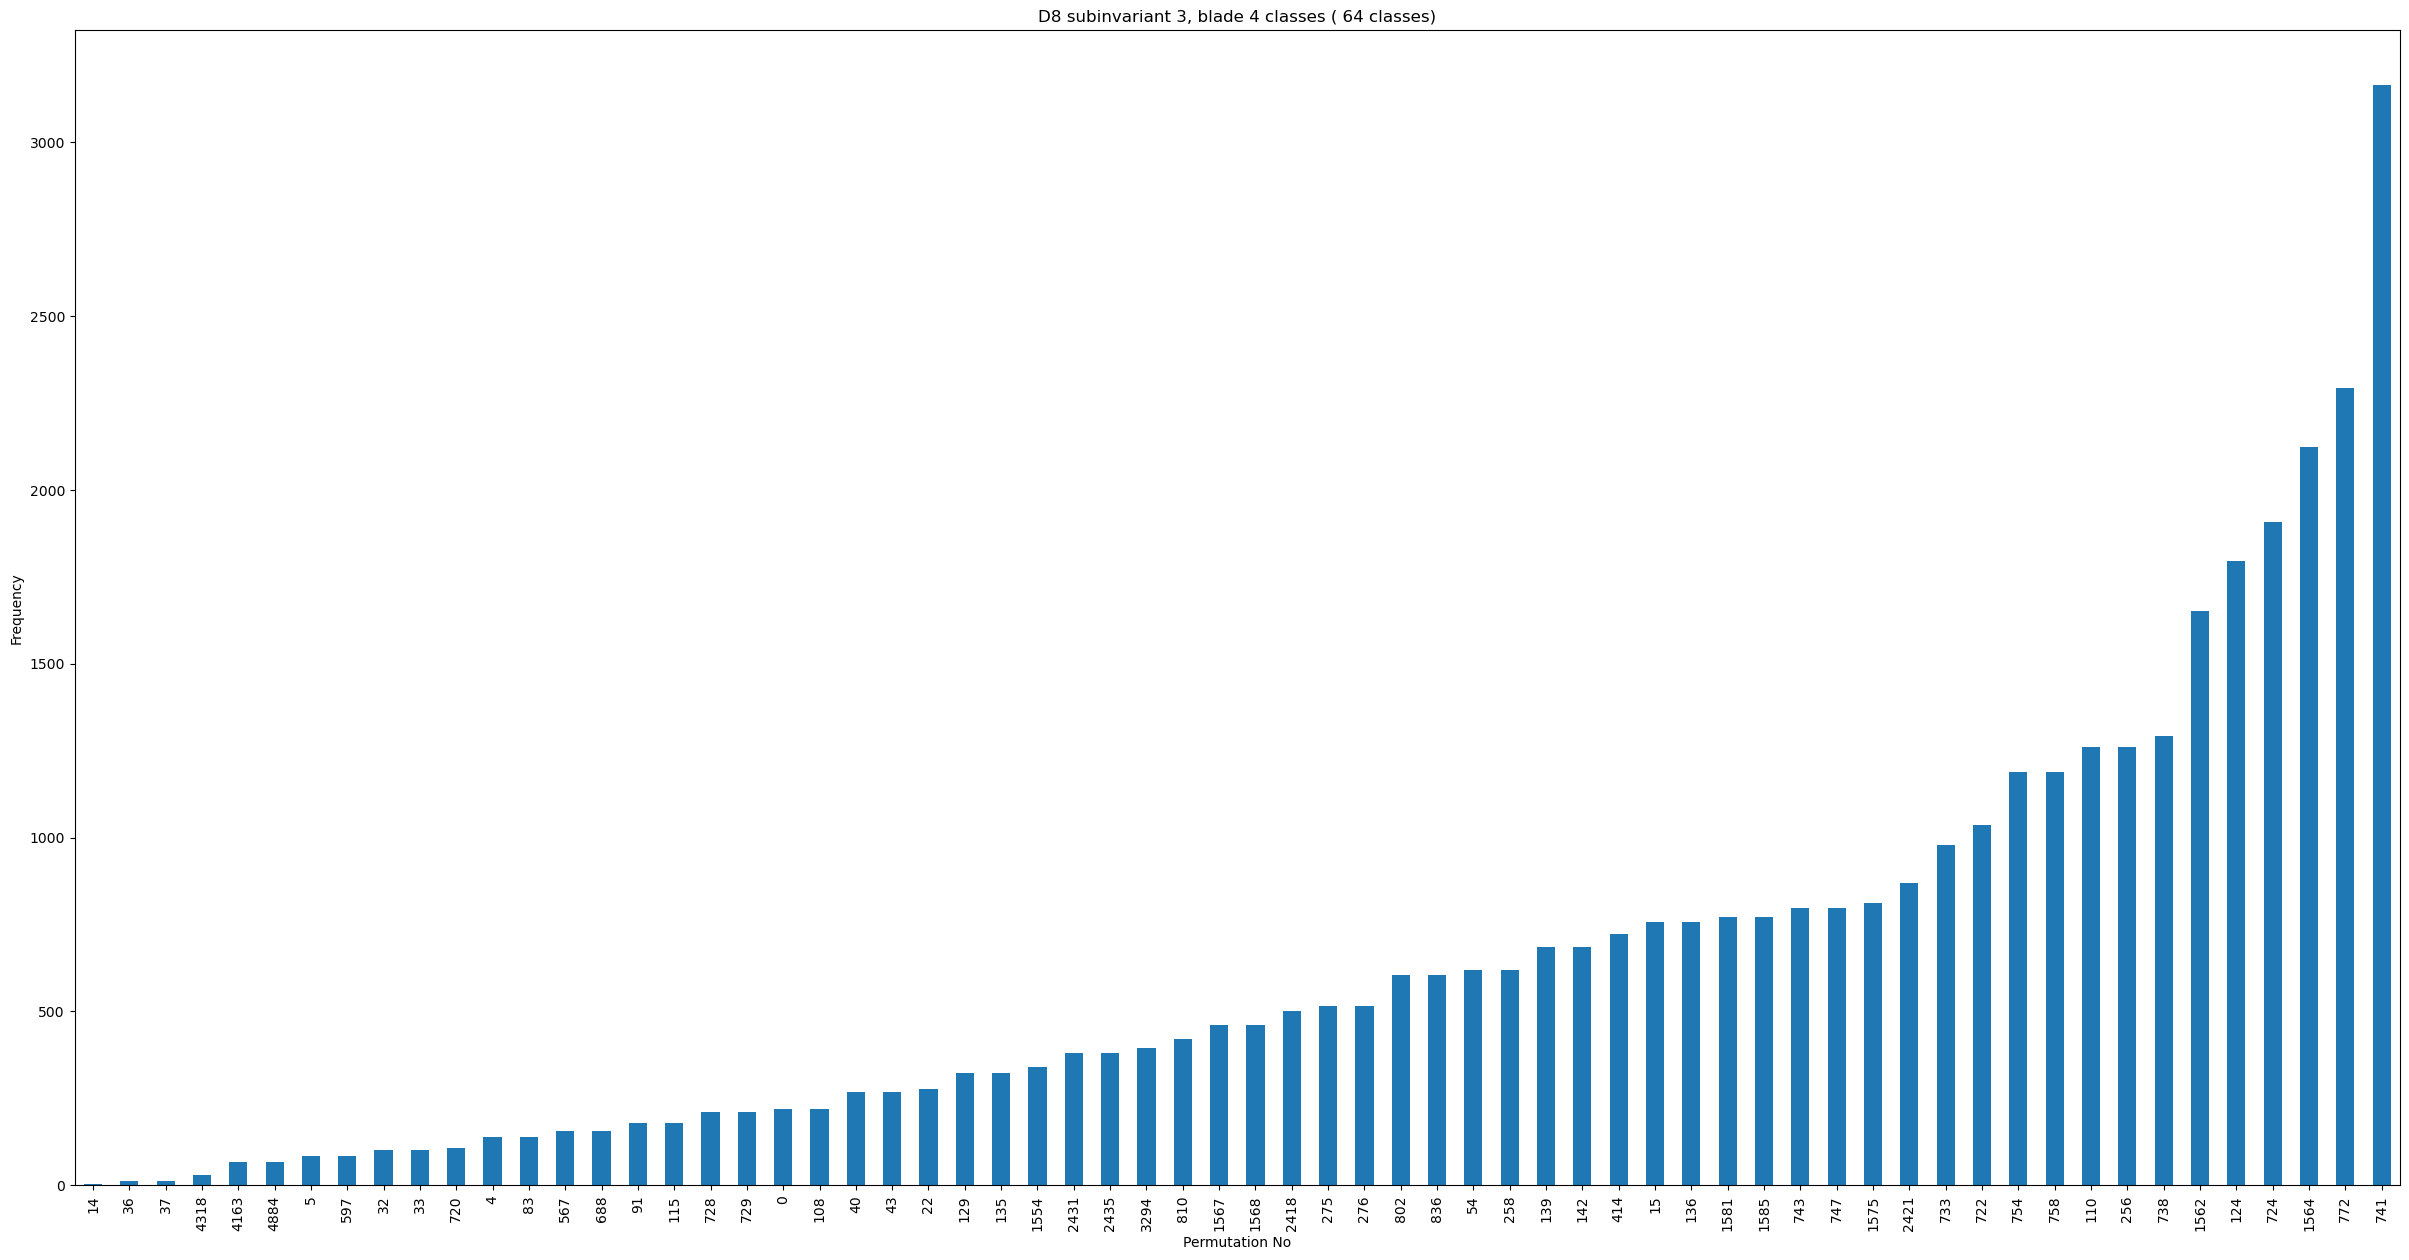

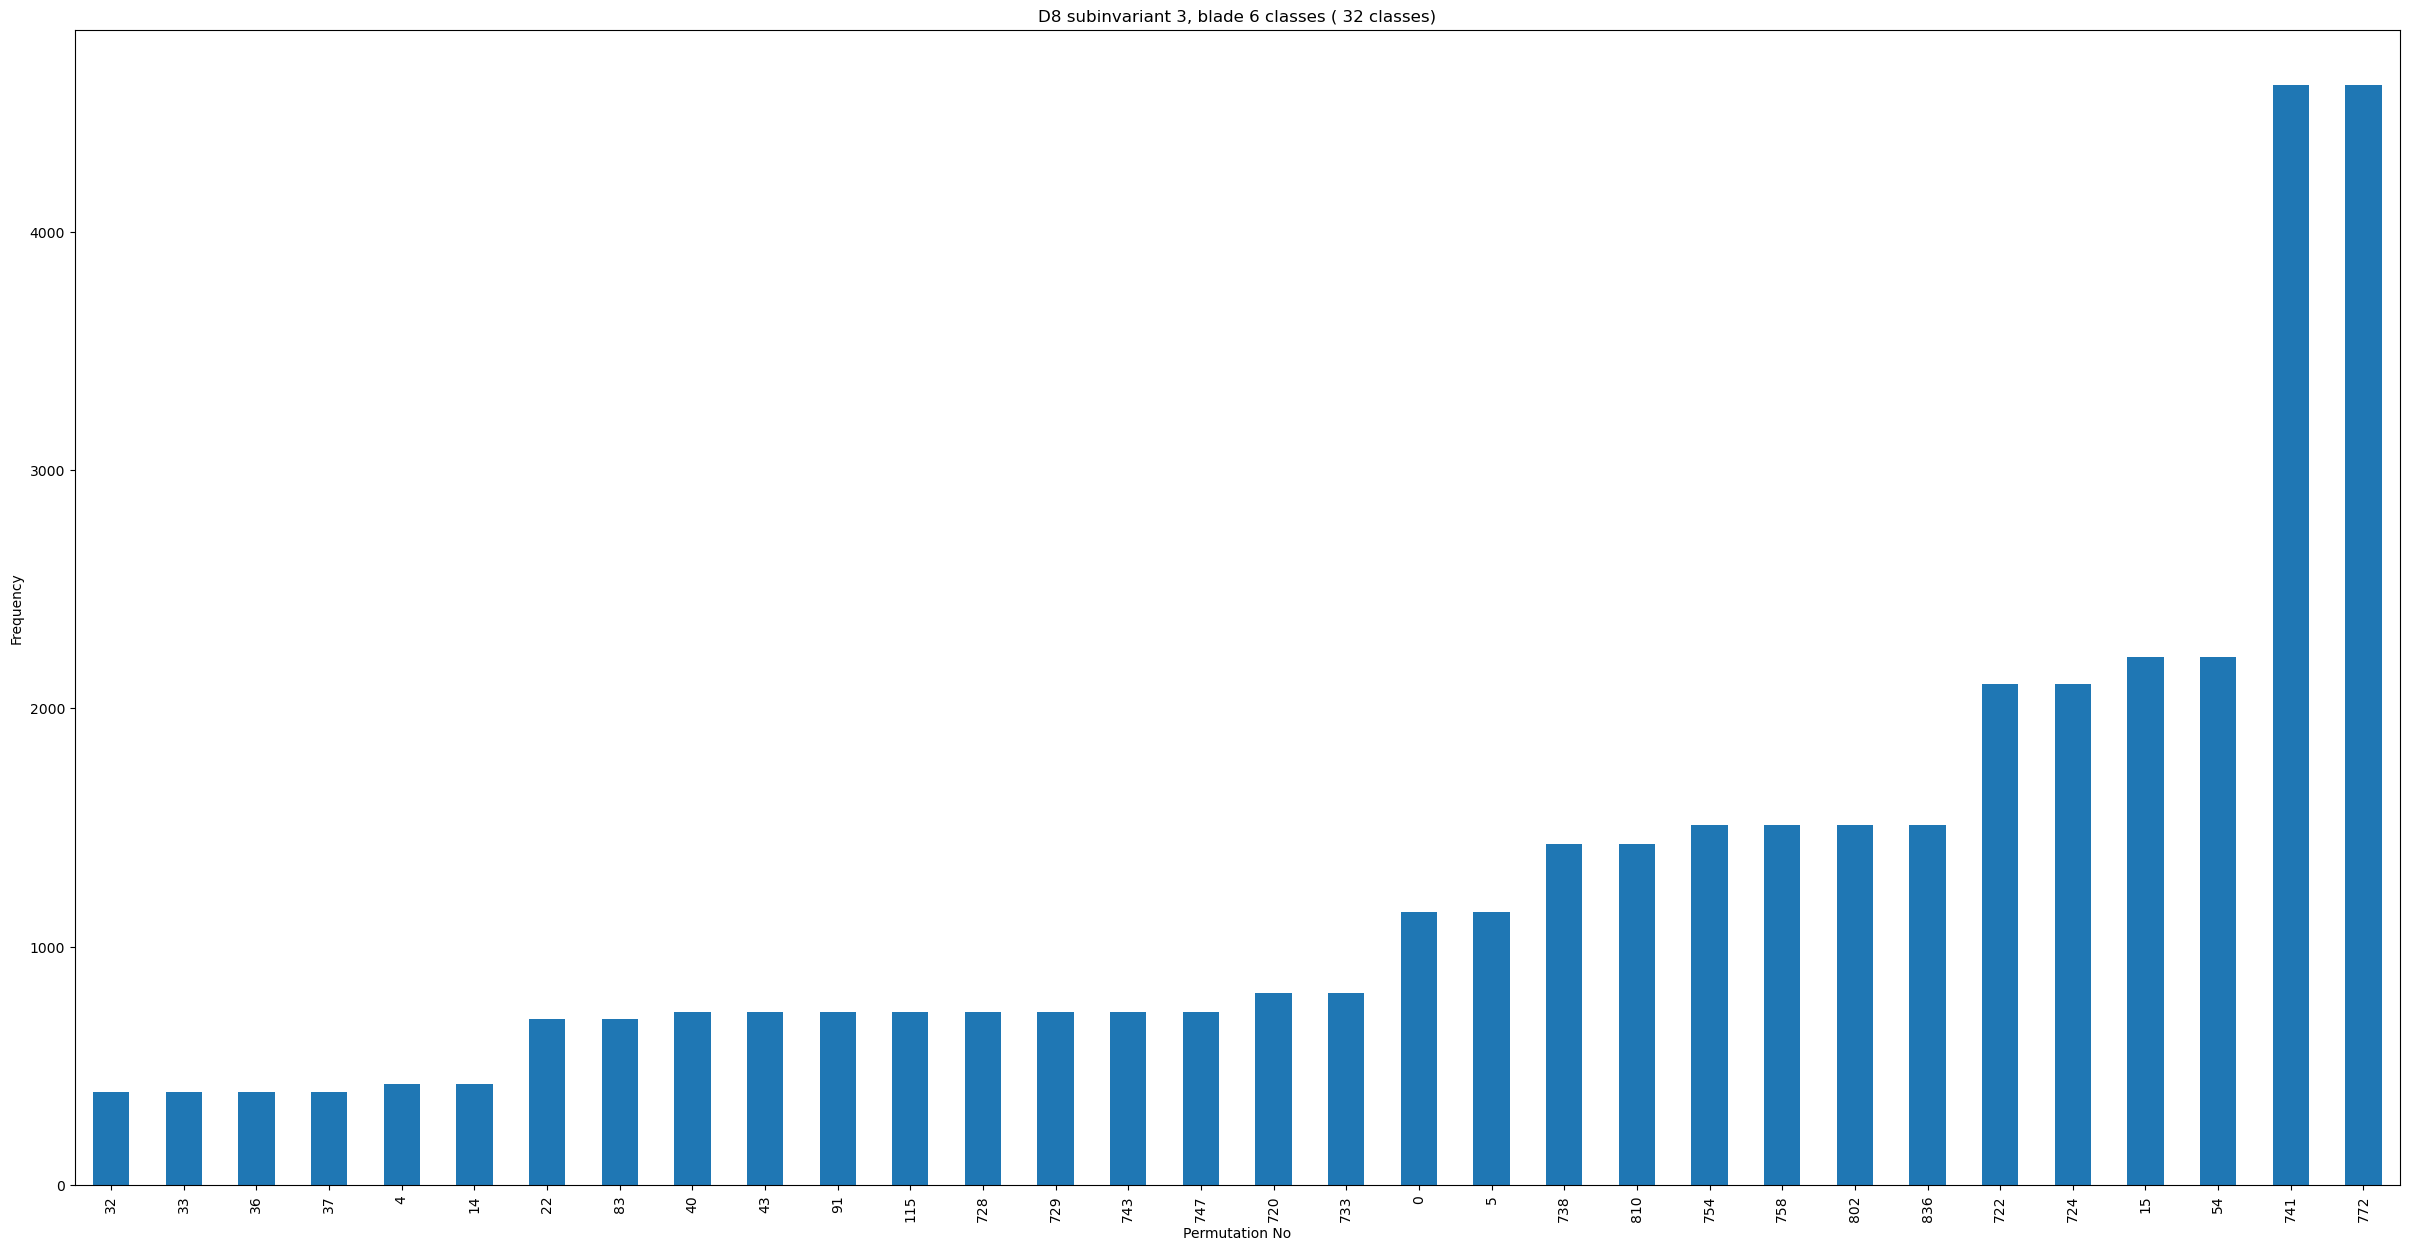

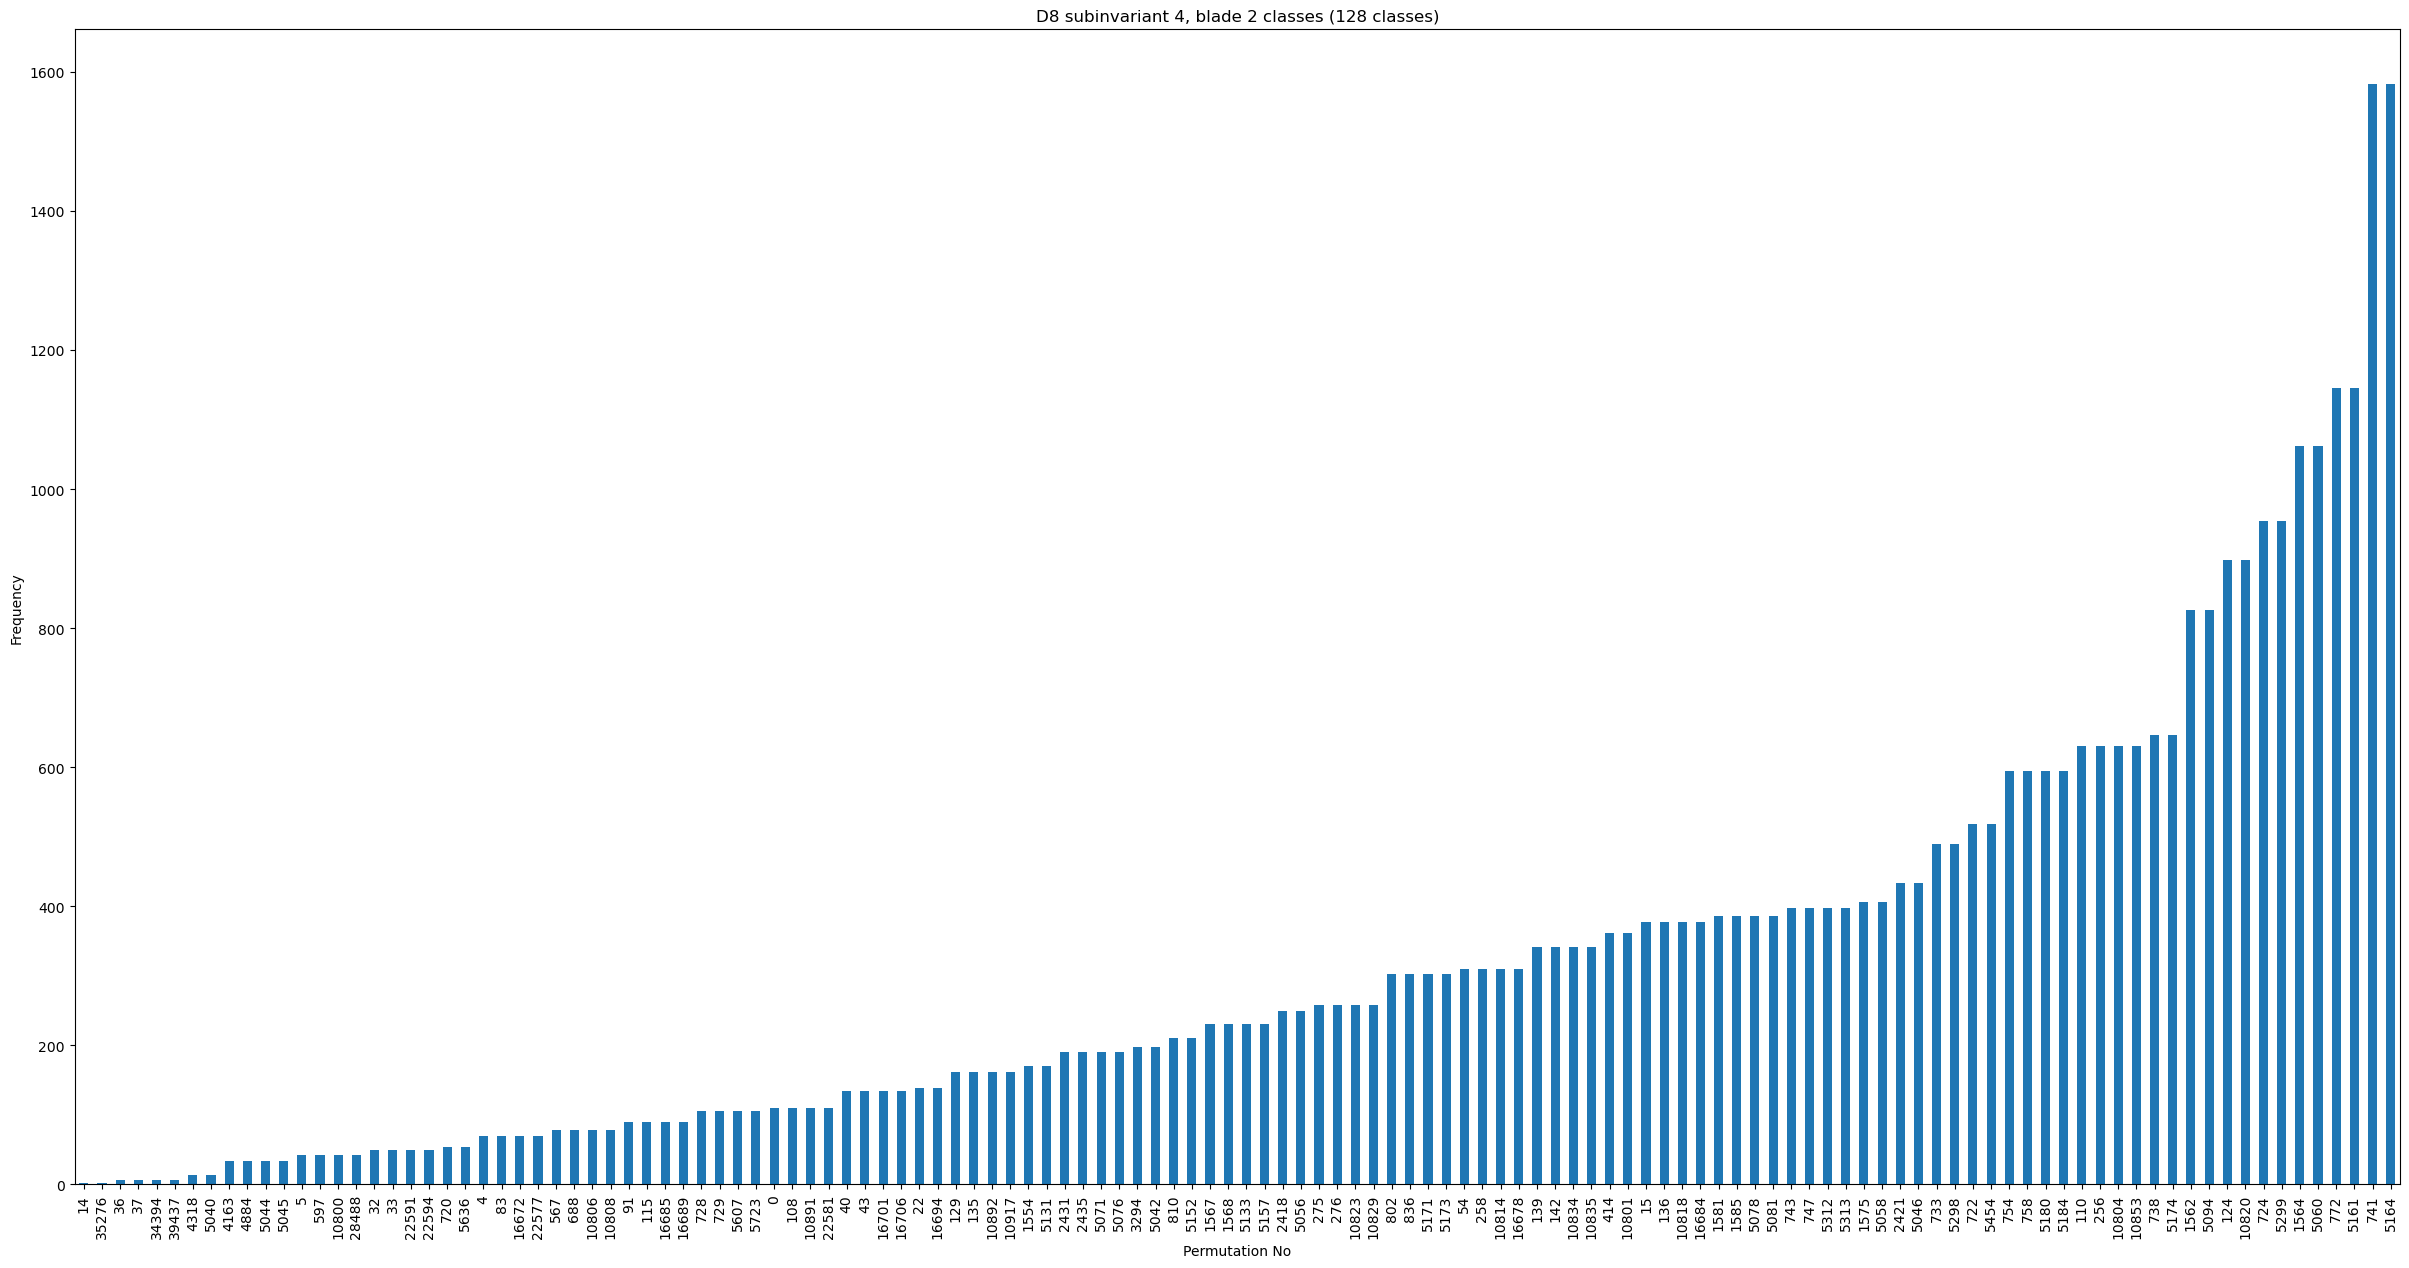

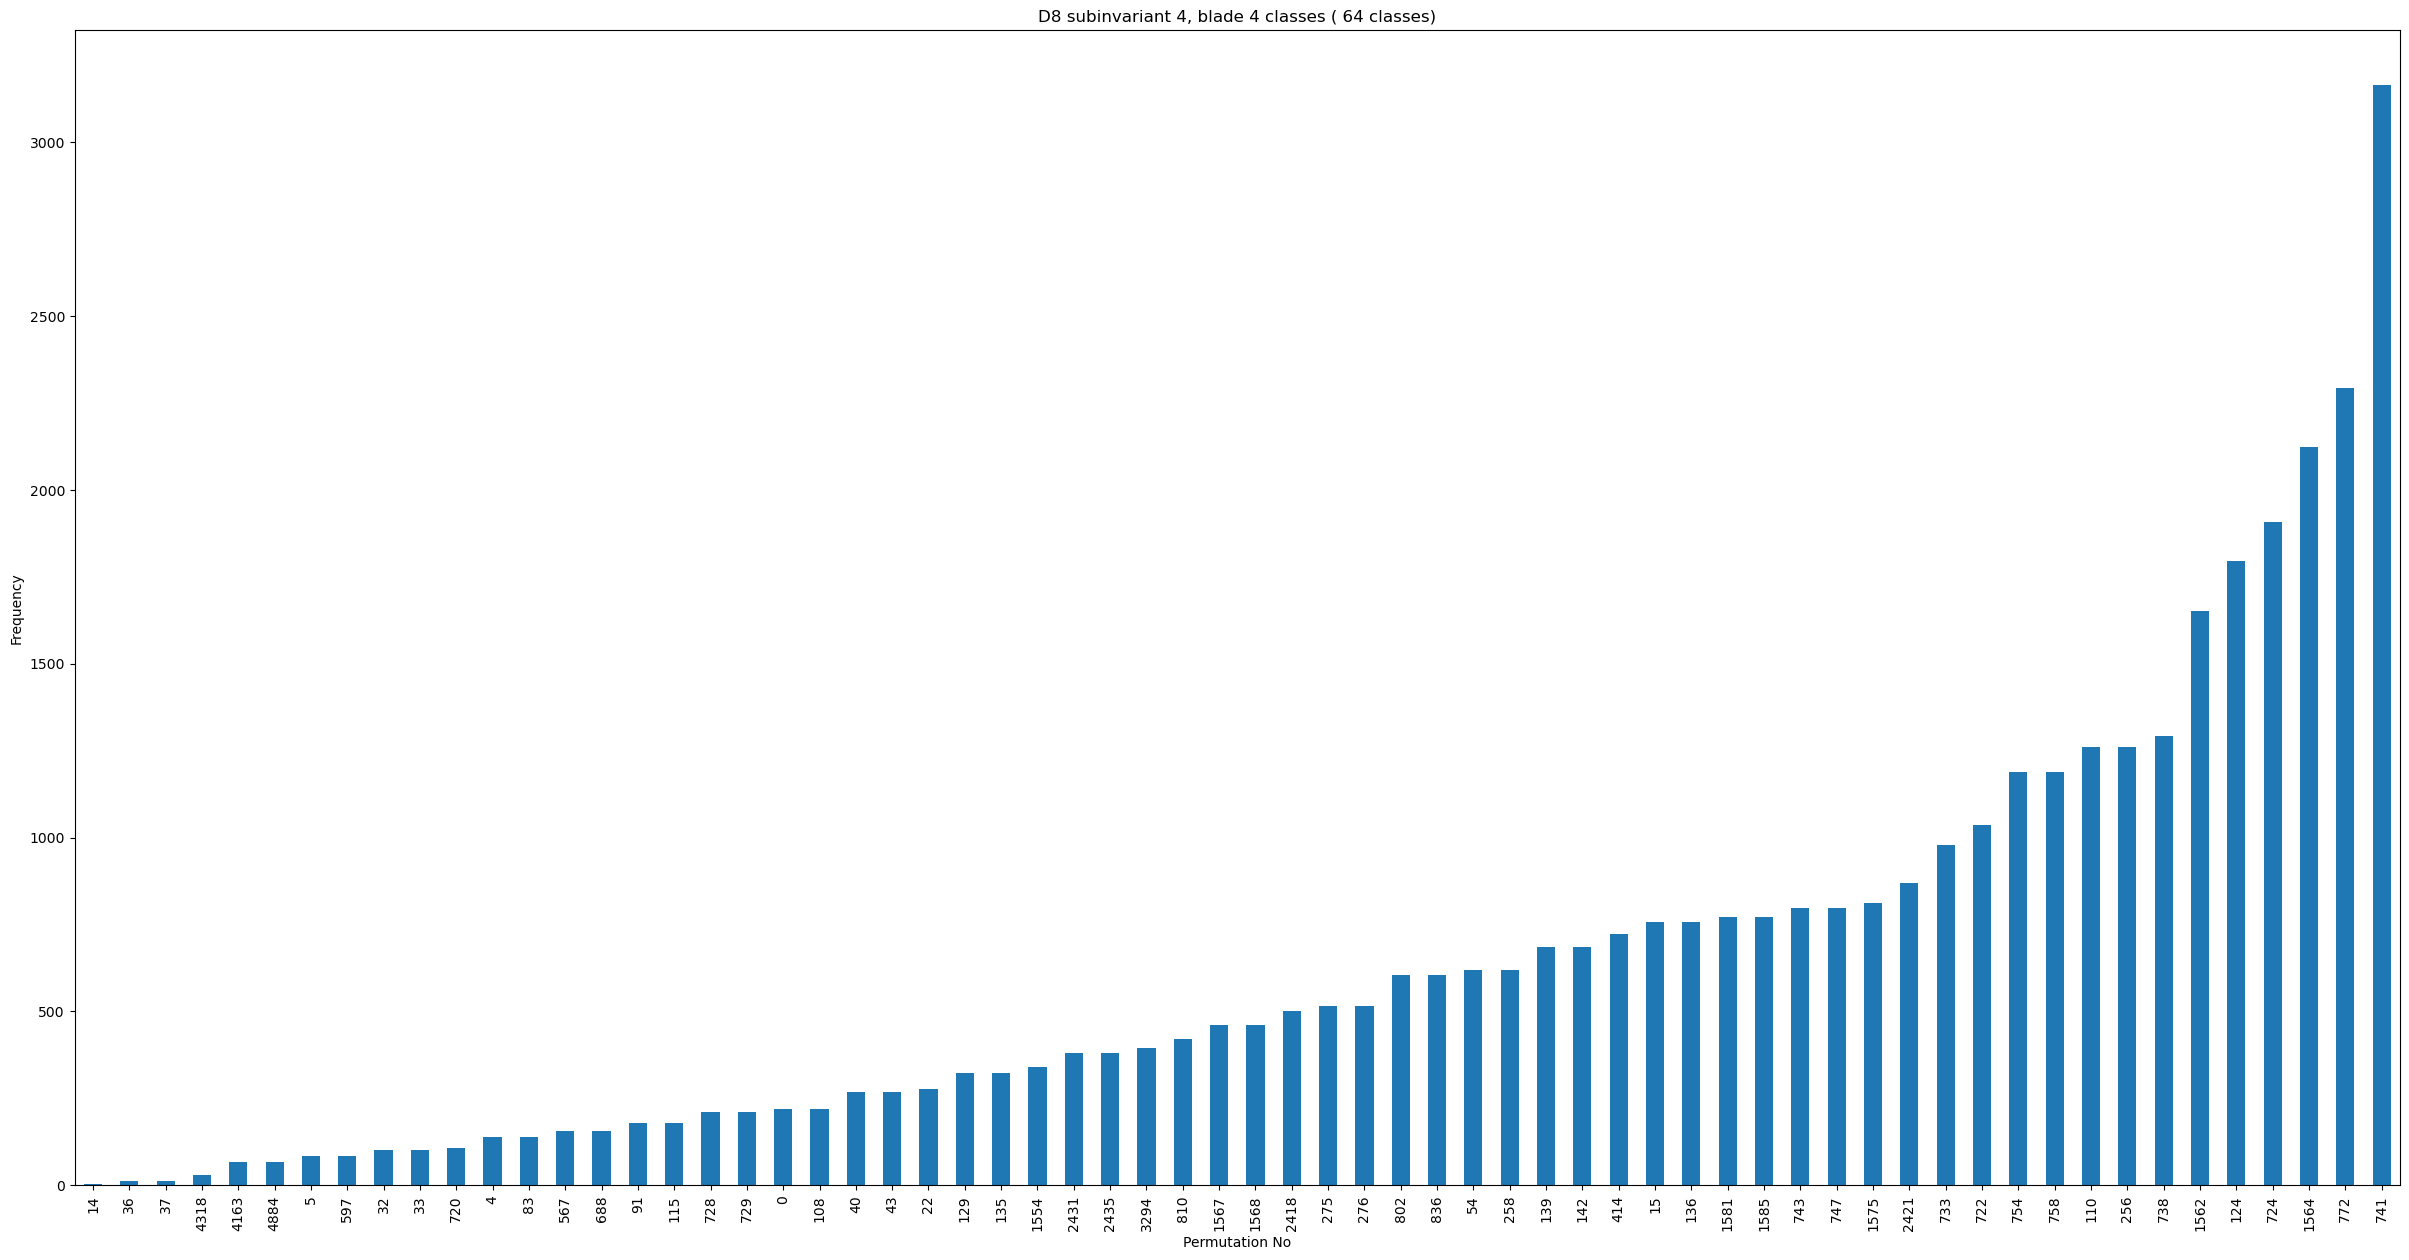

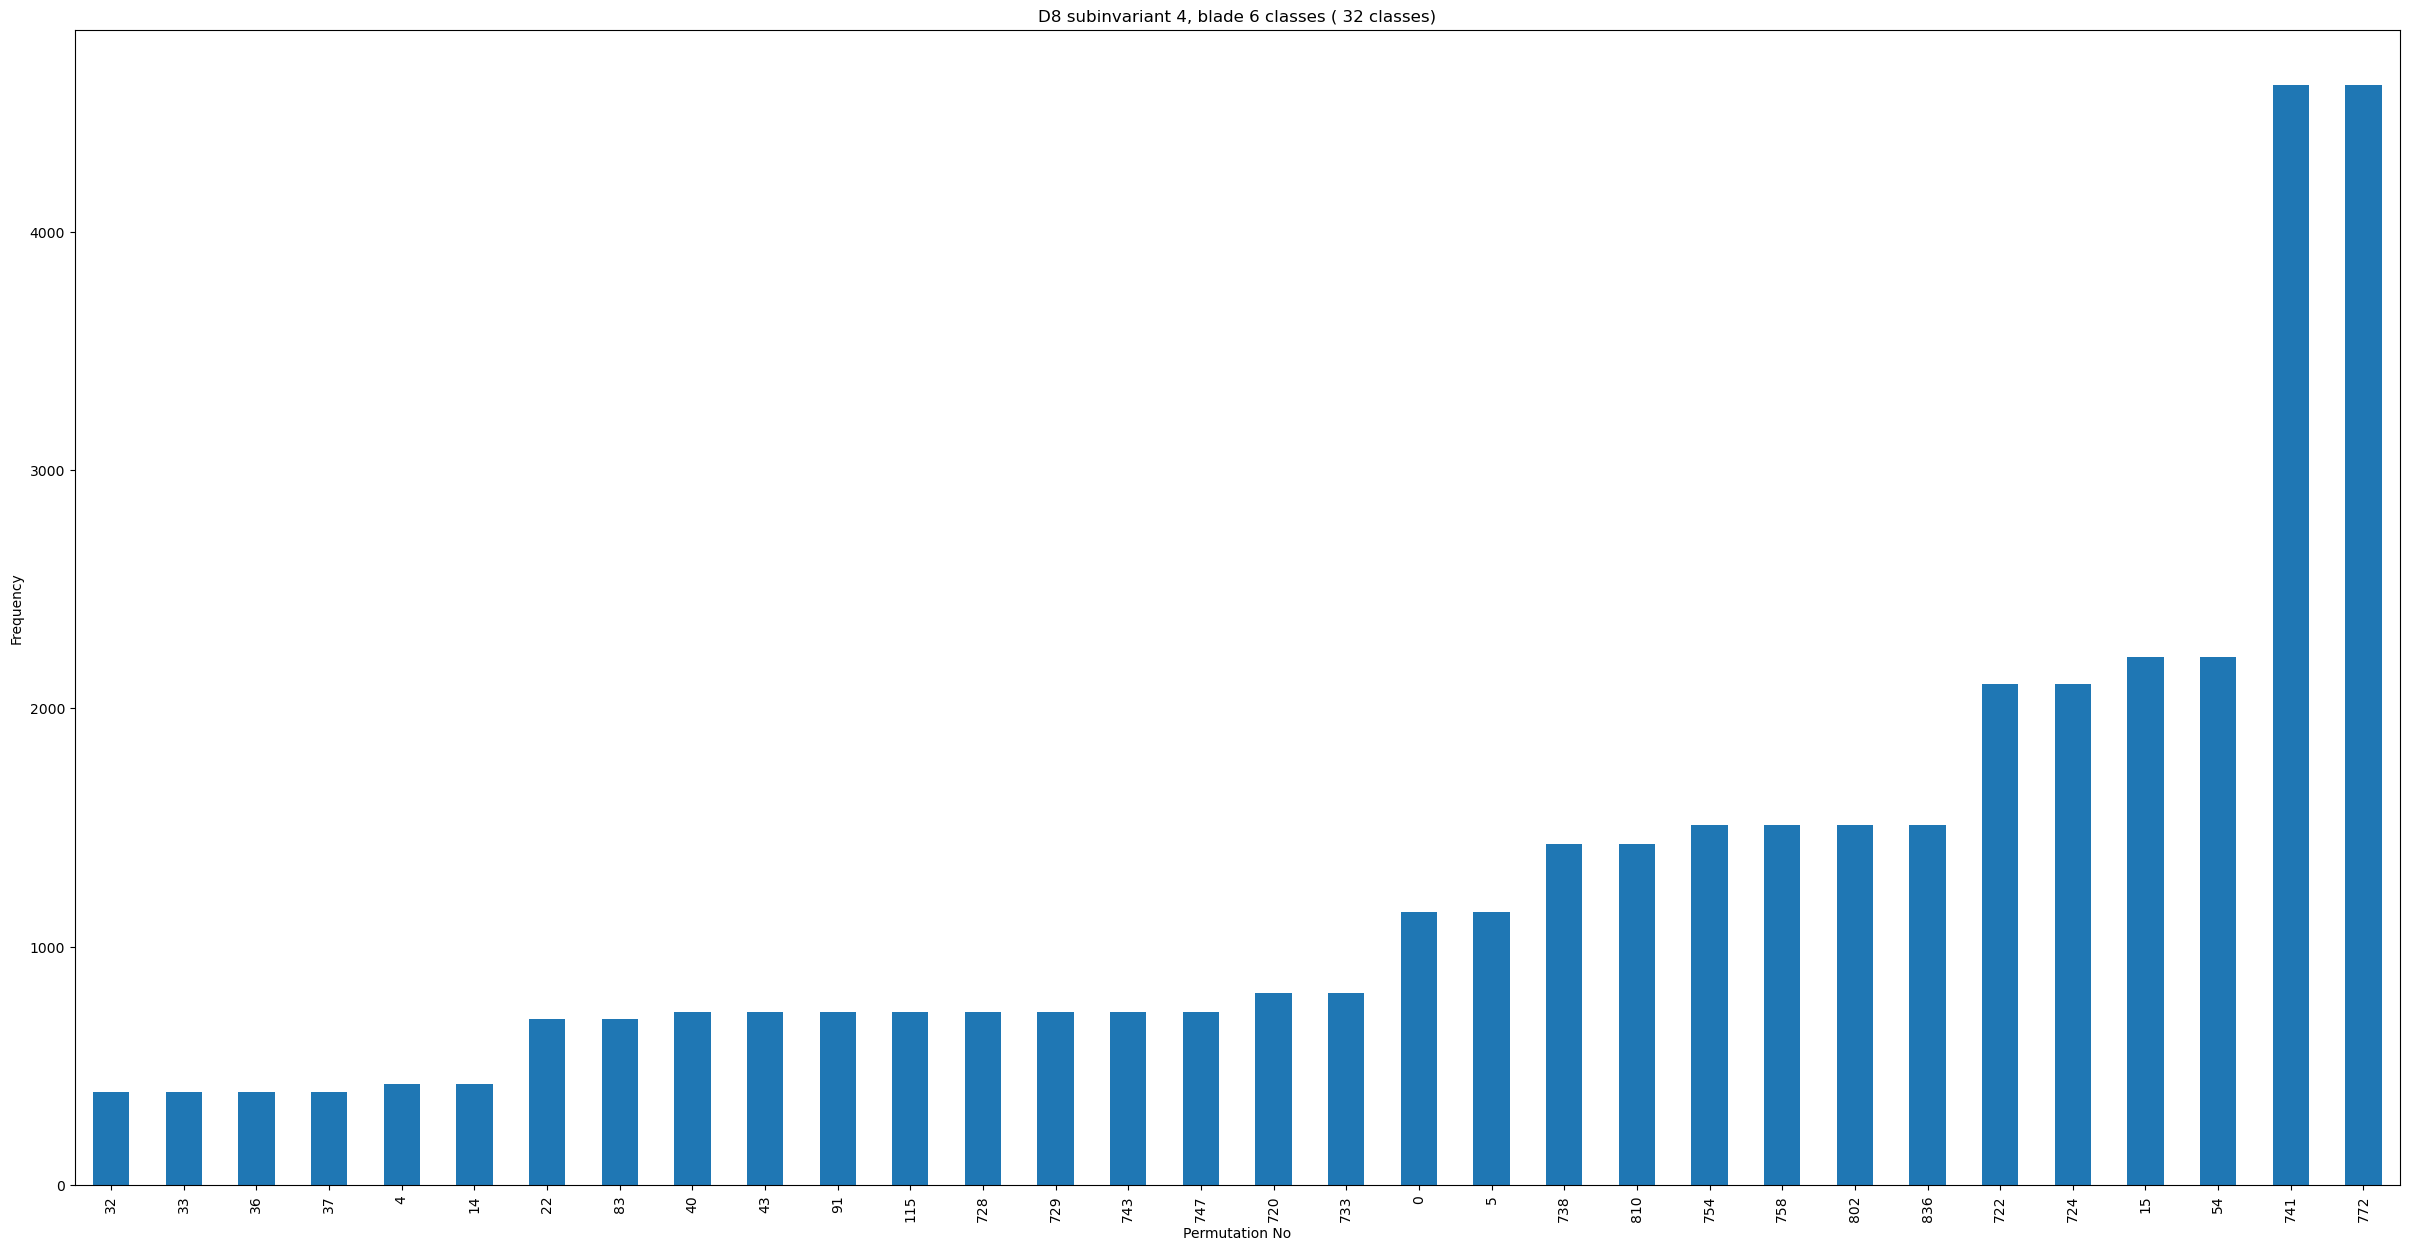

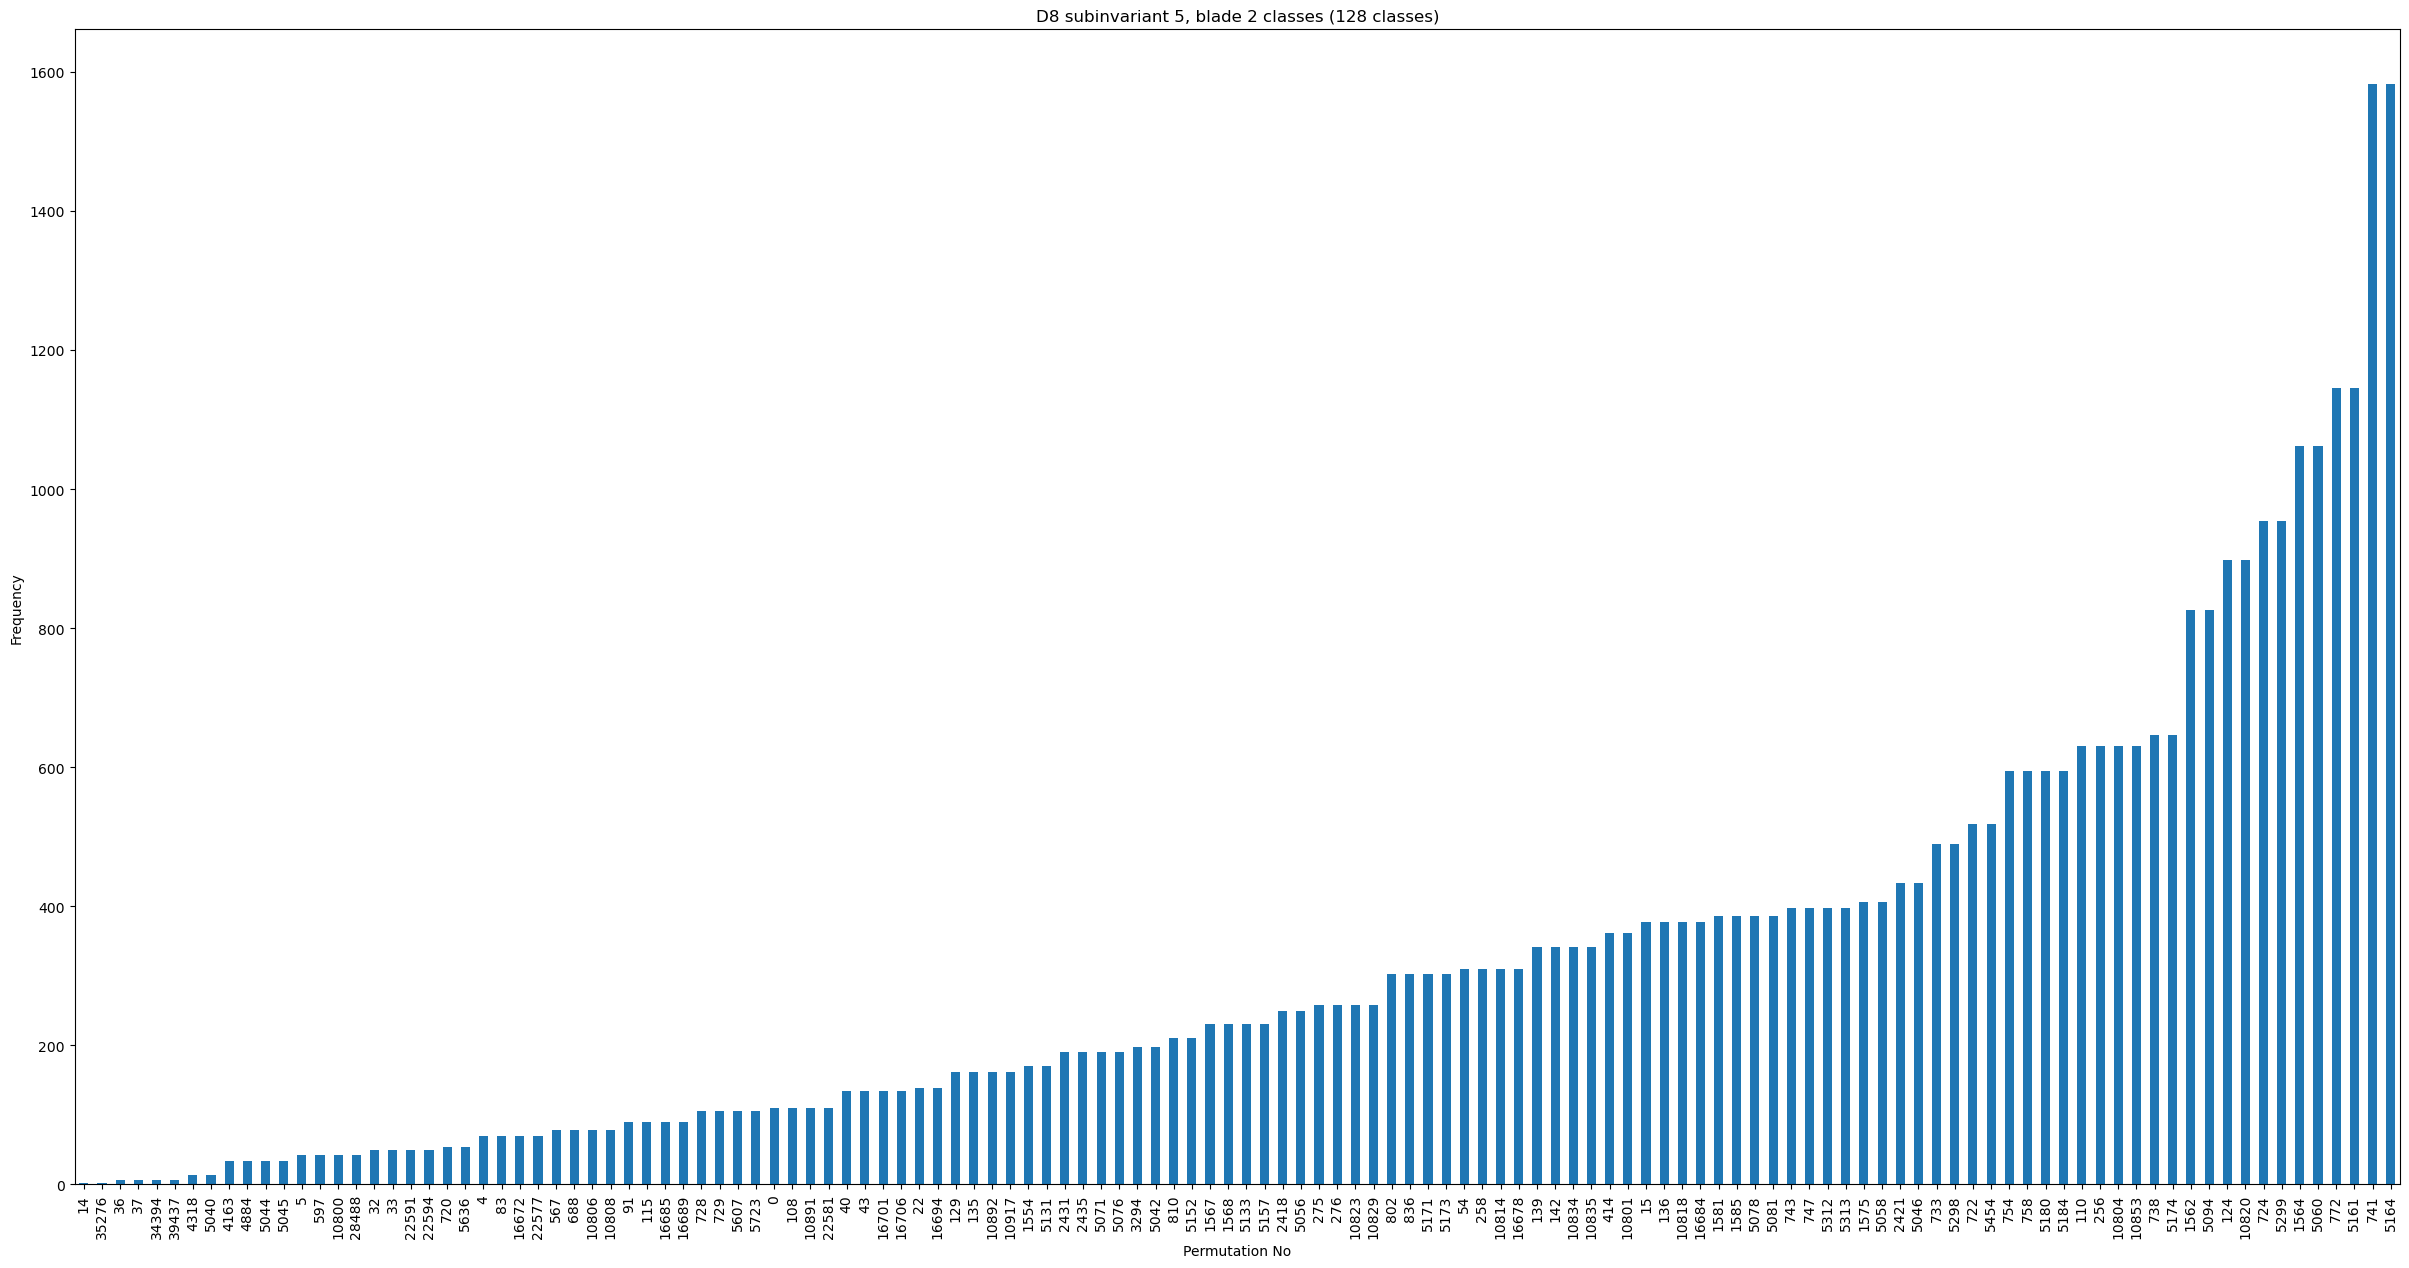

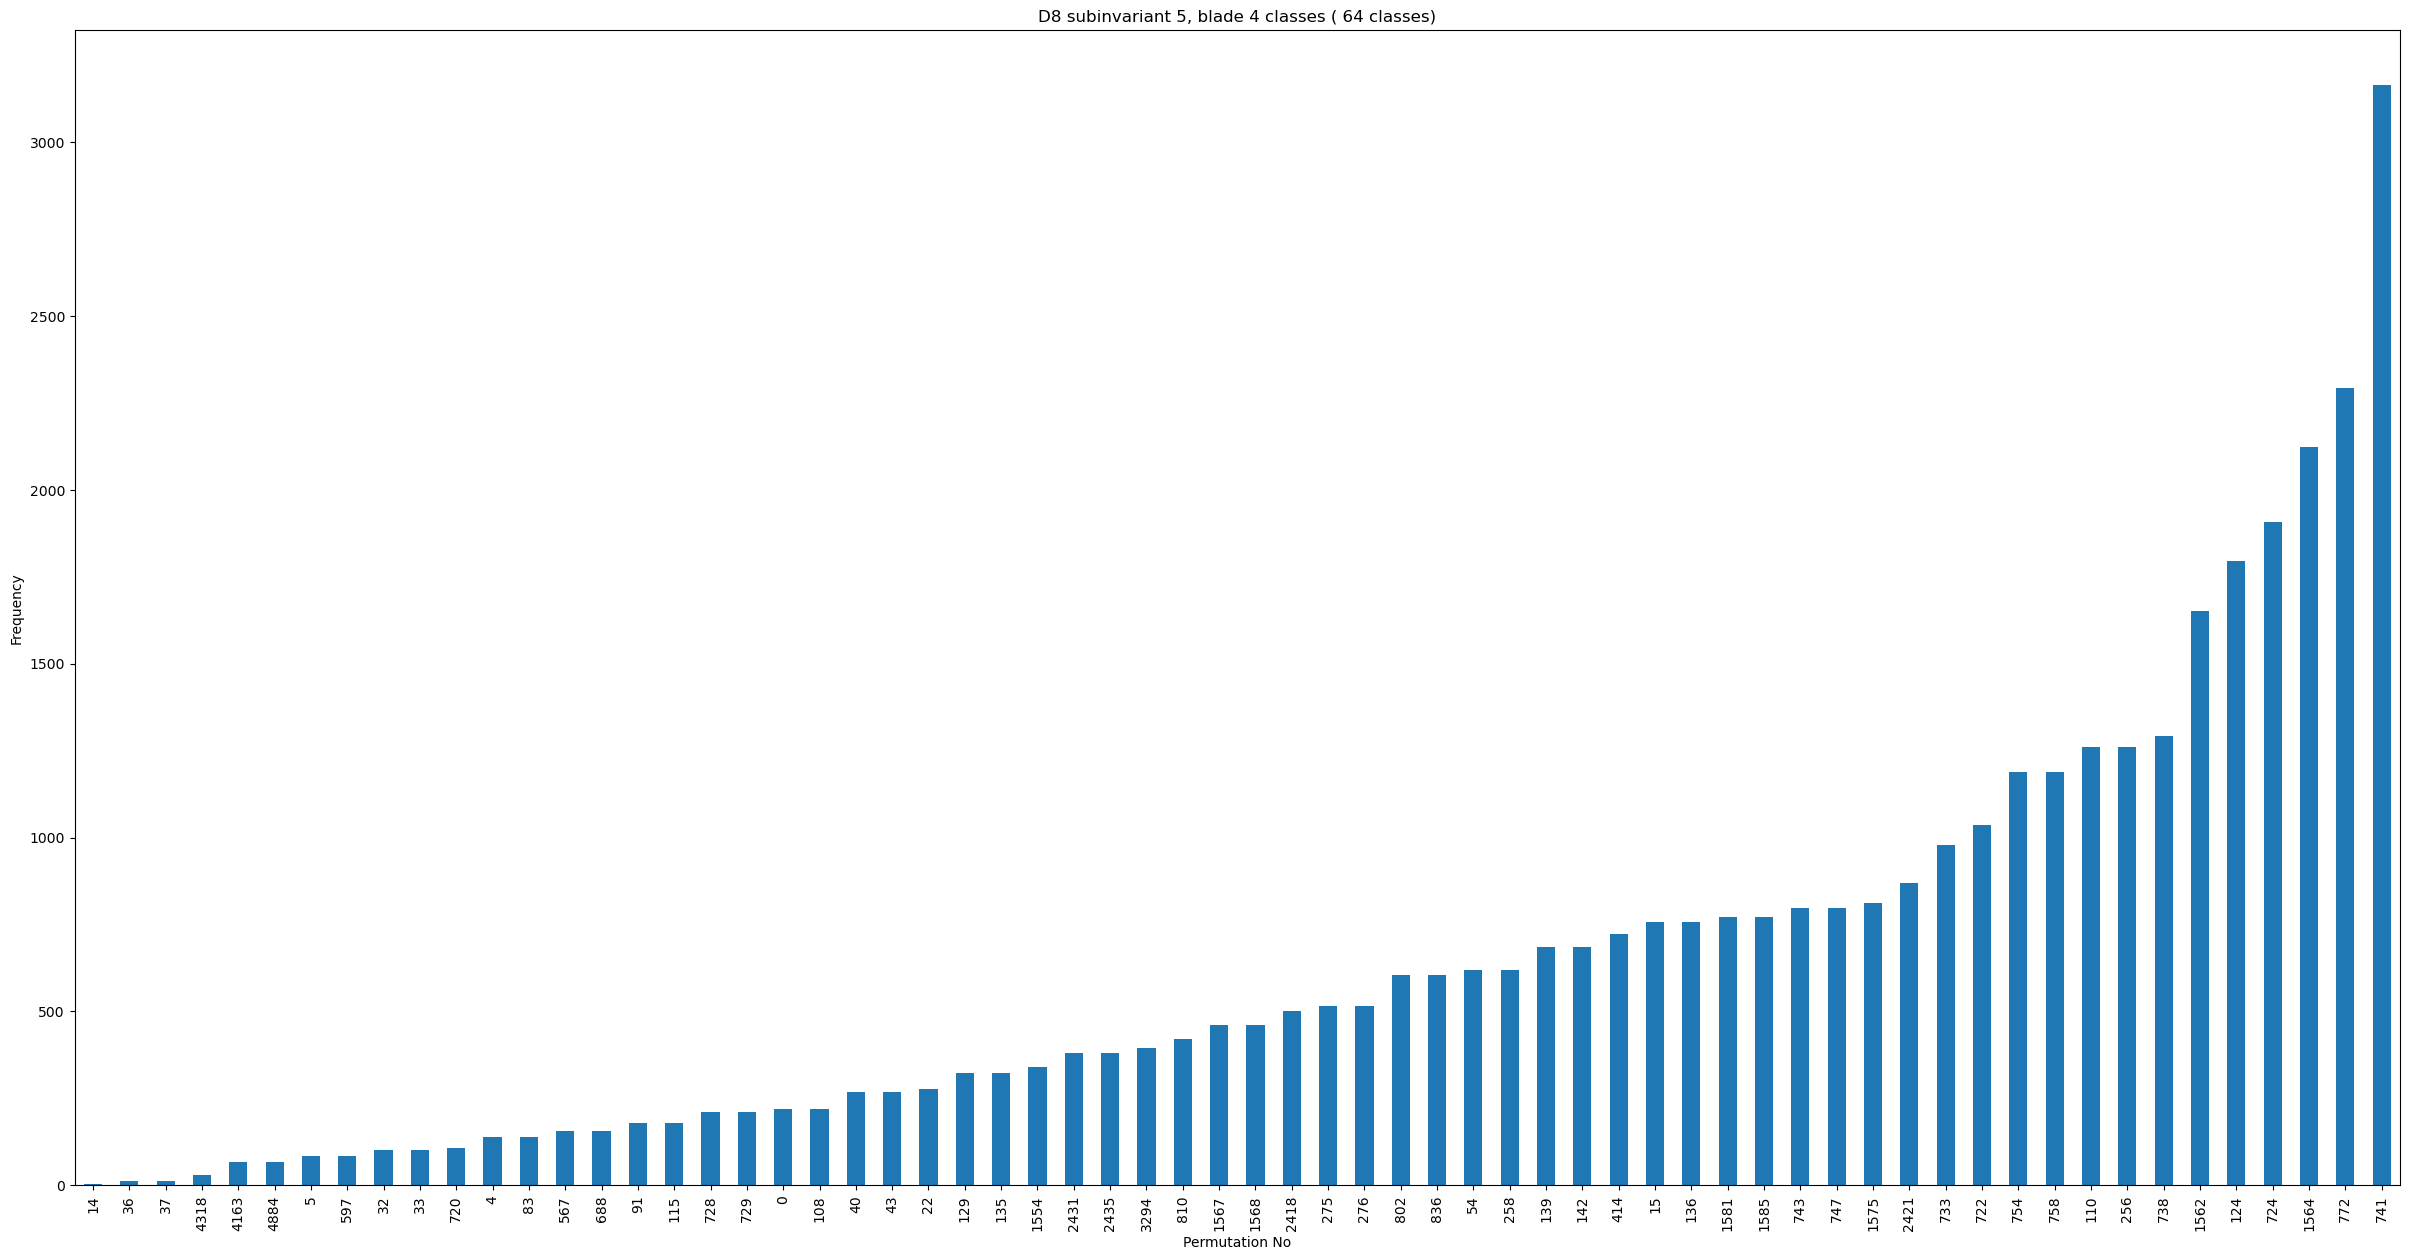

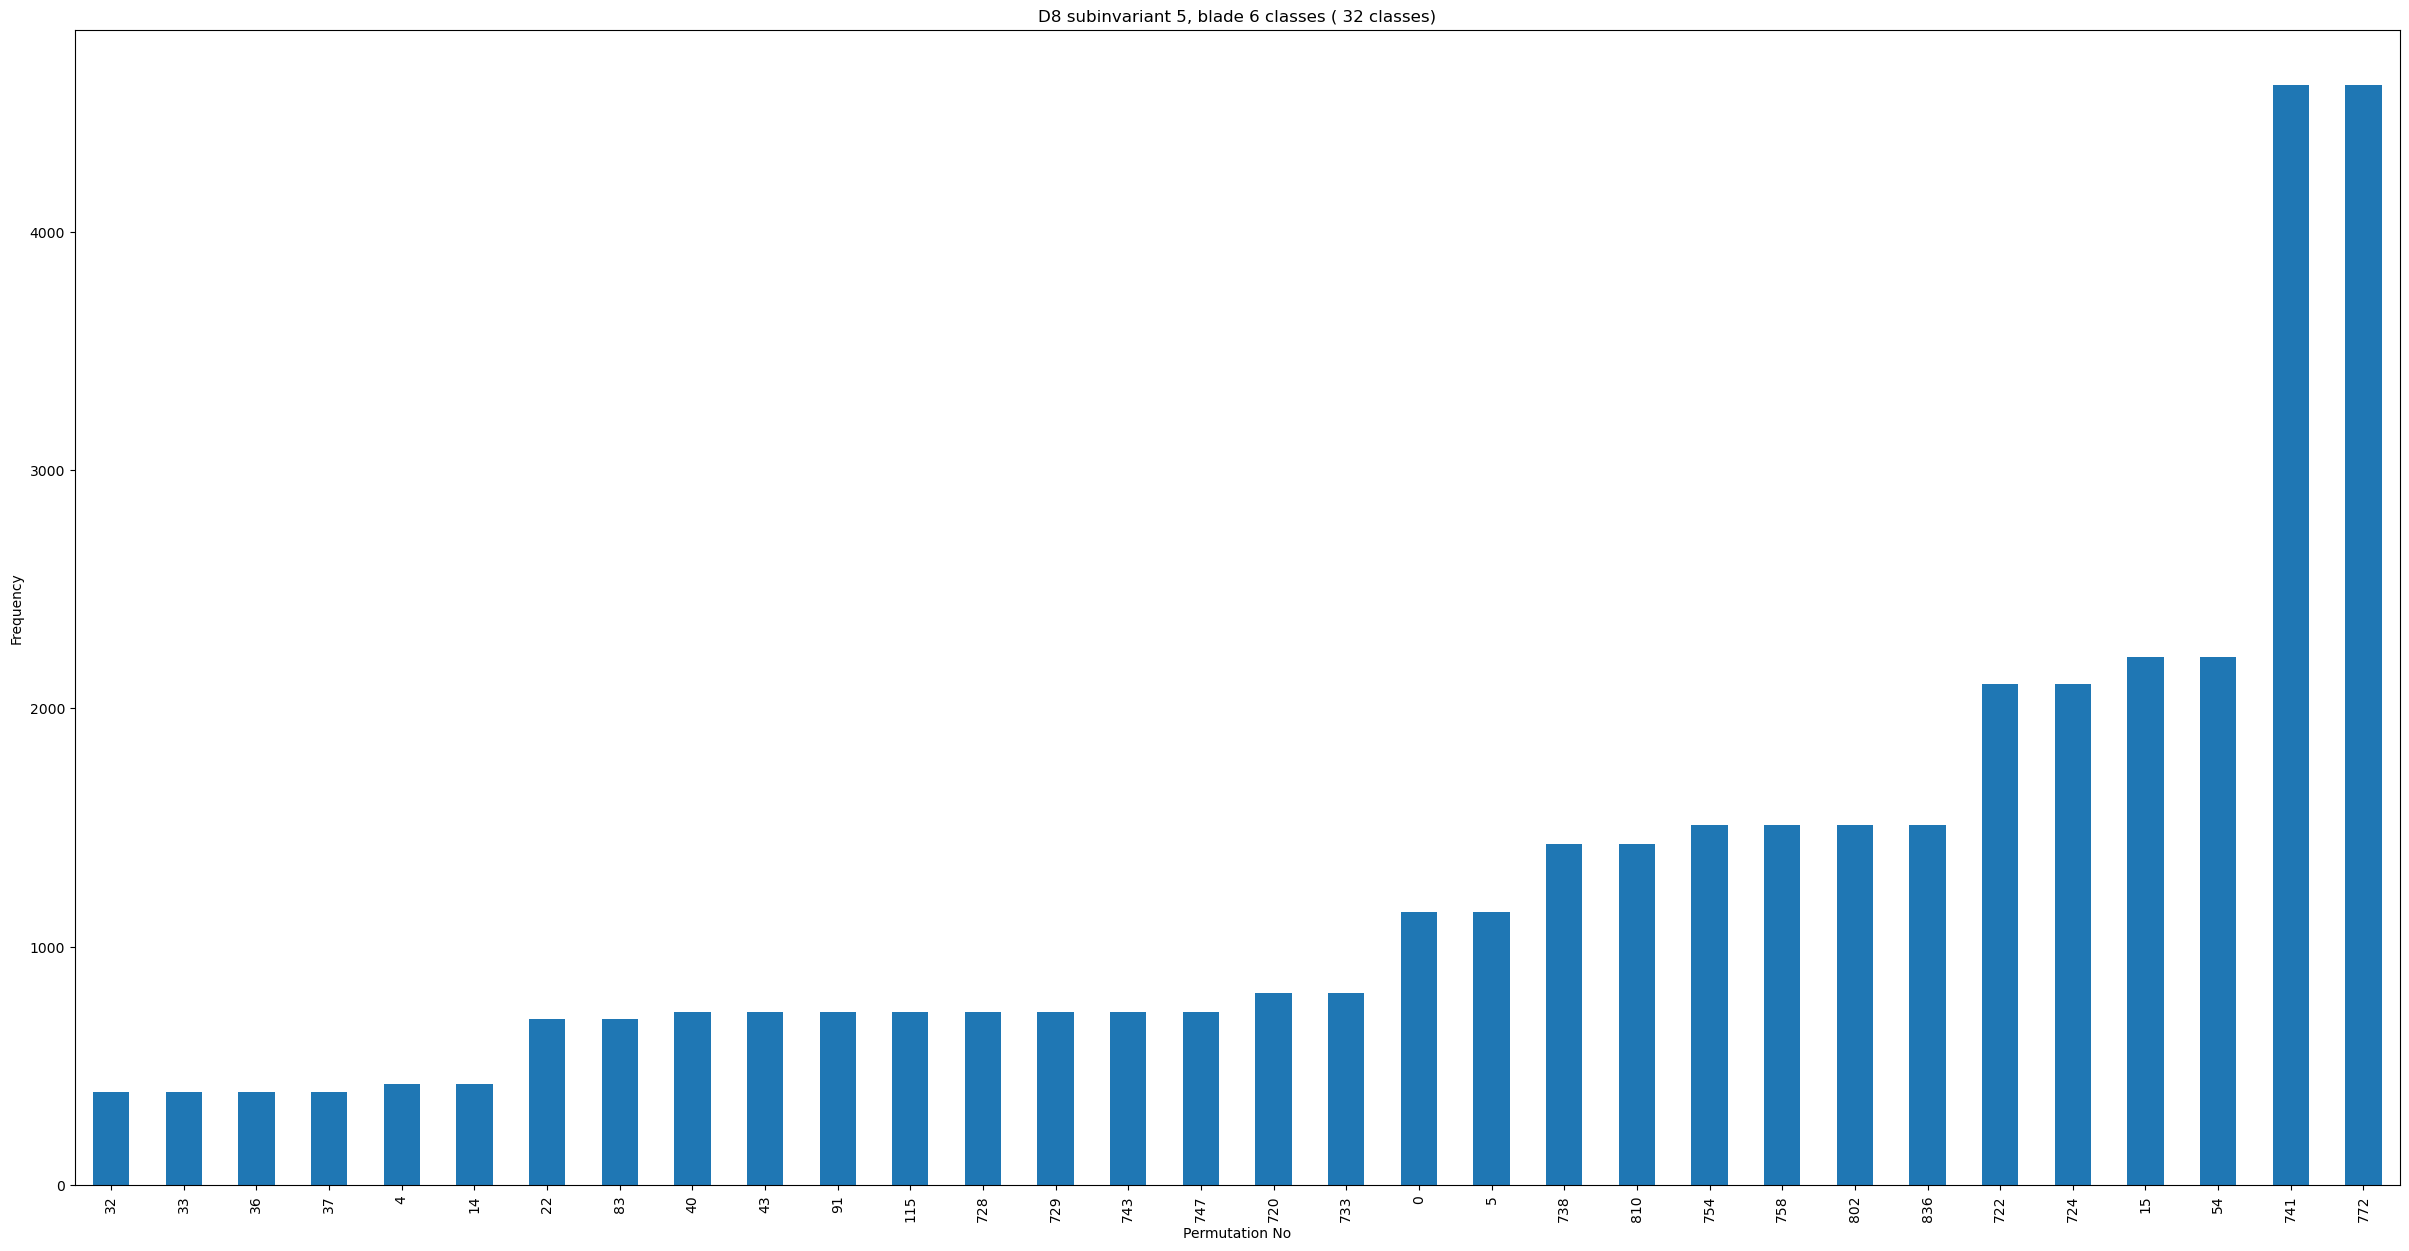

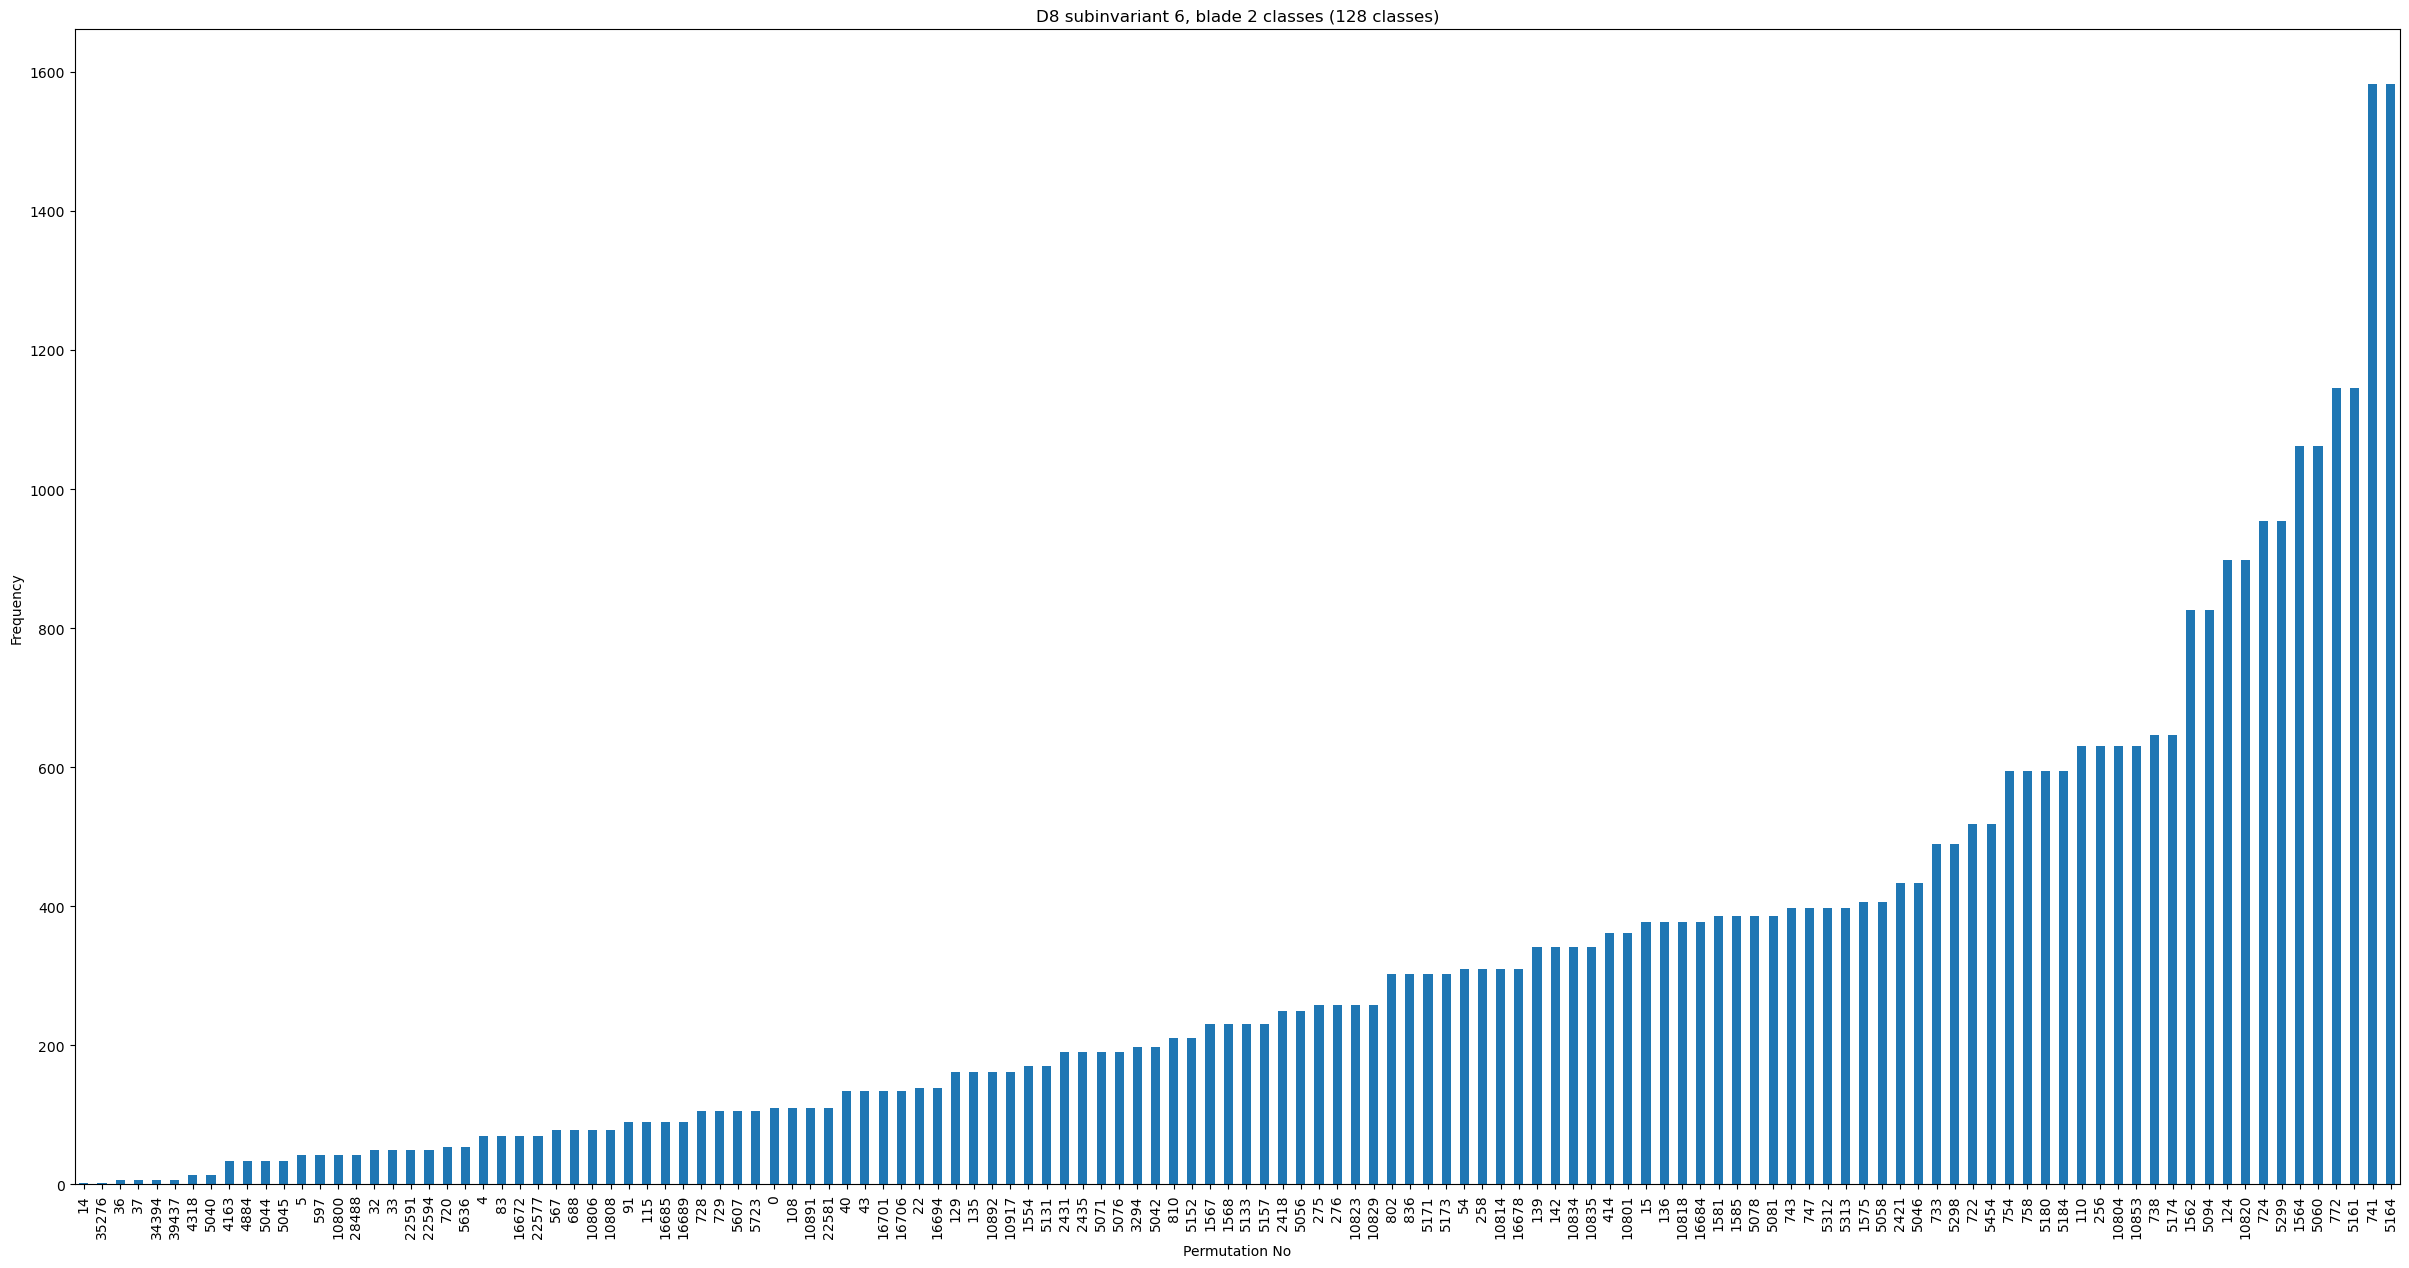

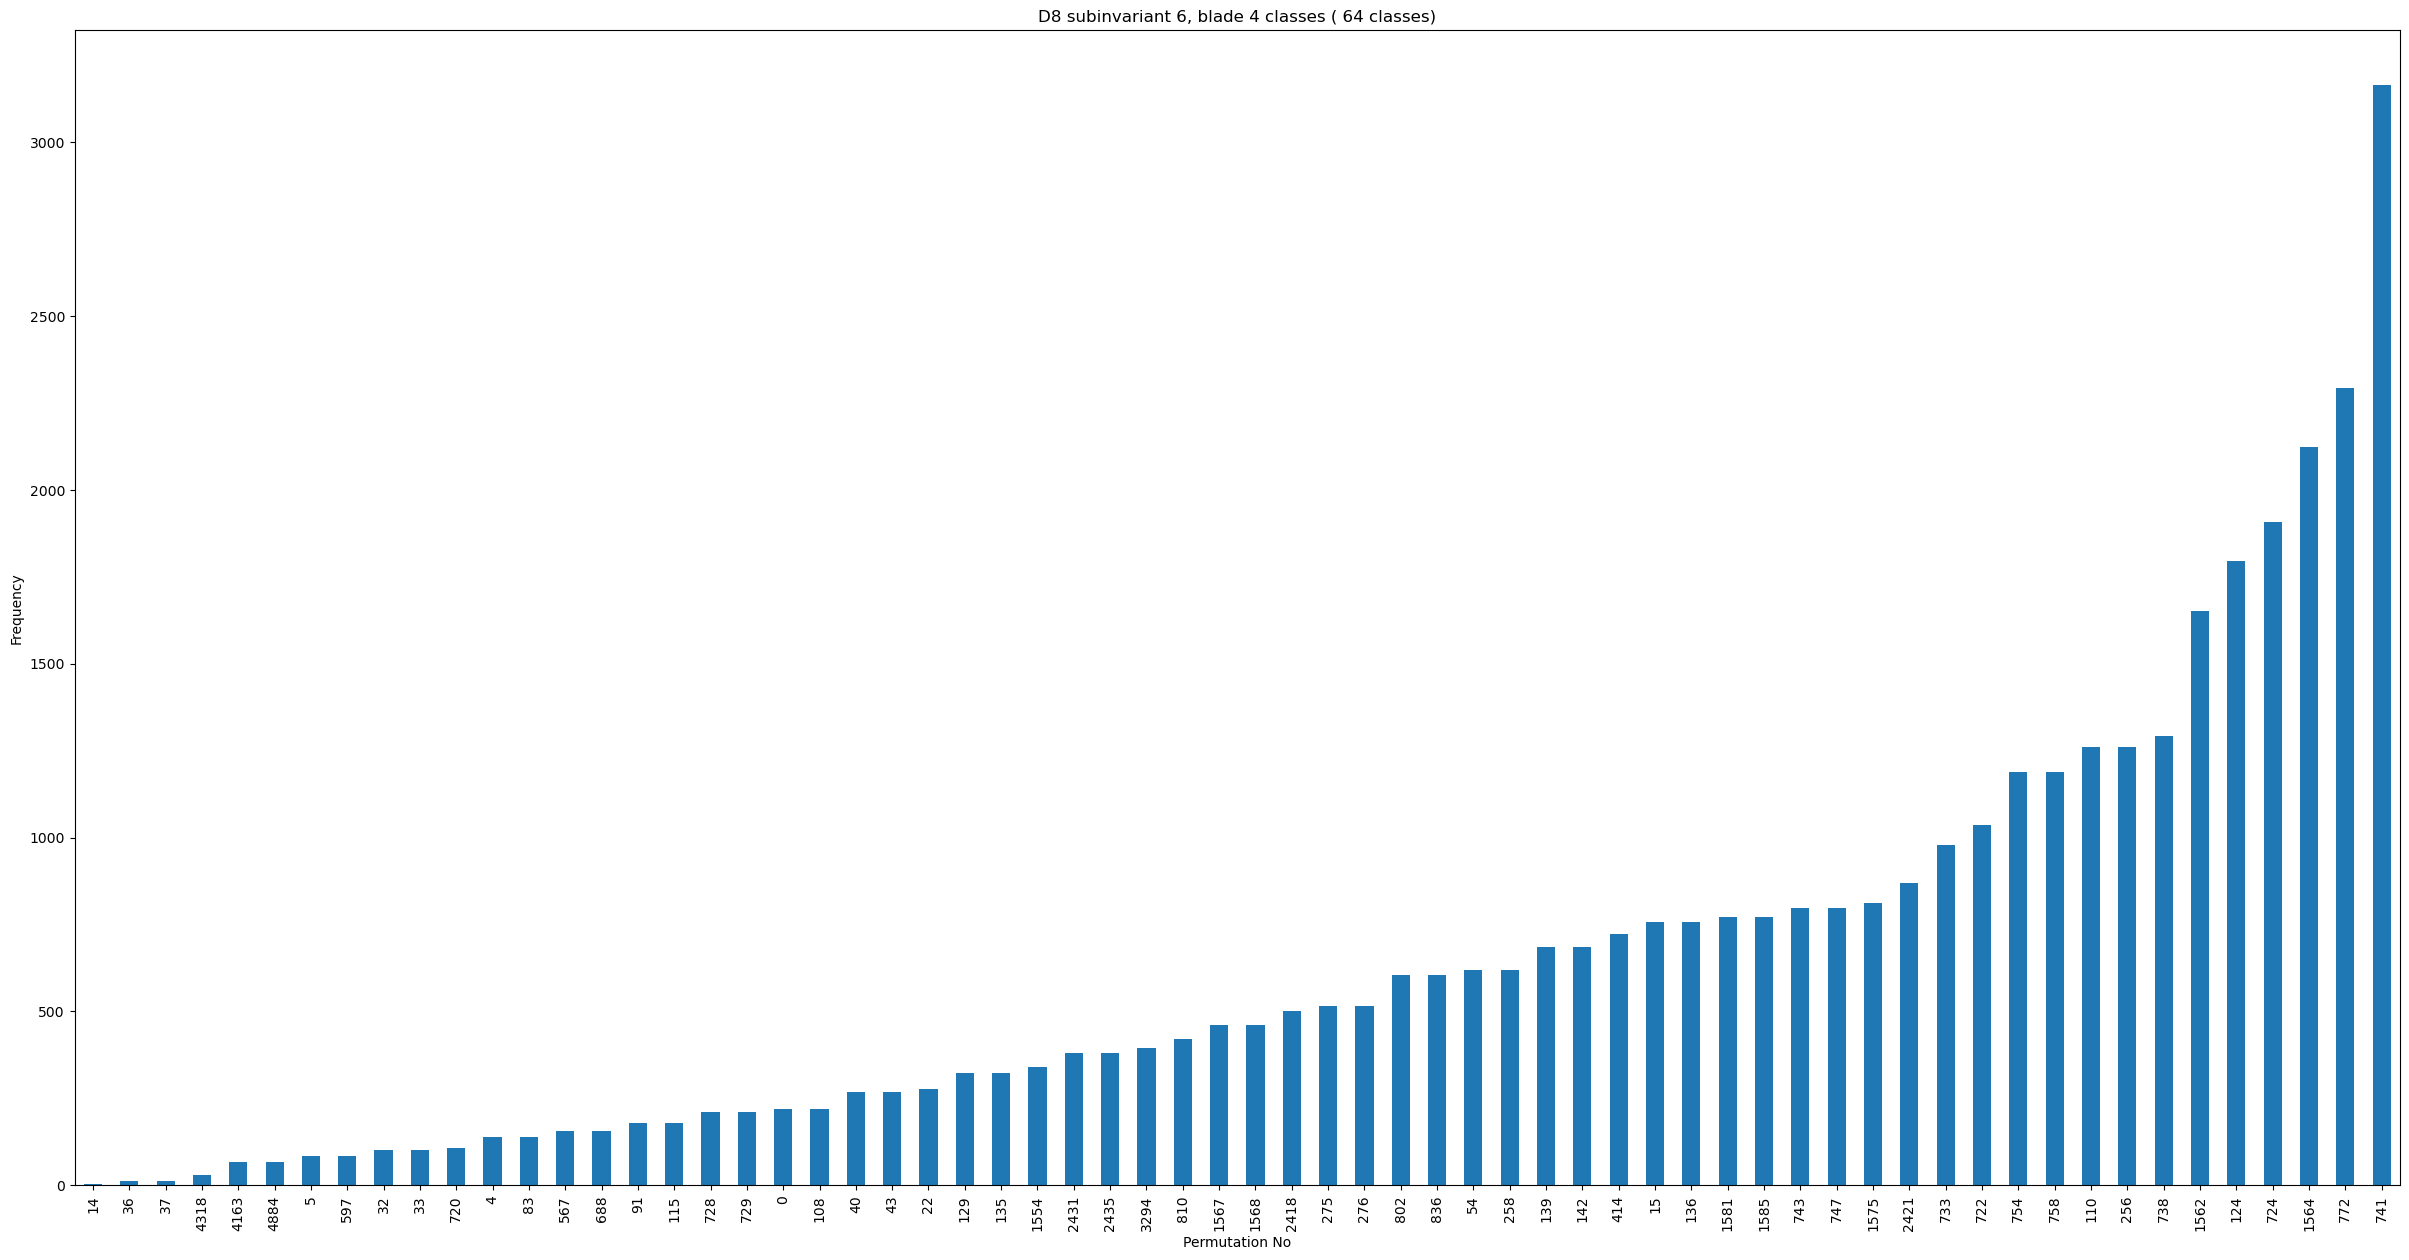

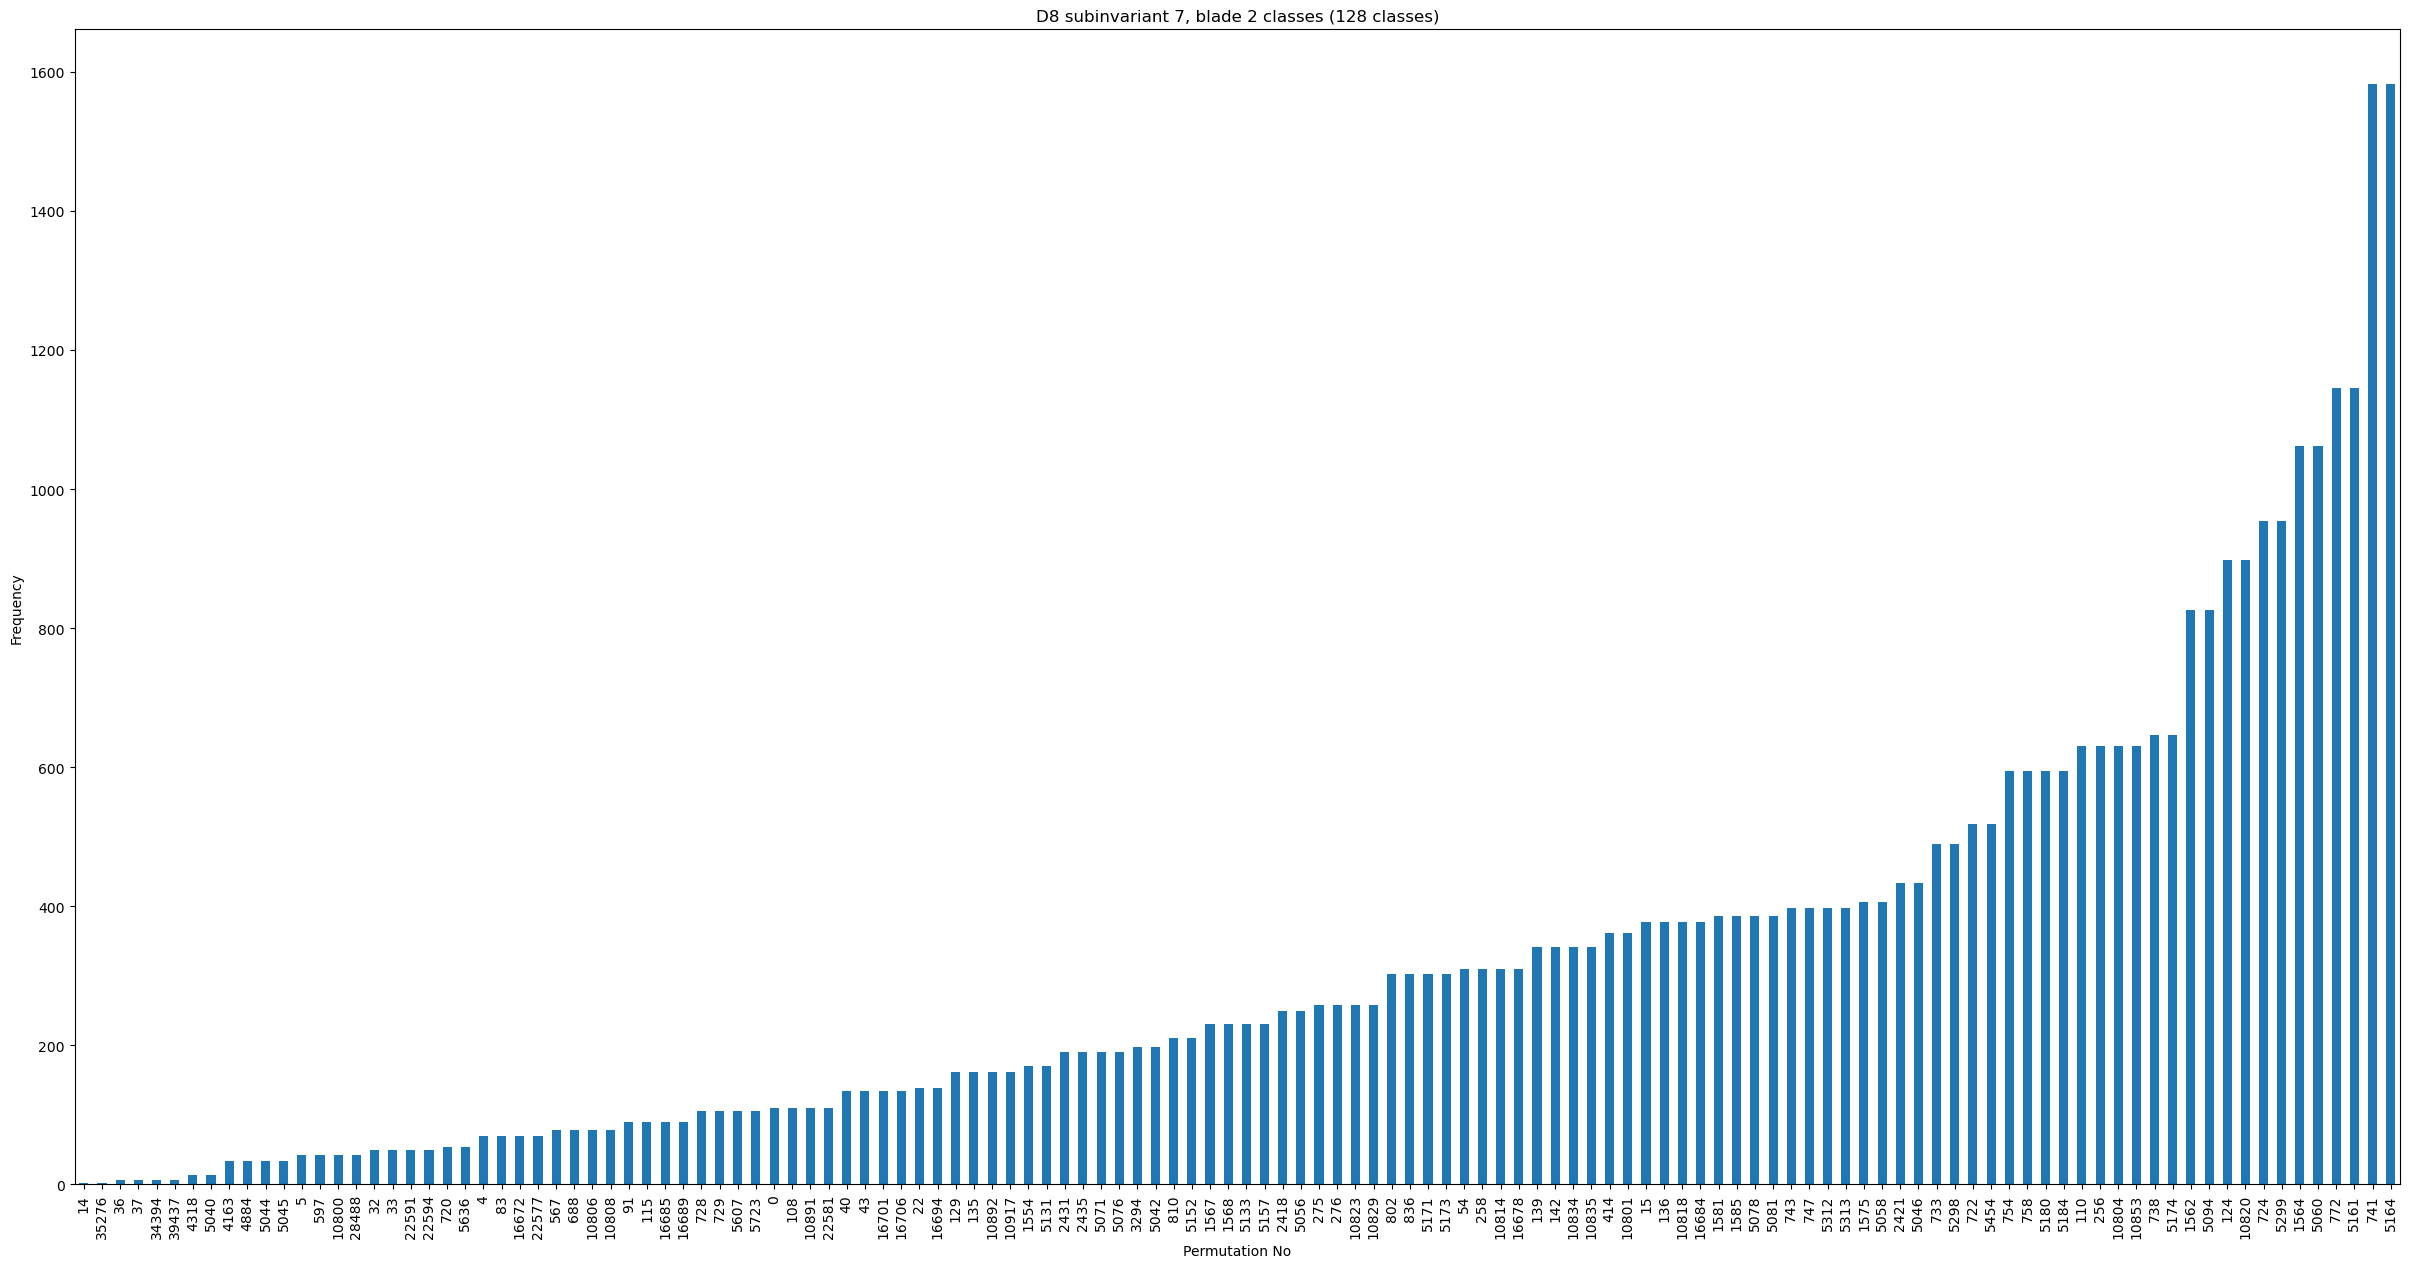

In [32]:
# Save all non-trivial distributions to files

for subInv_n in range(subInvs_N):
    for blade_n in range(blades_N):
        
        # Sort records by the number of occurances
        tempDict = classes_counterD8[subInv_n][blade_n]
        classes_counterD8[subInv_n][blade_n] = {k: v for k, v in sorted(tempDict.items(), key=lambda item: item[1])}
        
        if len(classes_counterD8[subInv_n][blade_n].keys())<=1:
            continue
        
        plt.figure(figsize=(30, 15));
        freq_series = pd.Series(list(classes_counterD8[subInv_n][blade_n].values()));
        fig = freq_series.plot(kind='bar');
        fig.set_title("D8 subinvariant %1d, blade %1d classes (%3d classes)" % (subInv_n, blade_n, len(list(classes_counterD8[subInv_n][blade_n].values())) ));
        fig.set_xlabel('Permutation No');
        fig.set_ylabel('Frequency');
        fig.set_xticklabels(list(classes_counterD8[subInv_n][blade_n].keys()));
        name = "ADE_classes_figures\D8subinv" + str(subInv_n) + "blade" + str(blade_n) + ".png"
        plt.savefig(name);

In [33]:
# Record found classes in a CSV file
with open('ADE_Data\D8_subcpts_classes.csv','w') as file:
    for subInv_n in range(subInvs_N):
        for blade_n in range(blades_N):
            file.write("subinvariant %1d blade %1d, permutation Number," % (subInv_n,blade_n))
            for key in classes_counterD8[subInv_n][blade_n].keys():
                file.write(str(key) + ',')
            file.write('\n')
            
            file.write(',frequency,')
            for val in classes_counterD8[subInv_n][blade_n].values():
                file.write(str(val) + ',')
            file.write('\n')
            
            file.write(',total number of classes,' + str(len(list(classes_counterD8[subInv_n][blade_n].values()))) + ',\n')

In [34]:
# Similar analysis for A8

In [35]:
with open('ADE_Data\A8inv_Data_mod.txt','r') as file:
    dataA8 = [ parseString(line.rstrip())[1] for line in file]

In [36]:
# Find distinct classes of invariants with the same subInv_no, blade_no component in A8
classesA8 = np.zeros([data_size, subInvs_N, blades_N], dtype = int)

In [37]:
for blade_n in tqdm(range(blades_N)):
    for subInv_n in range(subInvs_N):
        for idx1 in range(data_size):
            if classesA8[idx1, subInv_n, blade_n] != 0:
                continue
            classesA8[idx1, subInv_n, blade_n] = idx1+1 # record that elem itself in its own class, shift by 1 during run
            for idx2 in range(idx1+1,data_size):
                if blade(dataA8[idx1][subInv_n],blade_n)==blade(dataA8[idx2][subInv_n],blade_n):    
                    classesA8[idx2, subInv_n, blade_n] = idx1+1 # record that elem idx2 is in the same class as element idx1, shift by 1 during run
                    
classesA8 = classesA8 -1

100%|██████████| 9/9 [01:25<00:00,  9.53s/it]


In [38]:
classes_counterA8 = []
for subInv_n in range(subInvs_N):
    subinvCounters = []
    for blade_n in range(blades_N):
         subinvCounters.append(dict(Counter(classesA8[:,subInv_n,blade_n])))
    classes_counterA8.append( subinvCounters )
    
print(np.shape(classes_counterA8))

(9, 9)


In [39]:
# Create an array  with the number of classes for each subinvariant, each blade

classes_sizesA8 = []
for subInv_n in range(subInvs_N):
    temp = []
    for blade_n in range(blades_N):
        if len(classes_counterA8[subInv_n][blade_n].keys())==1:
            if all( v == 0 for v in blade(dataA8[5][subInv_n],blade_n) ): # Enough to check random data entry, e.g. 5
                temp.append( -1 )
            else:
                temp.append( len(classes_counterA8[subInv_n][blade_n].keys()) )
        else:
            temp.append( len(classes_counterA8[subInv_n][blade_n].keys()) )
    classes_sizesA8.append( temp )
    
for row in classes_sizesA8:
    temp = ''
    for elem in row:
        temp = temp + ("%3d " % elem)
    print(temp)
    
# Record found classses sizes in a CSV file
with open('ADE_Data\A8_classes_sizes.csv','w') as file:
    for subInv_n in range(subInvs_N):
        for blade_n in range(blades_N):
            file.write("%3d," % classes_sizesA8[subInv_n][blade_n])
        file.write('\n')

  1  -1  -1  -1  -1  -1  -1  -1  -1 
  1  -1 128  -1  -1  -1  -1  -1  -1 
  1  -1 128  -1  64  -1  -1  -1  -1 
  1  -1 128  -1  64  -1 128  -1  -1 
  1  -1 128  -1  64  -1 128  -1   2 
  1  -1 128  -1  64  -1 128  -1  -1 
  1  -1 128  -1  64  -1  -1  -1  -1 
  1  -1 128  -1  -1  -1  -1  -1  -1 
  1  -1  -1  -1  -1  -1  -1  -1  -1 


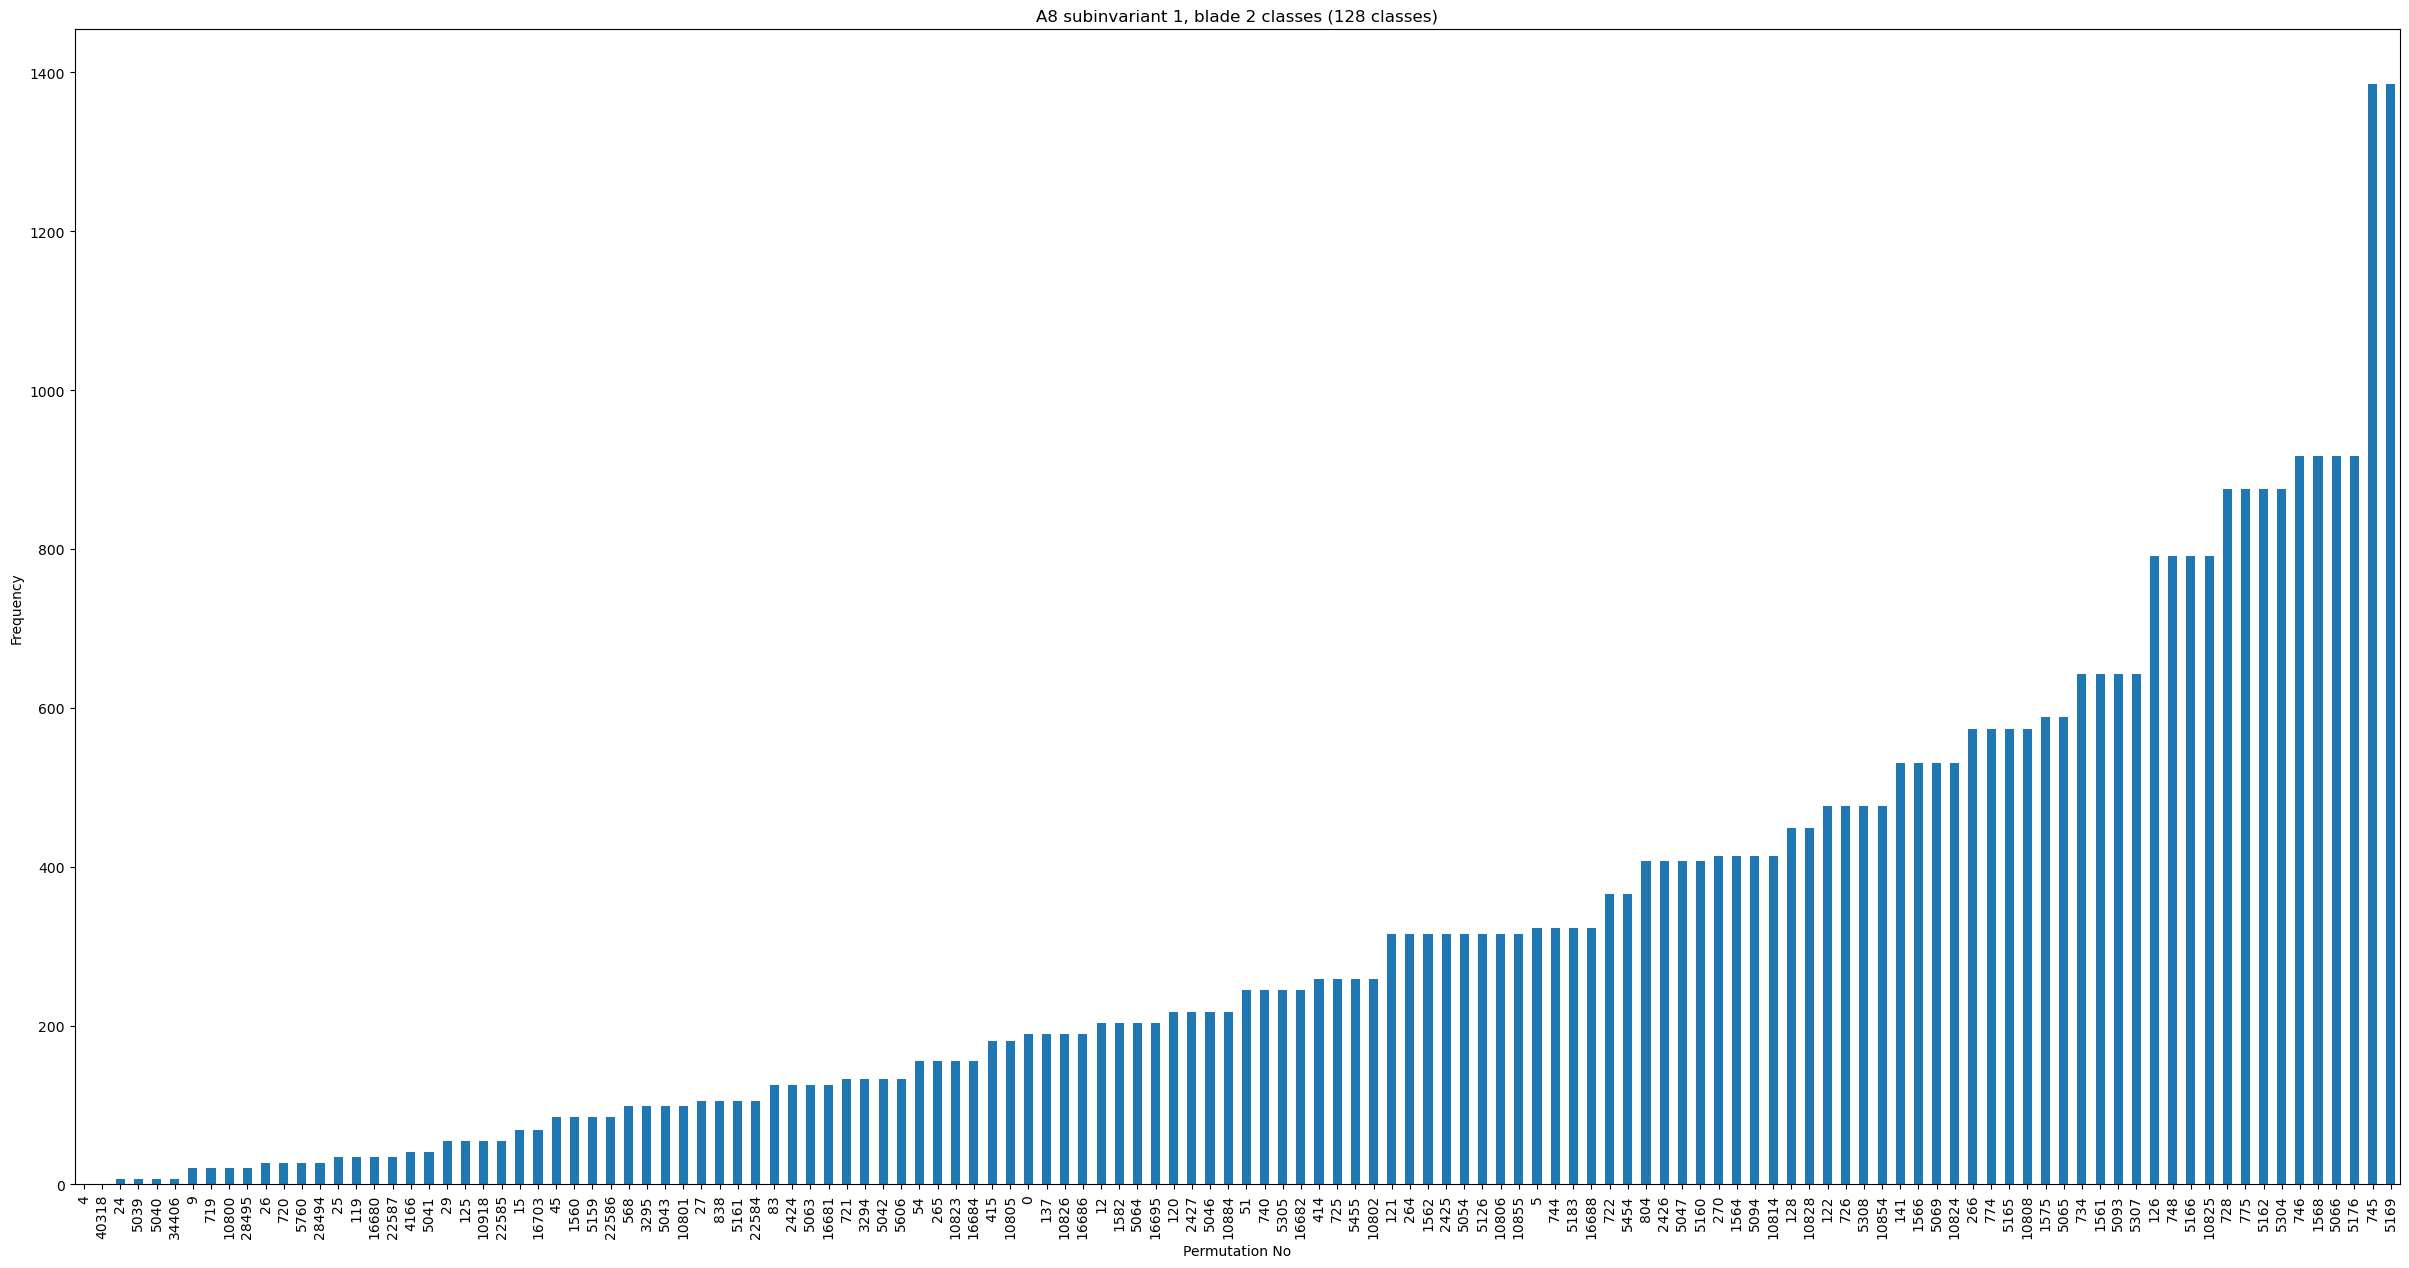

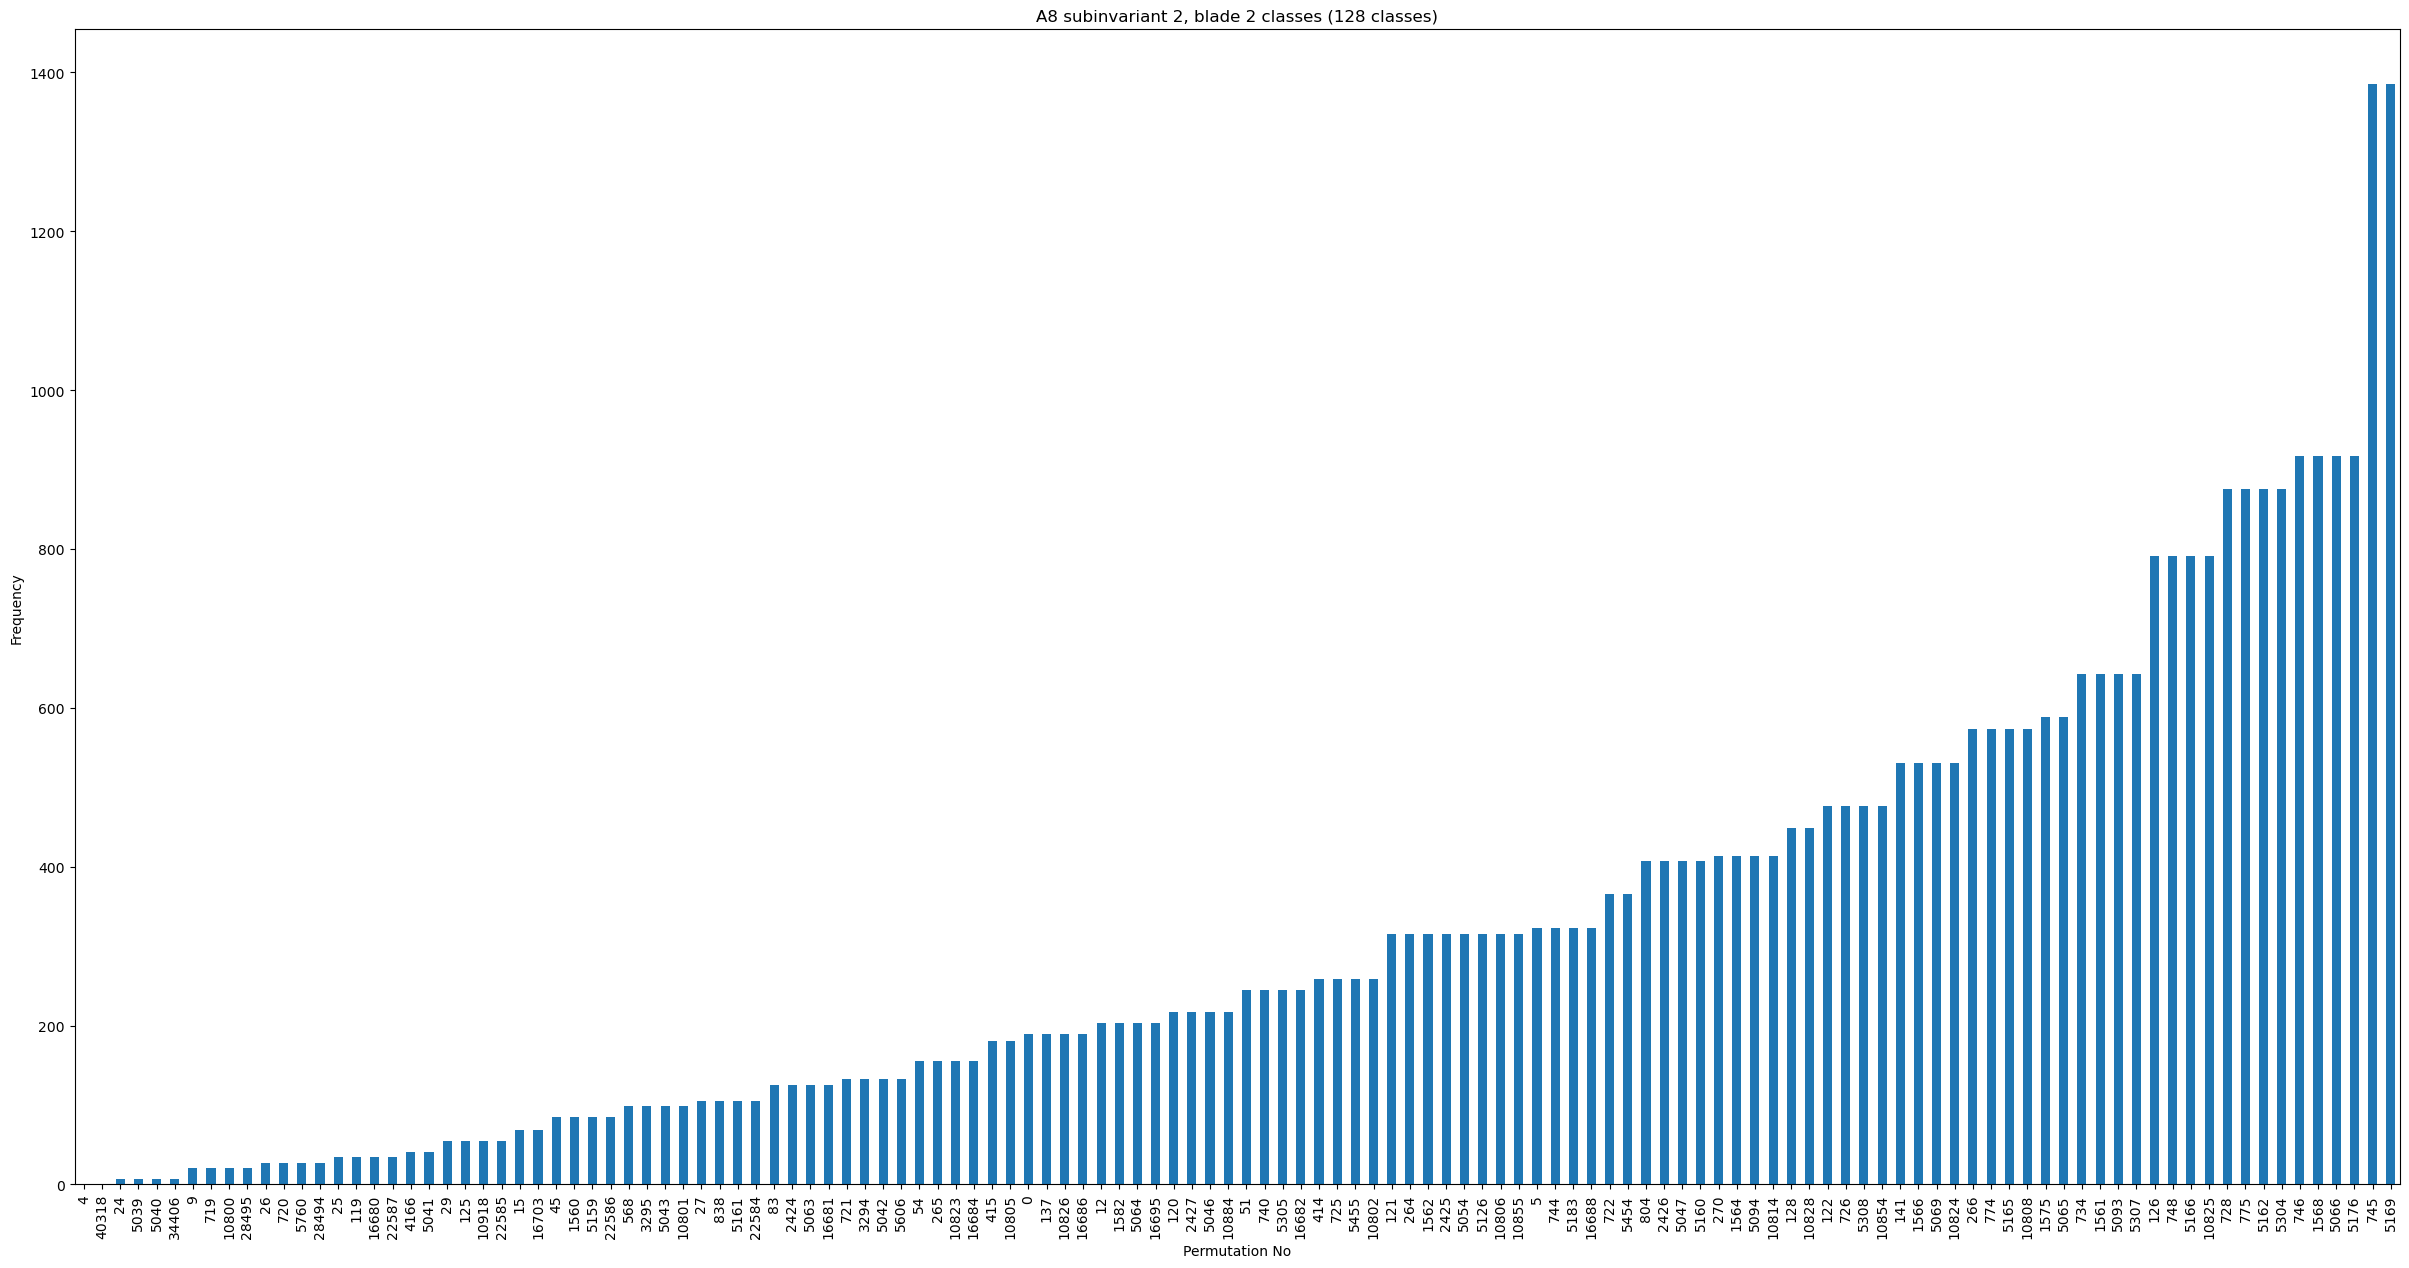

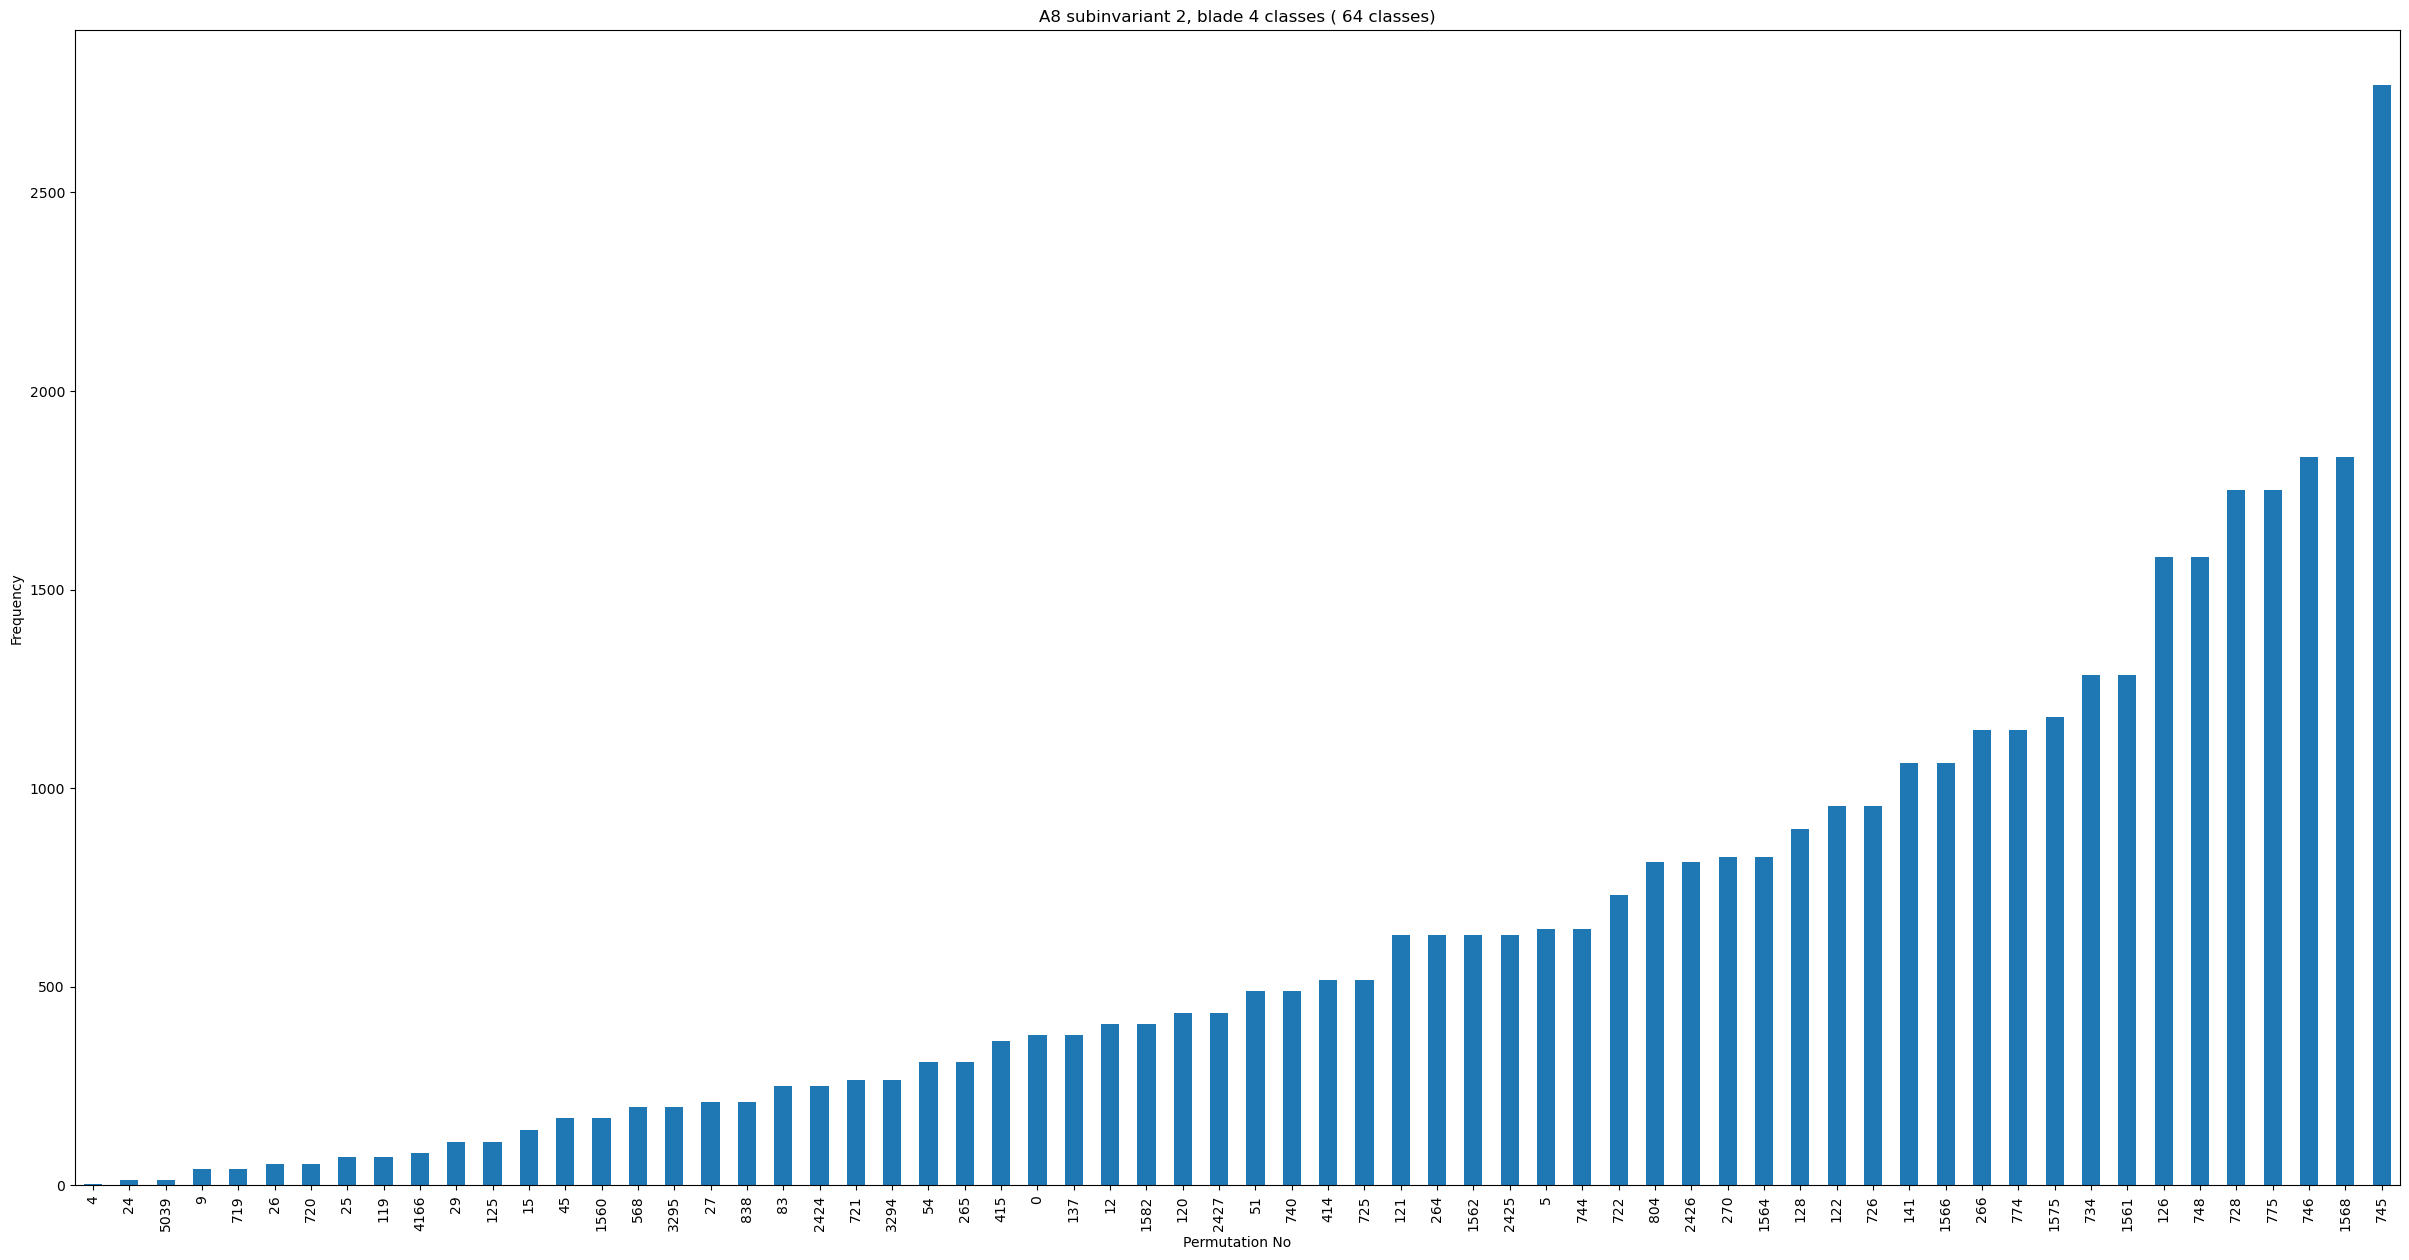

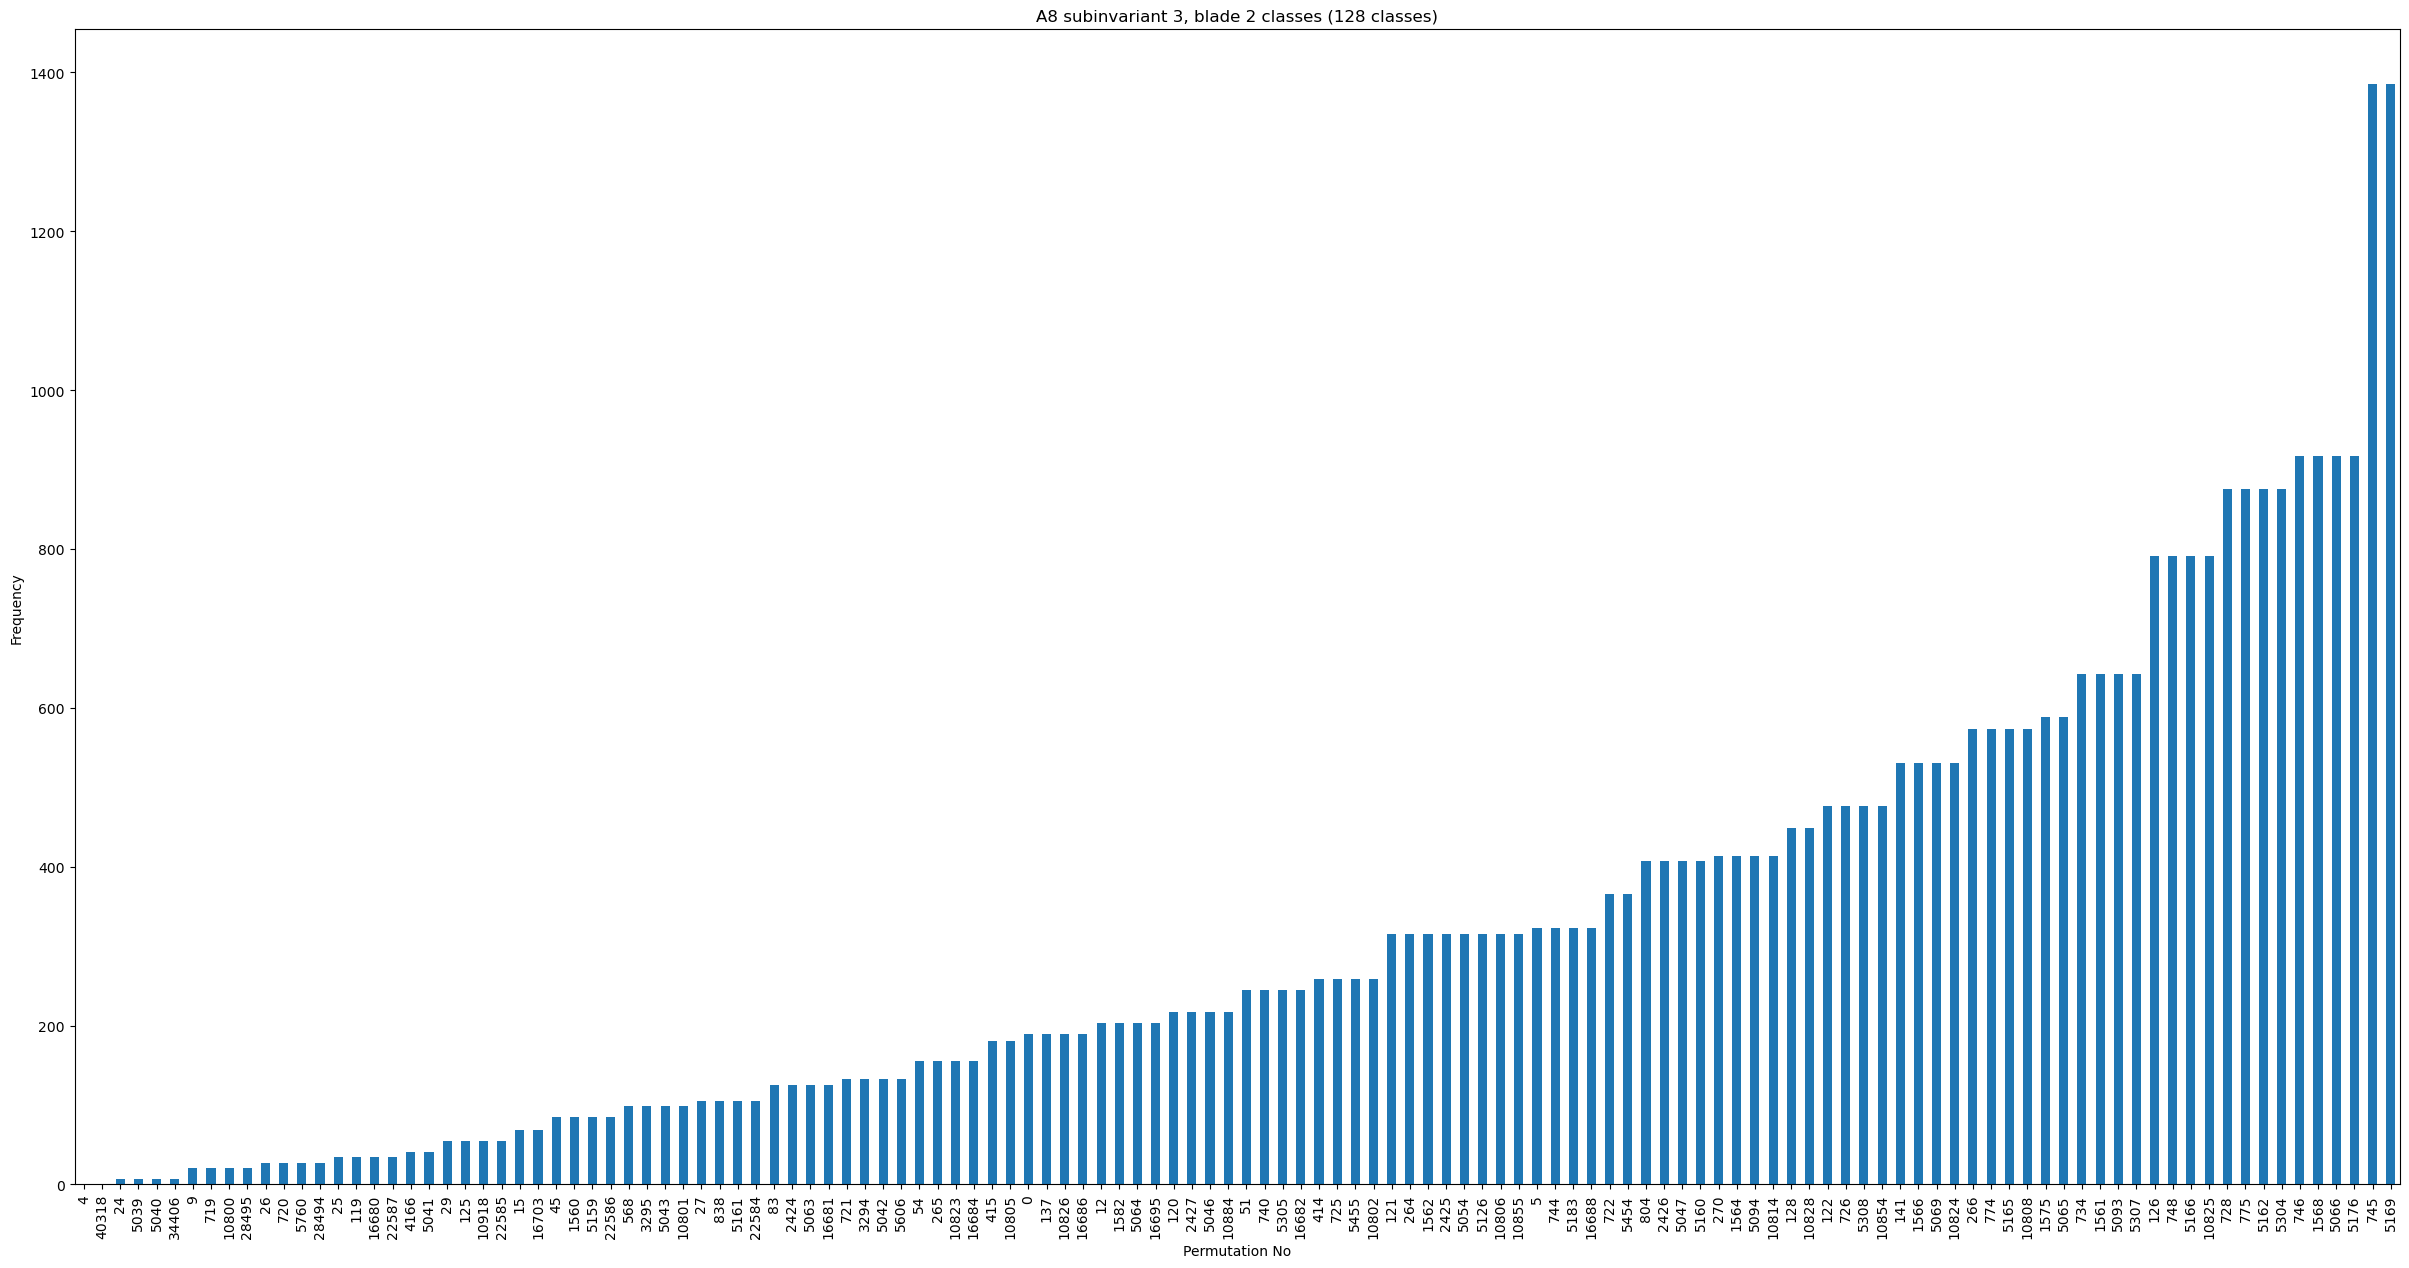

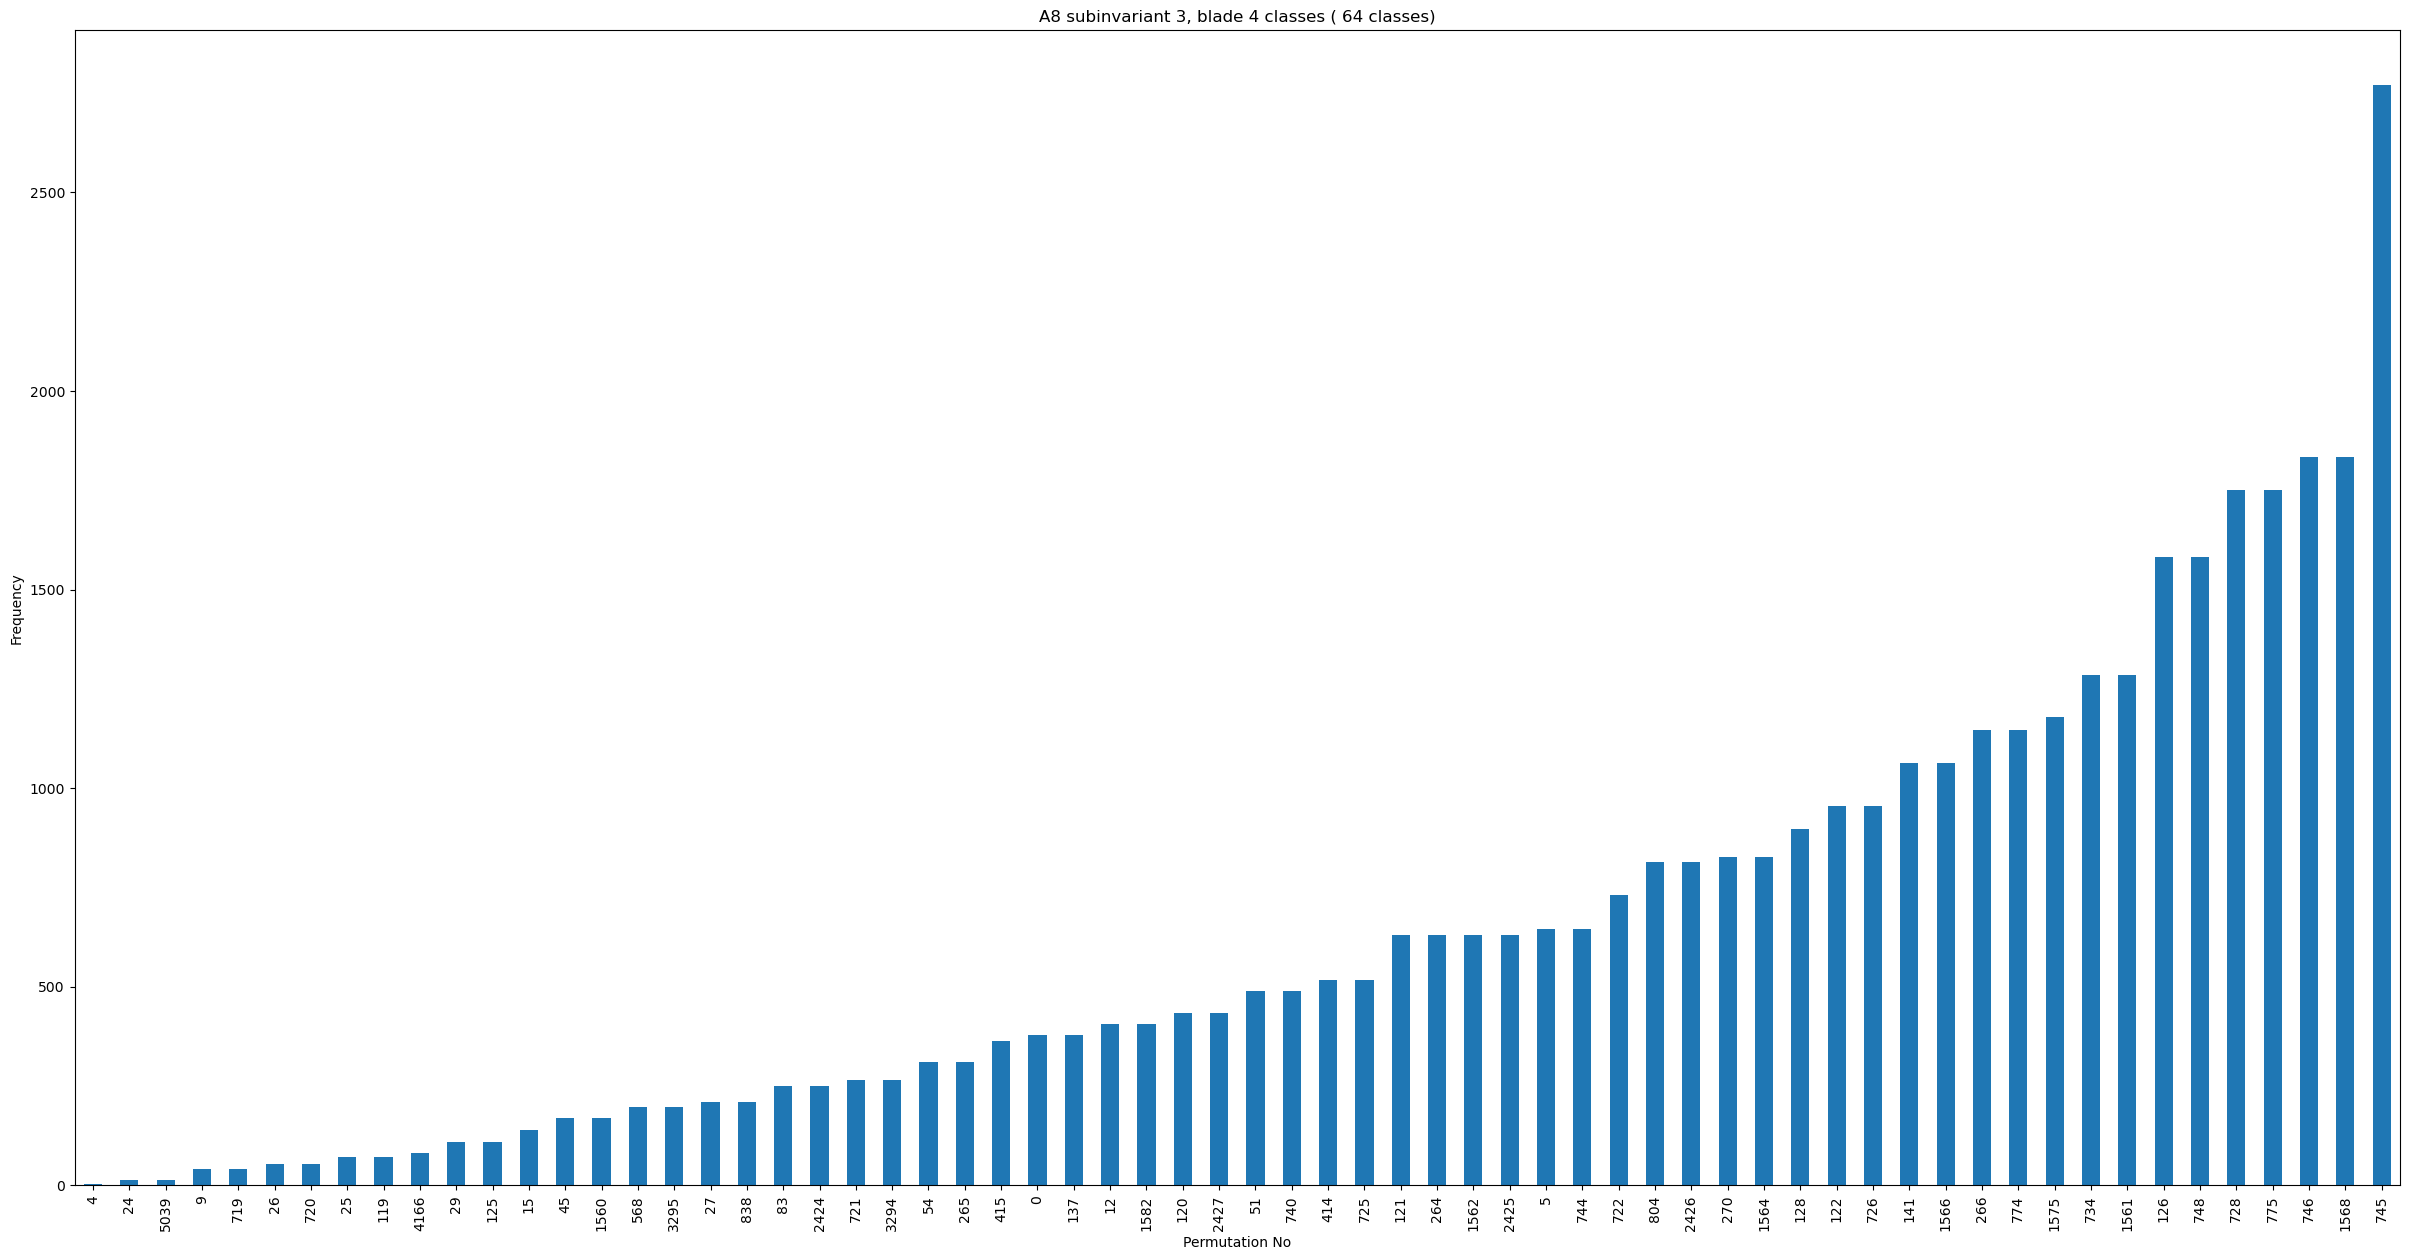

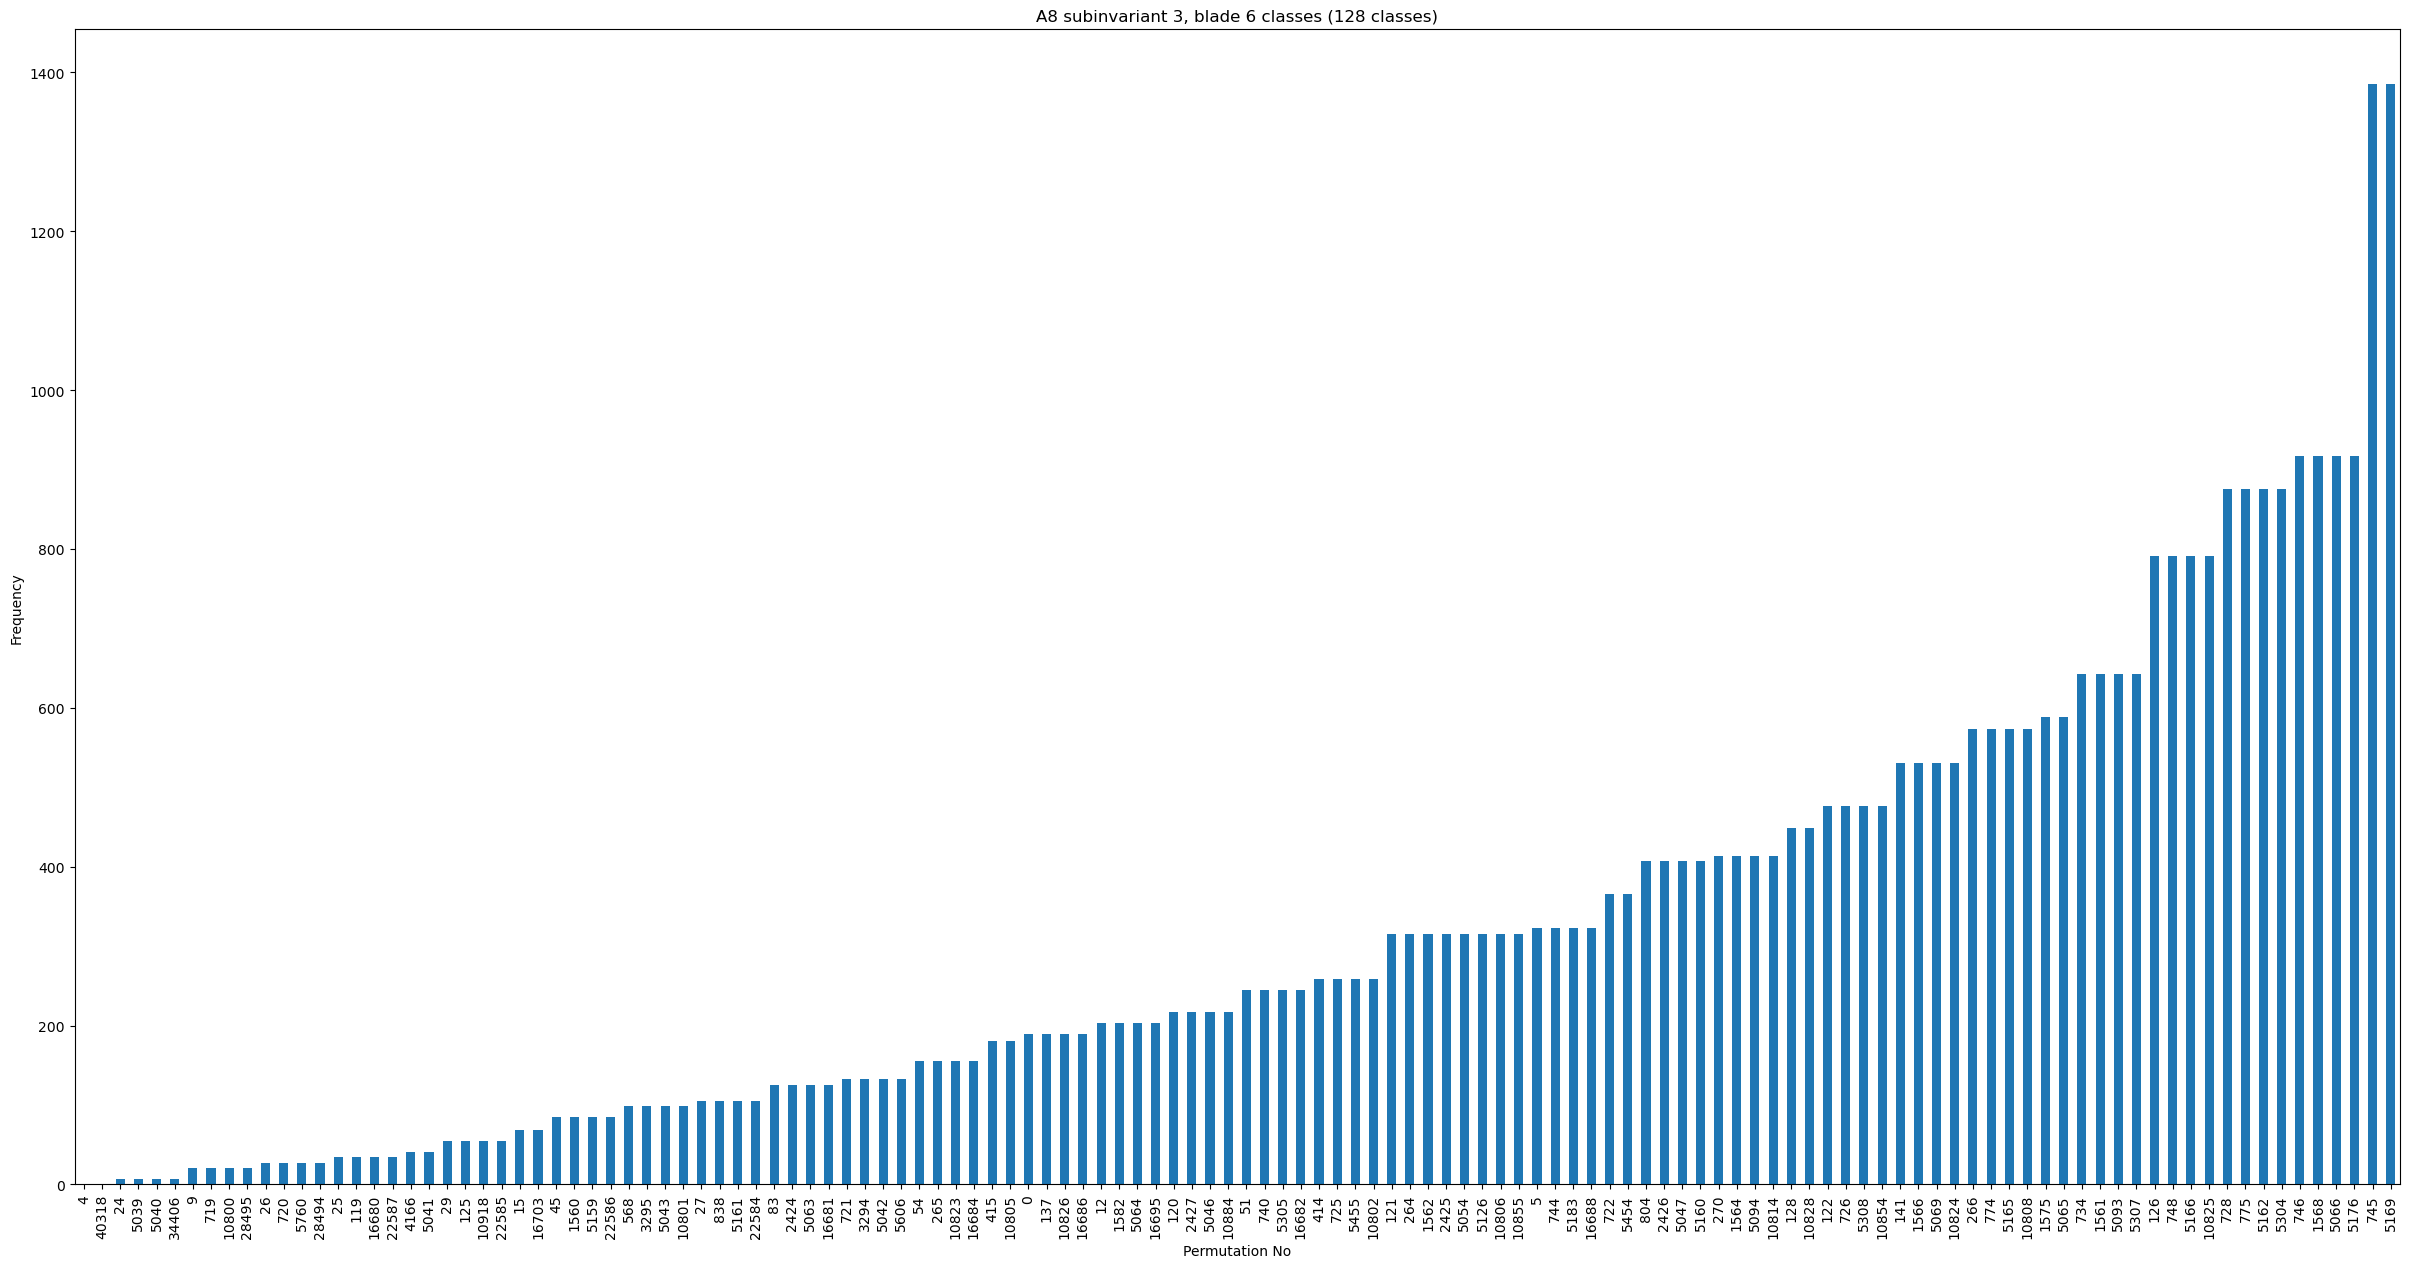

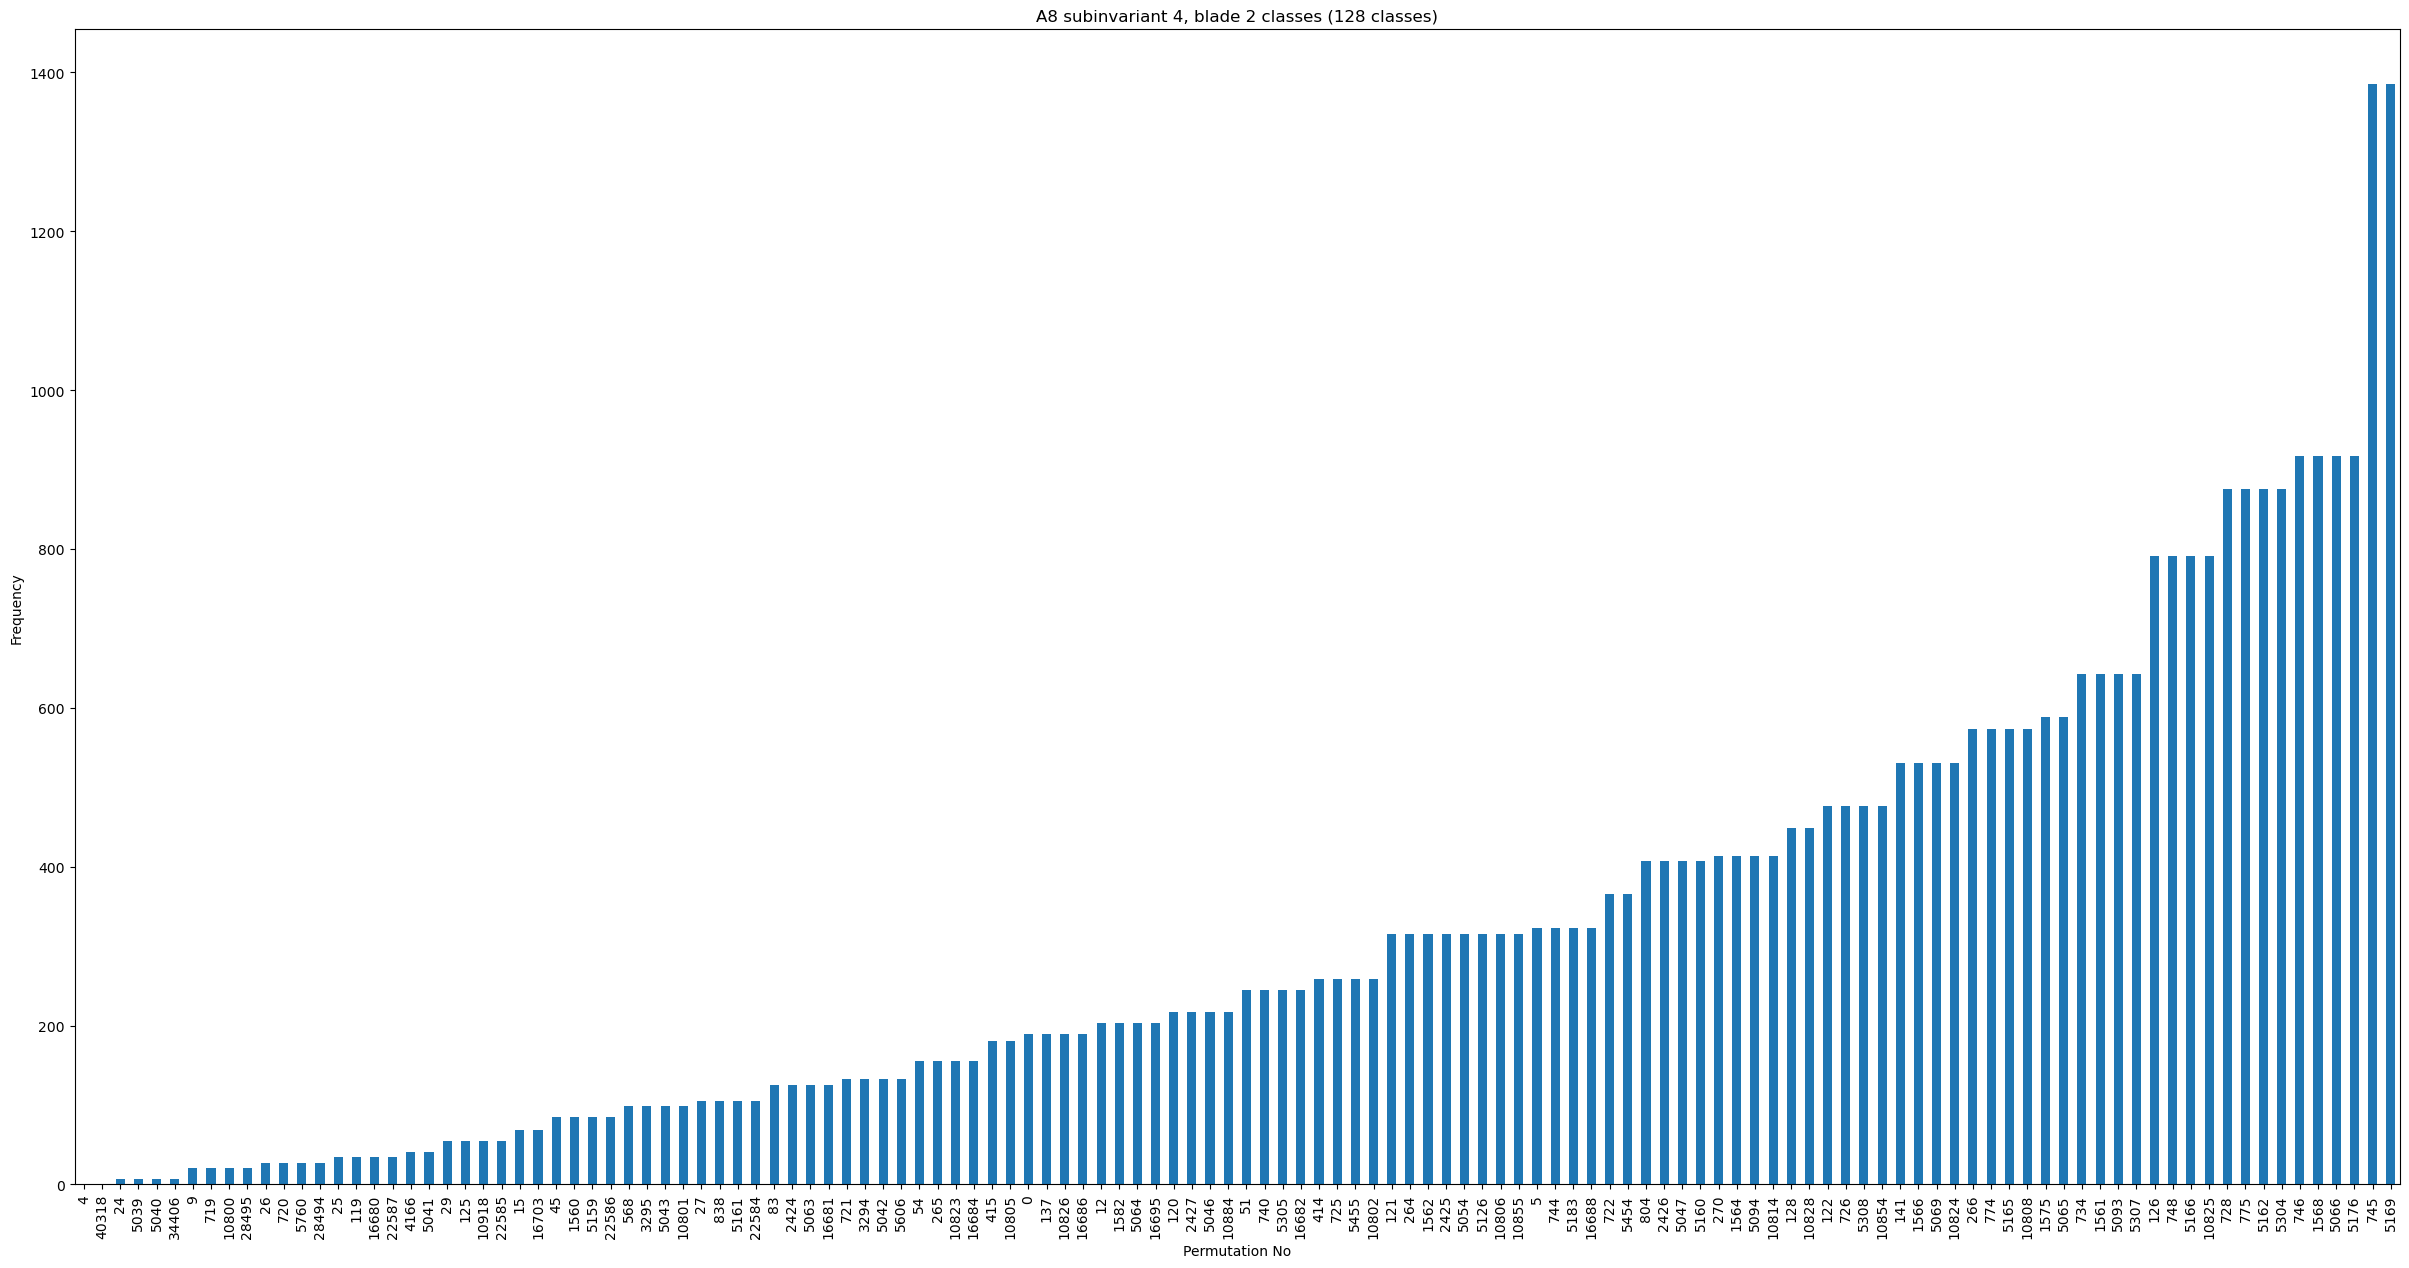

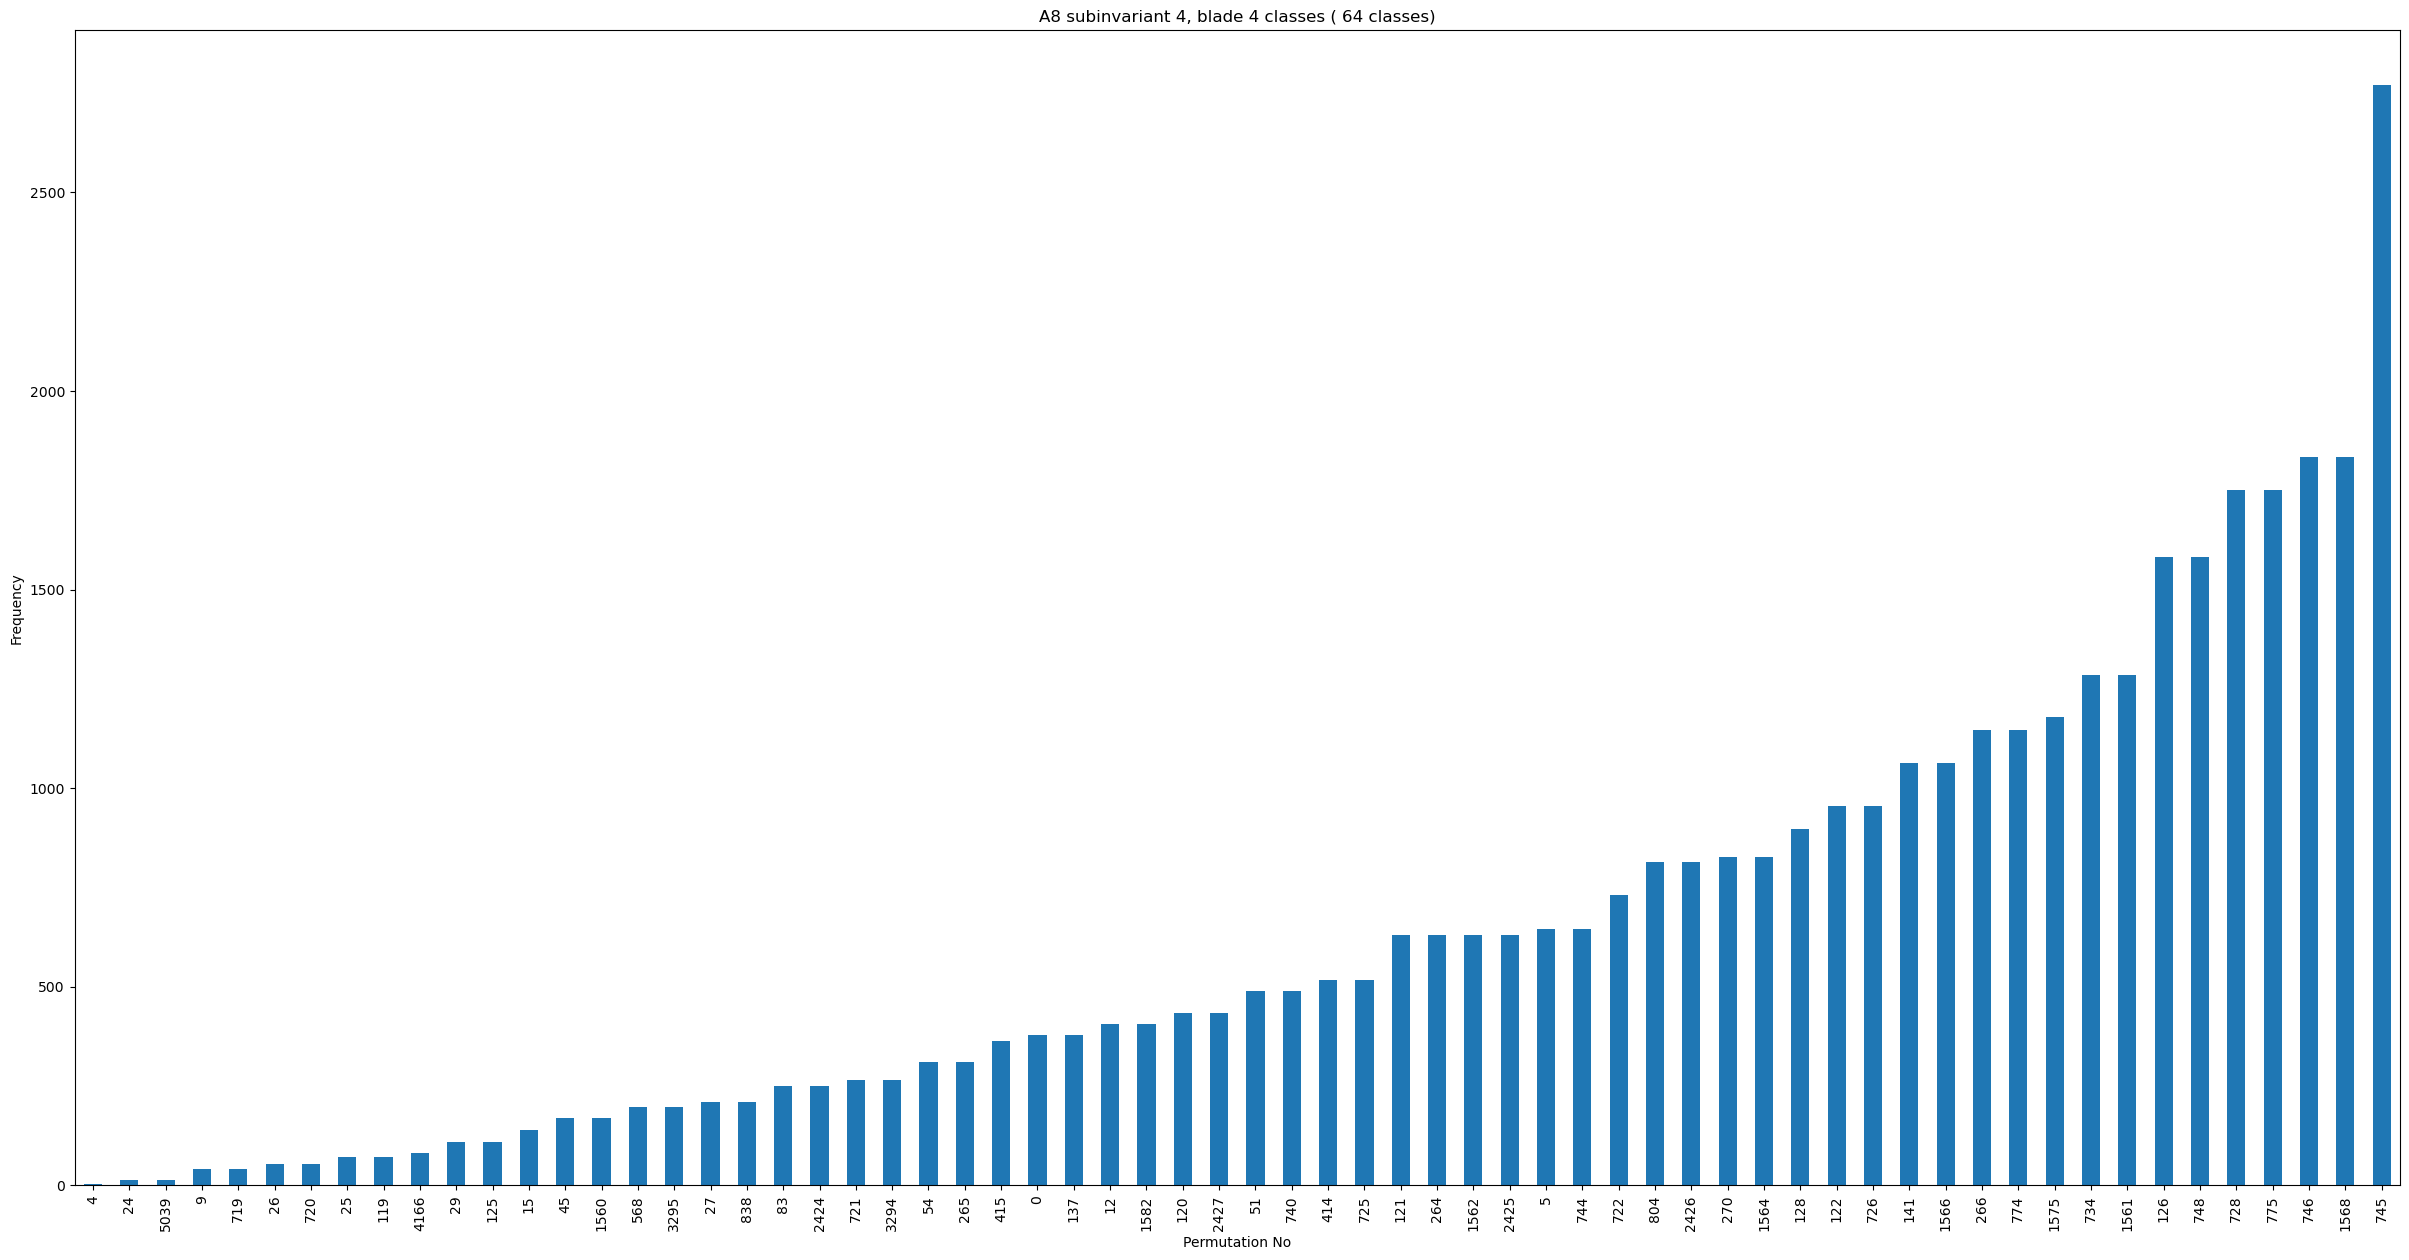

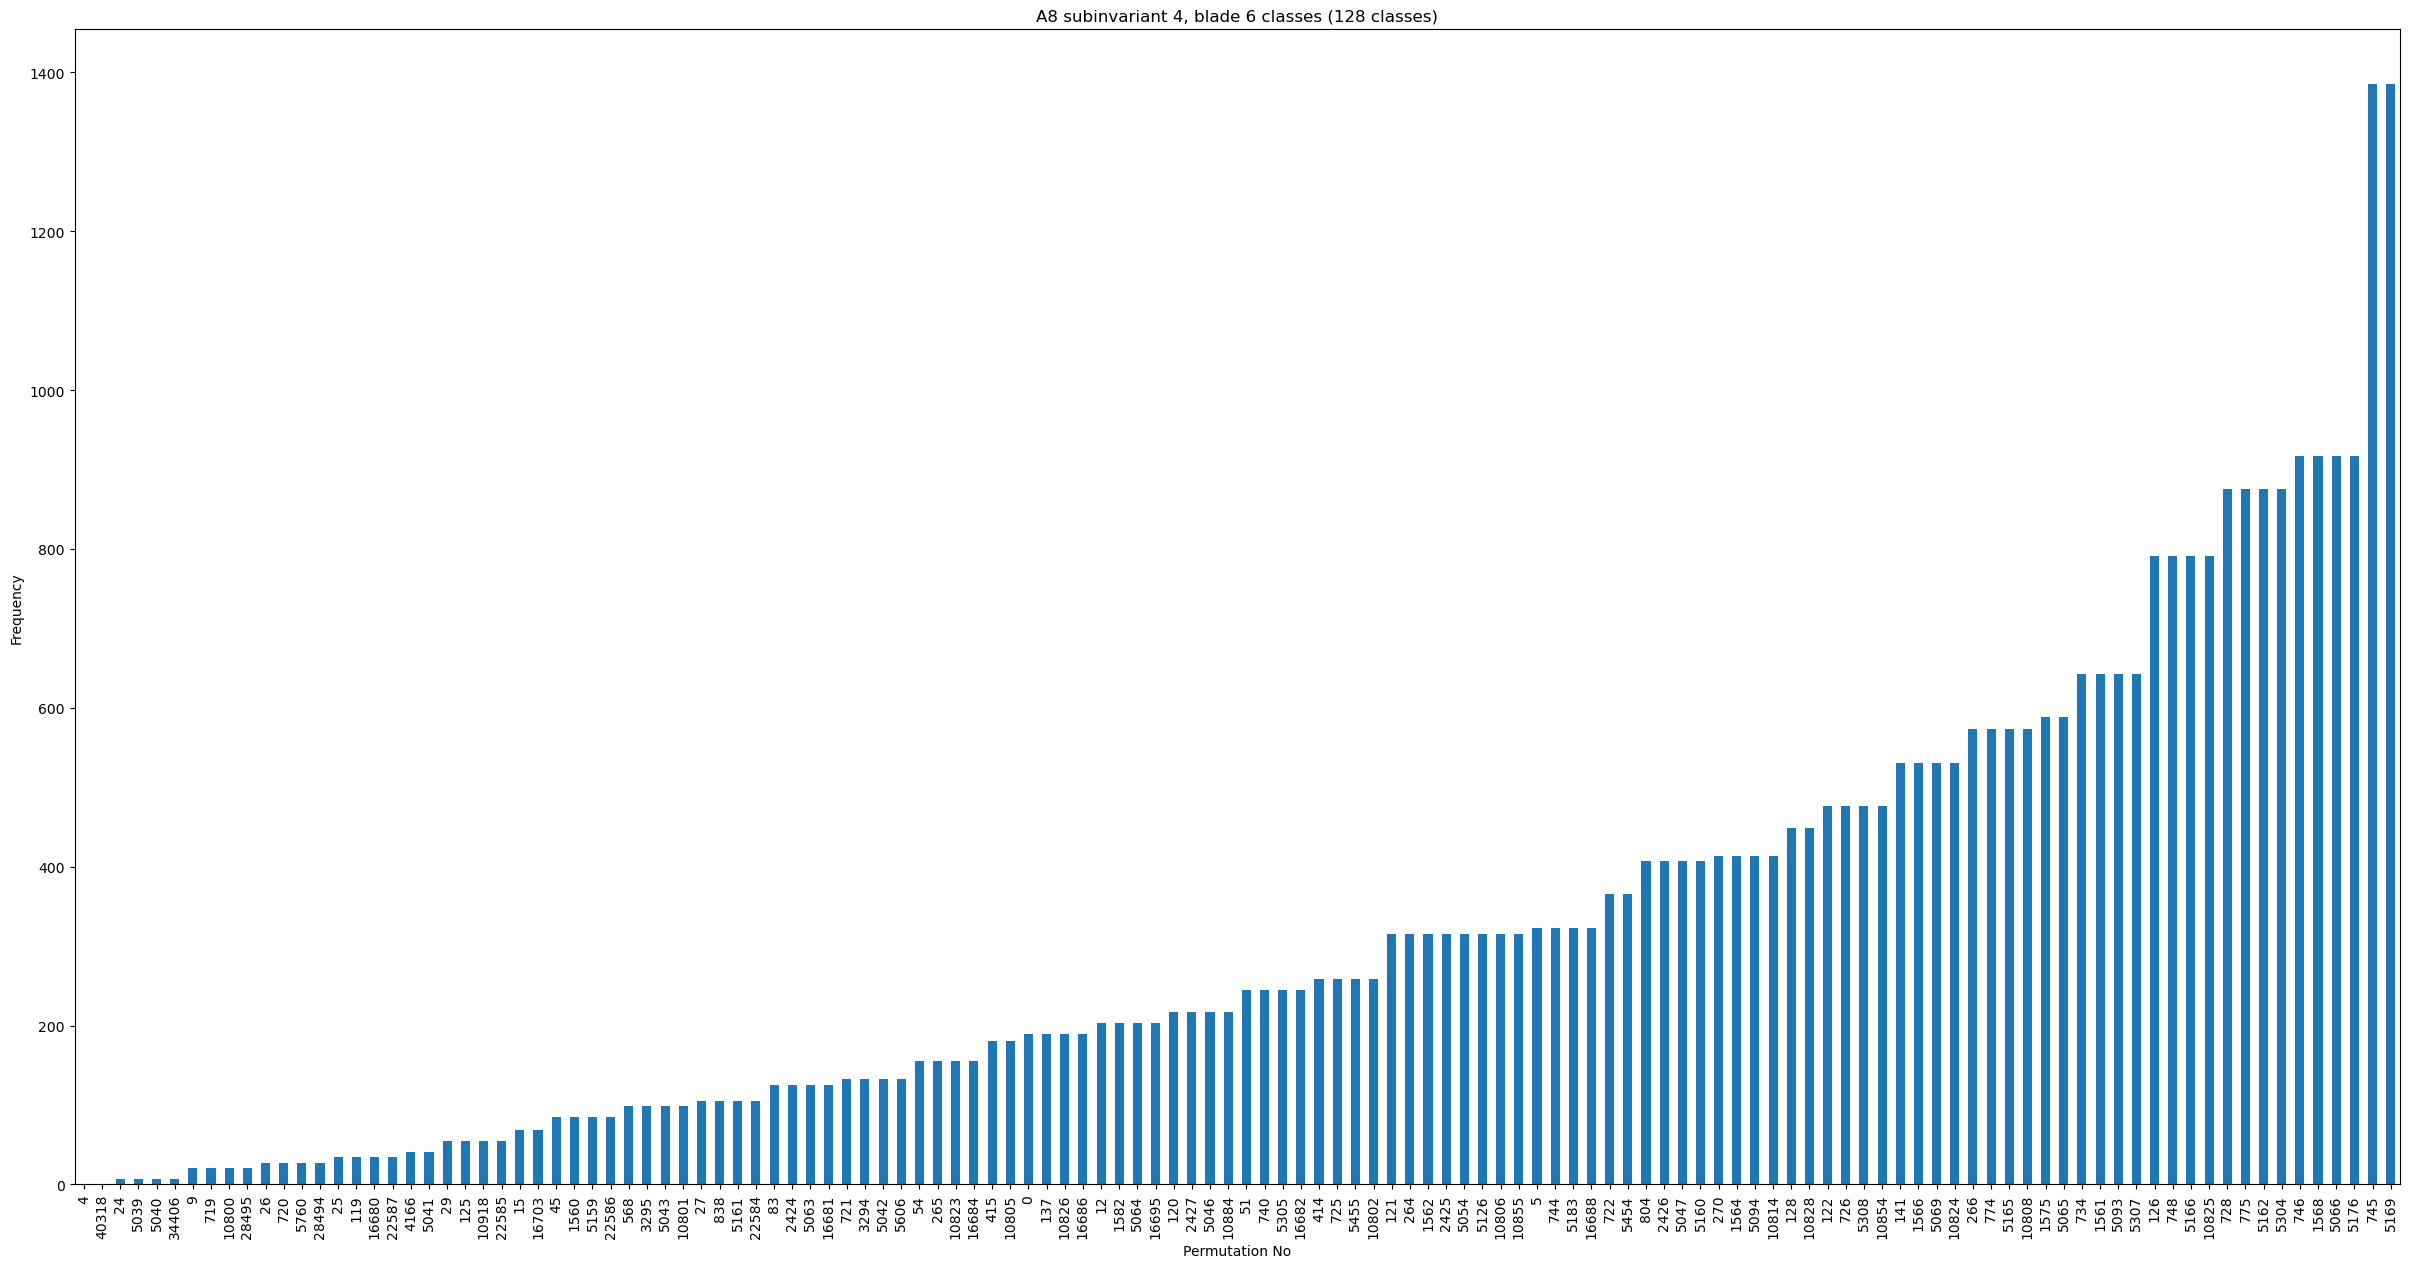

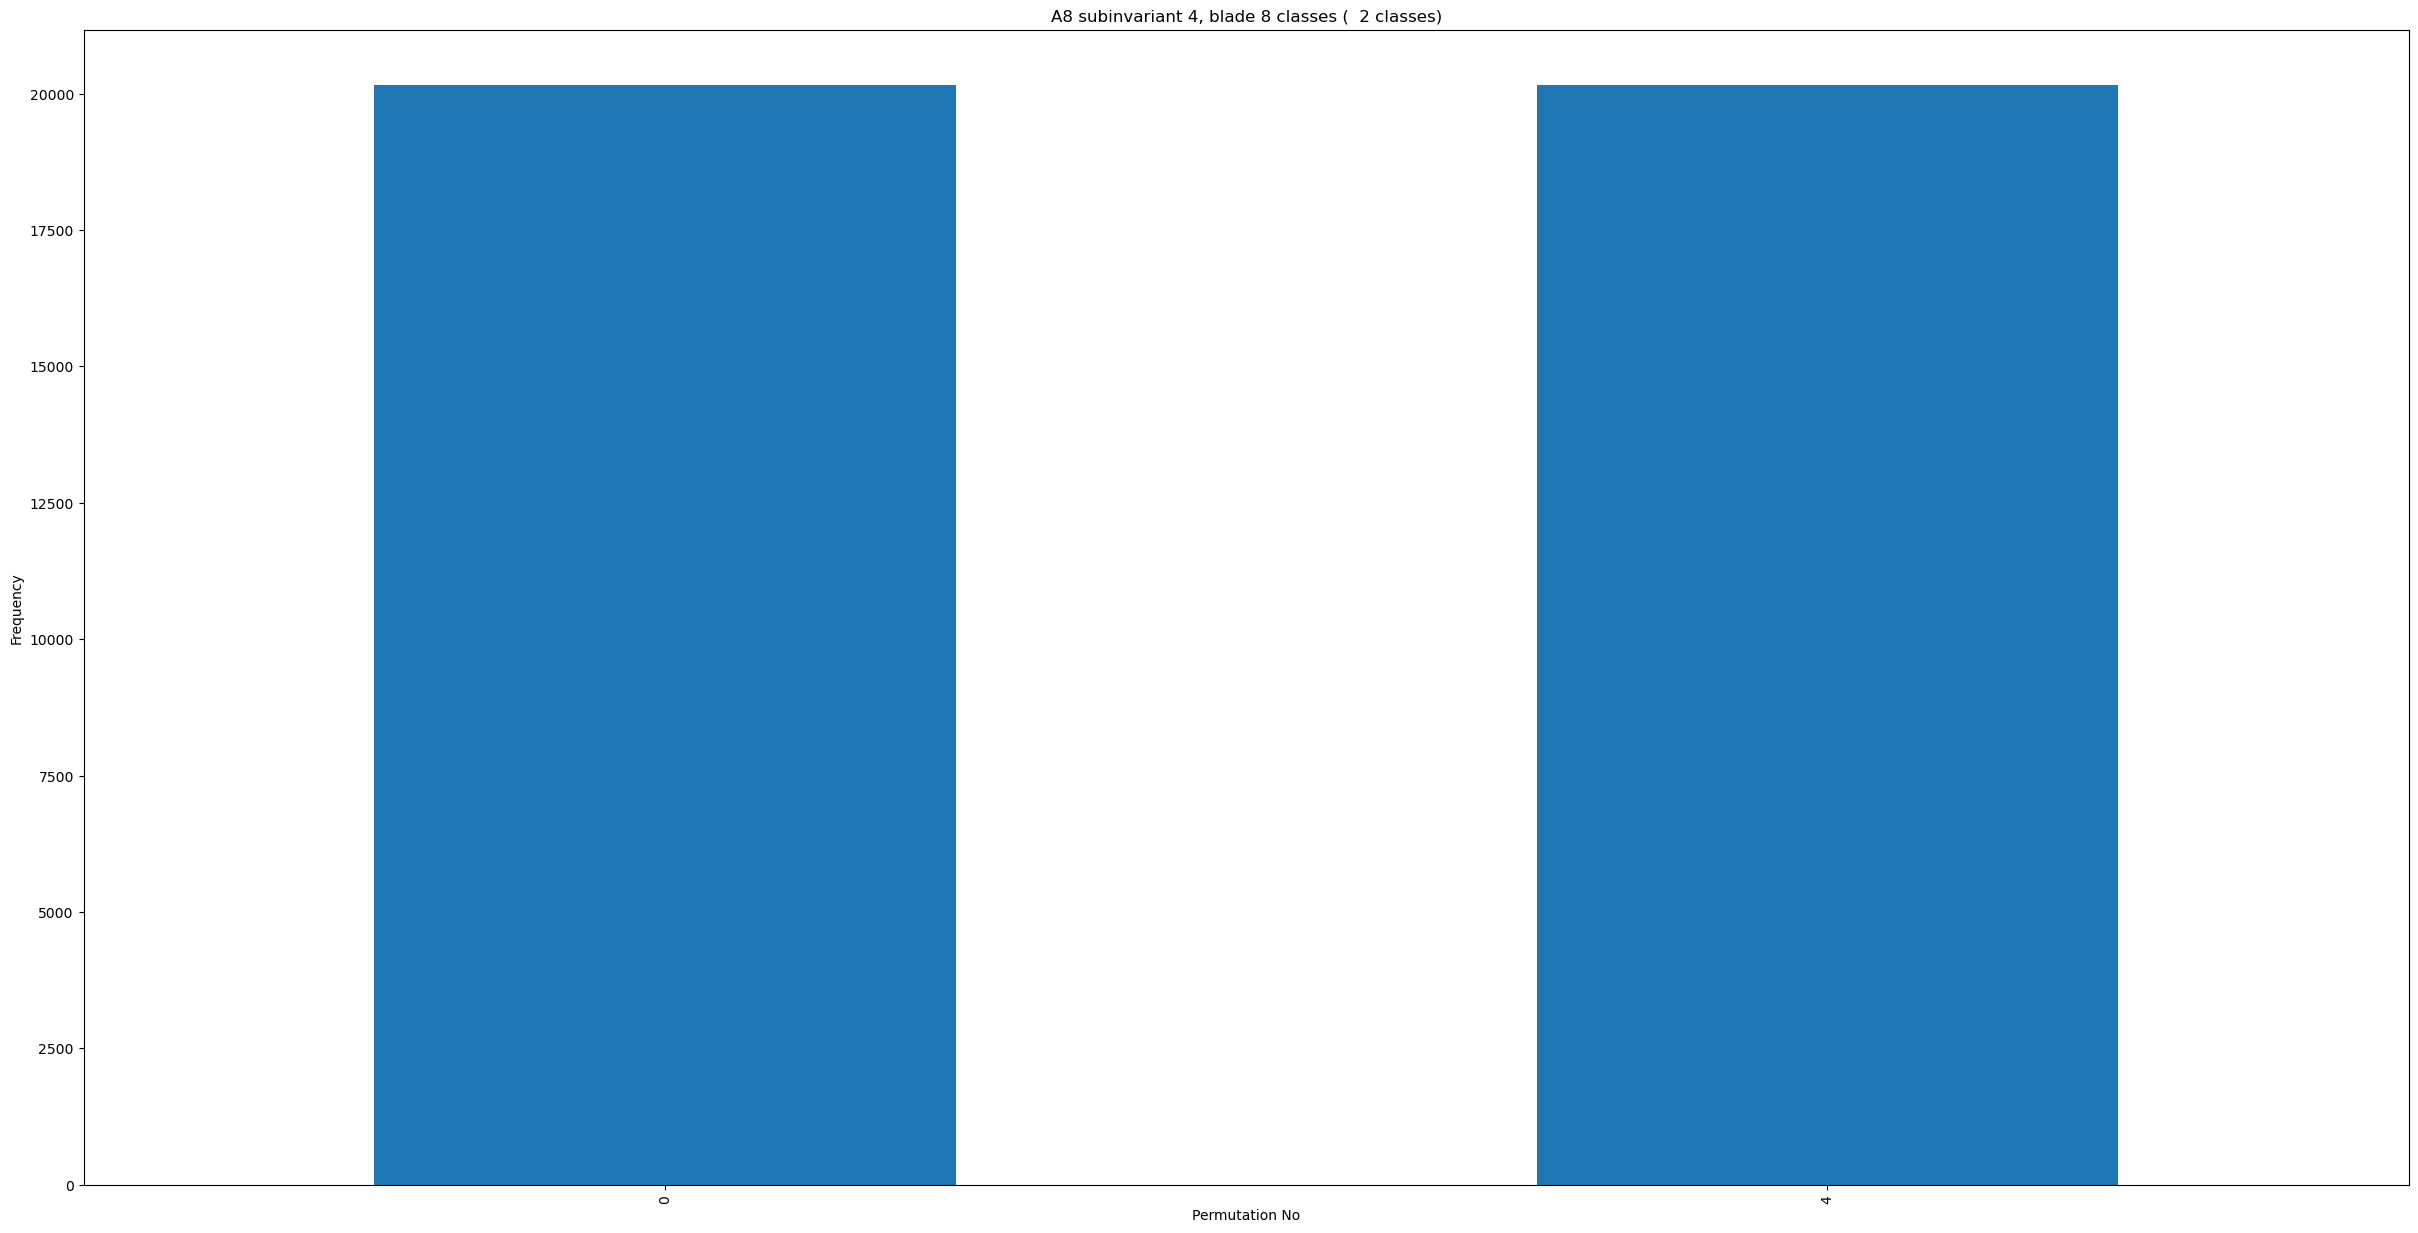

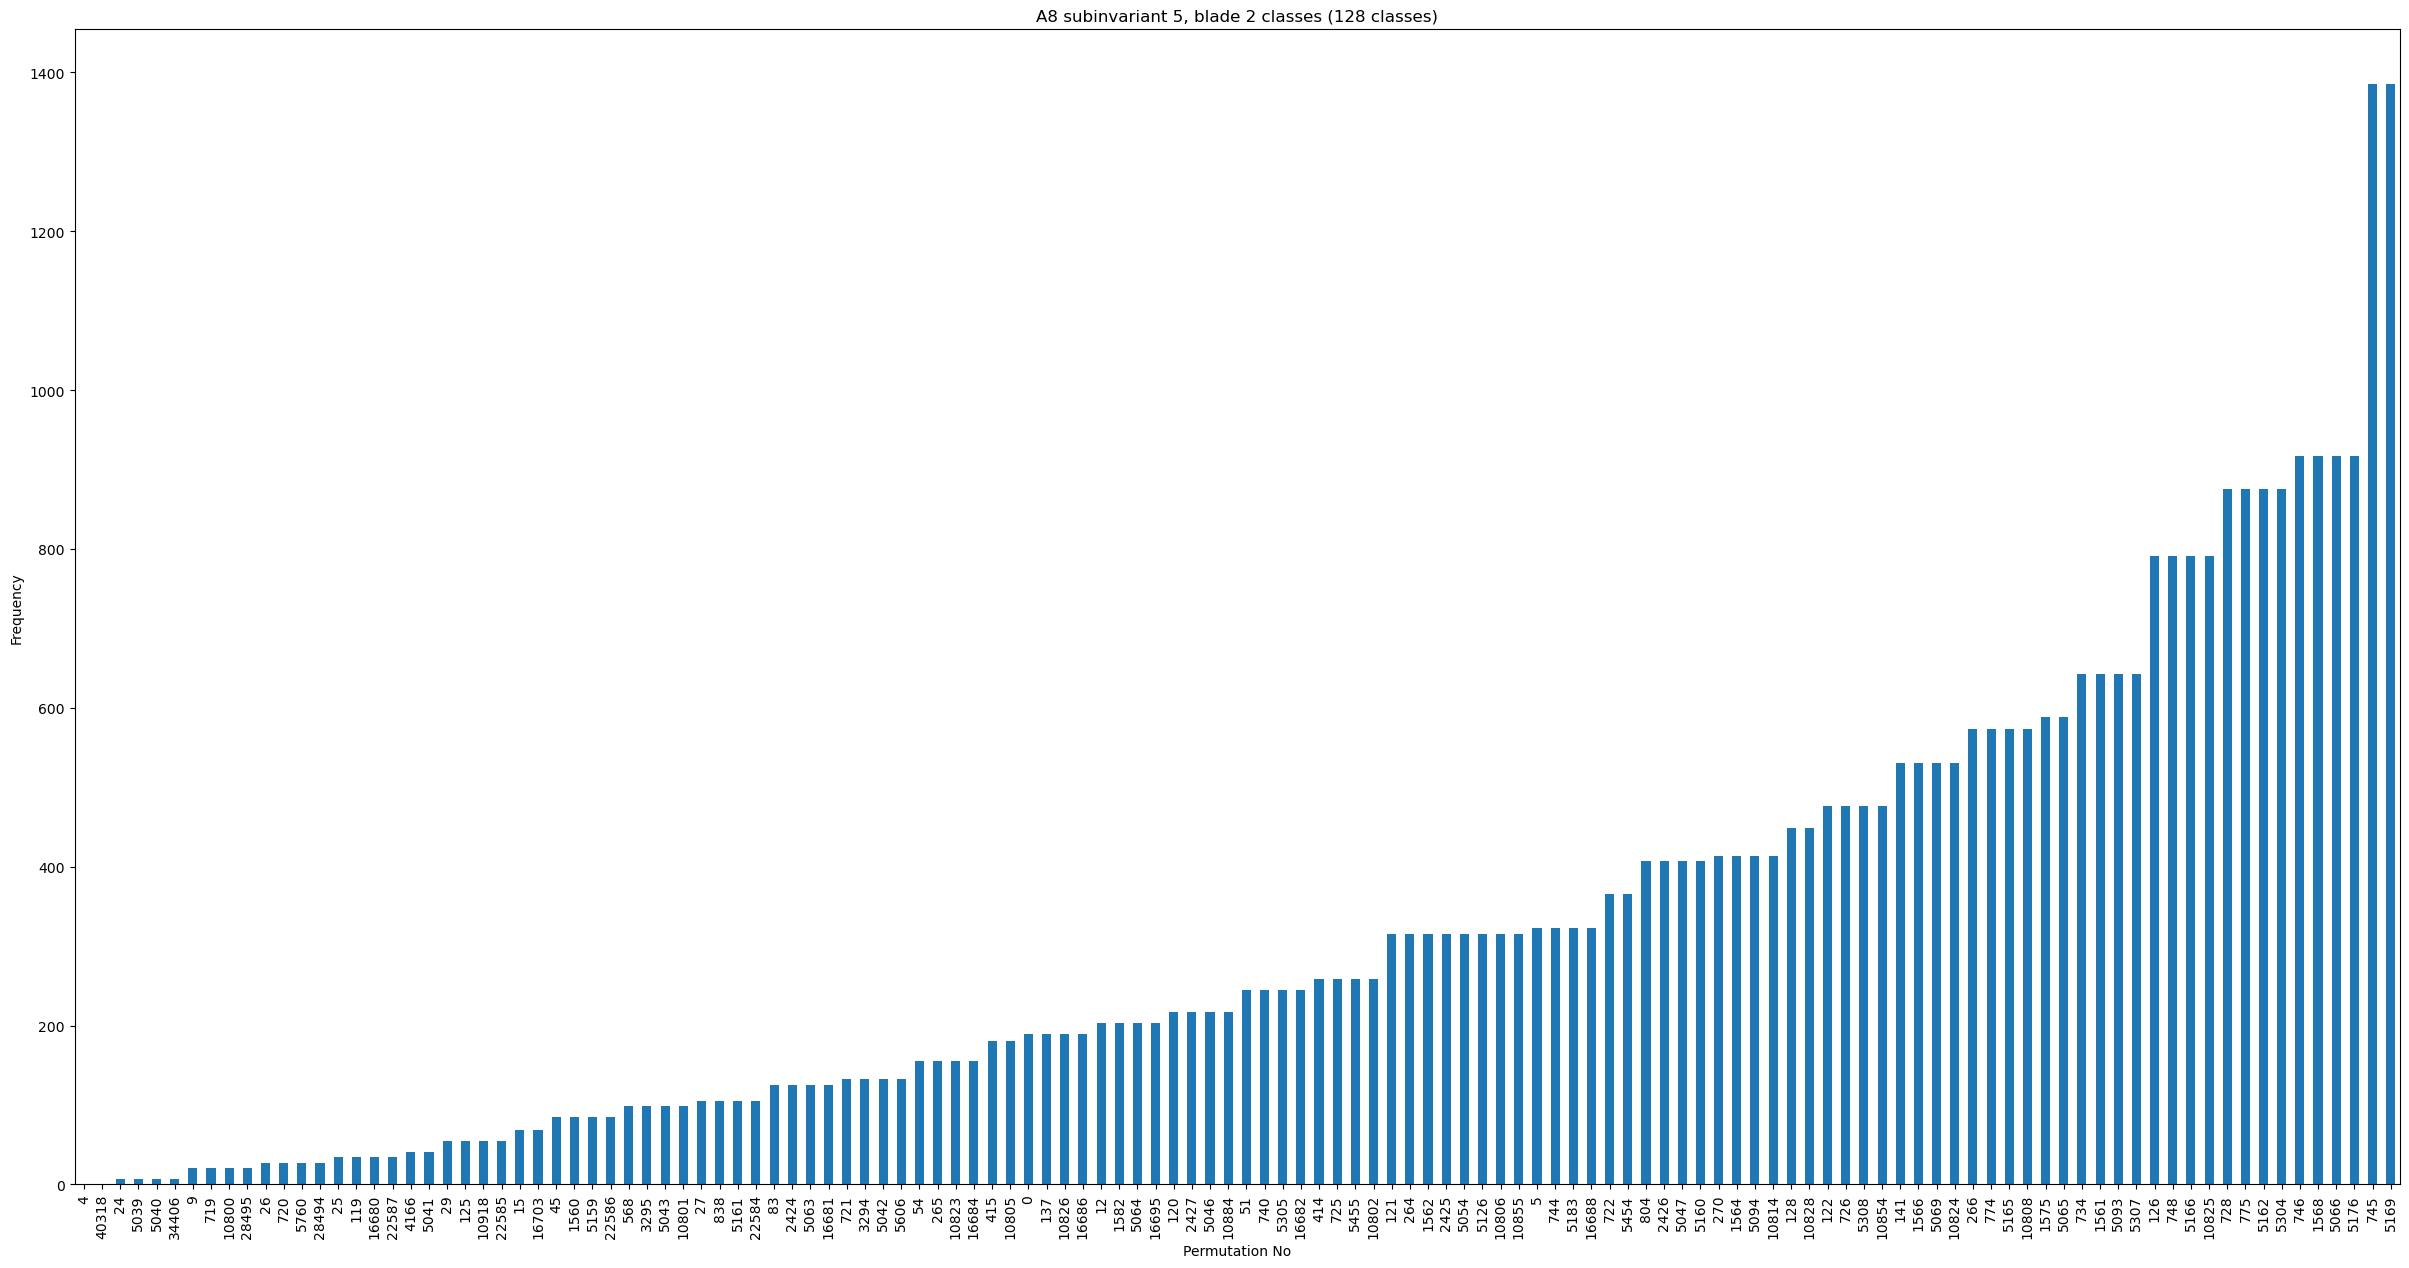

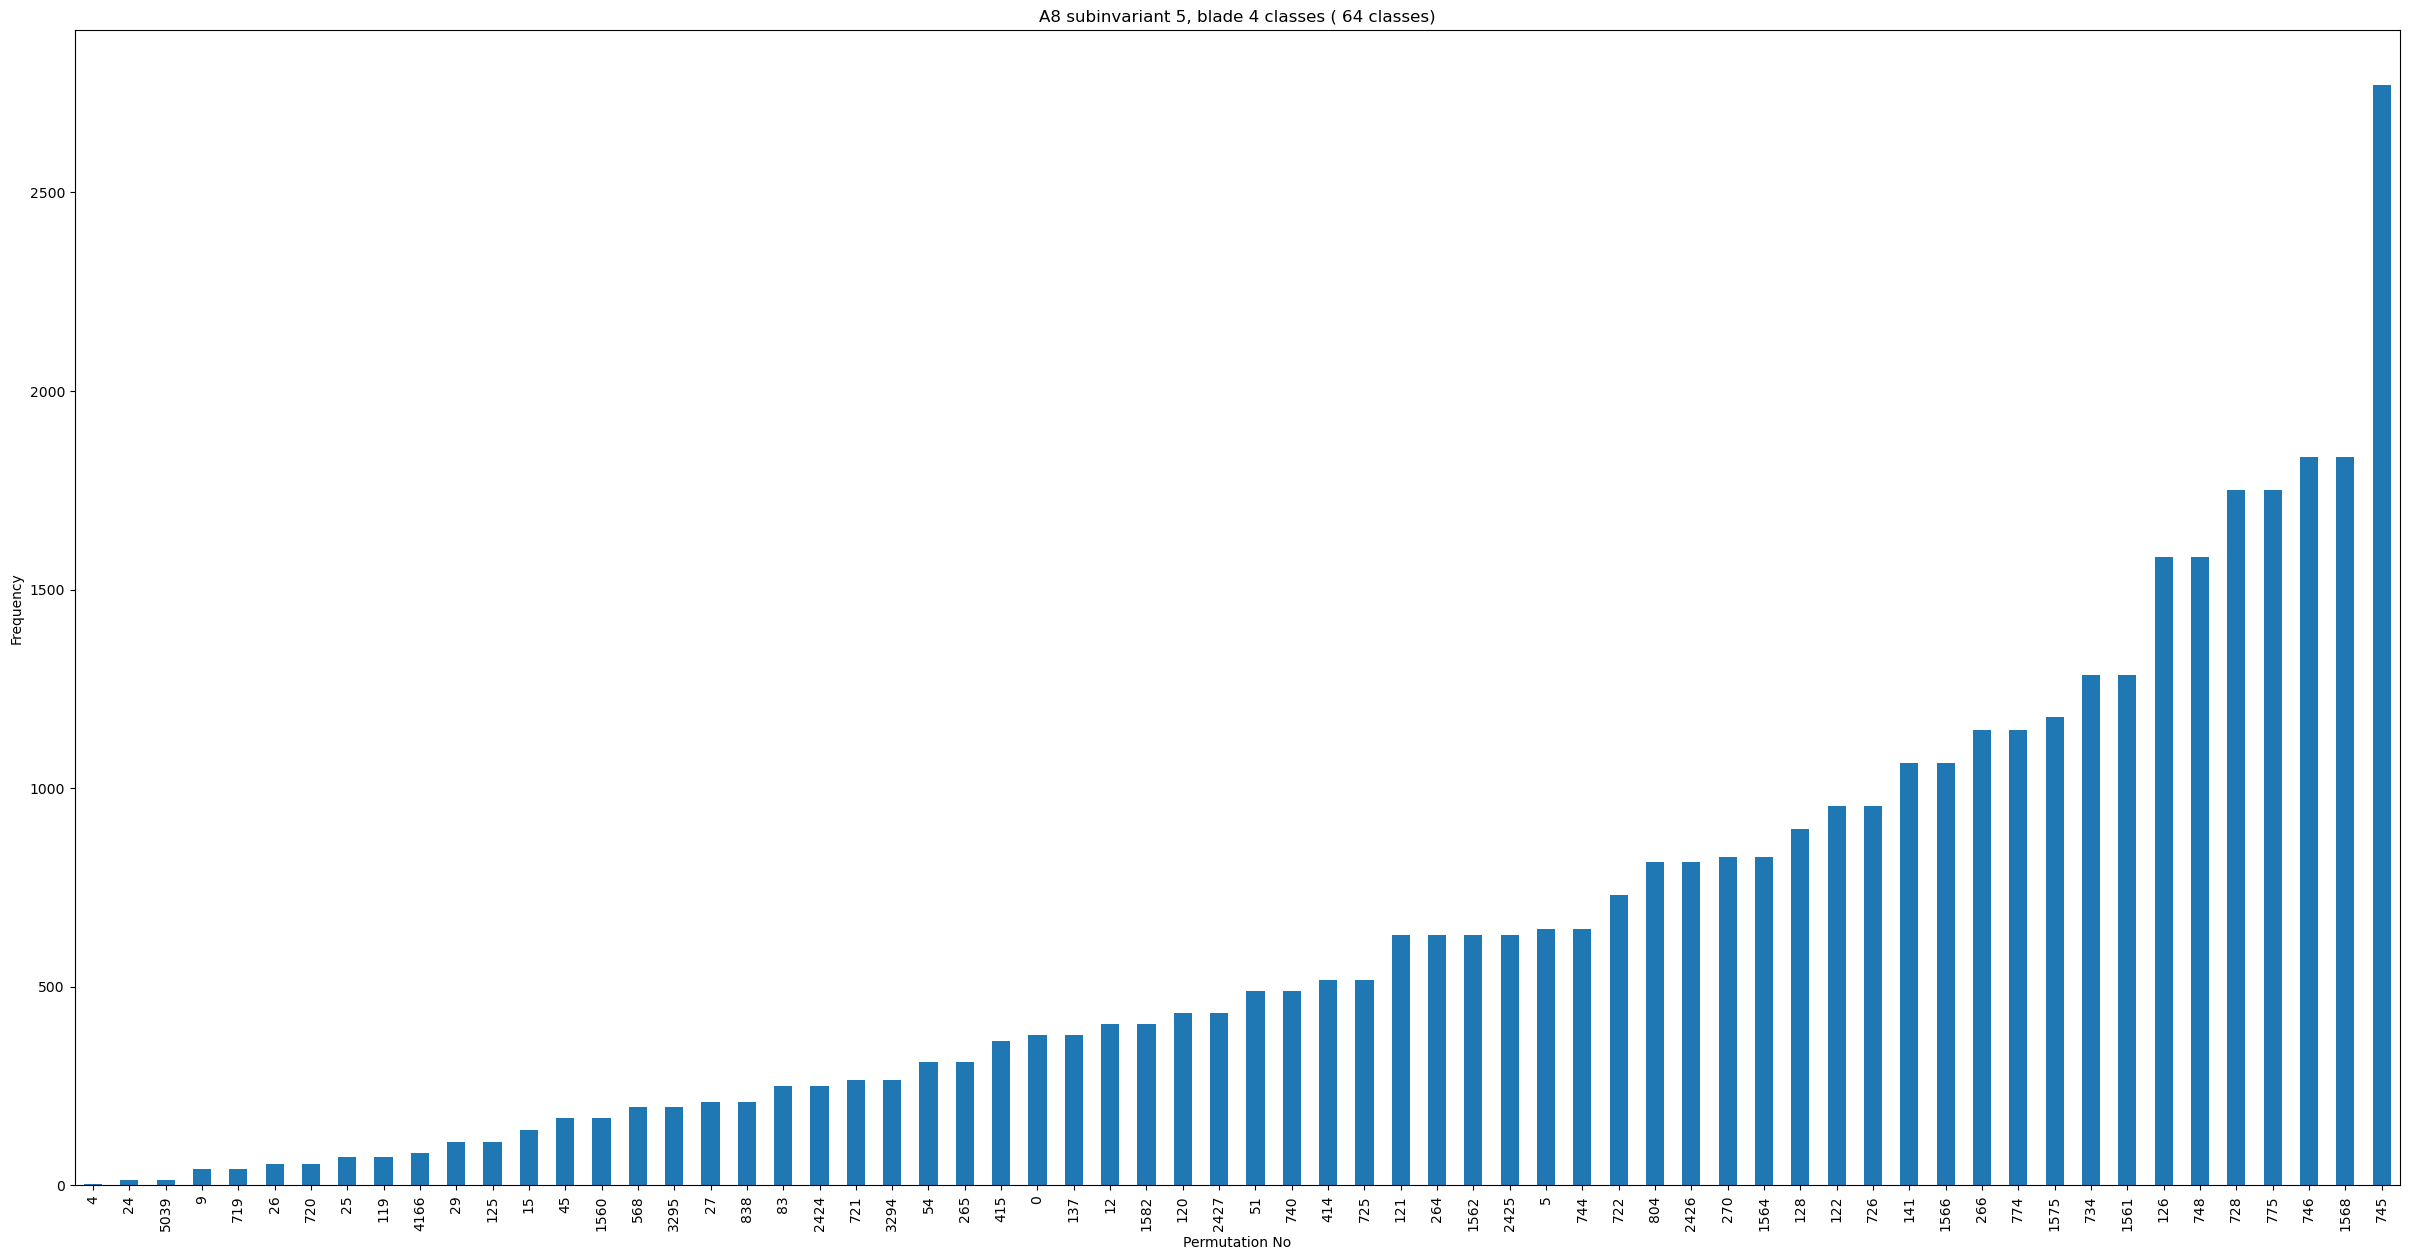

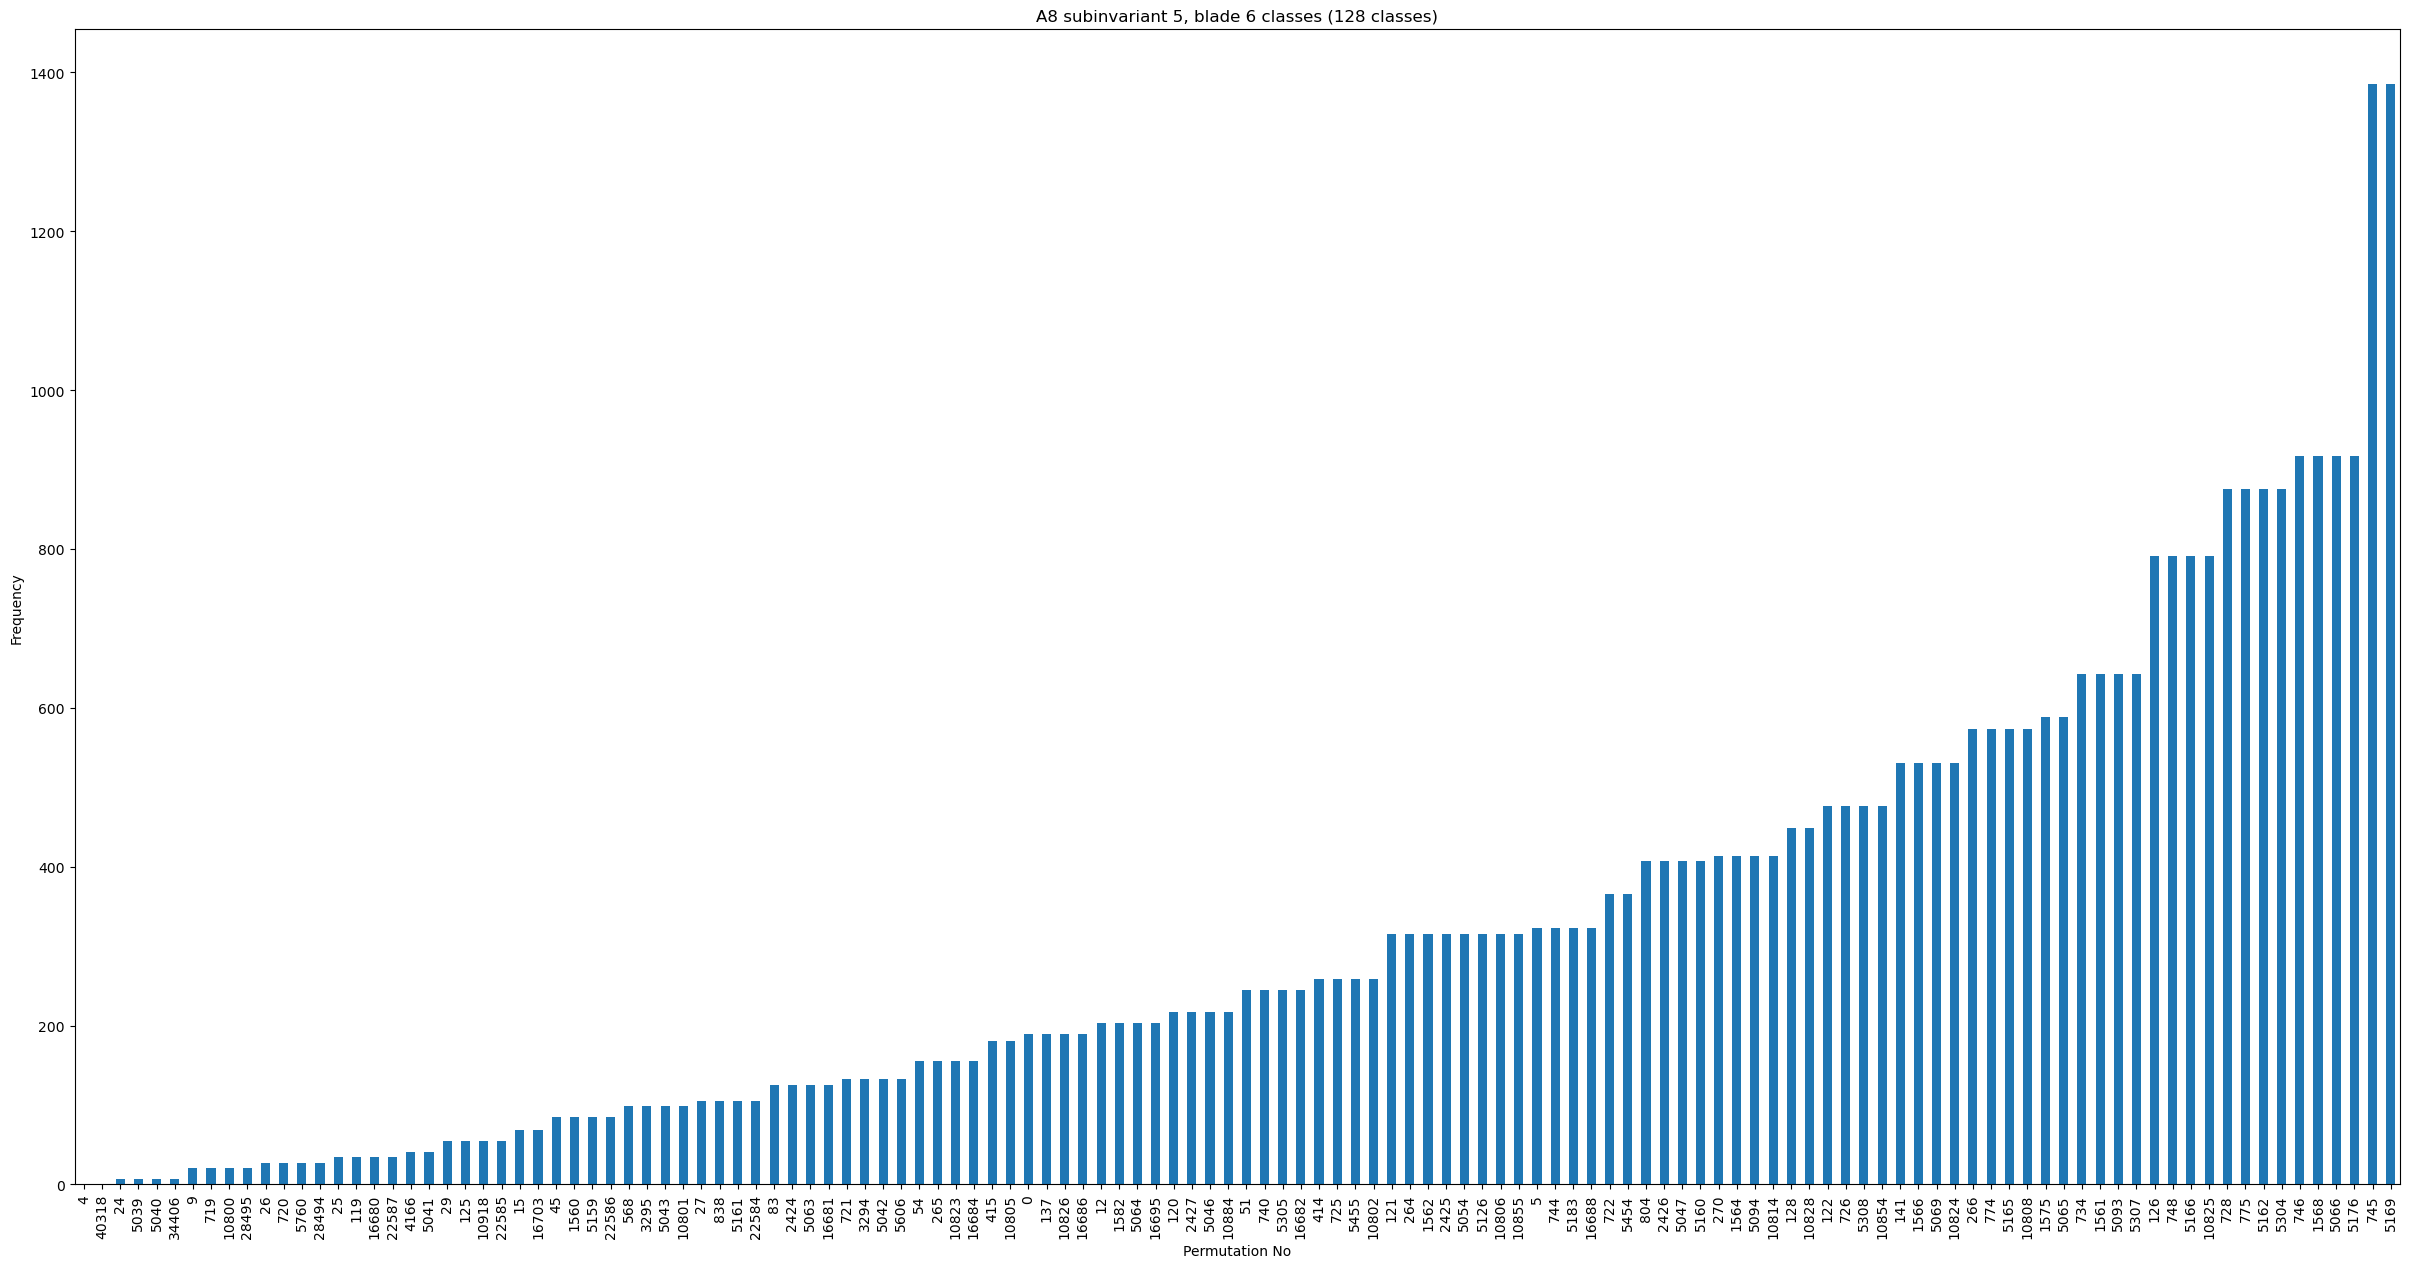

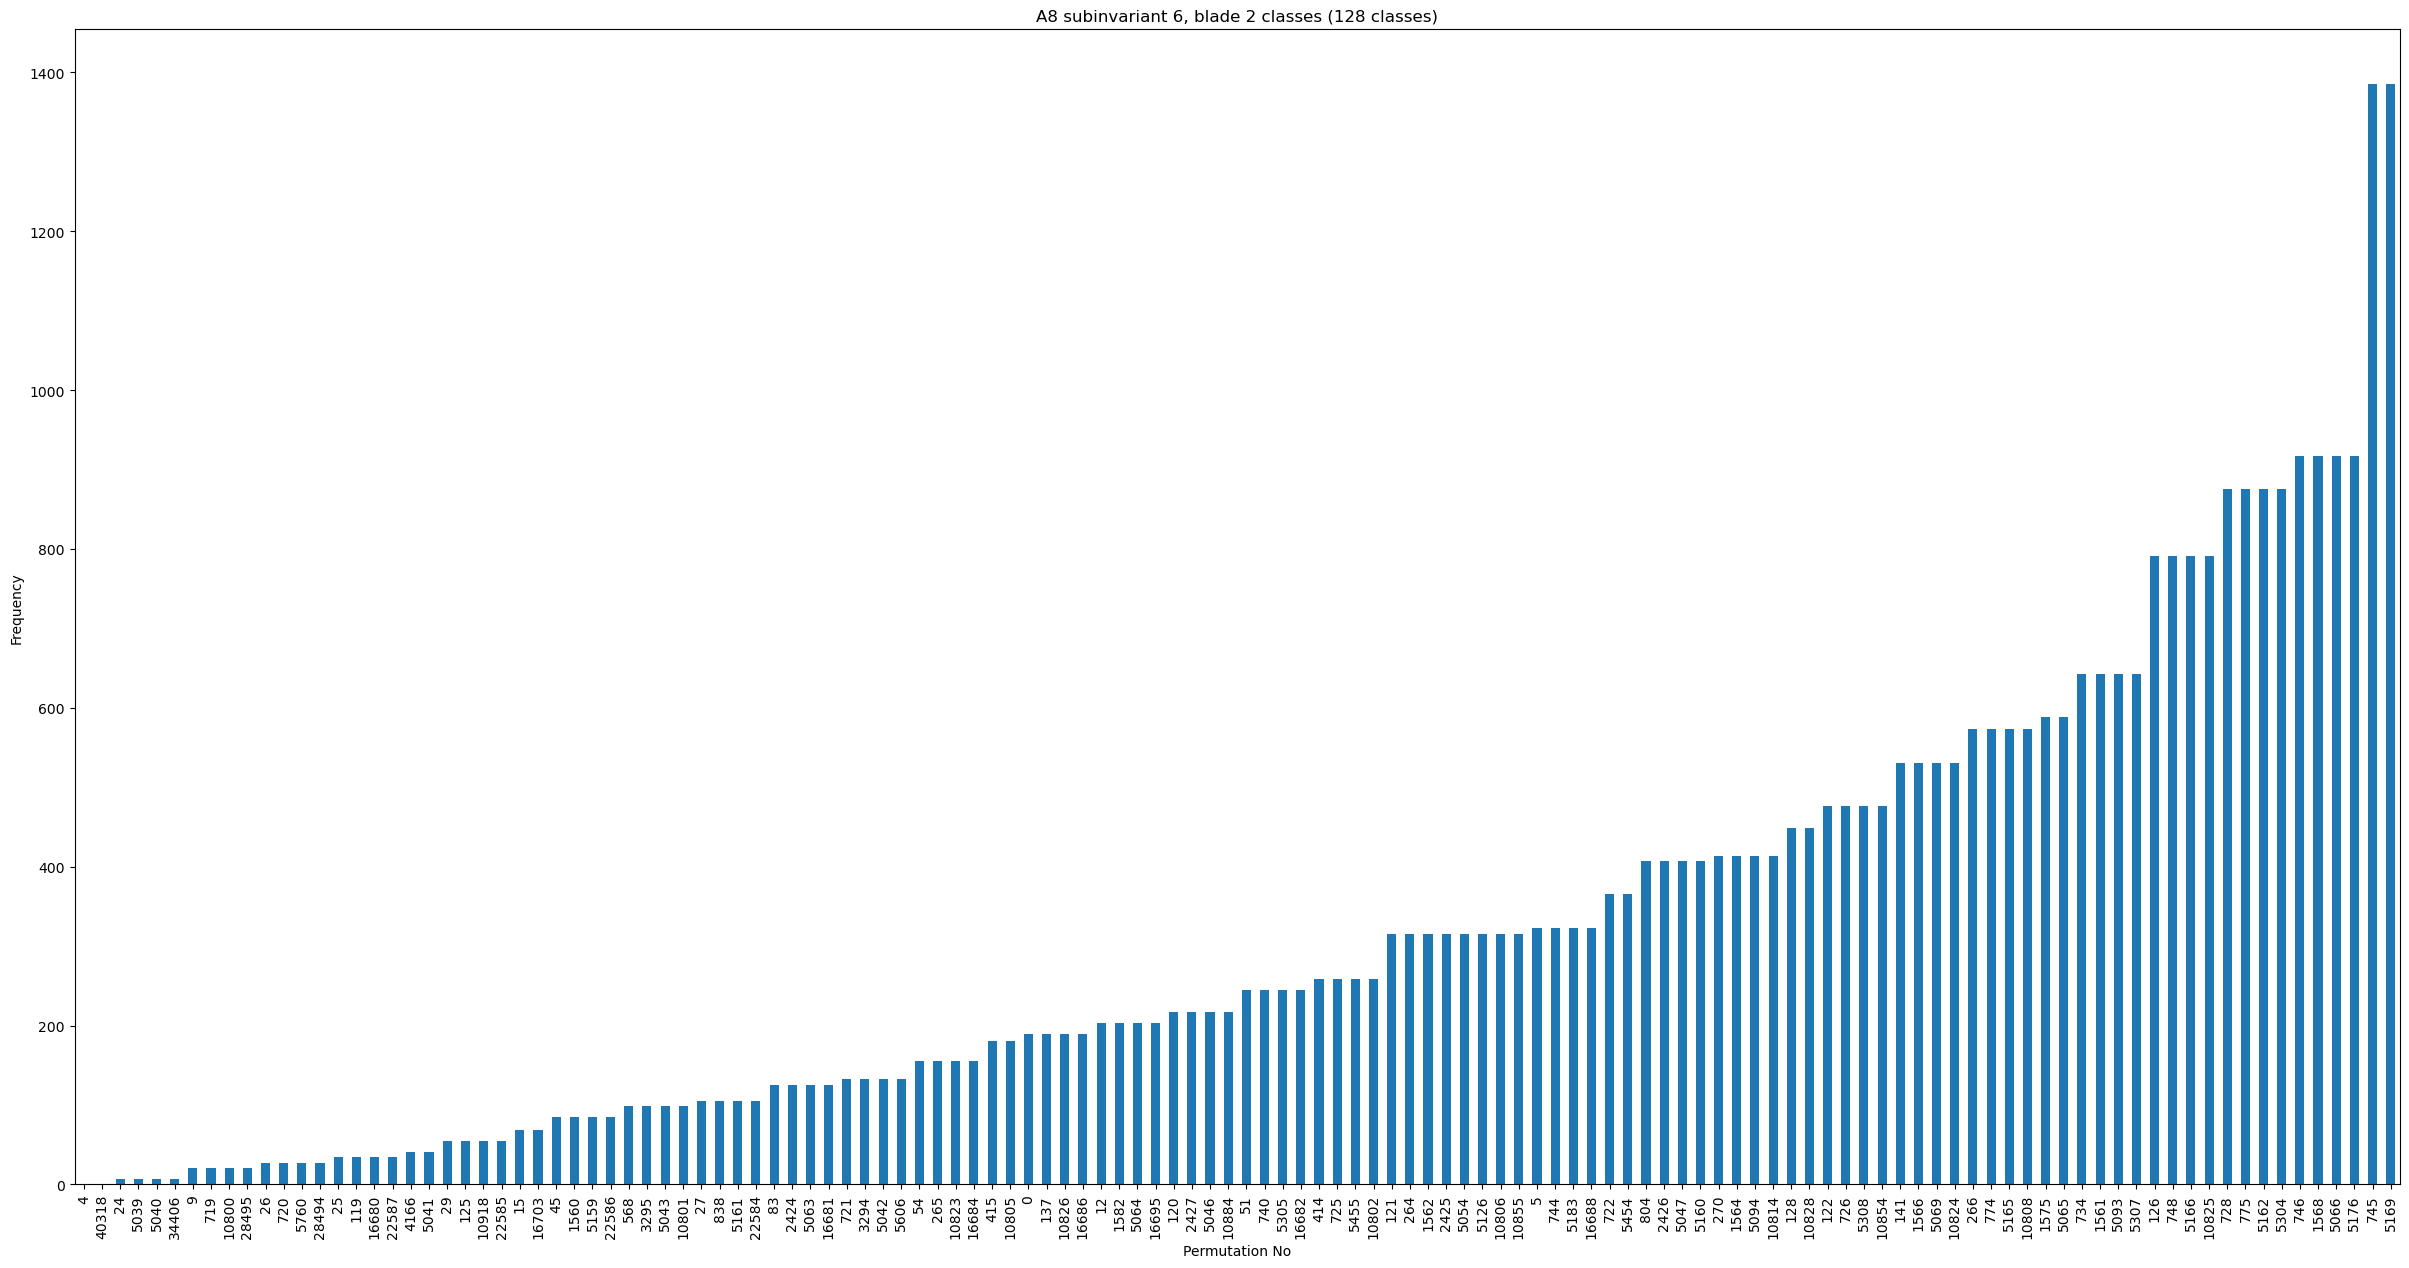

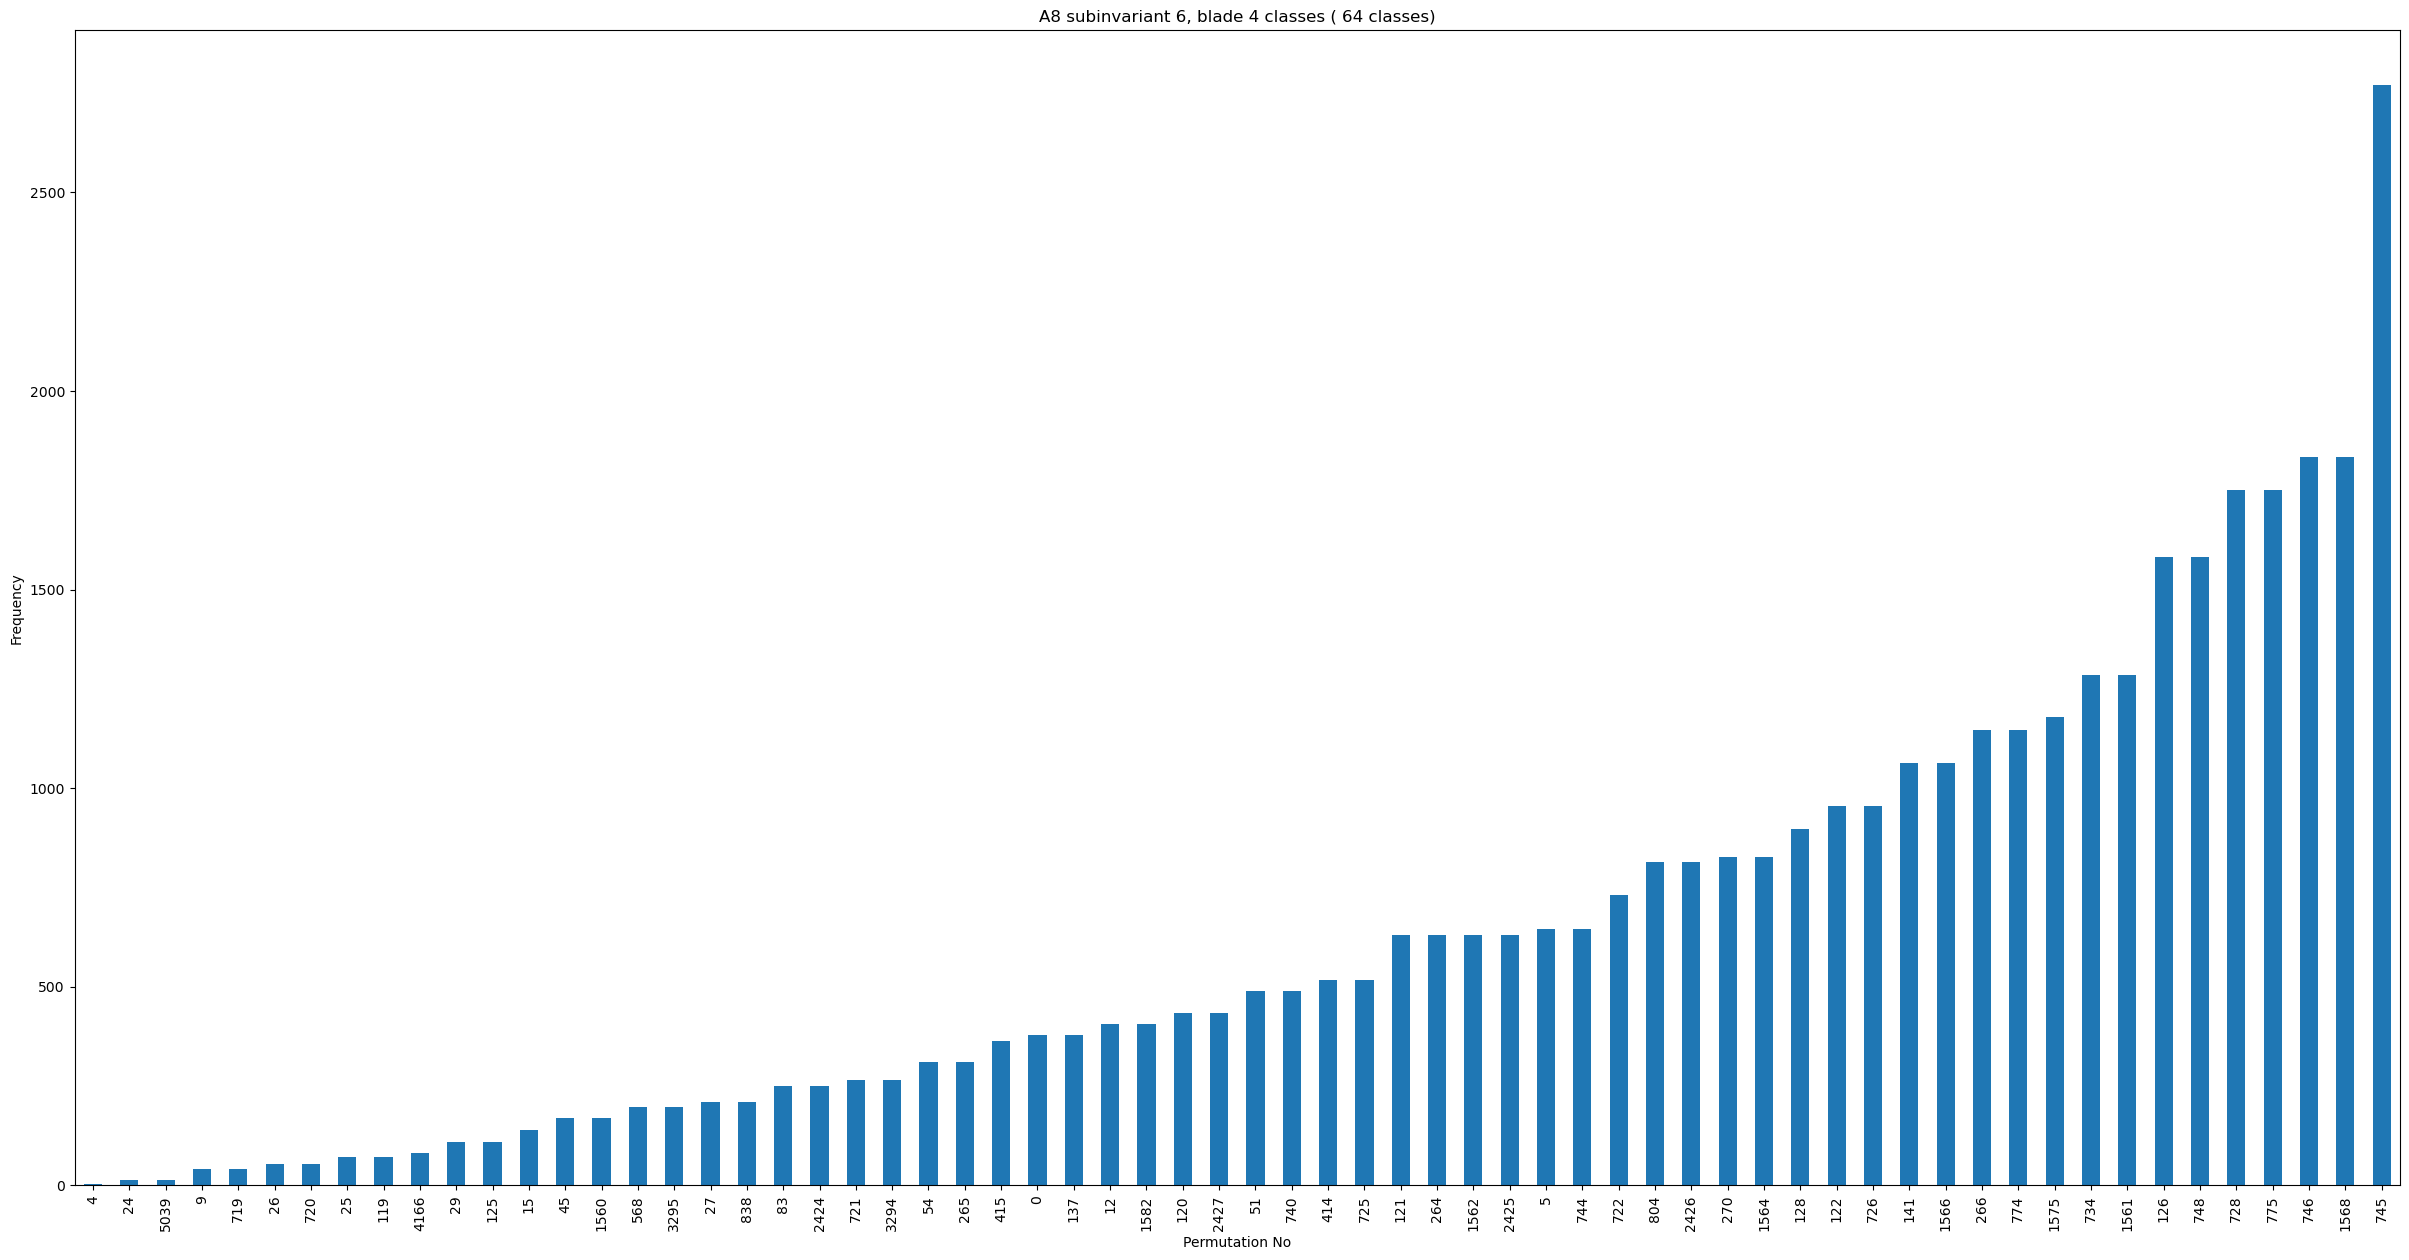

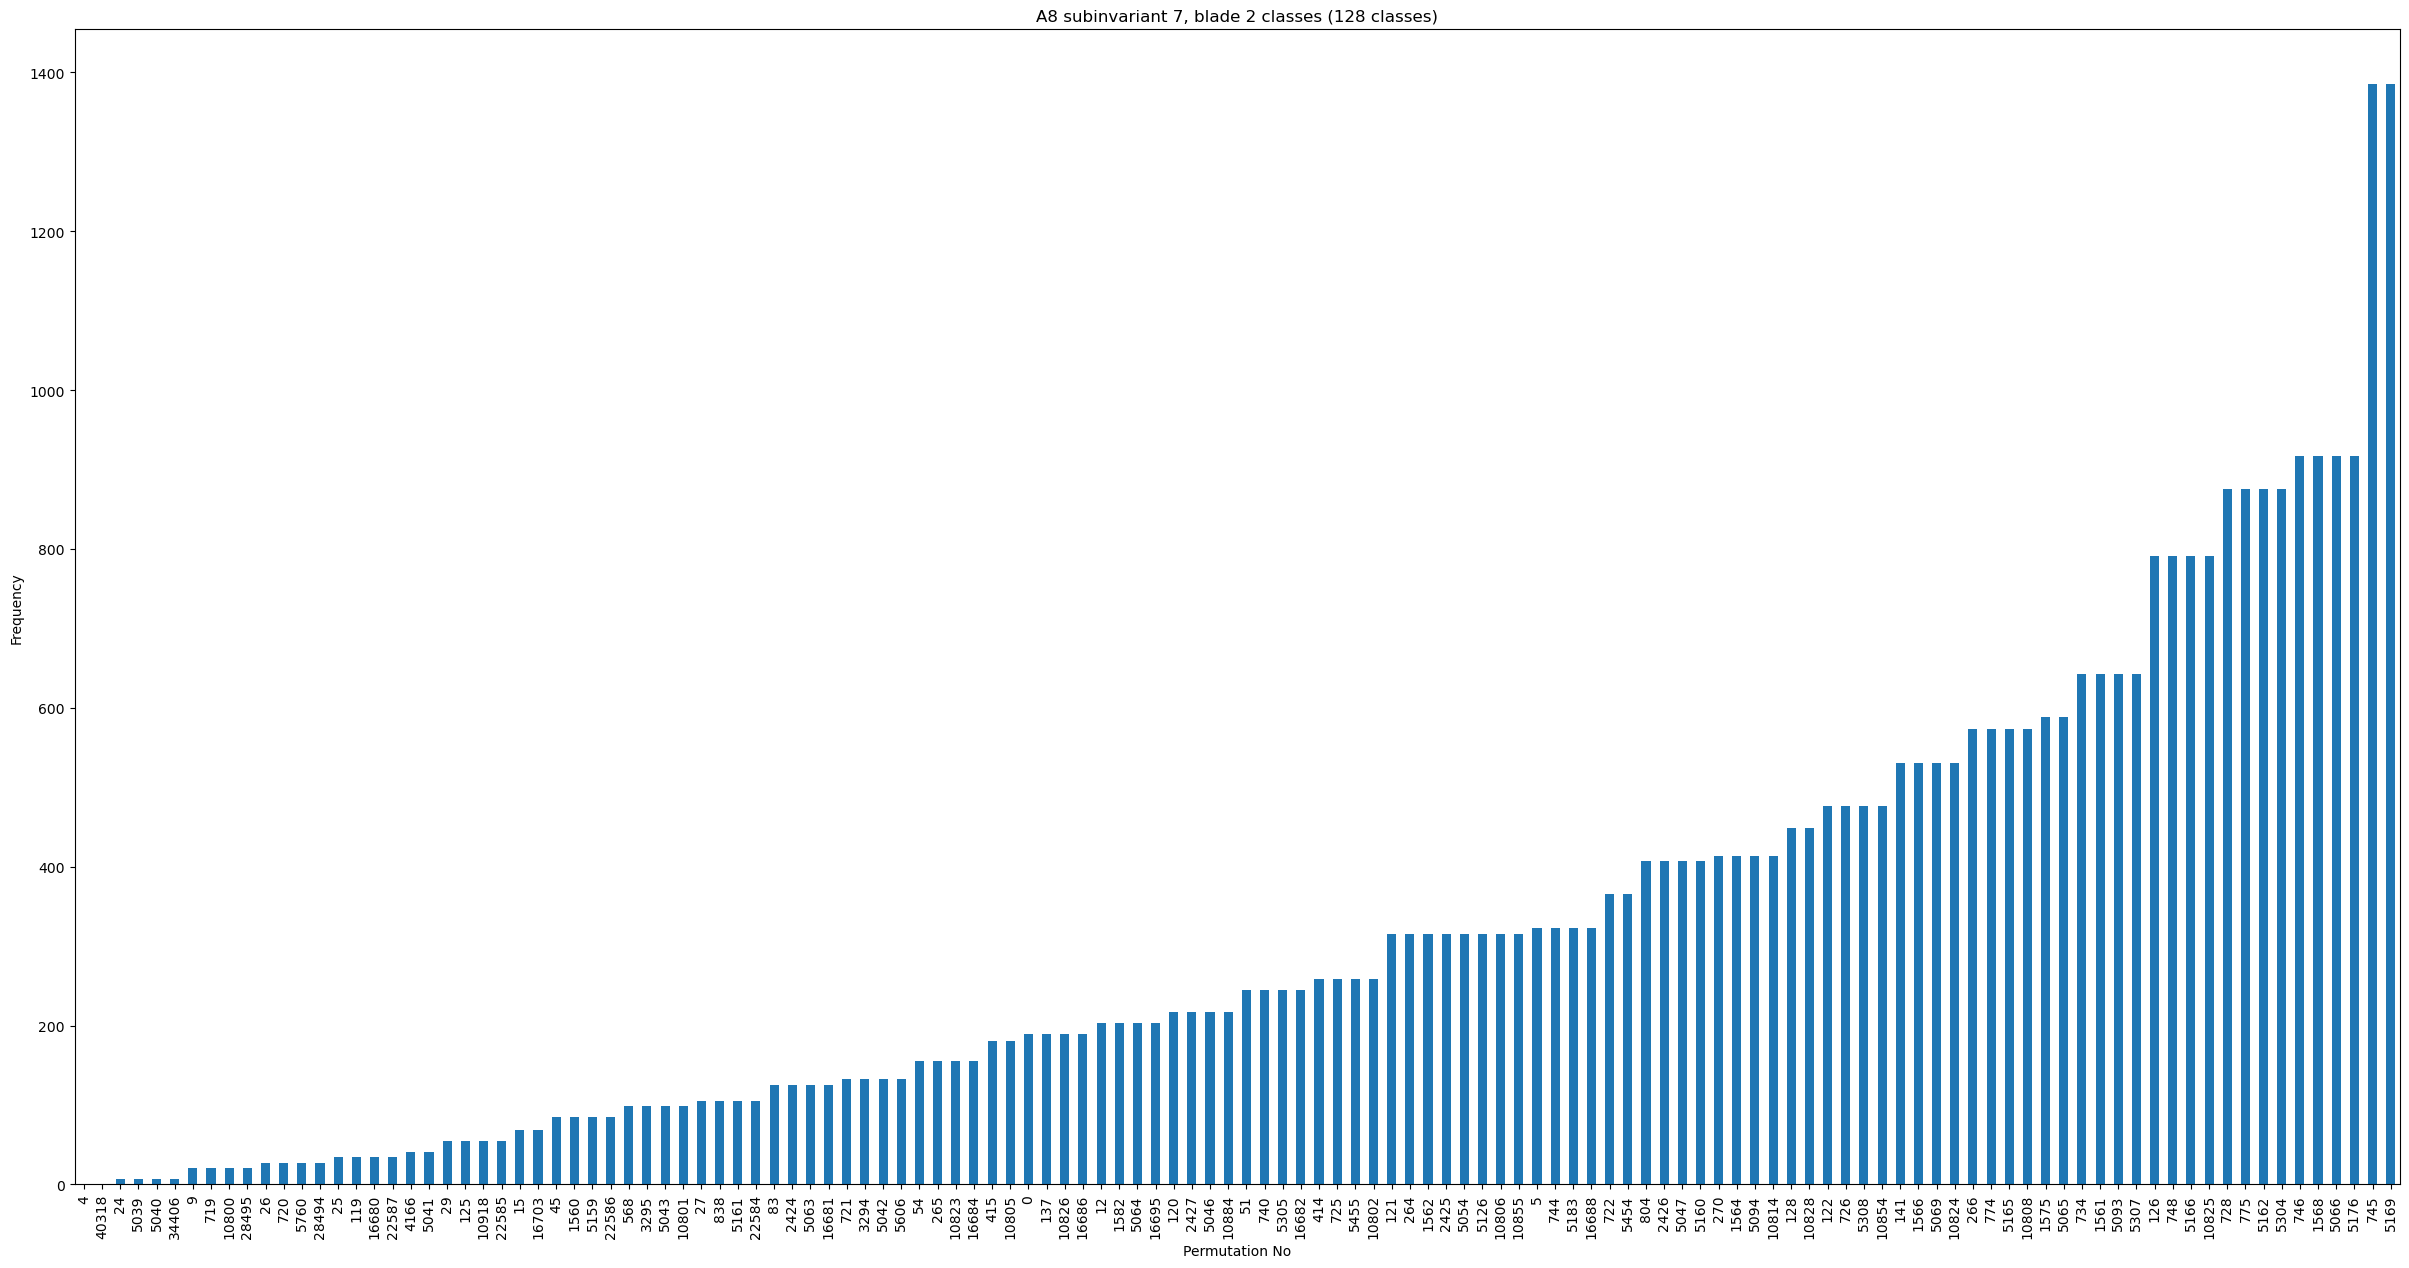

In [40]:
# Save all non-trivial distributions to files

for subInv_n in range(subInvs_N):
    for blade_n in range(blades_N):
        
        # Sort records by the number of occurances
        tempDict = classes_counterA8[subInv_n][blade_n]
        classes_counterA8[subInv_n][blade_n] = {k: v for k, v in sorted(tempDict.items(), key=lambda item: item[1])}
        
        if len(classes_counterA8[subInv_n][blade_n].keys())<=1:
            continue
        
        plt.figure(figsize=(30, 15));
        freq_series = pd.Series(list(classes_counterA8[subInv_n][blade_n].values()));
        fig = freq_series.plot(kind='bar');
        fig.set_title("A8 subinvariant %1d, blade %1d classes (%3d classes)" % (subInv_n, blade_n, len(list(classes_counterA8[subInv_n][blade_n].values())) ));
        fig.set_xlabel('Permutation No');
        fig.set_ylabel('Frequency');
        fig.set_xticklabels(list(classes_counterA8[subInv_n][blade_n].keys()));
        name = "ADE_classes_figures\A8subinv" + str(subInv_n) + "blade" + str(blade_n) + ".png"
        plt.savefig(name);

In [41]:
# Record found classes in a CSV file
with open('ADE_Data\A8_subcpts_classes.csv','w') as file:
    for subInv_n in range(subInvs_N):
        for blade_n in range(blades_N):
            file.write("subinvariant %1d blade %1d, permutation Number," % (subInv_n,blade_n))
            for key in classes_counterA8[subInv_n][blade_n].keys():
                file.write(str(key) + ',')
            file.write('\n')
            
            file.write(',frequency,')
            for val in classes_counterA8[subInv_n][blade_n].values():
                file.write(str(val) + ',')
            file.write('\n')
            
            file.write(',total number of classes,' + str(len(list(classes_counterA8[subInv_n][blade_n].values()))) + ',\n')